In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
pip install torchvision


Note: you may need to restart the kernel to use updated packages.


In [3]:
input_folders = f'/Users/user/Desktop/svg'

In [4]:
all_items = os.listdir(input_folders)

files = [f for f in all_items if os.path.isfile(os.path.join(input_folders, f))]

print(files)

['hn.svg', 'tg.png', 'dm.svg', 'fr.svg', 'dz.svg', 'ga.svg', 'me.png', 'ph.svg', 'ss.svg', 'rw.svg', 'la.png', 'mr.png', 'ni.png', 'sd.svg', 'lv.png', 'om.png', 'af.png', 'cy.png', 'bj.png', 'aq.png', 'cn.png', 'gb-sct.png', 'co.png', 'cx.png', 'ag.png', 'ms.png', 'se.svg', 'md.png', 'sr.svg', 'zm.png', 'eh.svg', 'gw.svg', 'vn.png', 'tf.png', 'jp.svg', 'td.png', 'hm.svg', 'je.svg', 'gu.svg', 'yt.png', 'gb.svg', 'lb.png', 'pk.svg', 'mf.png', 'lu.png', 'sg.svg', 'mq.png', 'cz.png', 'ae.png', 'cm.png', 'bi.png', 'ar.png', 'as.png', 'bh.png', 'cl.png', 'ad.png', 'mp.png', 'lt.png', 'mg.png', 'lc.png', 'ru.svg', 'do.svg', 'gt.svg', 'tr.png', 'ua.png', 'kw.svg', 'tv.png', 'vi.png', 'il.svg', 'gg.svg', 'gp.svg', 'dk.svg', 'mt.png', 'no.png', 'sb.svg', 'py.svg', 'mc.png', 'pn.svg', 'ch.png', 'bl.png', 'aw.png', 'bz.png', 'bm.png', 'ci.png', 'st.svg', 'mu.png', 'sc.svg', 'dj.svg', 'gq.svg', 'gf.svg', 'kr.svg', 'im.svg', 'ke.svg', 'us.png', 'tw.png', 'kg.svg', 'gb-nir.svg', 'hk.svg', 'kp.svg', '

In [5]:
import subprocess

def batch_convert_svgs(folder, dpi=300):
    """
    Convert all SVG files in a folder to PNG using rsvg-convert.

    Parameters:
        folder (str): Path to the folder containing .svg files.
        dpi (int): Resolution for the output PNG files.
    """
    svg_files = [f for f in os.listdir(folder) if f.endswith(".svg")]

    for svg_file in svg_files:
        print(svg_file)
        svg_path = os.path.join(folder, svg_file)
        png_file = svg_file.split('.')[0] + ".png"
        png_path = os.path.join(f"/Users/user/Desktop/png_flags", png_file)
        print(png_path)
        # Run rsvg-convert
        try:
            subprocess.run(
                [
                    "rsvg-convert",
                    "-o", png_path,
                    "-d", str(dpi),
                    "-p", str(dpi),
                    svg_path
                ],
                check=True
            )
            print(f"Converted: {svg_file} → {png_file}")
        except subprocess.CalledProcessError as e:
            print(f"Error converting {svg_file}: {e}")



In [6]:
#batch_convert_svgs("/Users/user/Desktop/svg", dpi=300)

In [7]:
from PIL import Image, UnidentifiedImageError
def calculate_aspect_ratio(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
            aspect_ratio = width / height
            return width, height, aspect_ratio
    except UnidentifiedImageError:
        print(f"Warning: Cannot identify image file {image_path}. Skipping...")
        return None, None, None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None, None, None

def process_images_in_folder(folder_path, country_code_dict):
    image_details = []
    for filename in os.listdir(folder_path):
        temp_dict = {}
        if filename.lower().endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            width, height, aspect_ratio = calculate_aspect_ratio(image_path)
            if width is not None:  # Skip files that couldn't be processed
                temp_dict['Country'] = country_code_dict[filename.split('.')[0]]
                temp_dict['width'] = width
                temp_dict['height'] = height
                temp_dict['aspect_ratio'] = aspect_ratio
                temp_dict['file_path'] = image_path
                image_details.append(temp_dict)
    return image_details


In [8]:
import json

# Path to JSON file
json_path = "/Users/user/Downloads/country-flags-main/countries.json"

# Read JSON file as a dictionary
with open(json_path, "r", encoding="utf-8") as f:
    country_data = json.load(f)  # Load as Python dictionary

# Convert dictionary to DataFrame
country_code_mappings = pd.DataFrame(list(country_data.items()), columns=["Country_Code", "Country_Name"])

In [9]:
country_code_mappings["Country_Code"] = country_code_mappings["Country_Code"].str.lower()

In [10]:
country_code_mappings

Country_Code          Country_Name
0             ad               Andorra
1             ae  United Arab Emirates
2             af           Afghanistan
3             ag   Antigua and Barbuda
4             ai              Anguilla
..           ...                   ...
249           ye                 Yemen
250           yt               Mayotte
251           za          South Africa
252           zm                Zambia
253           zw              Zimbabwe

[254 rows x 2 columns]

In [11]:
country_code_dict = country_code_mappings.set_index("Country_Code")["Country_Name"].to_dict()

print(dict(list(country_code_dict.items())[:5]))  # Show first 5 items


{'ad': 'Andorra', 'ae': 'United Arab Emirates', 'af': 'Afghanistan', 'ag': 'Antigua and Barbuda', 'ai': 'Anguilla'}


In [12]:
folder_path = "/Users/user/Desktop/png_flags"
image_details = process_images_in_folder(folder_path, country_code_dict)

df_image_details = pd.DataFrame(image_details)

/Users/user/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (90316800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [13]:
df_image_details

Country  width  height  aspect_ratio  \
0                                       Togo    809     500      1.618000   
1                                 Montenegro    640     320      2.000000   
2    Laos (Lao People's Democratic Republic)      6       4      1.500000   
3                                 Mauritania   3000    2000      1.500000   
4                                  Nicaragua   1000     600      1.666667   
..                                       ...    ...     ...           ...   
248                             South Africa      9       6      1.500000   
249                                  Uruguay    945     630      1.500000   
250                Wallis and Futuna Islands    150     100      1.500000   
251                                  Vanuatu    950     570      1.666667   
252                               Tajikistan   1400     700      2.000000   

                                file_path  
0    /Users/user/Desktop/png_flags/tg.png  
1    /Users/user/Desktop/png_flags/me.png  
2    /Users/user/Desktop/png_flags/la.png  
3    /Users/user/Desktop/png_flags/mr.png  
4    /Users/user/Desktop/png_flags/ni.png  
..                                    ...  
248  /Users/user/Desktop/png_flags/za.png  
249  /Users/user/Desktop/png_flags/uy.png  
250  /Users/user/Desktop/png_flags/wf.png  
251  /Users/user/Desktop/png_flags/vu.png  
252  /Users/user/Desktop/png_flags/tj.png  

[253 rows x 5 columns]

In [14]:
df_image_details['aspect_ratio'].value_counts()

1.500000    109
2.000000     78
1.666667     22
1.900000      5
1.600000      5
1.375000      5
1.333333      4
1.400000      2
1.750000      2
1.000000      2
1.428571      2
1.388889      1
1.153846      1
1.700000      1
1.529412      1
0.818182      1
1.562500      1
1.618000      1
1.818182      1
1.571429      1
1.636364      1
2.545455      1
1.321429      1
1.772487      1
1.499010      1
1.467337      1
1.250000      1
1.166667      1
Name: aspect_ratio, dtype: int64

In [15]:
target_aspect_ratio = 1.66667

df_aspect_rat_5_3 = df_image_details[np.isclose(df_image_details['aspect_ratio'], target_aspect_ratio, atol=1e-3)]

In [16]:
df_aspect_rat_5_3['Country']

4                Nicaragua
12                Scotland
25              Luxembourg
30                 Burundi
33                 Bahrain
37               Lithuania
50                  Belize
72     Trinidad and Tobago
79                 Grenada
84              Kyrgyzstan
109                 Jersey
131                  Haiti
152                 Guyana
154                Comoros
175                England
178                Germany
193          Liechtenstein
208             Costa Rica
227             Bangladesh
244               Bulgaria
246                  Wales
251                Vanuatu
Name: Country, dtype: object

### Quite a few former European Colonies and some island nations have aspect ratio 1.6667

In [17]:
target_aspect_ratio = 2.0000

df_aspect_rat_2_1 = df_image_details[np.isclose(df_image_details['aspect_ratio'], target_aspect_ratio, atol=1e-3)]

In [18]:
country = [df_aspect_rat_2_1['Country']]

In [19]:
country

[1                   Montenegro
 5                       Latvia
 6                         Oman
 14            Christmas Island
 16                  Montserrat
                 ...           
 238                   Zimbabwe
 239                      Nauru
 241                       Cuba
 245    Cocos (Keeling) Islands
 252                 Tajikistan
 Name: Country, Length: 78, dtype: object]

In [20]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [21]:
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

flags_folder = "/Users/user/Desktop/png_flags"

flag_data = []
image_shape = (32, 48) 

for filename in os.listdir(flags_folder):
    if filename.endswith(".png"):
        img_path = os.path.join(flags_folder, filename)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Error: Could not load image {img_path}")
            continue  

        img = cv2.resize(img, image_shape) 
        img = img.flatten() 
        flag_data.append(img)

flag_data = np.array(flag_data)

In [22]:
flag_data.shape

(253, 4608)

In [23]:
def pca_flags(flag_data, image_shape=(48, 32), num_components=5):
    pca = PCA(n_components=num_components)
    pca.fit(flag_data)

    eigenflags = pca.components_  

    eigenflags = (eigenflags - np.min(eigenflags)) / (np.max(eigenflags) - np.min(eigenflags))

    plt.figure(figsize=(15, 5))
    for i in range(num_components):
        plt.subplot(1, num_components, i + 1)
        eigenflag = eigenflags[i].reshape(image_shape[0], image_shape[1], 3)  
        plt.imshow(eigenflag)
        plt.axis("off")
        plt.title(f"Eigenflag {i+1}")

    plt.suptitle("Eigenflags (Principal Components of Flags)", fontsize=14)
    plt.show()



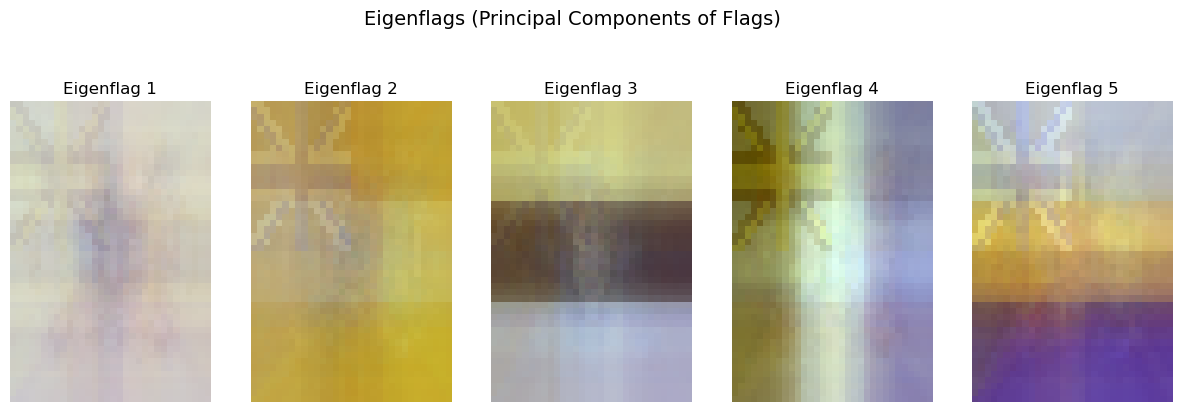

In [24]:
pca_flags(flag_data)

### PCA eigenflags are not very useful for generating new flags

### Trying a Deep Learning approach-autoencoders

In [25]:
import os
import cv2
from PIL import Image

flags_folder = "/Users/user/Desktop/png_flags"

for filename in os.listdir(flags_folder):
    file_path = os.path.join(flags_folder, filename)
    
    if filename.endswith(".png"):
        try:
            img = cv2.imread(file_path)
            if img is None:
                print(f"Deleting corrupt image: {filename}")
                os.remove(file_path)  
                continue  
            
            with Image.open(file_path) as img:
                img.verify() 

        except Exception as e:
            print(f"Error loading {filename}: {e}")
            if os.path.exists(file_path):  
                os.remove(file_path)
                print(f"Deleted {filename}")


/Users/user/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (90316800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from PIL import Image
import torchvision


In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
flags_folder = "/Users/user/Desktop/png_flags"

transform = transforms.Compose([
    transforms.Resize((64, 96)),  
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  
])

In [29]:
class FlagDataset(torch.utils.data.Dataset):
    def __init__(self, folder, transform=None):
        self.image_paths = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith(".png")]
        self.transform = transform
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB") 
        if self.transform:
            image = self.transform(image)  
        
        image = (image - 0.5) * 2  
        return image


dataset = FlagDataset(flags_folder, transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [30]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 512 * 4 * 6),  
            nn.BatchNorm1d(512 * 4 * 6),
            nn.ReLU(),
            nn.Unflatten(1, (512, 4, 6)),  # (Batch, 512, 4, 6)
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),  # (256, 8, 12)
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # (128, 16, 24)
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # (64, 32, 48)
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),  # (3, 64, 96)
            nn.Tanh()  # Output in range [-1, 1]
        )

    def forward(self, z):
        return self.model(z)

In [31]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(512 * 4 * 6, 1),
            nn.Sigmoid()  
        )

    def forward(self, img):
        return self.model(img)

In [32]:
latent_dim = 100
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [33]:
from tqdm import tqdm

num_epochs = 50
for epoch in range(num_epochs):
    loop = tqdm(dataloader, desc=f"Epoch [{epoch+1}/{num_epochs}]", leave=True)
    
    for real_images in loop:
        real_images = real_images.to(device)

        real_labels = torch.ones(real_images.size(0), 1).to(device)
        fake_labels = torch.zeros(real_images.size(0), 1).to(device)

        optimizer_D.zero_grad()
        outputs = discriminator(real_images)
        real_loss = criterion(outputs, real_labels)

        z = torch.randn(real_images.size(0), latent_dim).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images.detach())
        fake_loss = criterion(outputs, fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        optimizer_G.zero_grad()
        z = torch.randn(real_images.size(0), latent_dim).to(device)
        fake_images = generator(z)
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)

        g_loss.backward()
        optimizer_G.step()

        loop.set_postfix(D_Loss=d_loss.item(), G_Loss=g_loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")


Epoch [1/50]:  62%|██▌ | 5/8 [00:09<00:05,  1.96s/it, D_Loss=0.538, G_Loss=4.37]/Users/user/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (90316800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Epoch [1/50]: 100%|████| 8/8 [00:15<00:00,  1.94s/it, D_Loss=0.392, G_Loss=6.54]


Epoch [1/50], D Loss: 0.3924, G Loss: 6.5401


Epoch [2/50]: 100%|████| 8/8 [00:15<00:00,  1.93s/it, D_Loss=0.185, G_Loss=11.2]


Epoch [2/50], D Loss: 0.1849, G Loss: 11.1591


Epoch [3/50]: 100%|██████| 8/8 [00:15<00:00,  1.96s/it, D_Loss=0.696, G_Loss=17]


Epoch [3/50], D Loss: 0.6962, G Loss: 17.0434


Epoch [4/50]: 100%|███| 8/8 [00:15<00:00,  1.99s/it, D_Loss=0.0491, G_Loss=18.9]


Epoch [4/50], D Loss: 0.0491, G Loss: 18.9435


Epoch [5/50]: 100%|█████| 8/8 [00:15<00:00,  1.97s/it, D_Loss=0.0395, G_Loss=18]


Epoch [5/50], D Loss: 0.0395, G Loss: 18.0141


Epoch [6/50]: 100%|████| 8/8 [00:15<00:00,  1.95s/it, D_Loss=0.263, G_Loss=18.1]


Epoch [6/50], D Loss: 0.2626, G Loss: 18.1283


Epoch [7/50]: 100%|████| 8/8 [00:16<00:00,  2.01s/it, D_Loss=0.665, G_Loss=18.3]


Epoch [7/50], D Loss: 0.6651, G Loss: 18.2848


Epoch [8/50]: 100%|█████| 8/8 [00:15<00:00,  1.96s/it, D_Loss=3.42, G_Loss=17.6]


Epoch [8/50], D Loss: 3.4157, G Loss: 17.5663


Epoch [9/50]: 100%|███| 8/8 [00:15<00:00,  1.93s/it, D_Loss=0.0101, G_Loss=10.7]


Epoch [9/50], D Loss: 0.0101, G Loss: 10.7311


Epoch [10/50]: 100%|██| 8/8 [00:15<00:00,  1.95s/it, D_Loss=0.0312, G_Loss=14.5]


Epoch [10/50], D Loss: 0.0312, G Loss: 14.5438


Epoch [11/50]: 100%|███| 8/8 [00:15<00:00,  1.94s/it, D_Loss=0.028, G_Loss=13.3]


Epoch [11/50], D Loss: 0.0280, G Loss: 13.2999


Epoch [12/50]: 100%|██| 8/8 [00:15<00:00,  1.96s/it, D_Loss=0.0153, G_Loss=9.63]


Epoch [12/50], D Loss: 0.0153, G Loss: 9.6310


Epoch [13/50]: 100%|███| 8/8 [00:15<00:00,  1.97s/it, D_Loss=0.414, G_Loss=12.8]


Epoch [13/50], D Loss: 0.4137, G Loss: 12.7696


Epoch [14/50]: 100%|██| 8/8 [00:15<00:00,  1.93s/it, D_Loss=0.0497, G_Loss=12.3]


Epoch [14/50], D Loss: 0.0497, G Loss: 12.2632


Epoch [15/50]: 100%|████| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.0119, G_Loss=14]


Epoch [15/50], D Loss: 0.0119, G Loss: 13.9962


Epoch [16/50]: 100%|██| 8/8 [00:15<00:00,  1.91s/it, D_Loss=0.0542, G_Loss=7.78]


Epoch [16/50], D Loss: 0.0542, G Loss: 7.7816


Epoch [17/50]: 100%|██| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.0358, G_Loss=7.08]


Epoch [17/50], D Loss: 0.0358, G Loss: 7.0850


Epoch [18/50]: 100%|██| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.0238, G_Loss=7.06]


Epoch [18/50], D Loss: 0.0238, G Loss: 7.0564


Epoch [19/50]: 100%|███| 8/8 [00:15<00:00,  1.91s/it, D_Loss=0.022, G_Loss=6.63]


Epoch [19/50], D Loss: 0.0220, G Loss: 6.6320


Epoch [20/50]: 100%|██| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.0207, G_Loss=6.45]


Epoch [20/50], D Loss: 0.0207, G Loss: 6.4463


Epoch [21/50]: 100%|██| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.0277, G_Loss=5.91]


Epoch [21/50], D Loss: 0.0277, G Loss: 5.9064


Epoch [22/50]: 100%|█| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.00697, G_Loss=6.41]


Epoch [22/50], D Loss: 0.0070, G Loss: 6.4104


Epoch [23/50]: 100%|██| 8/8 [00:15<00:00,  1.93s/it, D_Loss=0.0113, G_Loss=6.35]


Epoch [23/50], D Loss: 0.0113, G Loss: 6.3460


Epoch [24/50]: 100%|█| 8/8 [00:15<00:00,  1.95s/it, D_Loss=0.00937, G_Loss=6.63]


Epoch [24/50], D Loss: 0.0094, G Loss: 6.6304


Epoch [25/50]: 100%|██| 8/8 [00:15<00:00,  1.91s/it, D_Loss=0.0167, G_Loss=6.52]


Epoch [25/50], D Loss: 0.0167, G Loss: 6.5170


Epoch [26/50]: 100%|██| 8/8 [00:15<00:00,  1.91s/it, D_Loss=0.00858, G_Loss=6.8]


Epoch [26/50], D Loss: 0.0086, G Loss: 6.8003


Epoch [27/50]: 100%|█| 8/8 [00:15<00:00,  1.90s/it, D_Loss=0.00683, G_Loss=6.51]


Epoch [27/50], D Loss: 0.0068, G Loss: 6.5074


Epoch [28/50]: 100%|█| 8/8 [00:15<00:00,  1.90s/it, D_Loss=0.00633, G_Loss=6.83]


Epoch [28/50], D Loss: 0.0063, G Loss: 6.8318


Epoch [29/50]: 100%|█| 8/8 [00:15<00:00,  1.90s/it, D_Loss=0.00853, G_Loss=7.29]


Epoch [29/50], D Loss: 0.0085, G Loss: 7.2851


Epoch [30/50]: 100%|██| 8/8 [00:15<00:00,  1.91s/it, D_Loss=0.0173, G_Loss=6.83]


Epoch [30/50], D Loss: 0.0173, G Loss: 6.8278


Epoch [31/50]: 100%|█| 8/8 [00:15<00:00,  1.90s/it, D_Loss=0.00826, G_Loss=6.61]


Epoch [31/50], D Loss: 0.0083, G Loss: 6.6072


Epoch [32/50]: 100%|█| 8/8 [00:15<00:00,  1.89s/it, D_Loss=0.00495, G_Loss=7.11]


Epoch [32/50], D Loss: 0.0050, G Loss: 7.1142


Epoch [33/50]: 100%|█| 8/8 [00:15<00:00,  1.89s/it, D_Loss=0.00444, G_Loss=7.23]


Epoch [33/50], D Loss: 0.0044, G Loss: 7.2269


Epoch [34/50]: 100%|██| 8/8 [00:15<00:00,  1.89s/it, D_Loss=0.00596, G_Loss=7.2]


Epoch [34/50], D Loss: 0.0060, G Loss: 7.1958


Epoch [35/50]: 100%|██| 8/8 [00:15<00:00,  1.89s/it, D_Loss=0.00539, G_Loss=7.2]


Epoch [35/50], D Loss: 0.0054, G Loss: 7.2014


Epoch [36/50]: 100%|██| 8/8 [00:15<00:00,  1.90s/it, D_Loss=0.0162, G_Loss=7.09]


Epoch [36/50], D Loss: 0.0162, G Loss: 7.0892


Epoch [37/50]: 100%|██| 8/8 [00:15<00:00,  1.89s/it, D_Loss=0.00315, G_Loss=7.4]


Epoch [37/50], D Loss: 0.0031, G Loss: 7.3952


Epoch [38/50]: 100%|█| 8/8 [00:15<00:00,  1.89s/it, D_Loss=0.00499, G_Loss=7.08]


Epoch [38/50], D Loss: 0.0050, G Loss: 7.0779


Epoch [39/50]: 100%|█| 8/8 [00:15<00:00,  1.93s/it, D_Loss=0.00583, G_Loss=6.66]


Epoch [39/50], D Loss: 0.0058, G Loss: 6.6626


Epoch [40/50]: 100%|█| 8/8 [00:15<00:00,  1.97s/it, D_Loss=0.00237, G_Loss=7.17]


Epoch [40/50], D Loss: 0.0024, G Loss: 7.1701


Epoch [41/50]: 100%|█| 8/8 [00:15<00:00,  1.99s/it, D_Loss=0.00334, G_Loss=7.14]


Epoch [41/50], D Loss: 0.0033, G Loss: 7.1433


Epoch [42/50]: 100%|█| 8/8 [00:16<00:00,  2.09s/it, D_Loss=0.00182, G_Loss=7.47]


Epoch [42/50], D Loss: 0.0018, G Loss: 7.4721


Epoch [43/50]: 100%|█| 8/8 [00:16<00:00,  2.09s/it, D_Loss=0.00285, G_Loss=6.95]


Epoch [43/50], D Loss: 0.0028, G Loss: 6.9458


Epoch [44/50]: 100%|█| 8/8 [00:15<00:00,  1.94s/it, D_Loss=0.00179, G_Loss=7.38]


Epoch [44/50], D Loss: 0.0018, G Loss: 7.3818


Epoch [45/50]: 100%|█| 8/8 [00:15<00:00,  1.94s/it, D_Loss=0.00296, G_Loss=7.19]


Epoch [45/50], D Loss: 0.0030, G Loss: 7.1920


Epoch [46/50]: 100%|██| 8/8 [00:15<00:00,  1.94s/it, D_Loss=0.0041, G_Loss=7.73]


Epoch [46/50], D Loss: 0.0041, G Loss: 7.7316


Epoch [47/50]: 100%|█| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.00156, G_Loss=7.72]


Epoch [47/50], D Loss: 0.0016, G Loss: 7.7244


Epoch [48/50]: 100%|█| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.00185, G_Loss=7.26]


Epoch [48/50], D Loss: 0.0018, G Loss: 7.2624


Epoch [49/50]: 100%|██| 8/8 [00:15<00:00,  1.93s/it, D_Loss=0.0014, G_Loss=7.61]


Epoch [49/50], D Loss: 0.0014, G Loss: 7.6120


Epoch [50/50]: 100%|██| 8/8 [00:15<00:00,  1.92s/it, D_Loss=0.00162, G_Loss=7.3]

Epoch [50/50], D Loss: 0.0016, G Loss: 7.3011


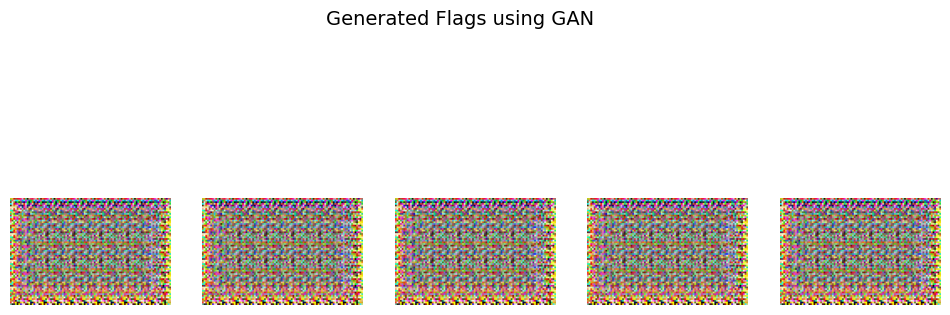

In [34]:
def generate_fake_flags(model, latent_dim, num_flags=5):
    model.eval()
    with torch.no_grad():
        z = torch.randn(num_flags, latent_dim).to(device)
        fake_flags = model(z)
    
    plt.figure(figsize=(12, 5))
    for i in range(num_flags):
        plt.subplot(1, num_flags, i + 1)
        flag_img = fake_flags[i].cpu().permute(1, 2, 0).numpy()
        flag_img = (flag_img + 1) / 2  # Convert from [-1, 1] to [0, 1]
        plt.imshow(flag_img)
        plt.axis("off")

    plt.suptitle("Generated Flags using GAN", fontsize=14)
    plt.show()

# Generate New Flags
generate_fake_flags(generator, latent_dim)

## Clearly, 200 flags are not enough to generate flags using an Autoencoder architecture

In [35]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [37]:
country_code_mappings

Country_Code          Country_Name
0             ad               Andorra
1             ae  United Arab Emirates
2             af           Afghanistan
3             ag   Antigua and Barbuda
4             ai              Anguilla
..           ...                   ...
249           ye                 Yemen
250           yt               Mayotte
251           za          South Africa
252           zm                Zambia
253           zw              Zimbabwe

[254 rows x 2 columns]

In [38]:
files = os.listdir('/Users/user/Desktop/png_flags')

In [39]:
country_code_dict['hn']

'Honduras'

In [40]:
import requests
from bs4 import BeautifulSoup
BASE_URL = 'https://nationalanthems.info/'
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Referer': 'https://www.google.com/'  # Mimic coming from Google
}

f1, f2 = files[0].split('.')
link = f"{BASE_URL}{f1}.htm"
print(link)
response = requests.get(link, headers=HEADERS, timeout=10)
soup = BeautifulSoup(response.text, 'html.parser')
translation_divs = soup.find_all("div", class_="collapseomatic_content")

if translation_divs:
    all_translations = []
    
    for div in translation_divs:
        text = div.get_text(separator="\n").strip()
        all_translations.append(text)
    
    print("English Translations:\n", all_translations[1])
else:
    print("No English translation found.")

https://nationalanthems.info/tg.htm
English Translations:
 1. 
Hail to thee, land of our forefathers,

Thou who made them strong, peaceful and happy,

Cultivating virtue and bravery

For posterity.

Even if tyrants shall come, thy heart yearns towards freedom.

Togo arise! Let us struggle without faltering.

Victory or death, but dignity.

God almighty, Thou alone we exalt

You have made Togo prosper.

People of Togo arise! Let us build the nation.




2. 
To serve thee in unity 

That is the most burning desire of our hearts. 

Let us shout aloud our motto 

That nothing can tarnish. 

We the only builders of thy happiness and of thy future, 

Everywhere let us break chains and treachery, 

And we swear to thee for ever faith, 

And love, service, untiring zeal, 

To make thee yet, 

Beloved Togo, a golden example for humanity. 




3. 
Hail, hail to the entire Universe

Let us unite our efforts on this immense building site

Whence will be reborn anew

Great Humanity.

Everywhere, in

In [41]:
print(soup)


<!DOCTYPE html>

<html class="html" lang="en-US">
<head>
<meta charset="utf-8"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>Togo – nationalanthems.info</title>
<meta content="max-image-preview:large" name="robots">
<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
<meta content="width=device-width, initial-scale=1" name="viewport"/><link href="//js.stripe.com" rel="dns-prefetch">
<link href="https://nationalanthems.info/feed/" rel="alternate" title="nationalanthems.info » Feed" type="application/rss+xml"/>
<link href="https://nationalanthems.info/comments/feed/" rel="alternate" title="nationalanthems.info » Comments Feed" type="application/rss+xml"/>
<script>
var MP3jPLAYLISTS = [];
var MP3jPLAYERS = [];
</script>
<script>
window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/15.0.3\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/15.0.3\/svg\/","svgExt":".svg","source":

In [42]:
files = os.listdir('/Users/user/Desktop/png_flags')

In [43]:
len(files)

254

## Downloading all the national anthem mp3 files

In [44]:
import requests
import os
from tqdm import tqdm

def get_anthems_audio(files, save_folder):
    BASE_URL = 'https://nationalanthems.info/'
    HEADERS = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.google.com/'  
    }
    
    os.makedirs(save_folder, exist_ok=True)
    
    for file in tqdm(files, desc="Downloading anthems", unit="file"):
        try:
            f1, f2 = file.split('.')
            link = f"{BASE_URL}{f1}.mp3"
            
            head_response = requests.head(link, headers=HEADERS, timeout=5)
            total_size = int(head_response.headers.get('content-length', 0))
            
            print(f"Downloading: {link}")
            
            response = requests.get(link, headers=HEADERS, stream=True, timeout=10)
            response.raise_for_status()  
            
            save_path = os.path.join(save_folder, f"{f1}.mp3")
            
            with open(save_path, 'wb') as f, tqdm(
                desc=f1,
                total=total_size,
                unit='B',
                unit_scale=True,
                unit_divisor=1024,
            ) as bar:
                for chunk in response.iter_content(chunk_size=1024):
                    if chunk:  
                        f.write(chunk)
                        bar.update(len(chunk))
            
            print(f"Saved to: {save_path}")
            
        except Exception as e:
            print(f"Error downloading {file}: {str(e)}")

In [45]:
save_folder = "/Users/user/Desktop/national_anthems_mp3"  
#get_anthems_audio(files, save_folder)

## Downloading all the national anthem text

In [46]:
from tqdm import tqdm 
BASE_URL = 'https://nationalanthems.info/'
output_folder = '/Users/user/Desktop/national_anthems/'
os.makedirs(output_folder, exist_ok=True)
def get_country_anthems(files, country_code_dict):
    country_anthems = {}
    for file in tqdm(files, desc=f"Fetching National Anthems", unit="file"):
        f1, f2 = file.split('.')
        if(f1 == ''):
            continue
        country_name = country_code_dict[f1]
        link = f"{BASE_URL}{f1}.htm"
        print(f"Fetching anthem for {country_code_dict[f1]}")
        response = requests.get(link, headers=HEADERS, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        translation_divs = soup.find_all("div", class_="collapseomatic_content")
        
        if translation_divs:
            all_translations = []
    
            for div in translation_divs:
                text = div.get_text(separator="\n").strip()
                all_translations.append(text)
            print(f"{country_code_dict[f1]} has {len(all_translations)} anthems")
            country_anthems[f"{country_code_dict[f1]}"] = all_translations[len(all_translations)-1]
            file_path = os.path.join(OUTPUT_FOLDER, f"{country_name}.txt")
            with open(file_path, "w", encoding="utf-8") as file:
                file.write(country_anthems[f"{country_code_dict[f1]}"])
        else:
            print("No English translation found.")
    return country_anthems

In [47]:
#anthems = get_country_anthems(files, country_code_dict)

In [48]:
text_files = os.listdir('/Users/user/Desktop/national_anthems')


In [49]:
audio_files = os.listdir('/Users/user/Desktop/national_anthems_mp3')

In [50]:
len(files)

254

In [51]:
len(text_files)

227

In [52]:
len(audio_files)


223

In [53]:
import os

folder_path = "/Users/user/Desktop/national_anthems/"

file_dict = {}

for filename in text_files:
    if filename.endswith(".txt"): 
        fname = filename.split('.')[0]
        file_path = os.path.join(folder_path, filename)
        with open(file_path, "r", encoding="utf-8") as file:
            file_dict[fname] = file.read()  

print(file_dict['India'])


Thou art the ruler of the minds of all people,

Dispenser of India’s destiny.

Thy name rouses the hearts of Punjab, Sind,

Gujarat and Maratha,

Of the Dravida and Orissa and Bengal;

It echoes in the hills of the Vindhyas and Himalayas,

mingles in the music of Jamuna and Ganges and is

chanted by the waves of the Indian Sea.

They pray for thy blessings and sing thy praise.

The saving of all people waits in thy hand,

Thou dispenser of India’s destiny.

Victory, victory, victory to thee.


In [54]:
files[0]

'tg.png'

In [55]:
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageOps

folder_path = "/Users/user/Desktop/png_flags/"

# Target size (square)
target_size = (64, 64)

def resize_and_pad(image, target_size):
    # Get the original size
    original_size = image.size  
    ratio = min(target_size[0] / original_size[0], target_size[1] / original_size[1])
    
    # Compute new size while maintaining aspect ratio
    new_size = (int(original_size[0] * ratio), int(original_size[1] * ratio))
    image = image.resize(new_size, Image.LANCZOS)

    # Create a new image with the target size and paste the resized image at the center
    new_image = Image.new("RGB", target_size, color=(0, 0, 0))  # Black background in RGB mode
    paste_position = ((target_size[0] - new_size[0]) // 2, (target_size[1] - new_size[1]) // 2)
    new_image.paste(image, paste_position)
    
    return new_image

data = []

# Process each image
for filename in os.listdir(folder_path):
    if filename.lower().endswith('.png'):
        country = filename.split(".")[0]  # Extract country from filename

        file_path = os.path.join(folder_path, filename)
        image = Image.open(file_path).convert("RGB")  # Keep colors (No grayscale conversion)
        image = resize_and_pad(image, target_size)  # Resize with padding
        pixel_array = np.array(image).flatten()  # Convert to a 1D array while keeping colors
        
        data.append([country, pixel_array])

# Create DataFrame
image_df = pd.DataFrame(data, columns=['Country', 'Pixel Array'])



/Users/user/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3157: DecompressionBombWarning: Image size (90316800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [56]:
image_df.head(5)

Country                                        Pixel Array
0      tg  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1      me  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2      la  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3      mr  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4      ni  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [57]:
# Map country codes to full names
image_df["Country Name"] = image_df["Country"].str.lower().map(country_code_dict)

In [58]:
image_df.head(5)

Country                                        Pixel Array  \
0      tg  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1      me  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2      la  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3      mr  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4      ni  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                              Country Name  
0                                     Togo  
1                               Montenegro  
2  Laos (Lao People's Democratic Republic)  
3                               Mauritania  
4                                Nicaragua

In [59]:
image_df.iloc[0, 1].shape

(12288,)

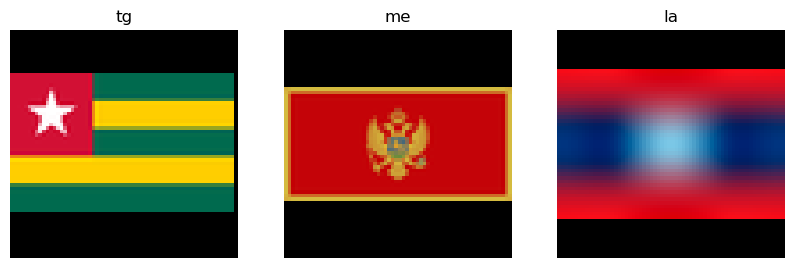

In [60]:
import matplotlib.pyplot as plt
import numpy as np

num_images = min(3, len(image_df))  
fig, axes = plt.subplots(1, num_images, figsize=(10, 5))  

if num_images == 1:
    axes = [axes]

for i in range(num_images):
    pixel_array = image_df.iloc[i]['Pixel Array'] 
    image = np.array(pixel_array).reshape(64, 64, 3) 

    axes[i].imshow(image)  # Display in grayscale
    axes[i].set_title(image_df.iloc[i]['Country'])  
    axes[i].axis("off")  # Hide axes

plt.show()


In [61]:
image_df.iloc[0, 1].shape

(12288,)

In [62]:
import os
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

nltk.download("stopwords")

# Initialize stemmer and stopword list
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))  # Load English stopwords

# Directory containing text files
folder_path = "/Users/user/Desktop/national_anthems"

# Function to clean, stem, and remove stopwords while keeping numbers
def clean_and_stem_text(text):
    # Remove special characters and numbers, keep only words
    words = re.findall(r'\b[a-zA-Z]+\b', text)  # This removes numbers
    
    # Remove stopwords and apply stemming
    stemmed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    
    return " ".join(stemmed_words)


# List to store data
data = []

# Process each text file
for filename in os.listdir(folder_path):
    if filename.lower().endswith(".txt"):  # Process only text files
        file_path = os.path.join(folder_path, filename)
        country = (file_path.split('.')[0]).split('/')[-1]
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
            cleaned_text = clean_and_stem_text(text)  # Apply cleaning & stemming
            data.append([country, cleaned_text])

# Create DataFrame
text_df = pd.DataFrame(data, columns=['Country Name', 'Text'])



[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
merged_df = pd.merge(image_df, text_df, on = "Country Name", how = "inner")

In [64]:
audio_files

['tm.mp3',
 've.mp3',
 'tz.mp3',
 'lk.mp3',
 'mx.mp3',
 'nc.mp3',
 'al.mp3',
 'bw.mp3',
 'cd.mp3',
 'az.mp3',
 'ba.mp3',
 'cr.mp3',
 'am.mp3',
 'my.mp3',
 'mn.mp3',
 'nu.mp3',
 'tl.mp3',
 'tn.mp3',
 'ml.mp3',
 'ao.mp3',
 'bt.mp3',
 'cg.mp3',
 'ax.mp3',
 'cf.mp3',
 'na.mp3',
 'mz.mp3',
 'mm.mp3',
 'li.mp3',
 'vg.mp3',
 'to.mp3',
 'vc.mp3',
 'tk.mp3',
 'zw.mp3',
 'ne.mp3',
 'nr.mp3',
 'bf.mp3',
 'cu.mp3',
 'bg.mp3',
 'mh.mp3',
 'za.mp3',
 'vu.mp3',
 'tj.mp3',
 'uy.mp3',
 'ws.mp3',
 'th.mp3',
 'nf.mp3',
 'ly.mp3',
 'be.mp3',
 'ca.mp3',
 'ai.mp3',
 'br.mp3',
 'cv.mp3',
 'cw.mp3',
 'bs.mp3',
 'bd.mp3',
 'mk.mp3',
 'np.mp3',
 'ng.mp3',
 'va.mp3',
 'uz.mp3',
 'pf.mp3',
 'id.mp3',
 'gy.mp3',
 'ie.mp3',
 'kz.mp3',
 'ir.mp3',
 'km.mp3',
 'pg.mp3',
 'ro.mp3',
 'sk.mp3',
 'pr.mp3',
 'si.mp3',
 'qa.mp3',
 'pe.mp3',
 'ht.mp3',
 'es.mp3',
 'gl.mp3',
 'ee.mp3',
 'gm.mp3',
 'er.mp3',
 'fi.mp3',
 'ky.mp3',
 'kn.mp3',
 'hu.mp3',
 'iq.mp3',
 'sh.mp3',
 'ps.mp3',
 'pw.mp3',
 'sl.mp3',
 'de.mp3',
 'fm.mp3',

In [65]:
import os
import librosa
import numpy as np
import pandas as pd

# Directory containing audio files
folder_path = "/Users/user/Desktop/national_anthems_mp3/"

# List to store data
data = []

# Process each audio file
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('mp3')):  # Process supported audio formats
        file_path = os.path.join(folder_path, filename)
        country = filename.split('.')[0]
        audio, sr = librosa.load(file_path, sr=None)  # sr=None keeps original sampling rate
        
        # Append to list
        data.append({"Country": country, "Sampling Rate": sr, "Waveform": audio})

audio_df = pd.DataFrame(data, columns=["Country", "Sampling Rate", "Waveform"])




Note: Illegal Audio-MPEG-Header 0xffffffff at offset 2219904.
Note: Trying to resync...
Note: Hit end of (available) data during resync.
Note: Illegal Audio-MPEG-Header 0x00000000 at offset 1947689.
Note: Trying to resync...
Note: Skipped 753 bytes in input.


In [66]:
audio_df.head(5)

Country  Sampling Rate                                           Waveform
0      tm          44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...
1      ve          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      tz          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3      lk          44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...
4      mx          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [67]:
total_df = pd.merge(audio_df, merged_df, on = "Country", how = "inner")

In [68]:
total_df.head(5)

Country  Sampling Rate                                           Waveform  \
0      tm          44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
1      ve          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2      tz          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3      lk          44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
4      mx          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                         Pixel Array  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                        Country Name  \
0                       Turkmenistan   
1  Venezuela, Bolivarian Republic of   
2       Tanzania, United Republic of   
3                          Sri Lanka   
4                             Mexico   

                                                Text  
0  readi give life nativ hearth spirit ancestor d...  
1  choru glori brave nation shook yoke respect la...  
2  god bless africa bless leader let wisdom uniti...  
3  mother sri lanka choru sri lanka salut thee mo...  
4  choru mexican cri war grasp steel bridl let ea...

## A dataframe containing all the modalities- text, audio and image, has been obtained

In [69]:
from collections import Counter
import pandas as pd
import re

if 'Country' in total_df.columns:
    total_df = total_df.set_index('Country')

def tokenize(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation
    words = text.split()  # Simple whitespace-based tokenization
    return words

country_word_counts = {}
for country, row in total_df.iterrows():
    if pd.notna(row["Text"]):  # Check if text is not NaN
        tokens = tokenize(row["Text"])
        country_word_counts[country] = Counter(tokens)
    else:
        country_word_counts[country] = Counter()

global_counter = Counter()
for counter in country_word_counts.values():
    global_counter.update(counter)

N = 30
top_words = [word for word, count in global_counter.most_common(N)]
print("Top words:", top_words)

data = {}
for country, counter in country_word_counts.items():
    total = sum(counter.values())  # Total words in that country's anthem
    freqs = {word: counter[word] / total if total > 0 else 0 for word in top_words}  # Normalize
    data[country] = freqs

word_freq_df = pd.DataFrame(data).T.fillna(0)  




Top words: ['us', 'choru', 'land', 'let', 'god', 'countri', 'peopl', 'may', 'one', 'love', 'nation', 'live', 'free', 'freedom', 'glori', 'peac', 'oh', 'shall', 'bless', 'heart', 'long', 'thi', 'flag', 'son', 'ever', 'homeland', 'great', 'thee', 'unit', 'sea']


In [70]:
word_freq_df

us     choru      land       let       god   countri     peopl  \
tm  0.035714  0.035714  0.035714  0.017857  0.000000  0.017857  0.017857   
ve  0.000000  0.035714  0.000000  0.017857  0.000000  0.000000  0.000000   
tz  0.000000  0.048780  0.000000  0.024390  0.073171  0.000000  0.048780   
lk  0.046512  0.058140  0.011628  0.000000  0.000000  0.000000  0.000000   
mx  0.000000  0.042373  0.000000  0.008475  0.008475  0.000000  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
ci  0.020000  0.000000  0.020000  0.000000  0.000000  0.040000  0.000000   
bz  0.000000  0.022222  0.033333  0.011111  0.011111  0.000000  0.000000   
mu  0.000000  0.000000  0.000000  0.000000  0.034483  0.034483  0.034483   
us  0.011765  0.000000  0.029412  0.000000  0.005882  0.005882  0.000000   
tw  0.000000  0.000000  0.031250  0.000000  0.000000  0.031250  0.000000   

         may       one      love  ...      long       thi      flag       son  \
tm  0.000000  0.000000  0.000000  ...  0.017857  0.000000  0.017857  0.000000   
ve  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
tz  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.024390   
lk  0.000000  0.011628  0.023256  ...  0.000000  0.000000  0.000000  0.000000   
mx  0.008475  0.000000  0.000000  ...  0.000000  0.000000  0.008475  0.025424   
..       ...       ...       ...  ...       ...       ...       ...       ...   
ci  0.000000  0.000000  0.000000  ...  0.000000  0.100000  0.000000  0.020000   
bz  0.000000  0.000000  0.000000  ...  0.000000  0.011111  0.000000  0.011111   
mu  0.034483  0.068966  0.000000  ...  0.000000  0.068966  0.000000  0.000000   
us  0.011765  0.000000  0.005882  ...  0.005882  0.000000  0.005882  0.000000   
tw  0.000000  0.125000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

        ever  homeland     great      thee      unit       sea  
tm  0.035714  0.000000  0.035714  0.000000  0.017857  0.000000  
ve  0.000000  0.000000  0.000000  0.000000  0.017857  0.000000  
tz  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
lk  0.011628  0.000000  0.000000  0.034884  0.000000  0.000000  
mx  0.000000  0.059322  0.000000  0.000000  0.000000  0.000000  
..       ...       ...       ...       ...       ...       ...  
ci  0.000000  0.000000  0.020000  0.020000  0.000000  0.000000  
bz  0.000000  0.000000  0.000000  0.011111  0.000000  0.022222  
mu  0.068966  0.000000  0.000000  0.103448  0.000000  0.000000  
us  0.005882  0.000000  0.000000  0.000000  0.000000  0.000000  
tw  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[218 rows x 30 columns]

In [71]:
top_5_words = word_freq_df.iloc[:, 0:5]  # Select only the top 5 words

word_frequencies_by_country = {
    word: top_5_words[word].sort_values(ascending=False).head(20).to_dict()
    for word in top_5_words.columns
}


## Normalized frequencies of the top 5 words

In [72]:
top_5_words

us     choru      land       let       god
tm  0.035714  0.035714  0.035714  0.017857  0.000000
ve  0.000000  0.035714  0.000000  0.017857  0.000000
tz  0.000000  0.048780  0.000000  0.024390  0.073171
lk  0.046512  0.058140  0.011628  0.000000  0.000000
mx  0.000000  0.042373  0.000000  0.008475  0.008475
..       ...       ...       ...       ...       ...
ci  0.020000  0.000000  0.020000  0.000000  0.000000
bz  0.000000  0.022222  0.033333  0.011111  0.011111
mu  0.000000  0.000000  0.000000  0.000000  0.034483
us  0.011765  0.000000  0.029412  0.000000  0.005882
tw  0.000000  0.000000  0.031250  0.000000  0.000000

[218 rows x 5 columns]

In [73]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """
    Pre-process a given text:
      - Lowercase the text
      - Remove punctuation
      - Tokenize into words
      - Remove English stopwords
    Returns a list of filtered tokens.
    """
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens



[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
tokens = text_df['Text']

In [75]:
all_tokens = []
for token in tokens:
    filtered_token = preprocess_text(token)
    all_tokens.extend(filtered_token)


In [76]:
all_tokens

['god',
 'bless',
 'africa',
 'bless',
 'leader',
 'let',
 'wisdom',
 'uniti',
 'peac',
 'shield',
 'africa',
 'peopl',
 'choru',
 'bless',
 'africa',
 'bless',
 'africa',
 'bless',
 'children',
 'africa',
 'god',
 'bless',
 'tanzania',
 'grant',
 'etern',
 'freedom',
 'uniti',
 'son',
 'daughter',
 'god',
 'bless',
 'tanzania',
 'peopl',
 'choru',
 'bless',
 'tanzania',
 'bless',
 'tanzania',
 'bless',
 'children',
 'tanzania',
 'hundr',
 'flower',
 'one',
 'garland',
 'nepali',
 'sovereign',
 'spread',
 'mechi',
 'mahakali',
 'hundr',
 'flower',
 'one',
 'garland',
 'nepali',
 'sovereign',
 'spread',
 'mechi',
 'mahakali',
 'amass',
 'natur',
 'million',
 'heritag',
 'blood',
 'brave',
 'independ',
 'immov',
 'land',
 'knowledg',
 'land',
 'peac',
 'terai',
 'hill',
 'mountain',
 'undivid',
 'belov',
 'motherland',
 'nepal',
 'divers',
 'race',
 'languag',
 'religion',
 'cultur',
 'larg',
 'progress',
 'nation',
 'long',
 'live',
 'long',
 'live',
 'nepal',
 'gibraltar',
 'gibraltar'

### Finding the top 20 words

Top 20 most common words: [('us', 276), ('choru', 275), ('land', 251), ('let', 189), ('god', 165), ('countri', 152), ('peopl', 145), ('may', 137), ('love', 126), ('nation', 121), ('one', 120), ('free', 116), ('live', 112), ('freedom', 102), ('peac', 98), ('oh', 98), ('glori', 97), ('thi', 97), ('shall', 90), ('bless', 86)]


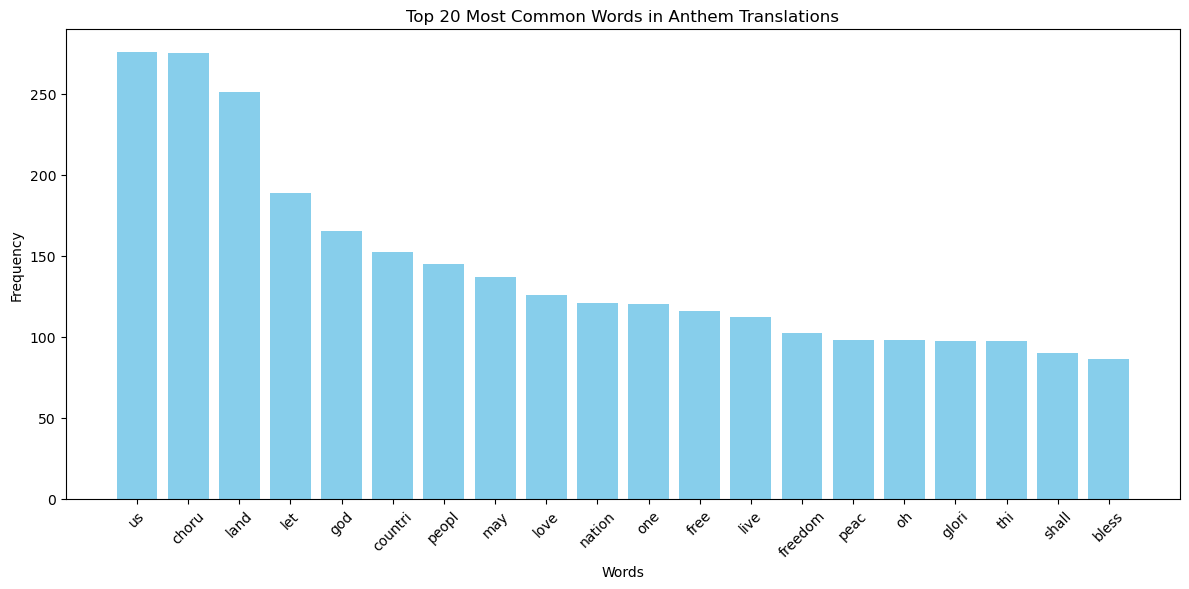

In [77]:
from collections import Counter

freq_dist = Counter(all_tokens)
most_common = freq_dist.most_common(20)
print("Top 20 most common words:", most_common)

words, counts = zip(*most_common)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Most Common Words in Anthem Translations")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
word_frequencies_by_country['us']

{'ht': 0.1393939393939394,
 'ls': 0.1111111111111111,
 'ck': 0.10526315789473684,
 'jm': 0.09836065573770492,
 'lb': 0.0958904109589041,
 'km': 0.08196721311475409,
 'cg': 0.07954545454545454,
 'cw': 0.07575757575757576,
 'bw': 0.07142857142857142,
 'sg': 0.06976744186046512,
 'it': 0.06818181818181818,
 'vn': 0.06796116504854369,
 'gr': 0.06666666666666667,
 'ga': 0.06542056074766354,
 'tg': 0.06349206349206349,
 'sc': 0.0625,
 'rw': 0.06,
 'au': 0.058823529411764705,
 'za': 0.057692307692307696,
 'vu': 0.05405405405405406}

In [79]:
def plot_words_frequency(word, freq_dict):
    plt.figure(figsize=(12, 9))
    freq_word = freq_dict[word]
    sorted_freq = dict(sorted(freq_word.items(), key=lambda item: item[1], reverse=True))
    countries = list(sorted_freq.keys())
    frequencies = list(sorted_freq.values())
    country_names = []
    for c in countries:
        country_names.append(country_code_dict[c])
        
    plt.barh(country_names[::-1], frequencies[::-1], color='skyblue', height=0.6)
    
    plt.ylabel("Country", fontsize=12)
    plt.xlabel("Normalized Frequency", fontsize=12)
    plt.title(f"Word Usage Frequency: '{word}'", fontsize=14)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    plt.show()

In [80]:
word_frequencies_by_country.keys()

dict_keys(['us', 'choru', 'land', 'let', 'god'])

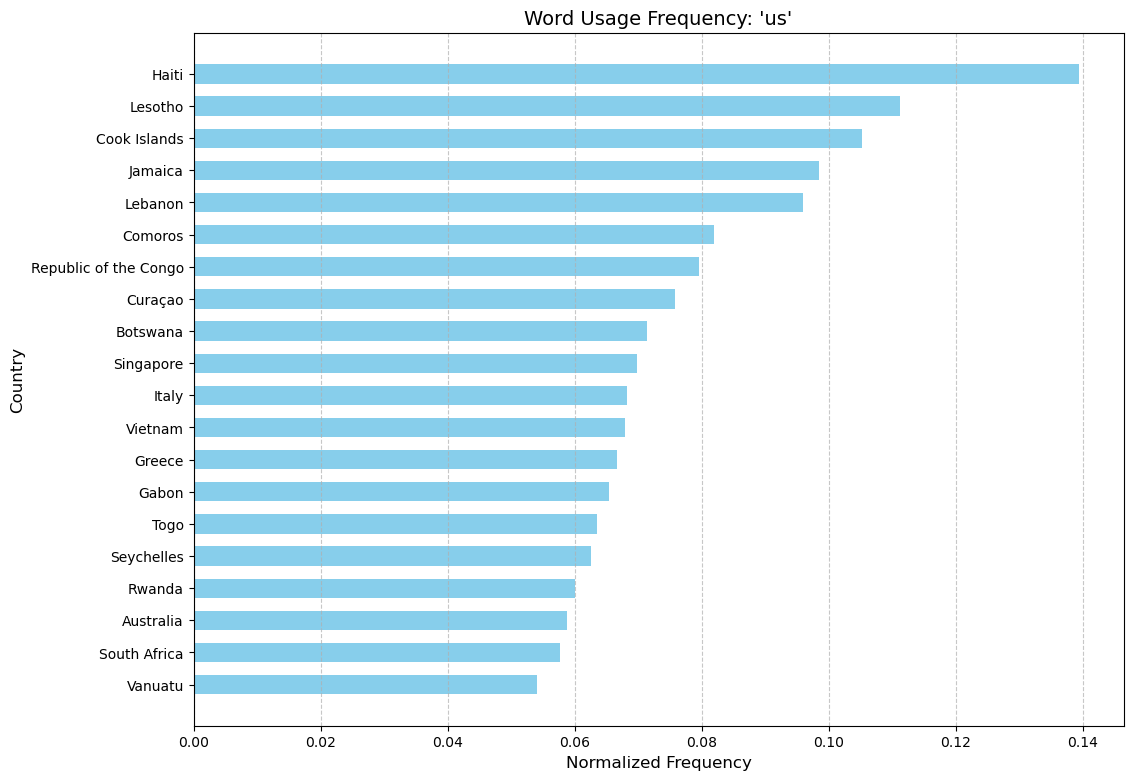

In [81]:
plot_words_frequency('us', word_frequencies_by_country)


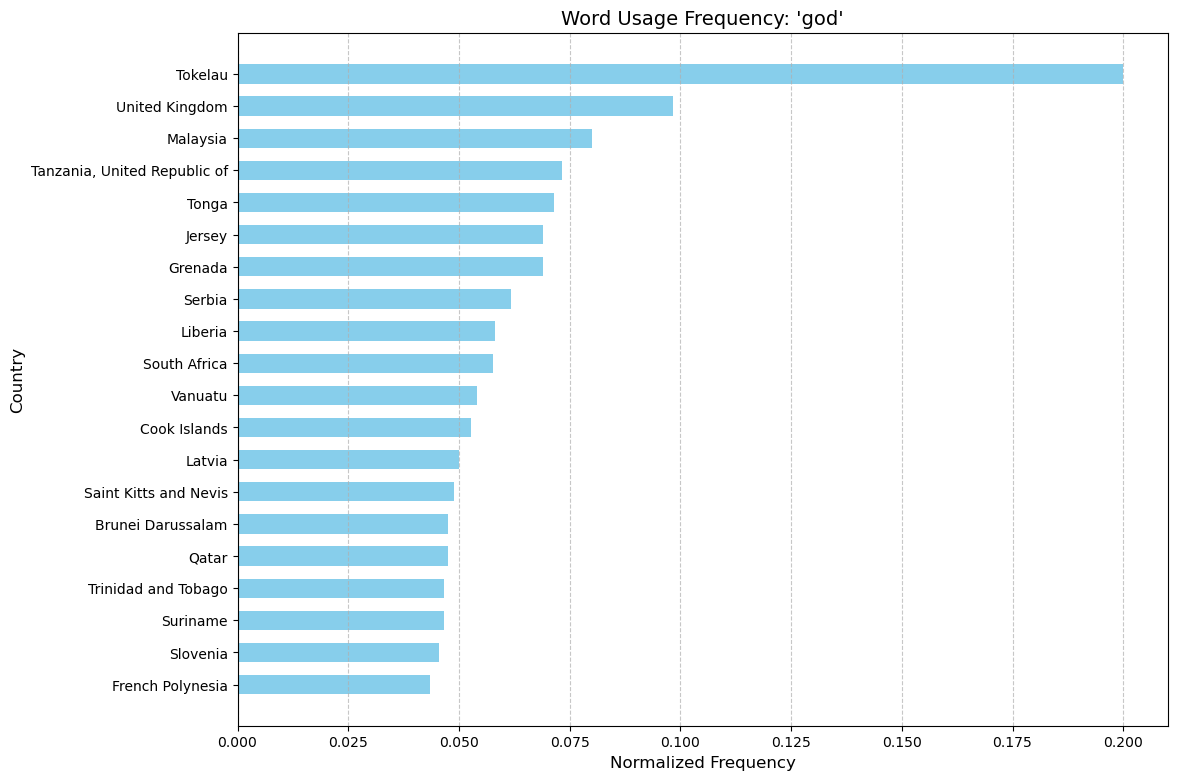

In [82]:
plot_words_frequency('god', word_frequencies_by_country)


## In most cases, words are very highly used in 1 or 2 anthems while their frequency diminshes fast after that

In [83]:
word_freq_df

us     choru      land       let       god   countri     peopl  \
tm  0.035714  0.035714  0.035714  0.017857  0.000000  0.017857  0.017857   
ve  0.000000  0.035714  0.000000  0.017857  0.000000  0.000000  0.000000   
tz  0.000000  0.048780  0.000000  0.024390  0.073171  0.000000  0.048780   
lk  0.046512  0.058140  0.011628  0.000000  0.000000  0.000000  0.000000   
mx  0.000000  0.042373  0.000000  0.008475  0.008475  0.000000  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
ci  0.020000  0.000000  0.020000  0.000000  0.000000  0.040000  0.000000   
bz  0.000000  0.022222  0.033333  0.011111  0.011111  0.000000  0.000000   
mu  0.000000  0.000000  0.000000  0.000000  0.034483  0.034483  0.034483   
us  0.011765  0.000000  0.029412  0.000000  0.005882  0.005882  0.000000   
tw  0.000000  0.000000  0.031250  0.000000  0.000000  0.031250  0.000000   

         may       one      love  ...      long       thi      flag       son  \
tm  0.000000  0.000000  0.000000  ...  0.017857  0.000000  0.017857  0.000000   
ve  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
tz  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.024390   
lk  0.000000  0.011628  0.023256  ...  0.000000  0.000000  0.000000  0.000000   
mx  0.008475  0.000000  0.000000  ...  0.000000  0.000000  0.008475  0.025424   
..       ...       ...       ...  ...       ...       ...       ...       ...   
ci  0.000000  0.000000  0.000000  ...  0.000000  0.100000  0.000000  0.020000   
bz  0.000000  0.000000  0.000000  ...  0.000000  0.011111  0.000000  0.011111   
mu  0.034483  0.068966  0.000000  ...  0.000000  0.068966  0.000000  0.000000   
us  0.011765  0.000000  0.005882  ...  0.005882  0.000000  0.005882  0.000000   
tw  0.000000  0.125000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

        ever  homeland     great      thee      unit       sea  
tm  0.035714  0.000000  0.035714  0.000000  0.017857  0.000000  
ve  0.000000  0.000000  0.000000  0.000000  0.017857  0.000000  
tz  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
lk  0.011628  0.000000  0.000000  0.034884  0.000000  0.000000  
mx  0.000000  0.059322  0.000000  0.000000  0.000000  0.000000  
..       ...       ...       ...       ...       ...       ...  
ci  0.000000  0.000000  0.020000  0.020000  0.000000  0.000000  
bz  0.000000  0.000000  0.000000  0.011111  0.000000  0.022222  
mu  0.068966  0.000000  0.000000  0.103448  0.000000  0.000000  
us  0.005882  0.000000  0.000000  0.000000  0.000000  0.000000  
tw  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[218 rows x 30 columns]

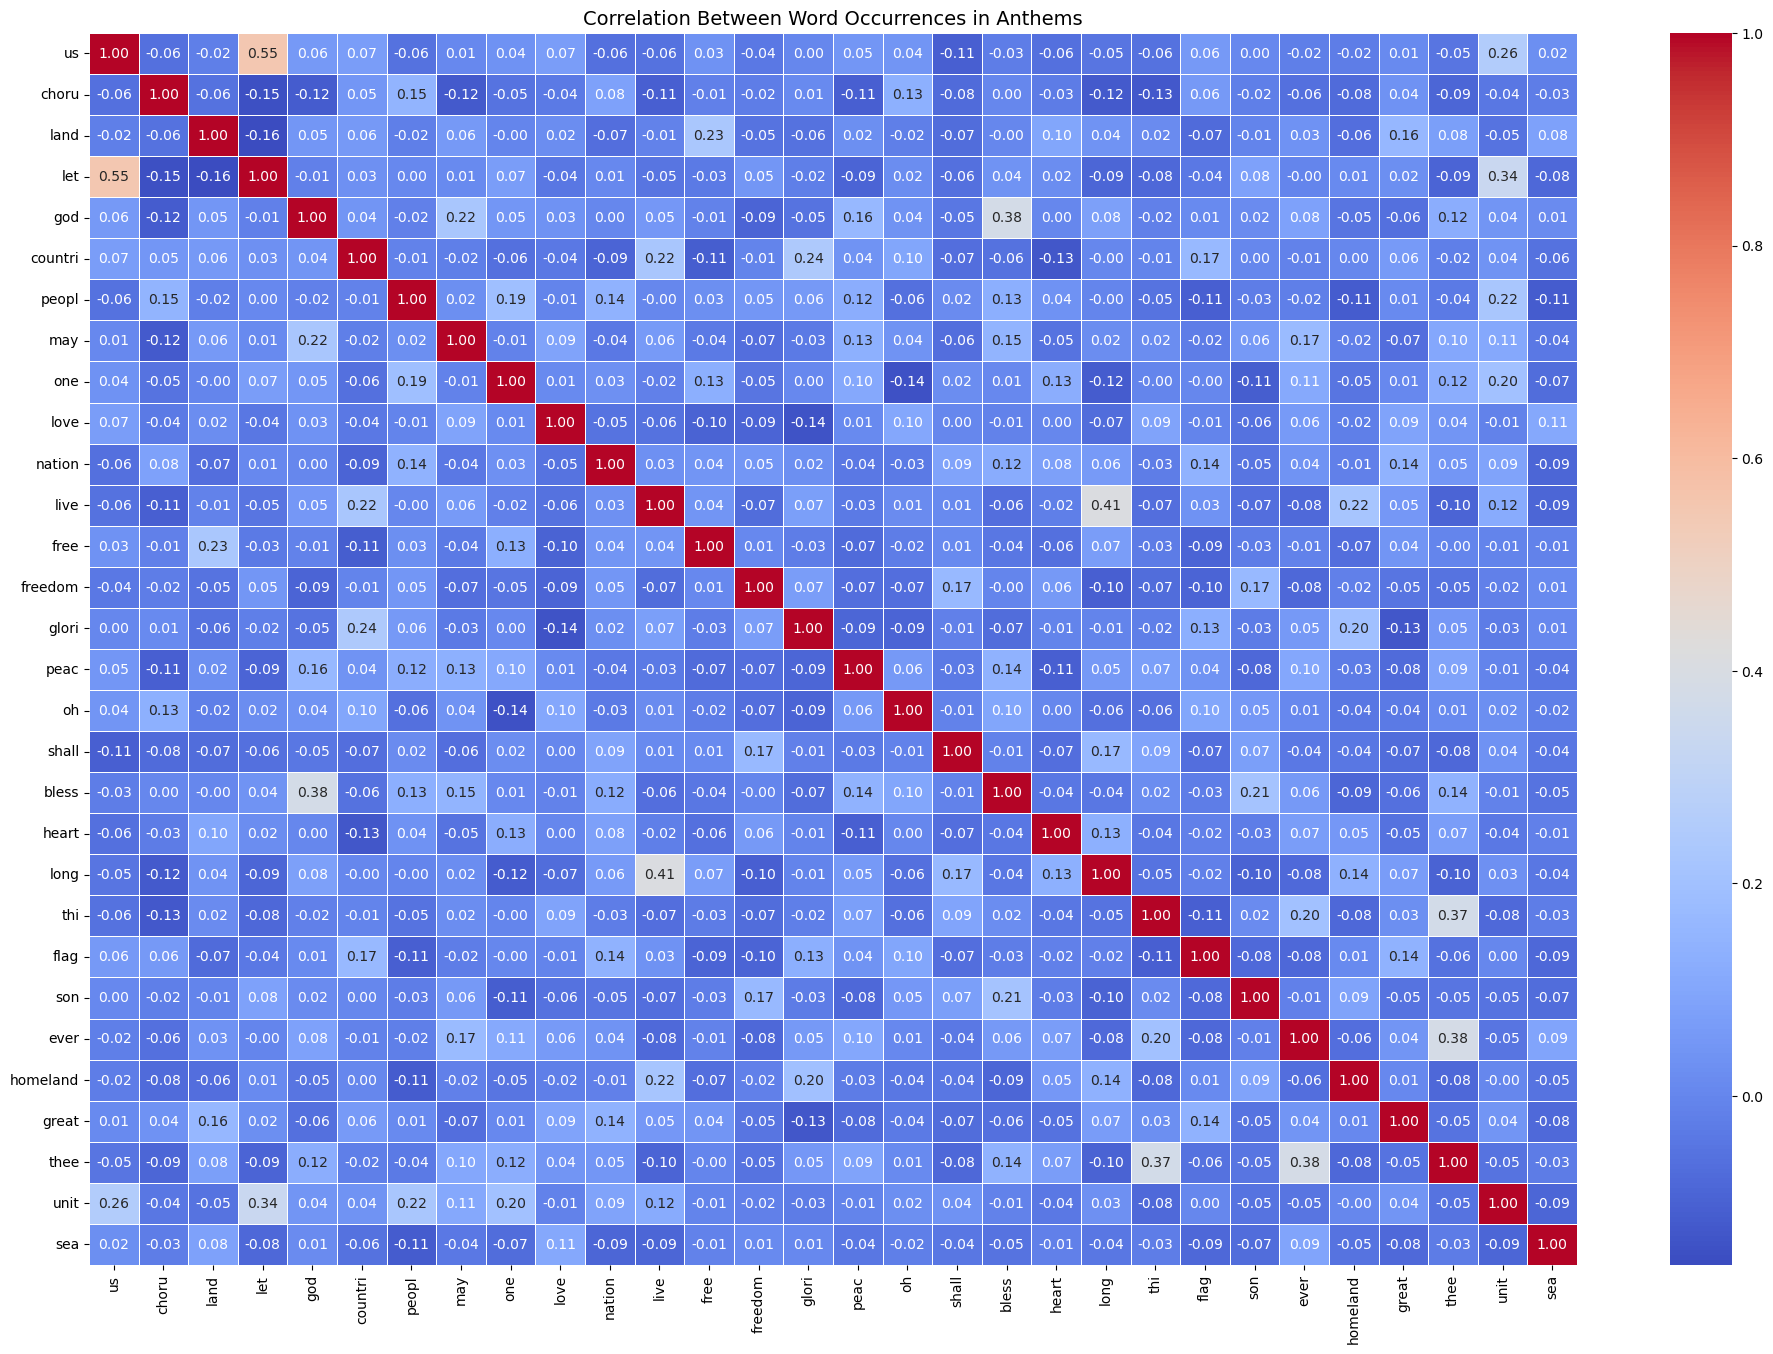

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = word_freq_df.corr()

plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Between Word Occurrences in Anthems", fontsize=14)
plt.show()


In [85]:
N = 50
top_words = [word for word, count in global_counter.most_common(N)]
print("Top words:", top_words)

data = {}
for country, counter in country_word_counts.items():
    total = sum(counter.values())
    freqs = {word: counter[word] / total for word in top_words}
    data[country] = freqs

df_data_50 = pd.DataFrame(data).T.fillna(0)

Top words: ['us', 'choru', 'land', 'let', 'god', 'countri', 'peopl', 'may', 'one', 'love', 'nation', 'live', 'free', 'freedom', 'glori', 'peac', 'oh', 'shall', 'bless', 'heart', 'long', 'thi', 'flag', 'son', 'ever', 'homeland', 'great', 'thee', 'unit', 'sea', 'world', 'liberti', 'fatherland', 'blood', 'stand', 'happi', 'die', 'hand', 'uniti', 'sing', 'home', 'sun', 'day', 'island', 'give', 'beauti', 'time', 'etern', 'alway', 'protect']


In [86]:
df_data_50

us     choru      land       let       god   countri     peopl  \
tm  0.035714  0.035714  0.035714  0.017857  0.000000  0.017857  0.017857   
ve  0.000000  0.035714  0.000000  0.017857  0.000000  0.000000  0.000000   
tz  0.000000  0.048780  0.000000  0.024390  0.073171  0.000000  0.048780   
lk  0.046512  0.058140  0.011628  0.000000  0.000000  0.000000  0.000000   
mx  0.000000  0.042373  0.000000  0.008475  0.008475  0.000000  0.000000   
..       ...       ...       ...       ...       ...       ...       ...   
ci  0.020000  0.000000  0.020000  0.000000  0.000000  0.040000  0.000000   
bz  0.000000  0.022222  0.033333  0.011111  0.011111  0.000000  0.000000   
mu  0.000000  0.000000  0.000000  0.000000  0.034483  0.034483  0.034483   
us  0.011765  0.000000  0.029412  0.000000  0.005882  0.005882  0.000000   
tw  0.000000  0.000000  0.031250  0.000000  0.000000  0.031250  0.000000   

         may       one      love  ...      home      sun  day  island  \
tm  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.0     0.0   
ve  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.0     0.0   
tz  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.0     0.0   
lk  0.000000  0.011628  0.023256  ...  0.000000  0.00000  0.0     0.0   
mx  0.008475  0.000000  0.000000  ...  0.000000  0.00000  0.0     0.0   
..       ...       ...       ...  ...       ...      ...  ...     ...   
ci  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.0     0.0   
bz  0.000000  0.000000  0.000000  ...  0.000000  0.00000  0.0     0.0   
mu  0.034483  0.068966  0.000000  ...  0.000000  0.00000  0.0     0.0   
us  0.011765  0.000000  0.005882  ...  0.035294  0.00000  0.0     0.0   
tw  0.000000  0.125000  0.000000  ...  0.000000  0.03125  0.0     0.0   

        give    beauti      time     etern  alway  protect  
tm  0.017857  0.000000  0.017857  0.000000    0.0      0.0  
ve  0.000000  0.000000  0.000000  0.000000    0.0      0.0  
tz  0.000000  0.000000  0.000000  0.024390    0.0      0.0  
lk  0.000000  0.000000  0.000000  0.000000    0.0      0.0  
mx  0.000000  0.000000  0.000000  0.008475    0.0      0.0  
..       ...       ...       ...       ...    ...      ...  
ci  0.000000  0.000000  0.000000  0.000000    0.0      0.0  
bz  0.000000  0.000000  0.000000  0.000000    0.0      0.0  
mu  0.000000  0.034483  0.000000  0.000000    0.0      0.0  
us  0.000000  0.000000  0.000000  0.000000    0.0      0.0  
tw  0.000000  0.000000  0.000000  0.000000    0.0      0.0  

[218 rows x 50 columns]

In [87]:
corr_matrix_50 = df_data_50.corr()

In [88]:
word_correlations = df_data_50.corr()["god"].sort_values(ascending=False)


In [89]:
word_correlations

god           1.000000
bless         0.379657
stand         0.249176
may           0.224510
peac          0.164048
protect       0.157842
thee          0.121915
happi         0.103185
ever          0.082777
long          0.079702
island        0.073536
liberti       0.069972
us            0.057312
live          0.049339
one           0.047227
land          0.047224
countri       0.041504
unit          0.041269
oh            0.040180
hand          0.034217
love          0.033352
uniti         0.029084
son           0.016105
sea           0.014479
flag          0.012938
give          0.011088
nation        0.001636
heart         0.001334
home         -0.009227
free         -0.010416
let          -0.014973
peopl        -0.016124
sing         -0.016211
alway        -0.016425
etern        -0.016758
thi          -0.017711
beauti       -0.018969
fatherland   -0.033030
time         -0.035913
shall        -0.045374
homeland     -0.047874
glori        -0.051884
great        -0.060932
day        

### Notice that if god is present frequently in an anthem, bless, stand, may and lord are more likely to be present

## Displaying highly correlated pairs of words

In [90]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = df_data_50.corr()

# Define threshold for significant correlation
threshold = 0.25

high_correlation_pairs = {}

seen_pairs = set()

for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if row != col:  
            pair = tuple(sorted([row, col]))  

            if pair not in seen_pairs:  
                corr_value = correlation_matrix.loc[row, col]
                if abs(corr_value) > threshold:  
                    high_correlation_pairs[pair] = corr_value
                    seen_pairs.add(pair)  

high_corr_df = pd.DataFrame(high_correlation_pairs.items(), columns=["Word Pair", "Correlation"])

high_corr_df = high_corr_df.sort_values(by="Correlation", ascending=False, key=abs)



In [91]:
high_corr_df

Word Pair  Correlation
0             (let, us)     0.553670
10           (sea, sun)     0.507710
5          (live, long)     0.407650
8          (ever, thee)     0.383769
15        (alway, time)     0.379658
4          (bless, god)     0.379657
12  (fatherland, happi)     0.379367
7           (thee, thi)     0.374460
11     (alway, liberti)     0.361662
3           (let, unit)     0.338697
13       (happi, uniti)     0.297885
6       (freedom, sing)     0.294938
9           (sea, sing)     0.286061
14       (beauti, home)     0.258157
1            (unit, us)     0.256259
2          (home, land)     0.250348

In [92]:
pip install webcolors

Note: you may need to restart the kernel to use updated packages.


In [93]:
total_df.head()

Sampling Rate                                           Waveform  \
Country                                                                     
tm               44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
ve               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
tz               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
lk               44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
mx               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               Pixel Array  \
Country                                                      
tm       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
ve       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
tz       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
lk       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
mx       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                              Country Name  \
Country                                      
tm                            Turkmenistan   
ve       Venezuela, Bolivarian Republic of   
tz            Tanzania, United Republic of   
lk                               Sri Lanka   
mx                                  Mexico   

                                                      Text  
Country                                                     
tm       readi give life nativ hearth spirit ancestor d...  
ve       choru glori brave nation shook yoke respect la...  
tz       god bless africa bless leader let wisdom uniti...  
lk       mother sri lanka choru sri lanka salut thee mo...  
mx       choru mexican cri war grasp steel bridl let ea...

In [94]:
total_df.iloc[0, 2]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [95]:
image_df

Country                                        Pixel Array  \
0        tg  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1        me  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2        la  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3        mr  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4        ni  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..      ...                                                ...   
248      za  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
249      uy  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
250      wf  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
251      vu  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
252      tj  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                Country Name  
0                                       Togo  
1                                 Montenegro  
2    Laos (Lao People's Democratic Republic)  
3                                 Mauritania  
4                                  Nicaragua  
..                                       ...  
248                             South Africa  
249                                  Uruguay  
250                Wallis and Futuna Islands  
251                                  Vanuatu  
252                               Tajikistan  

[253 rows x 3 columns]

In [97]:
pip install pycountry_convert

Note: you may need to restart the kernel to use updated packages.


## Obtaining the dominant colors in each flag

In [98]:

from matplotlib.colors import rgb2hex, hex2color
from collections import Counter

# Define our own color names dictionary
CSS3_NAMES_TO_HEX = {
    'black': '#000000',
    'silver': '#c0c0c0',
    'gray': '#808080',
    'white': '#ffffff',
    'maroon': '#800000',
    'red': '#ff0000',
    'purple': '#800080',
    'green': '#008000',
    'lime': '#00ff00',
    'yellow': '#ffff00',
    'blue': '#0000ff',
    'orange': '#ffa500',
    'gold': '#ffd700',
    'brown': '#a52a2a',
    'darkred': '#8b0000',
    'darkgreen': '#006400',
    'darkblue': '#00008b',
    'crimson': '#dc143c',
    'royalblue': '#4169e1',
    'darkgray': '#a9a9a9',
    'lightgray': '#d3d3d3',
}

CSS3_HEX_TO_NAMES = {v: k for k, v in CSS3_NAMES_TO_HEX.items()}

def closest_color(requested_color):
    """Find the closest color name for a given RGB value"""
    min_colors = {}
    for hex_value, name in CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = hex2color(hex_value)
        r_c, g_c, b_c = int(r_c*255), int(g_c*255), int(b_c*255)
        
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    
    return min_colors[min(min_colors.keys())]


In [99]:

def is_black_or_nearly_black(pixel, threshold=20):
    """Check if a pixel is black or nearly black"""
    return all(channel <= threshold for channel in pixel)

In [100]:

def find_dominant_colors_ignore_padding(pixel_array, n_colors=5):
    """Find dominant colors while ignoring black padding"""
    # Reshape to 64x64x3
    pixels = np.array(pixel_array).reshape(64, 64, 3)
    
    # Reshape to a list of pixels
    pixels_flattened = pixels.reshape(-1, 3)
    
    # Convert to 0-255 range if needed
    if pixels_flattened.max() <= 1.0:
        pixels_flattened = (pixels_flattened * 255).astype(np.uint8)
    
    # Filter out black padding pixels
    non_black_pixels = [tuple(pixel) for pixel in pixels_flattened if not is_black_or_nearly_black(pixel)]
    
    # If all pixels are black (or nearly black), use the original pixels
    if not non_black_pixels:
        print("Warning: All pixels appear to be black or nearly black. Using all pixels for analysis.")
        non_black_pixels = [tuple(pixel) for pixel in pixels_flattened]
    
    # Round colors to reduce noise and improve grouping
    rounded_pixels = [tuple((np.array(pixel) // 20) * 20) for pixel in non_black_pixels]
    
    # Count occurrences of each color
    color_counts = Counter(rounded_pixels)
    
    # Get the n most common colors
    most_common = color_counts.most_common(n_colors)
    
    colors = np.array([color for color, count in most_common])
    counts = np.array([count for color, count in most_common])
    
    hex_colors = [rgb2hex(np.array(color)/255) for color in colors]
    color_names = [closest_color(color) for color in colors]
    
    percentages = counts / len(non_black_pixels) * 100
    
    
    return hex_colors, color_names, percentages


Analyzing flag of Togo (tg):


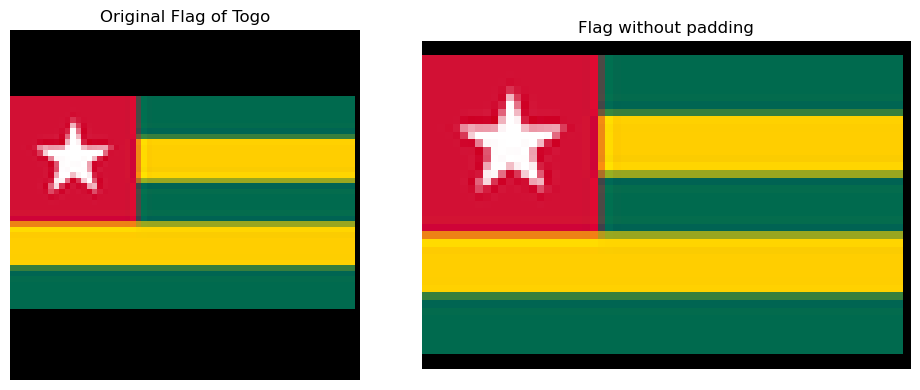


Analyzing flag of Montenegro (me):


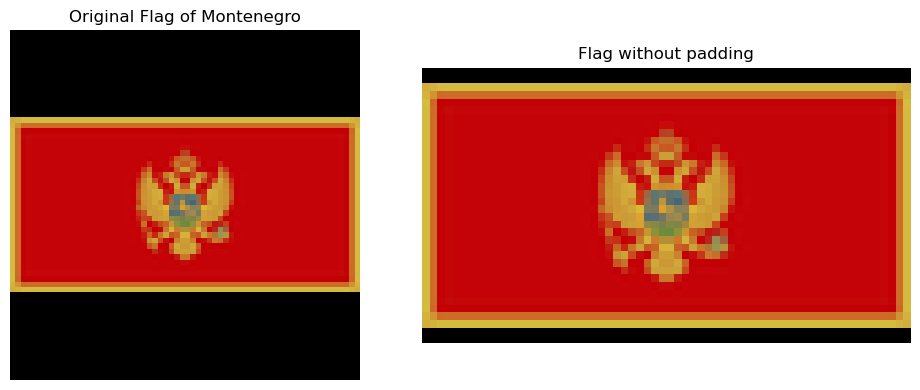


Analyzing flag of Laos (Lao People's Democratic Republic) (la):


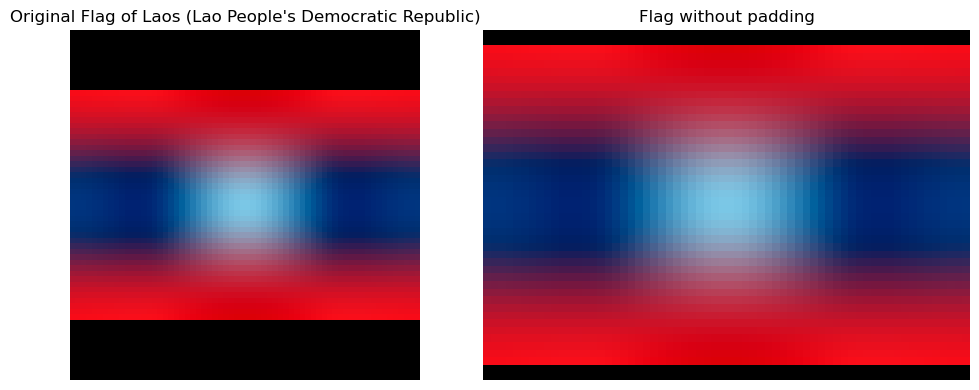


Analyzing flag of Mauritania (mr):


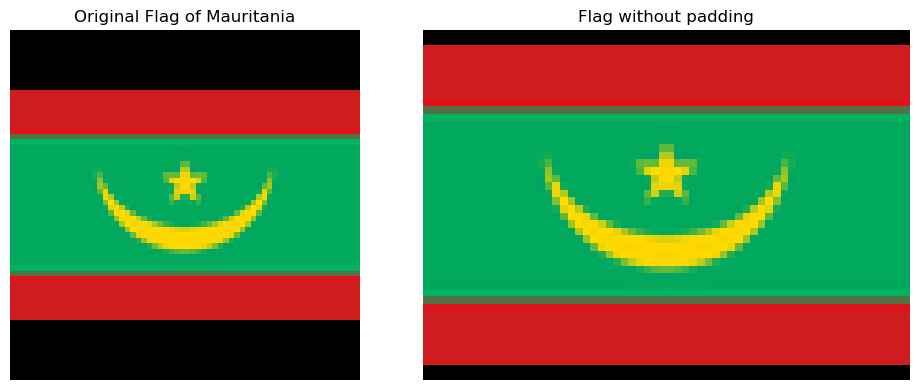


Analyzing flag of Nicaragua (ni):


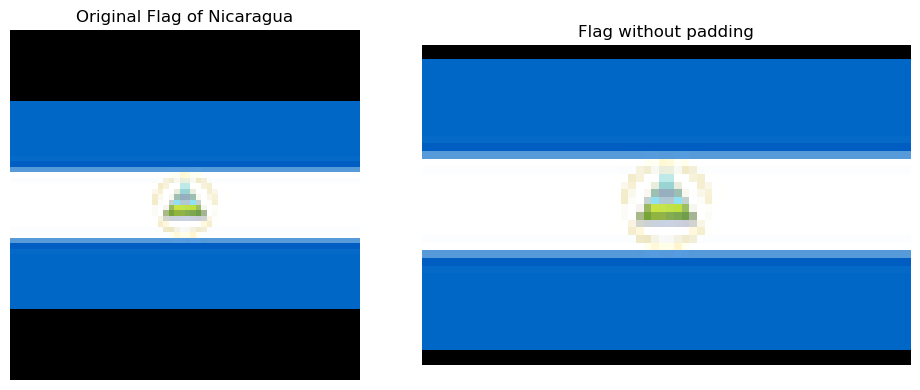


Analyzing flag of Latvia (lv):


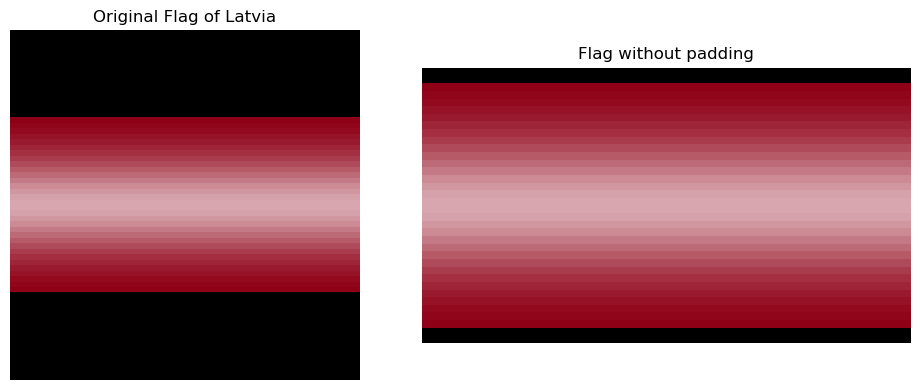


Analyzing flag of Oman (om):


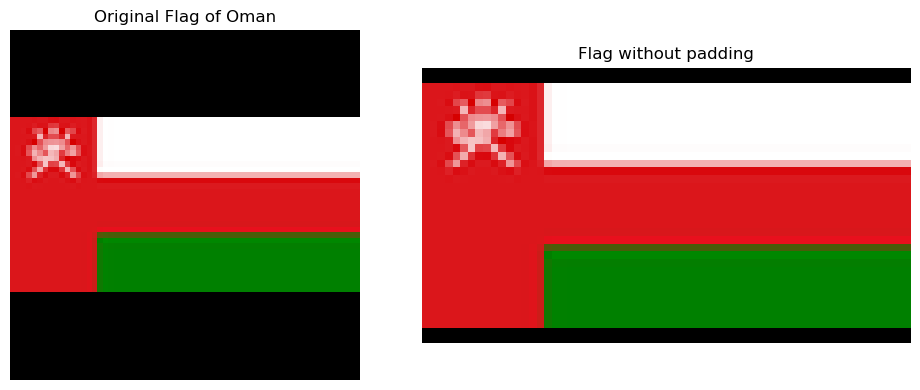


Analyzing flag of Afghanistan (af):


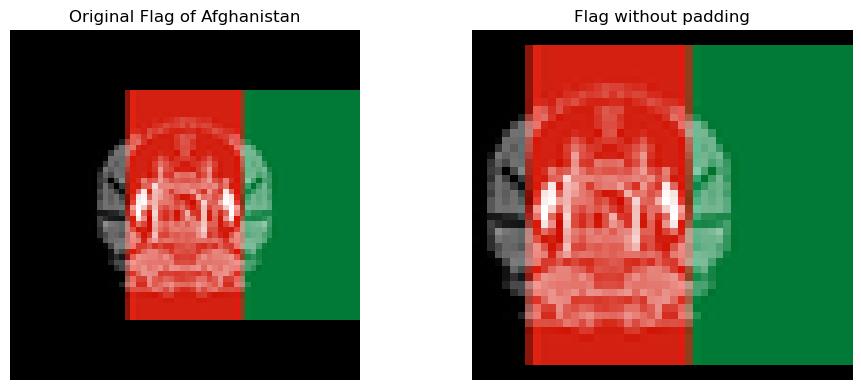


Analyzing flag of Cyprus (cy):


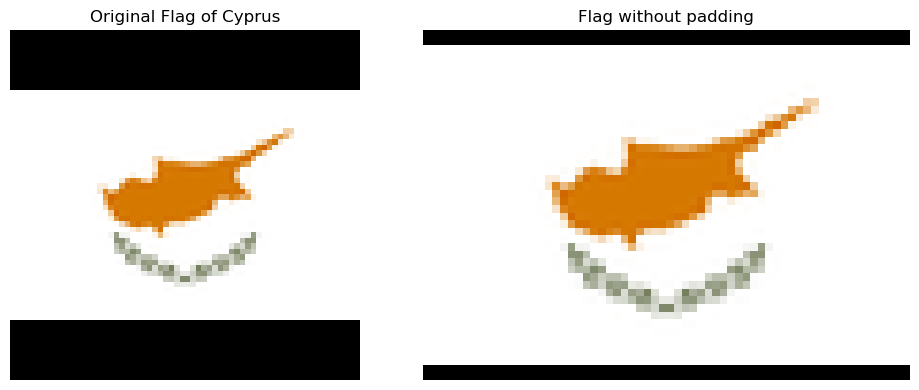


Analyzing flag of Benin (bj):


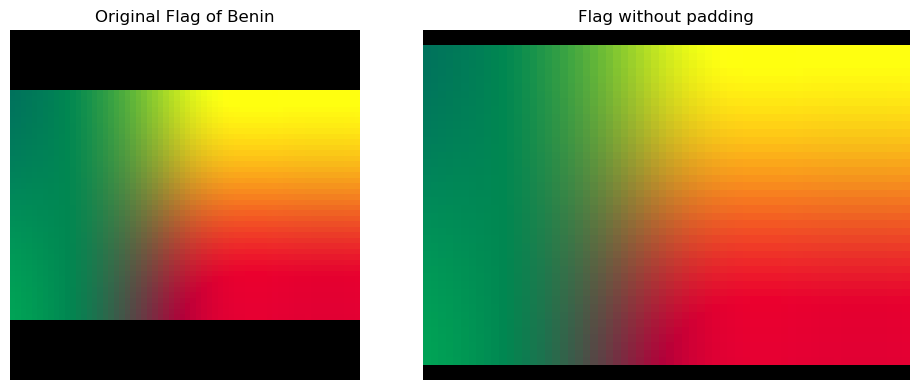


Analyzing flag of Antarctica (aq):


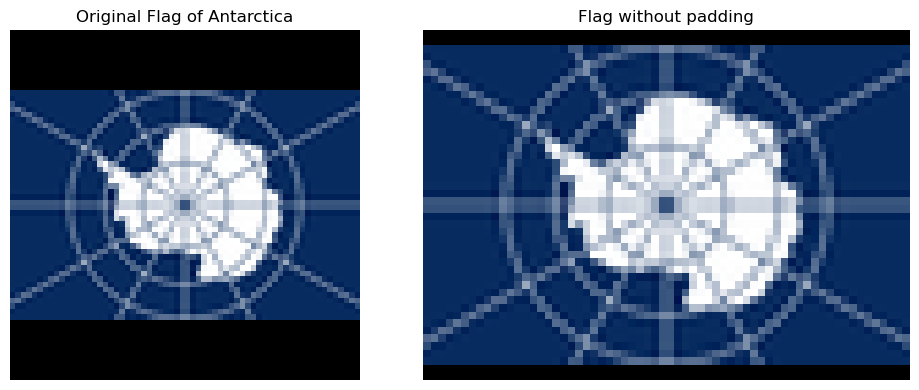


Analyzing flag of China (People's Republic of China) (cn):


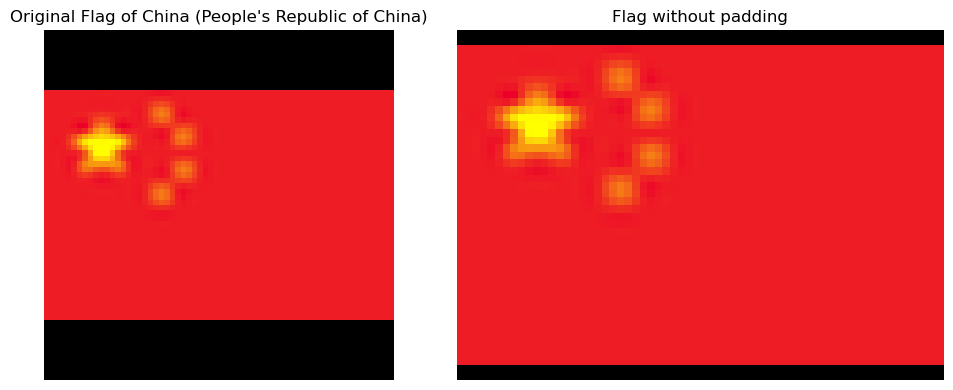


Analyzing flag of Scotland (gb-sct):


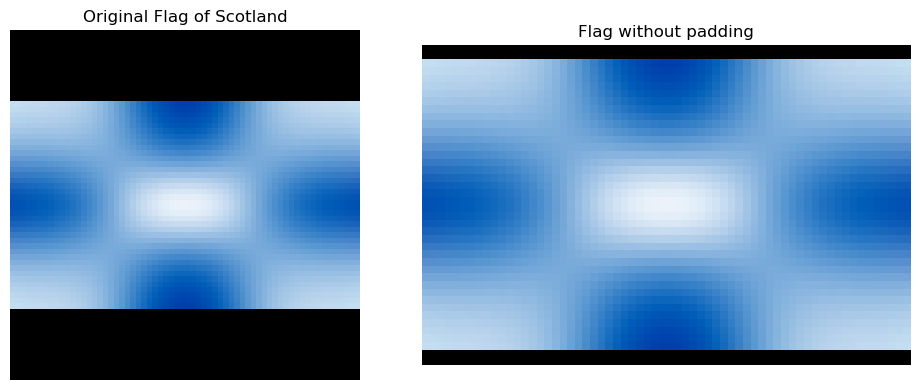


Analyzing flag of Colombia (co):


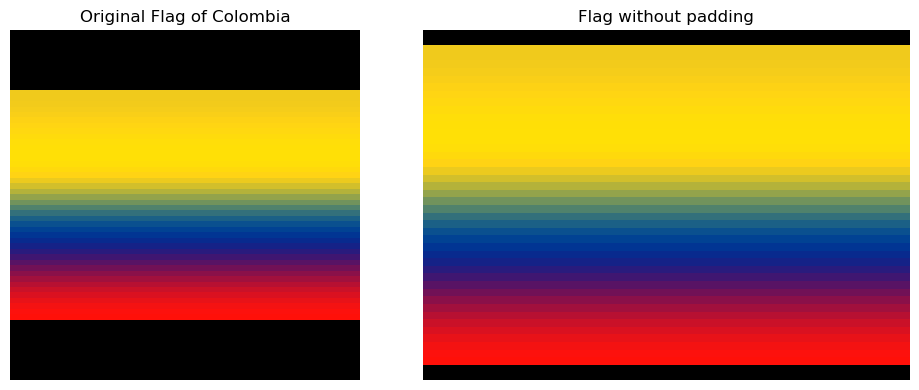


Analyzing flag of Christmas Island (cx):


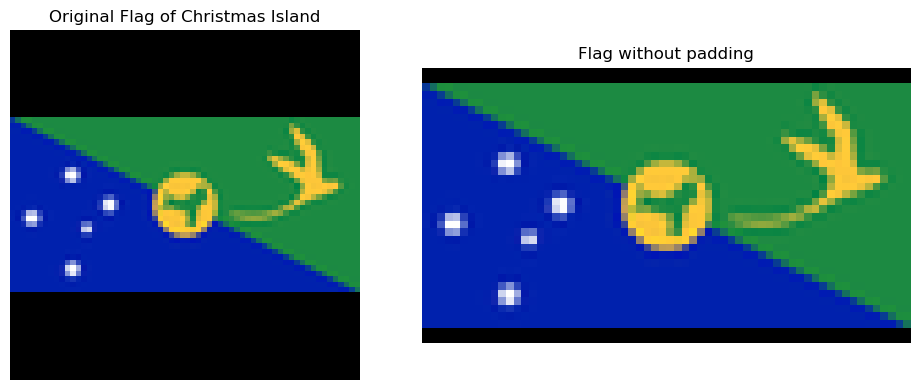


Analyzing flag of Antigua and Barbuda (ag):


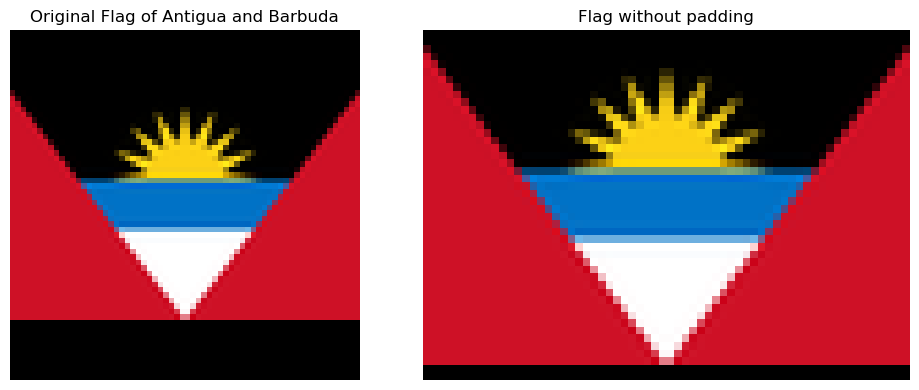


Analyzing flag of Montserrat (ms):


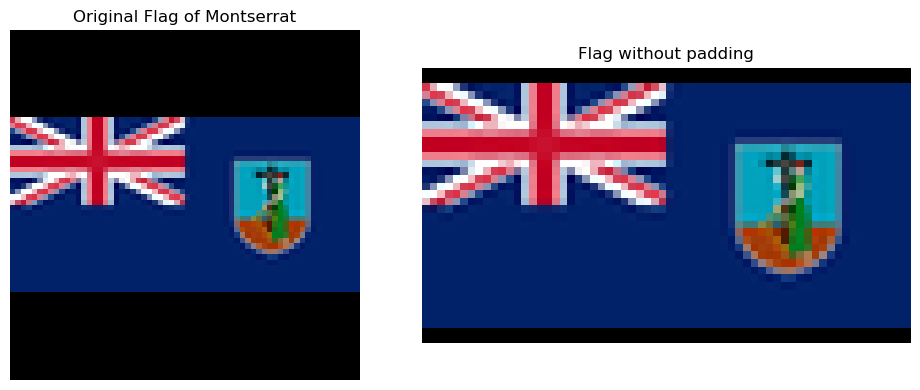


Analyzing flag of Moldova, Republic of (md):


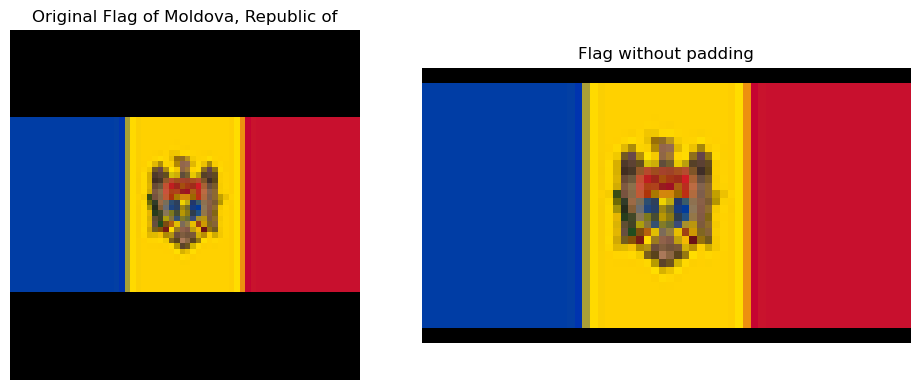


Analyzing flag of Zambia (zm):


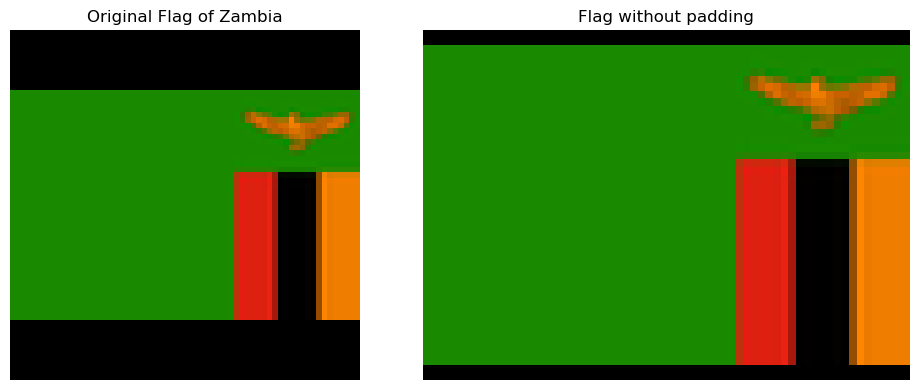


Analyzing flag of Vietnam (vn):


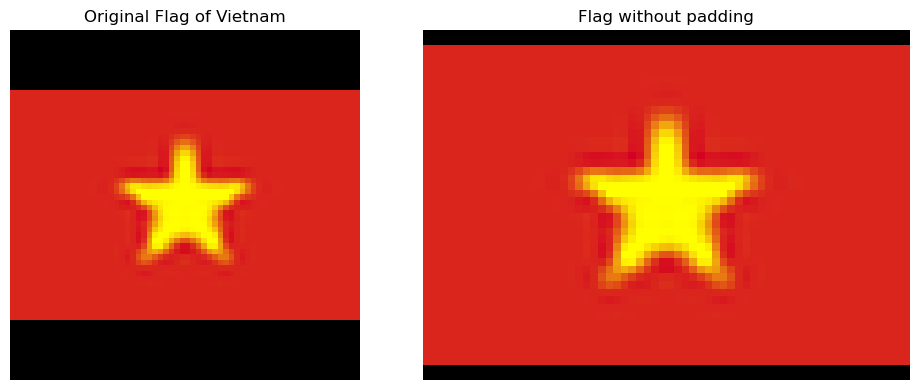


Analyzing flag of French Southern Territories (tf):


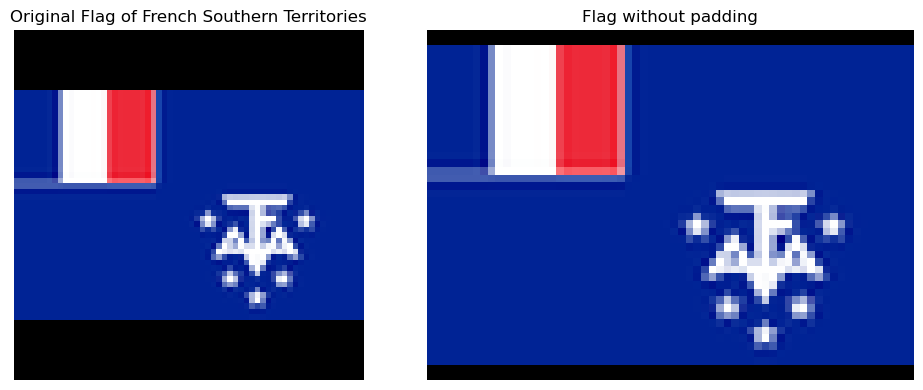


Analyzing flag of Chad (td):


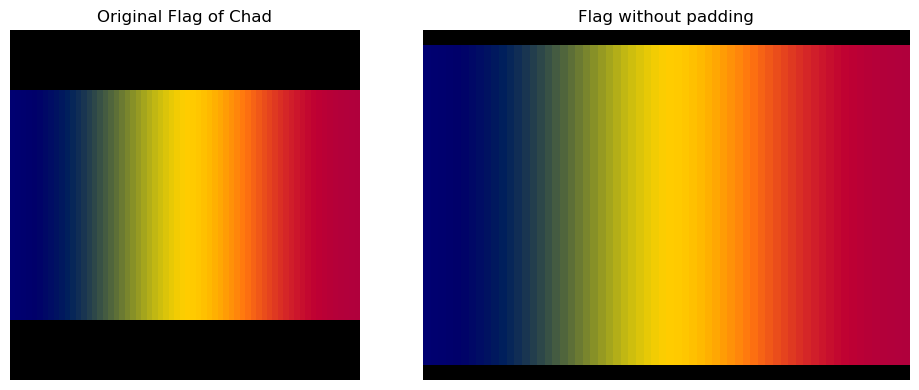


Analyzing flag of Mayotte (yt):


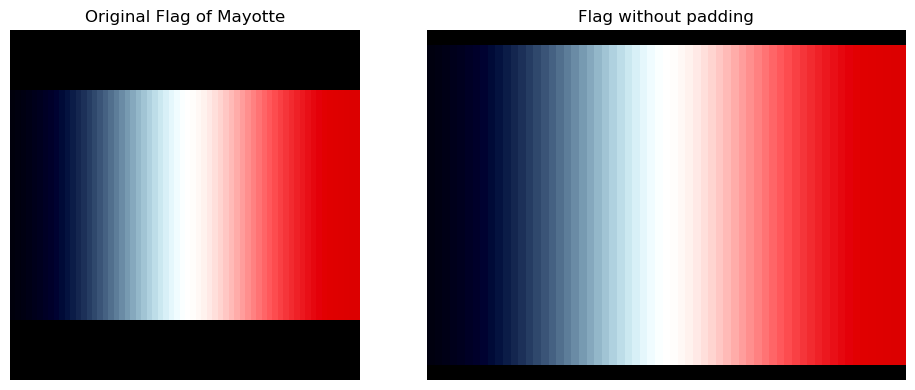


Analyzing flag of Lebanon (lb):


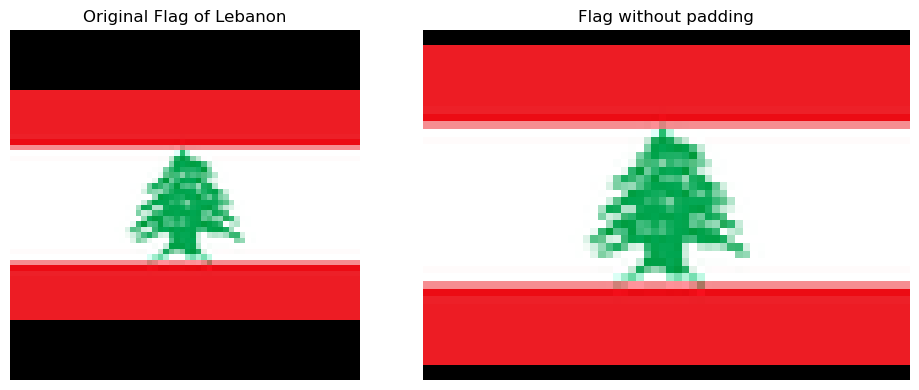


Analyzing flag of Saint Martin (mf):


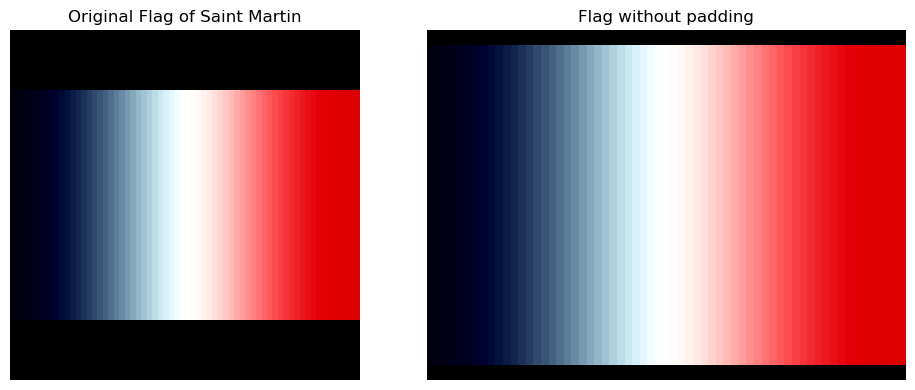


Analyzing flag of Luxembourg (lu):


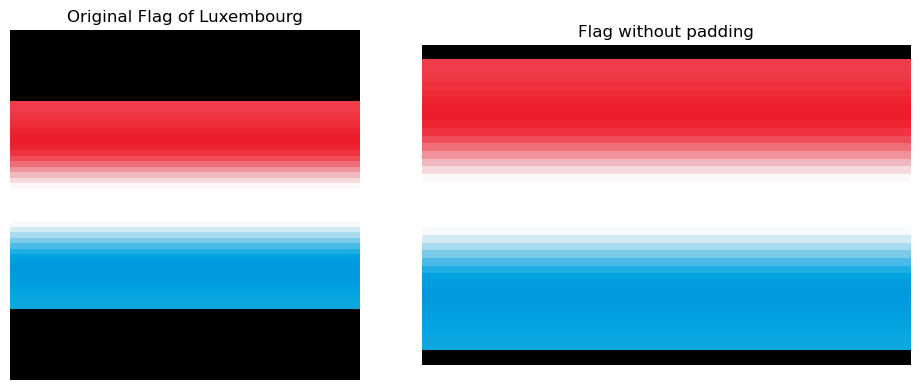


Analyzing flag of Martinique (mq):


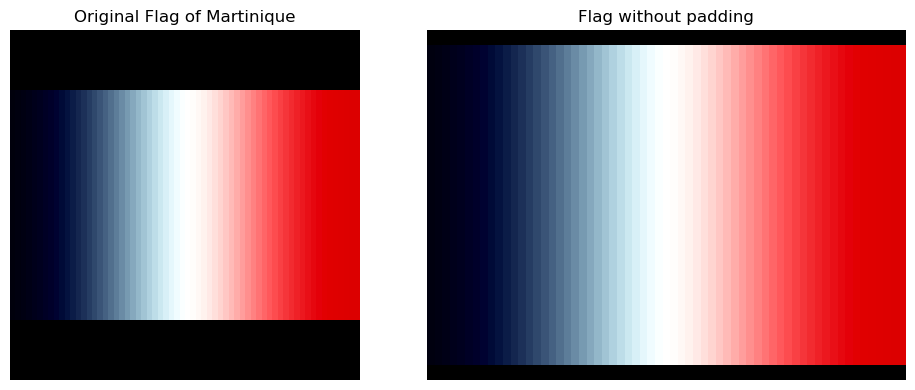


Analyzing flag of Czech Republic (cz):


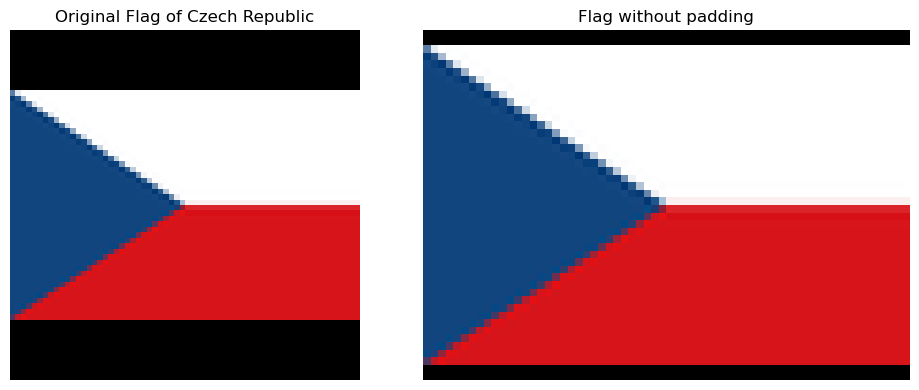


Analyzing flag of United Arab Emirates (ae):


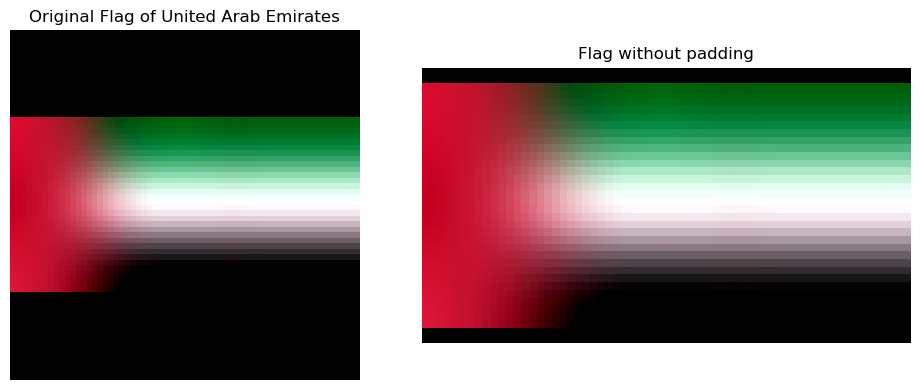


Analyzing flag of Cameroon (cm):


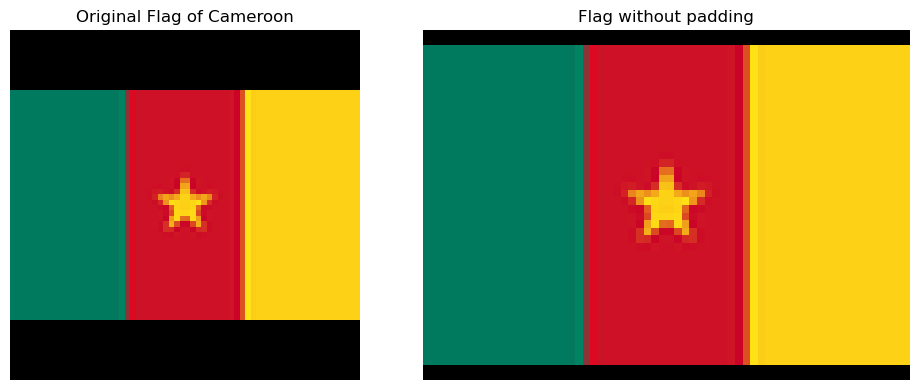


Analyzing flag of Burundi (bi):


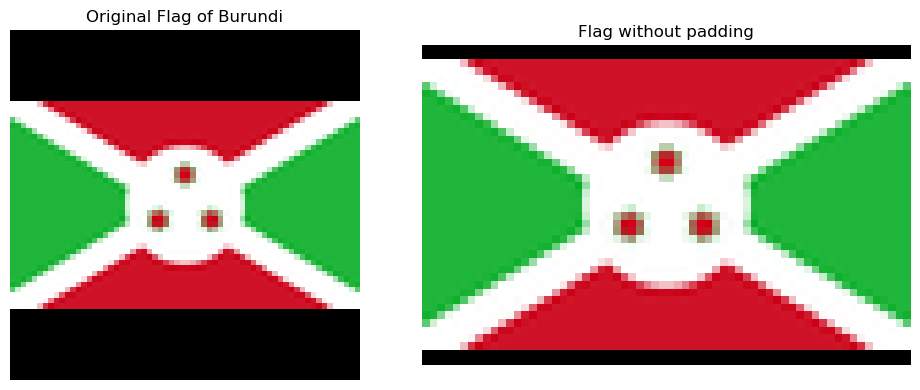


Analyzing flag of Argentina (ar):


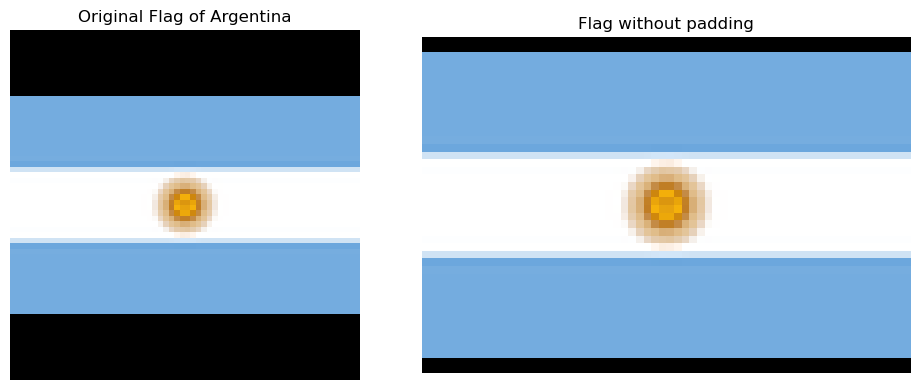


Analyzing flag of American Samoa (as):


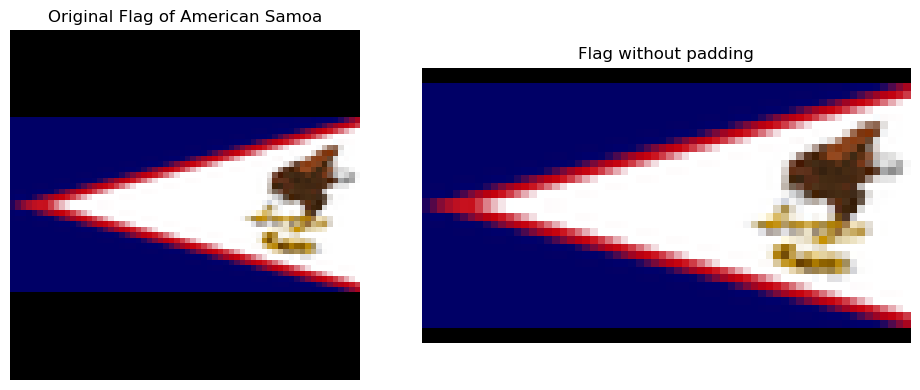


Analyzing flag of Bahrain (bh):


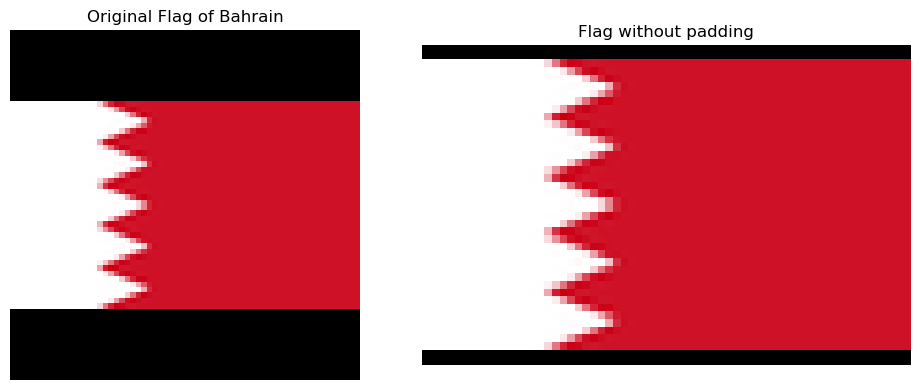


Analyzing flag of Chile (cl):


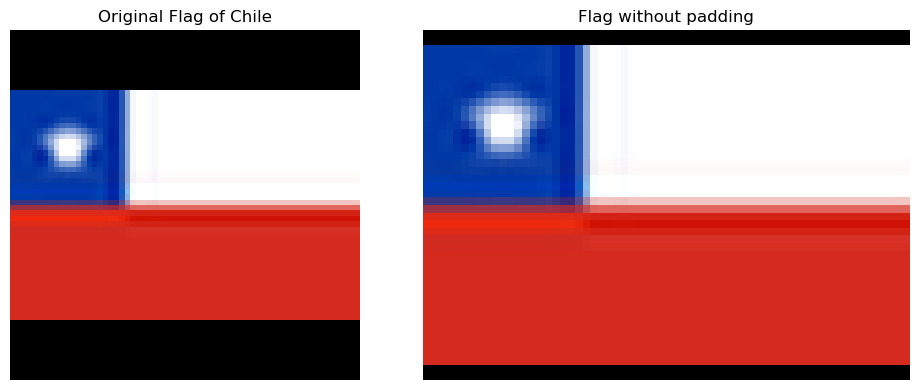


Analyzing flag of Andorra (ad):


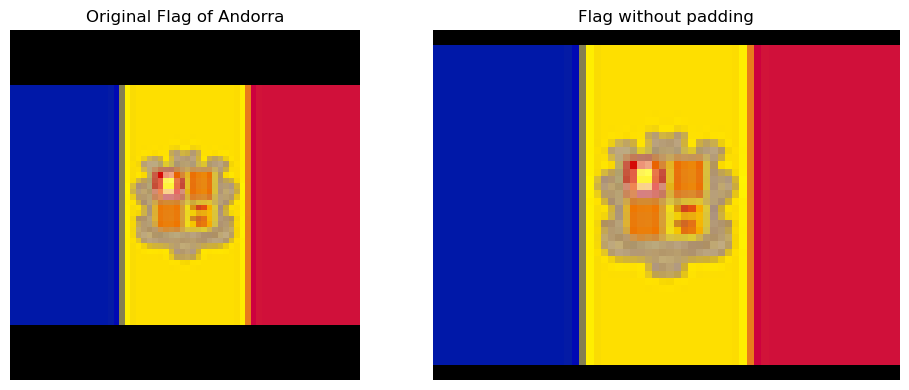


Analyzing flag of Northern Mariana Islands (mp):


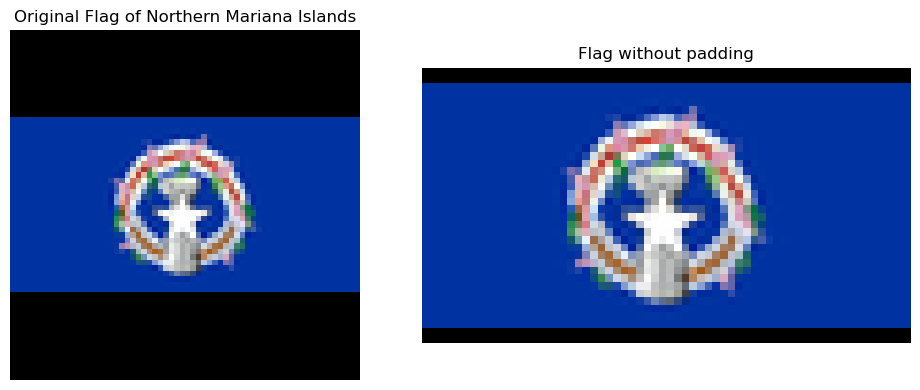


Analyzing flag of Lithuania (lt):


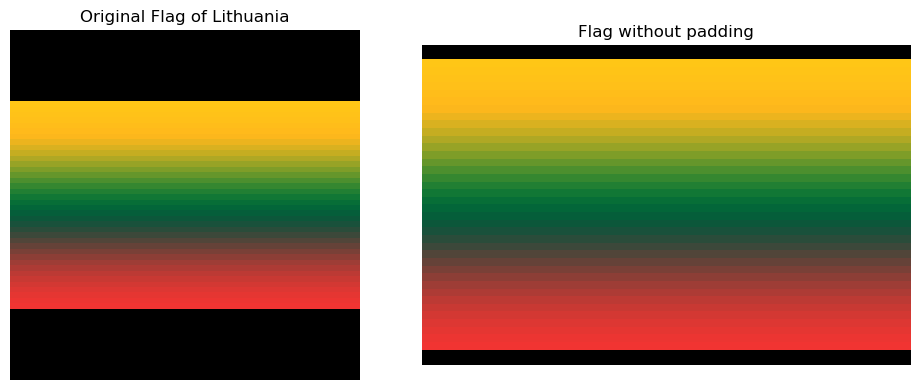


Analyzing flag of Madagascar (mg):


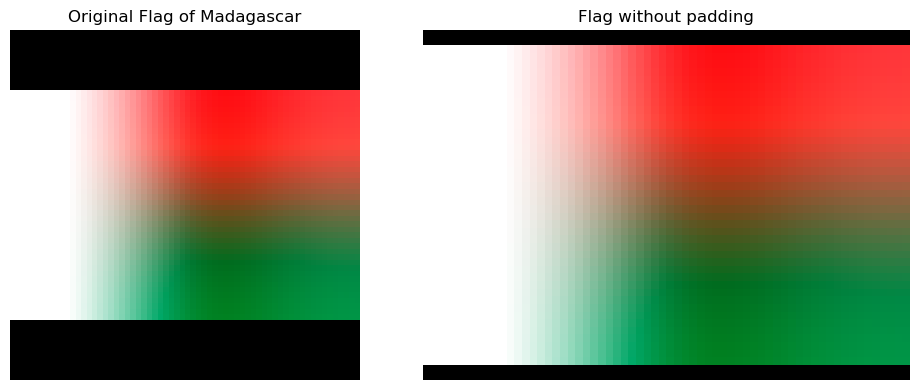


Analyzing flag of Saint Lucia (lc):


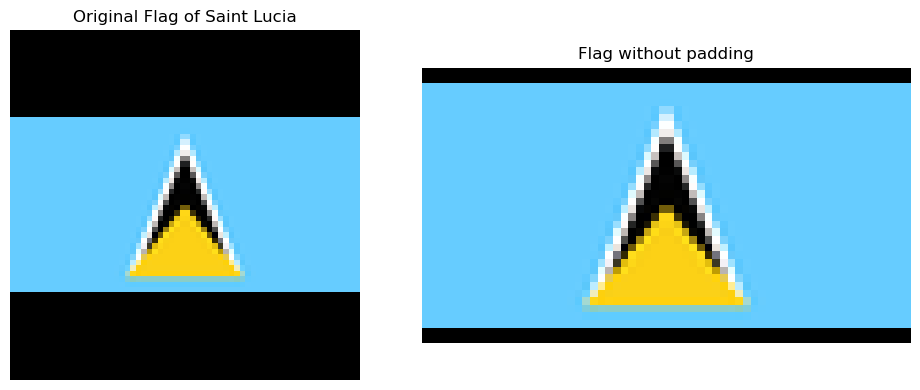


Analyzing flag of Republic of Türkiye (tr):


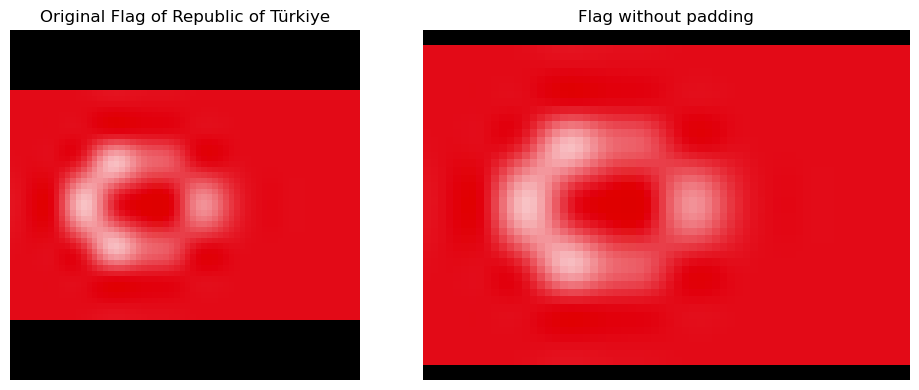


Analyzing flag of Ukraine (ua):


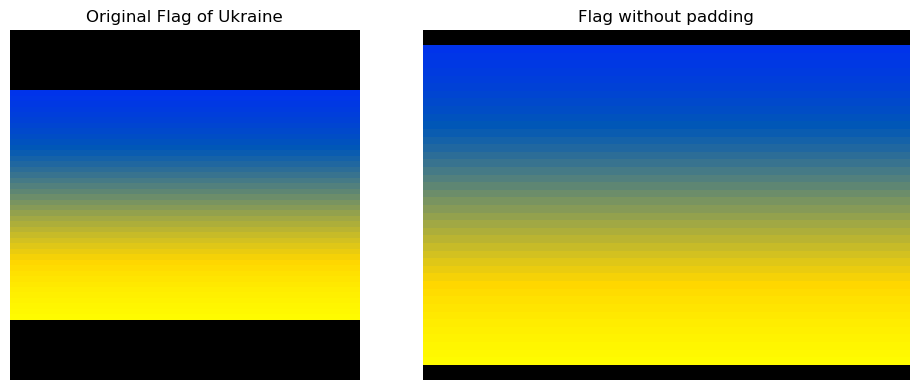


Analyzing flag of Tuvalu (tv):


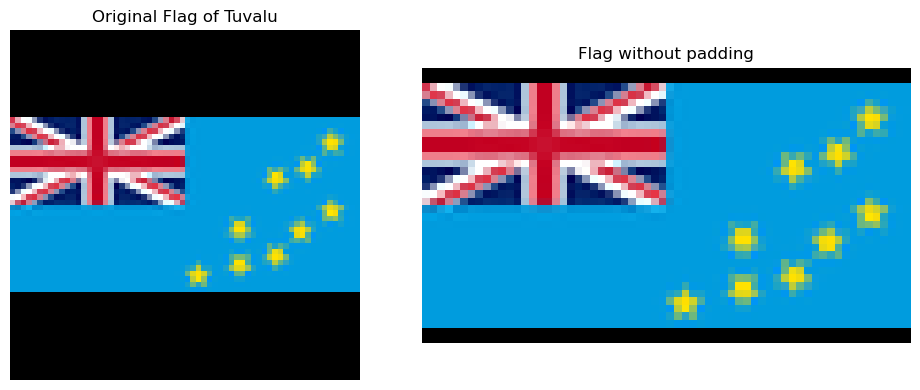


Analyzing flag of Virgin Islands, U.S. (vi):


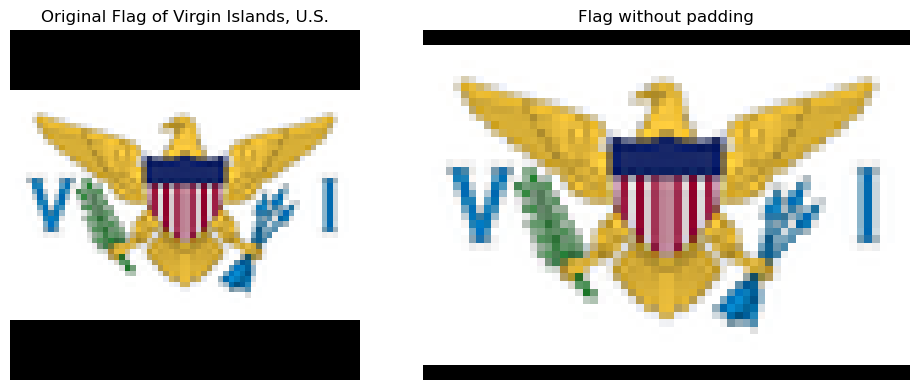


Analyzing flag of Malta (mt):


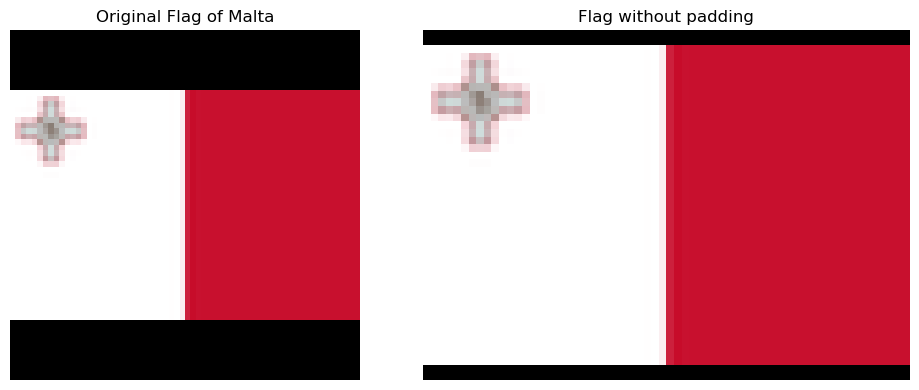


Analyzing flag of Norway (no):


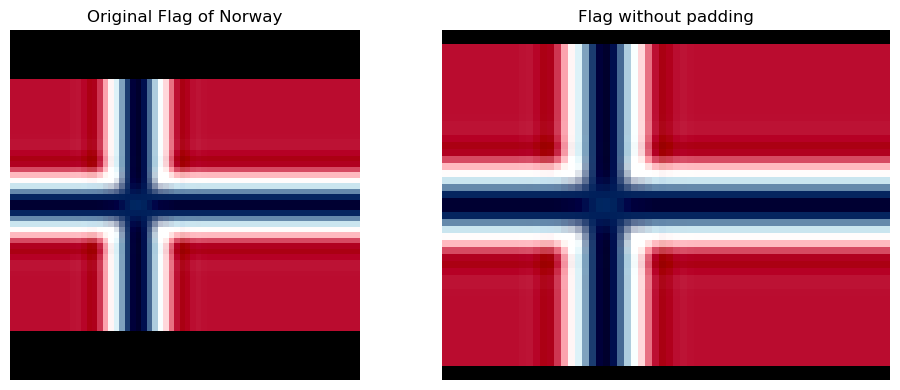


Analyzing flag of Monaco (mc):


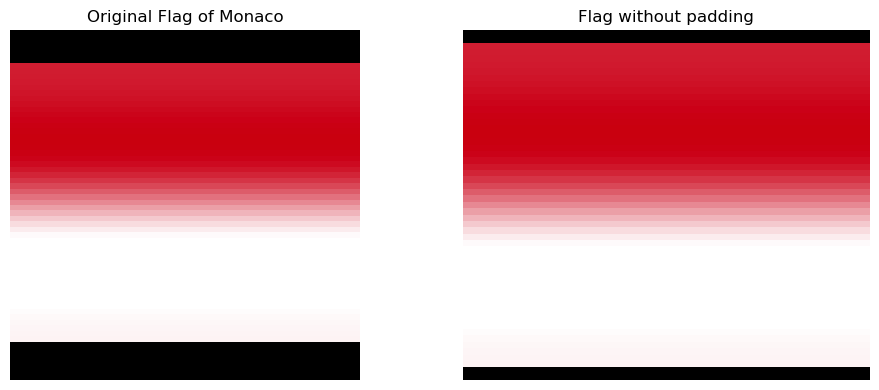


Analyzing flag of Switzerland (ch):


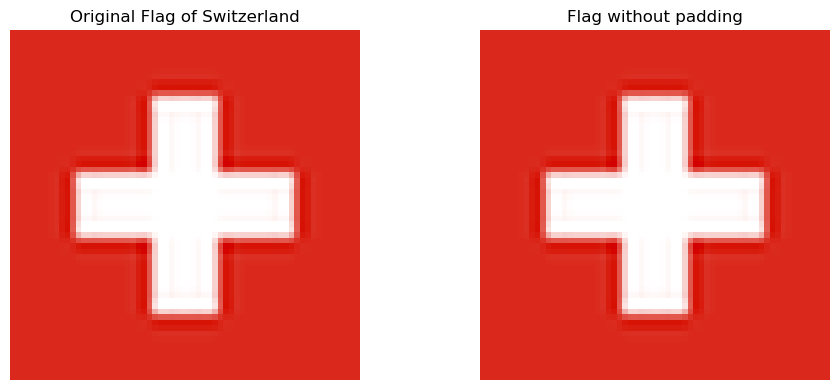


Analyzing flag of Saint Barthélemy (bl):


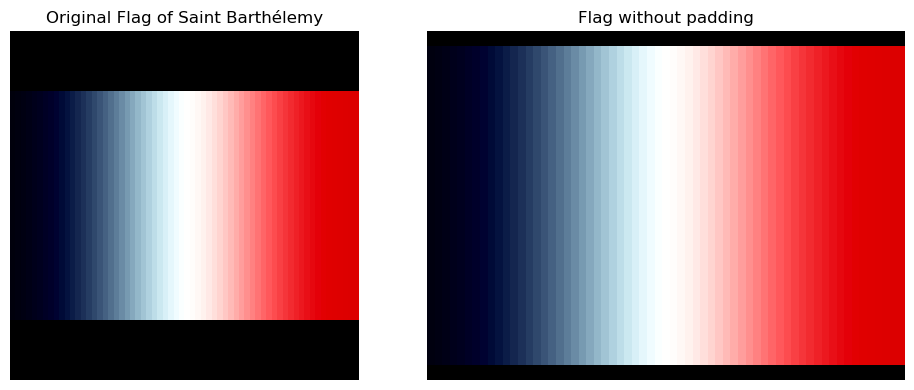


Analyzing flag of Aruba (aw):


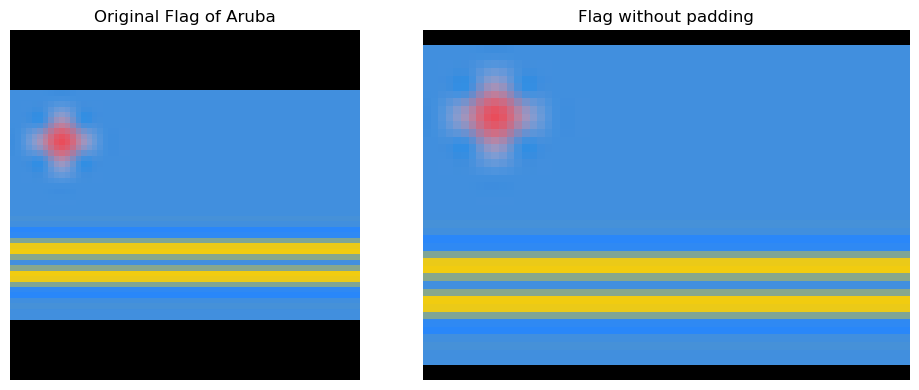


Analyzing flag of Belize (bz):


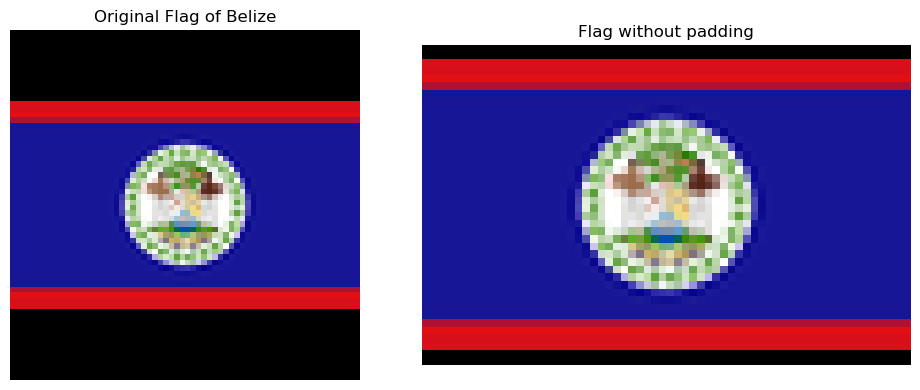


Analyzing flag of Bermuda (bm):


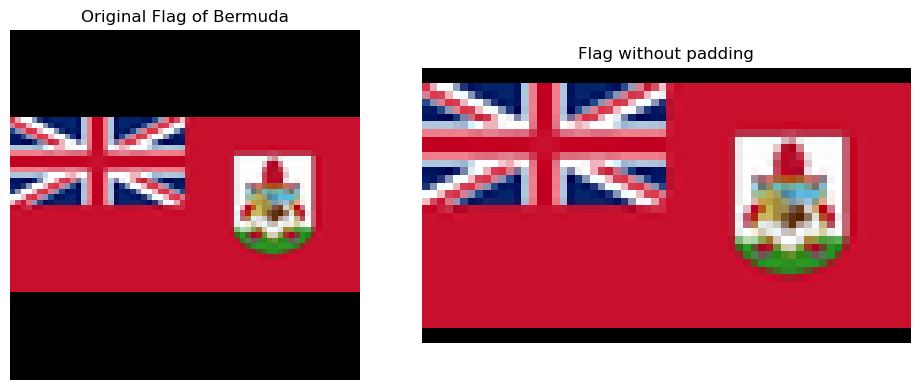


Analyzing flag of Côte d'Ivoire (ci):


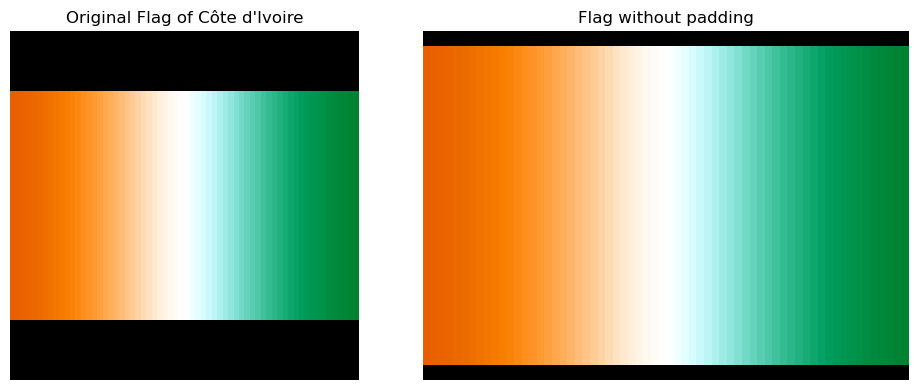


Analyzing flag of Mauritius (mu):


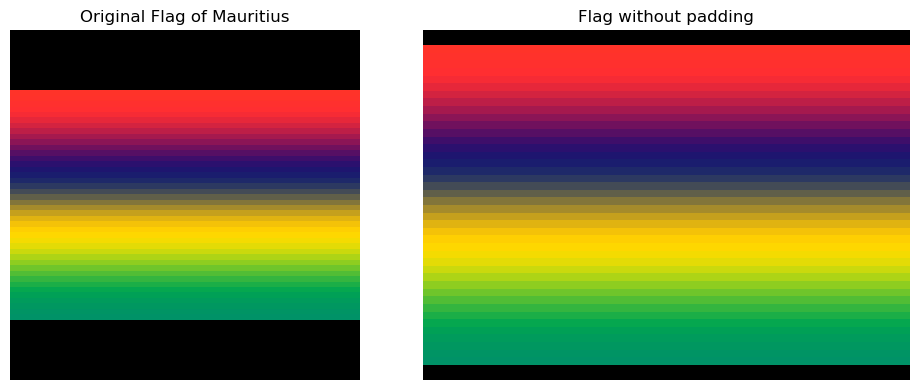


Analyzing flag of United States (us):


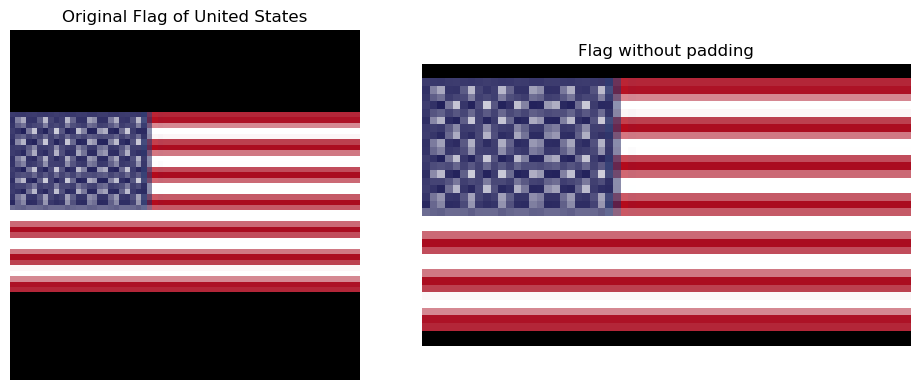


Analyzing flag of Taiwan (Republic of China) (tw):


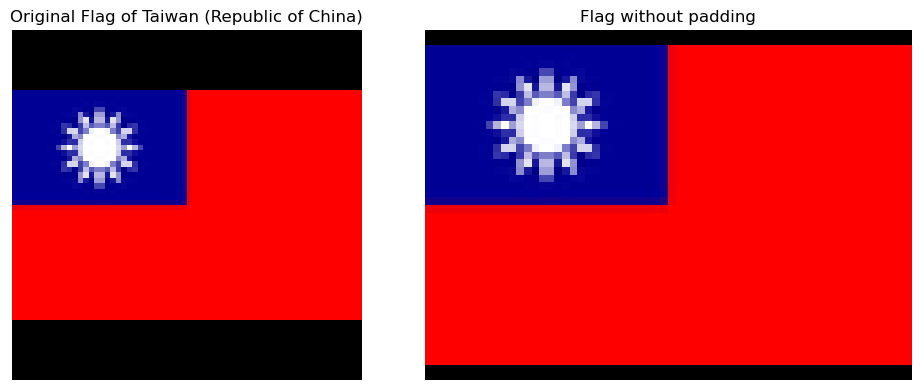


Analyzing flag of Yemen (ye):


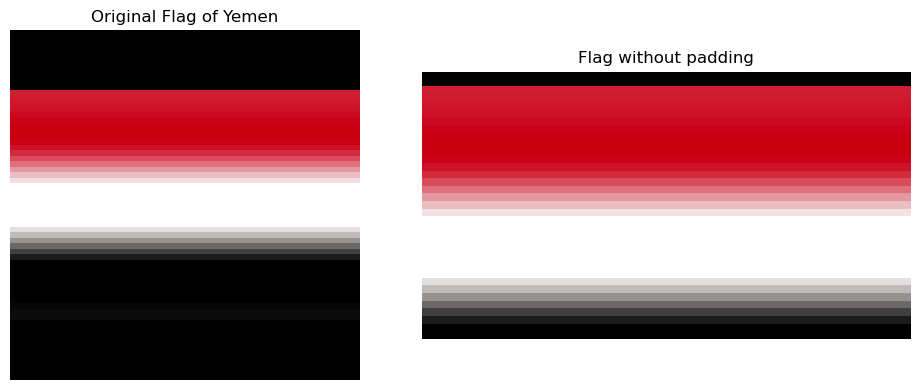


Analyzing flag of Malawi (mw):


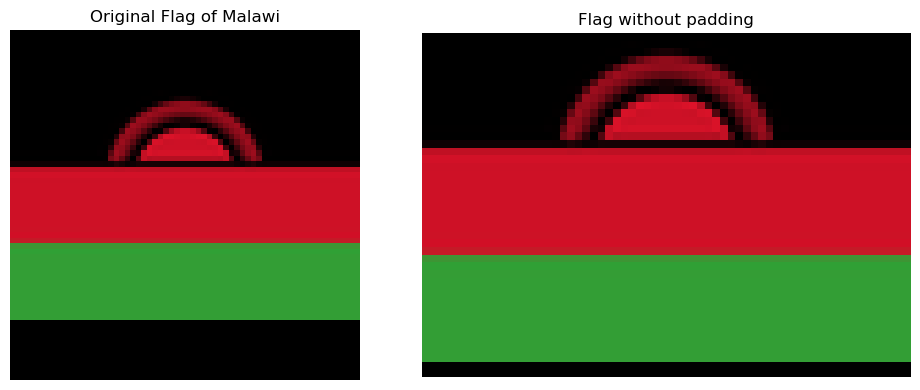


Analyzing flag of Netherlands (nl):


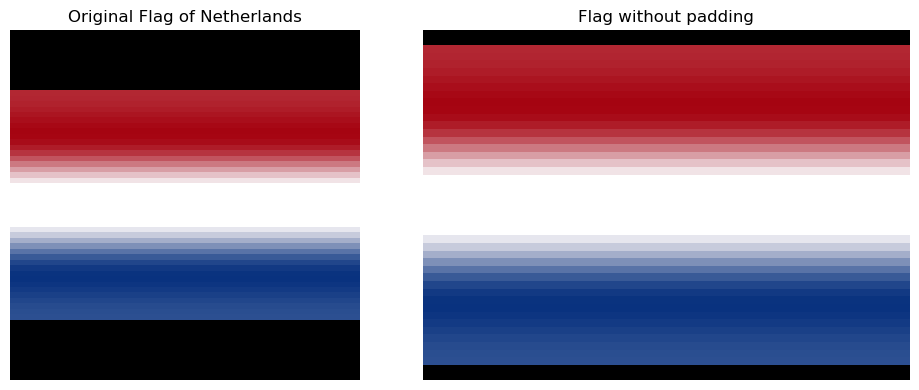


Analyzing flag of Lesotho (ls):


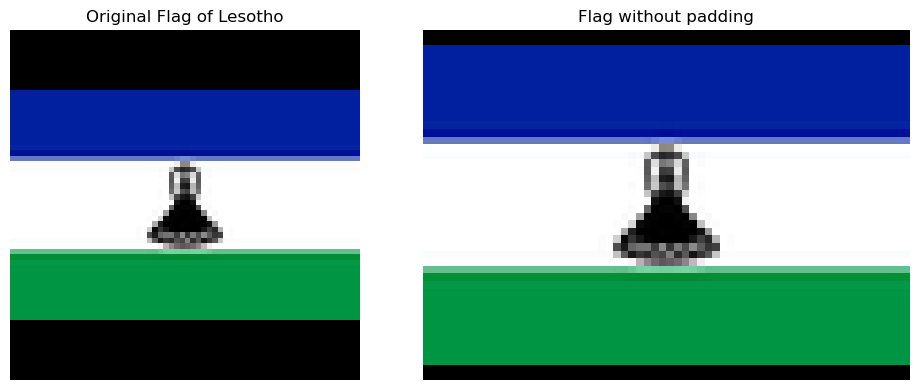


Analyzing flag of Bolivia, Plurinational State of (bo):


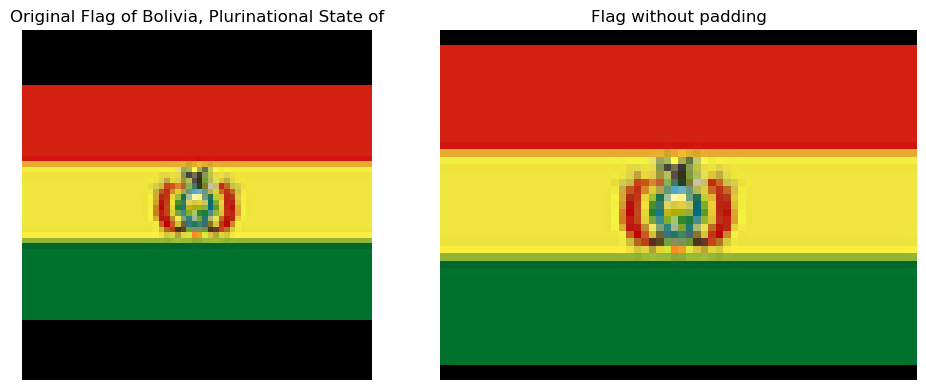


Analyzing flag of Austria (at):


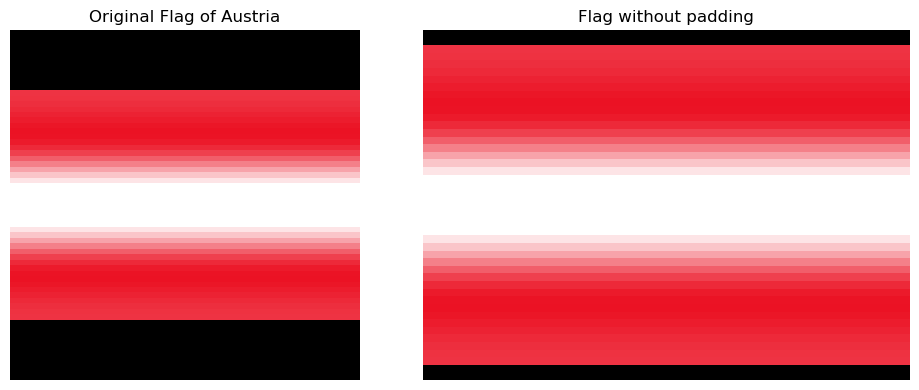


Analyzing flag of Cook Islands (ck):


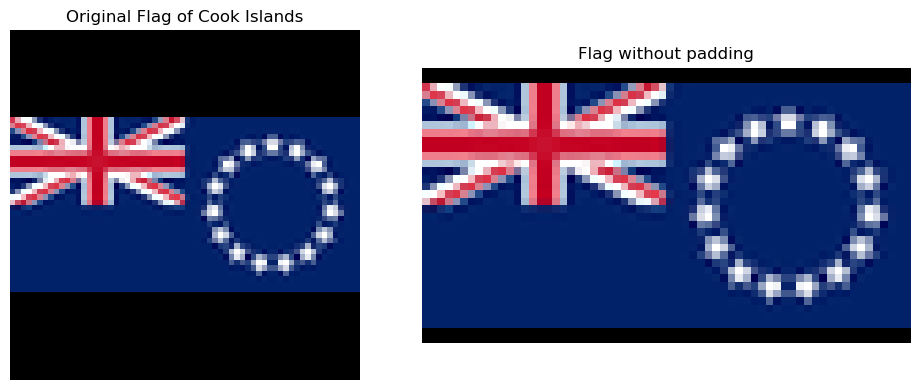


Analyzing flag of Belarus (by):


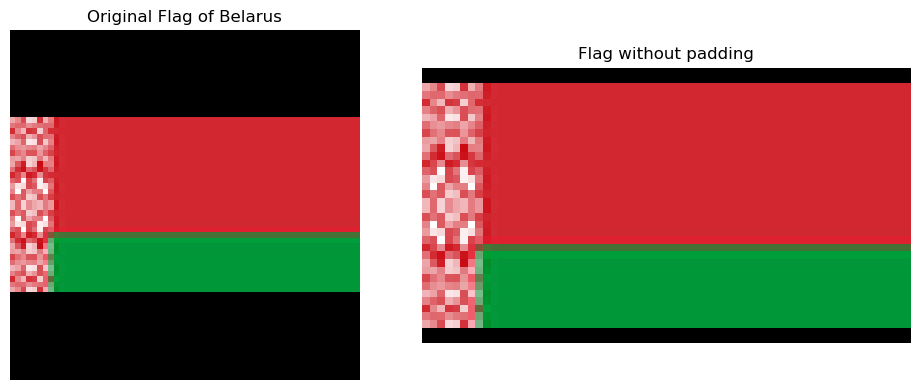


Analyzing flag of Australia (au):


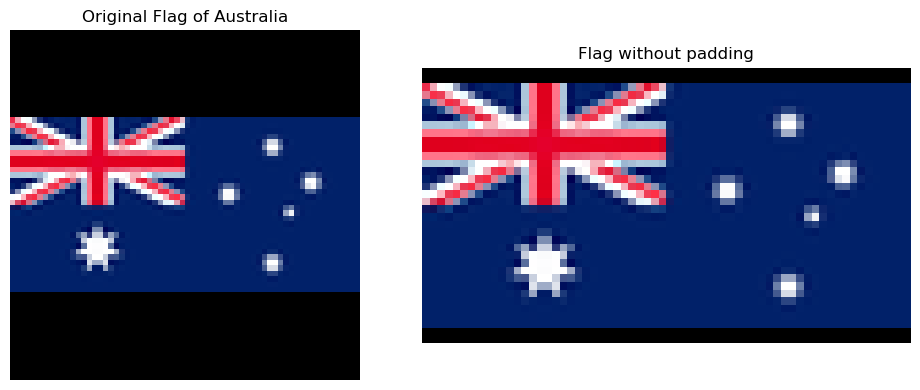


Analyzing flag of Brunei Darussalam (bn):


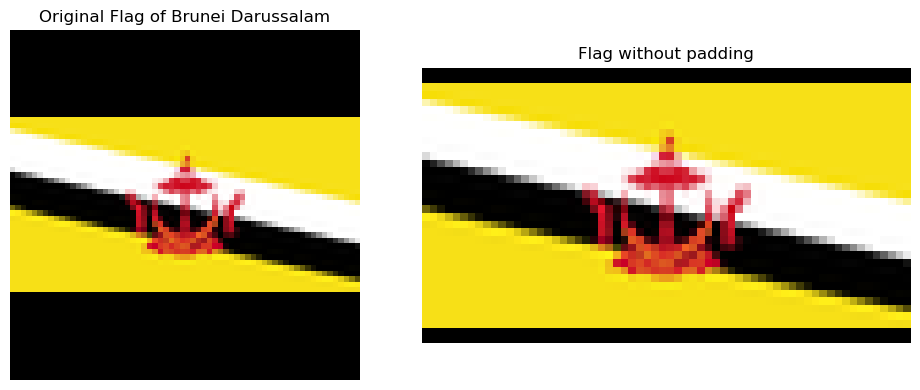


Analyzing flag of Morocco (ma):


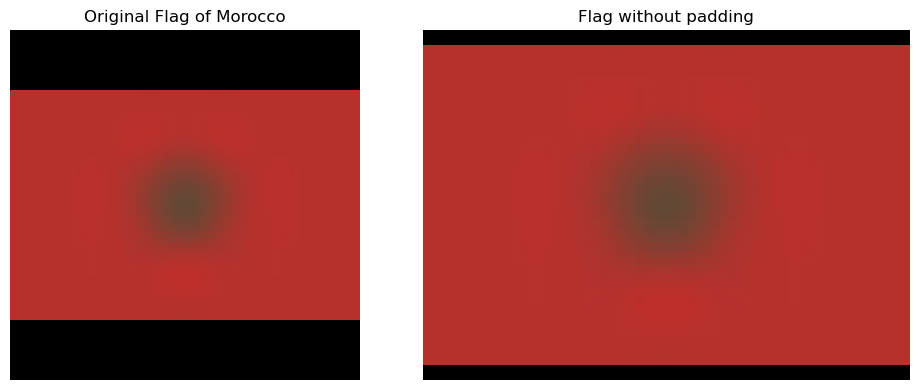


Analyzing flag of New Zealand (nz):


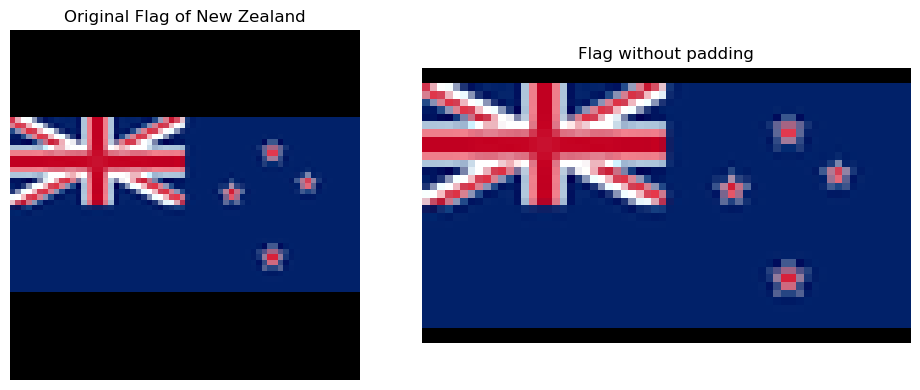


Analyzing flag of Liberia (lr):


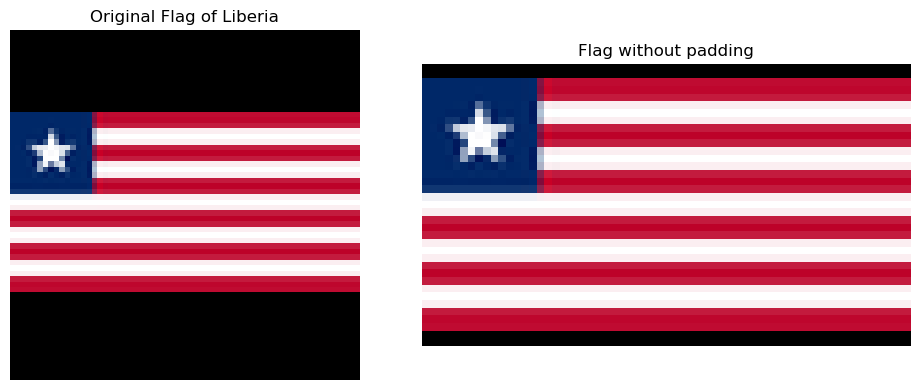


Analyzing flag of Maldives (mv):


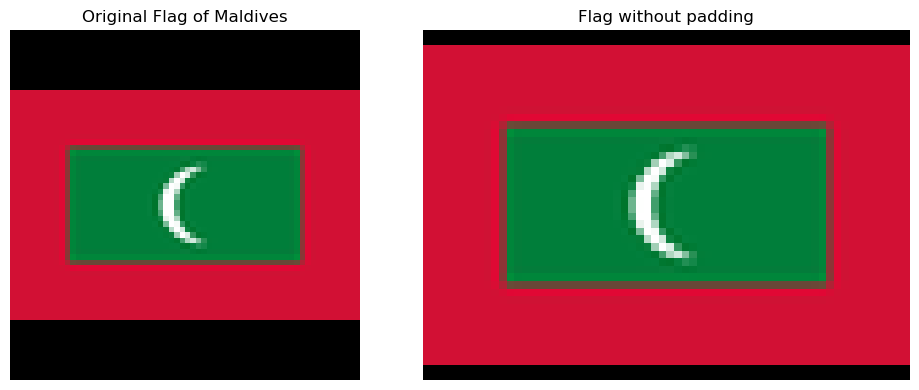


Analyzing flag of Turks and Caicos Islands (tc):


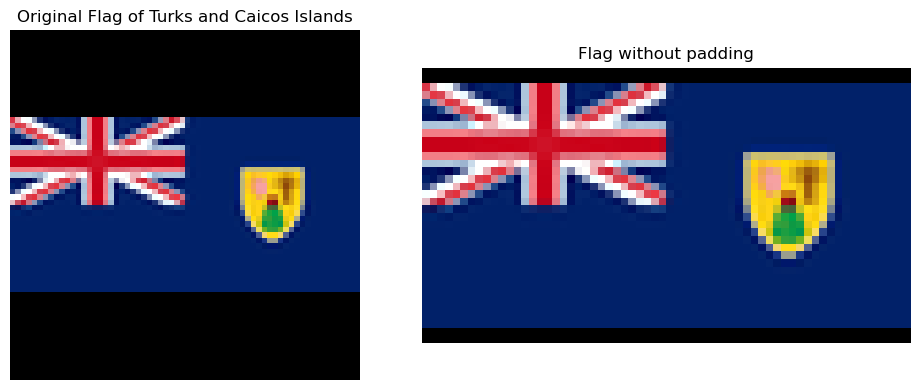


Analyzing flag of Uganda (ug):


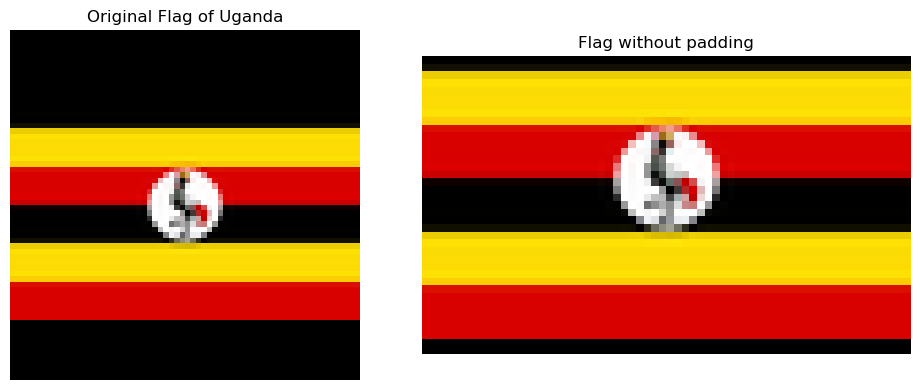


Analyzing flag of Trinidad and Tobago (tt):


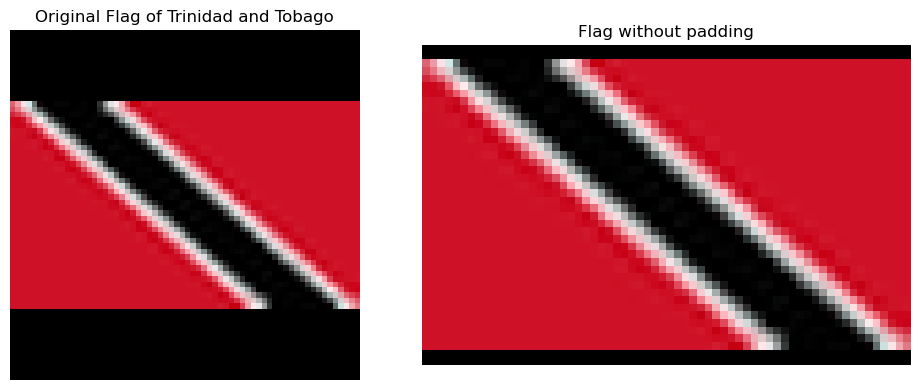


Analyzing flag of Poland (pl):


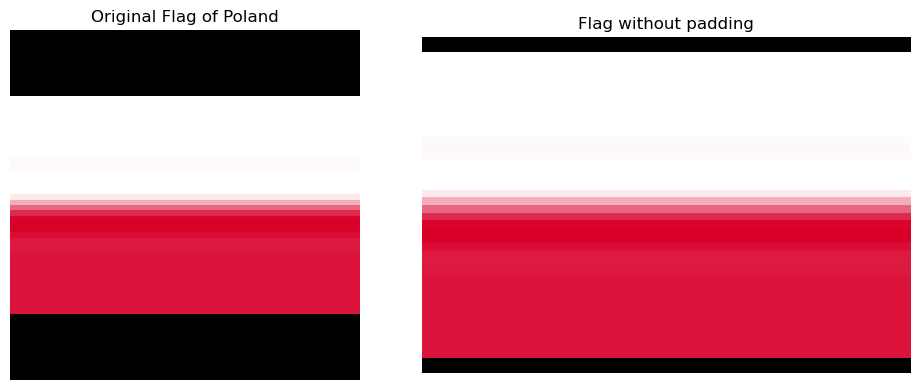


Analyzing flag of Serbia (rs):


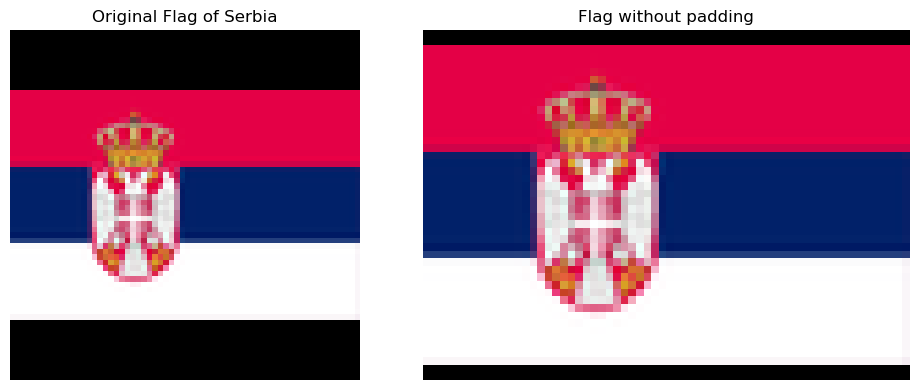


Analyzing flag of India (in):


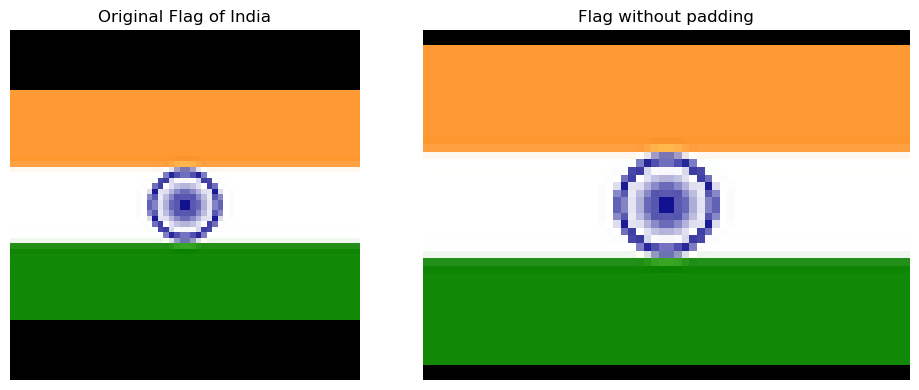


Analyzing flag of Georgia (ge):


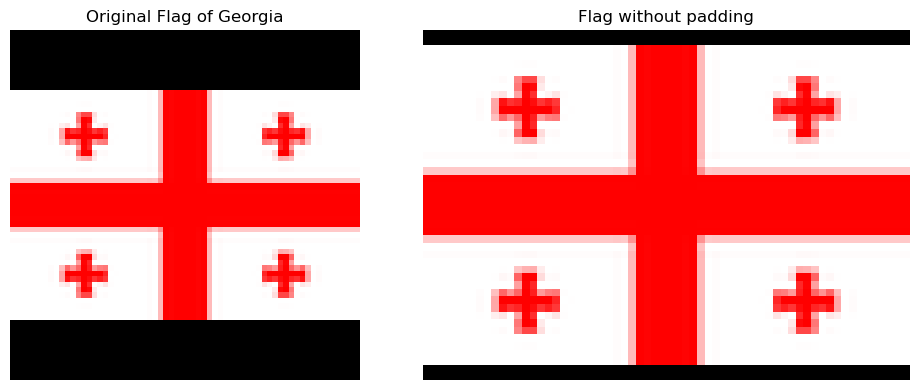


Analyzing flag of Greece (gr):


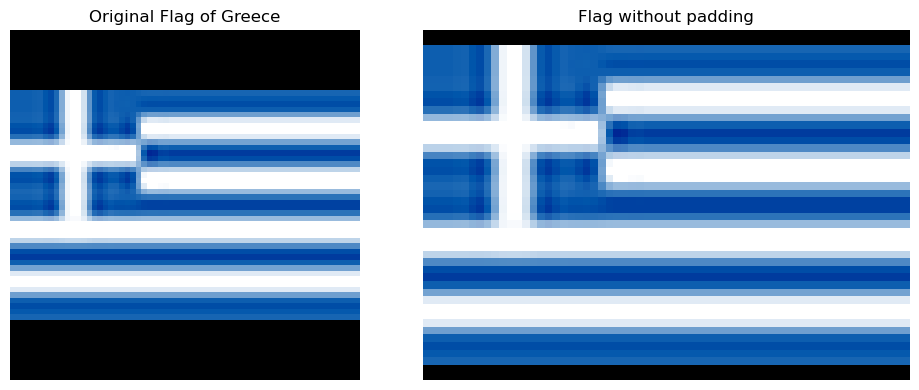


Analyzing flag of South Georgia and the South Sandwich Islands (gs):


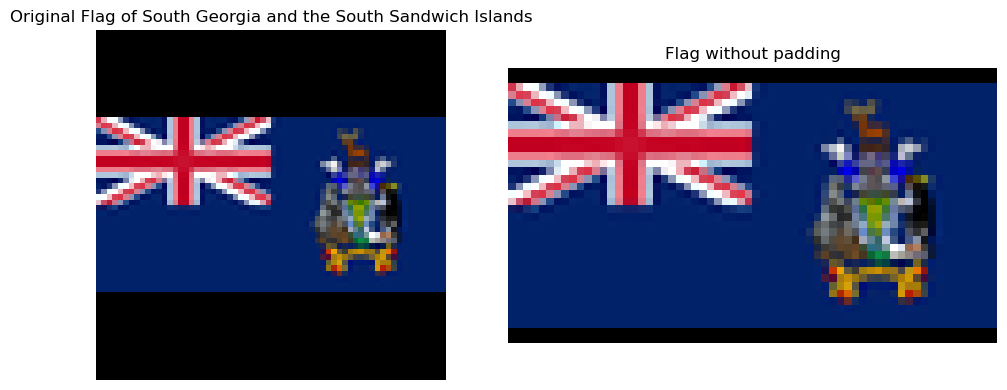


Analyzing flag of Grenada (gd):


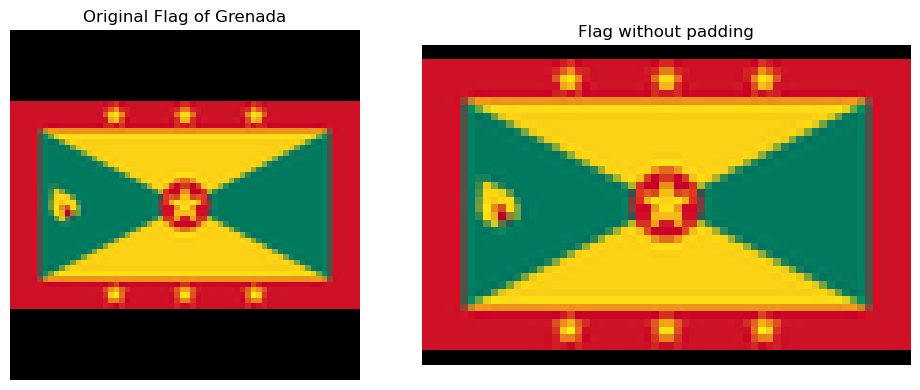


Analyzing flag of British Indian Ocean Territory (io):


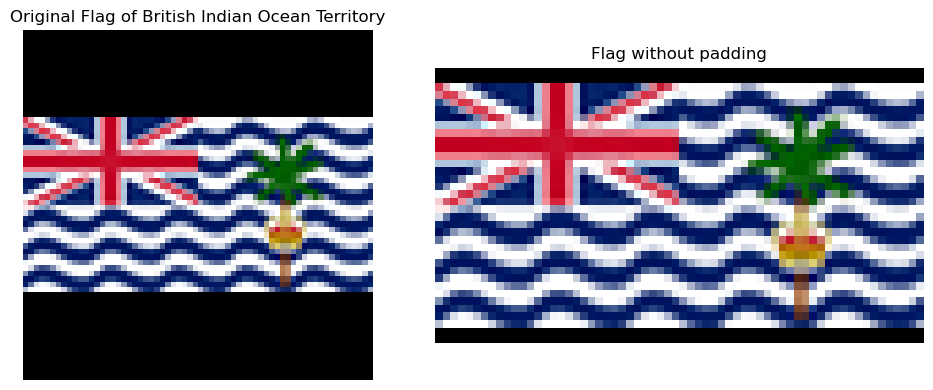


Analyzing flag of Hong Kong (hk):


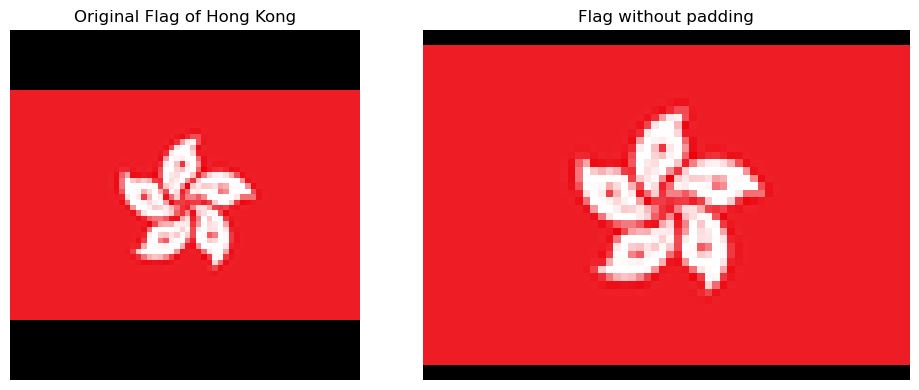


Analyzing flag of Korea, Democratic People's Republic of (kp):


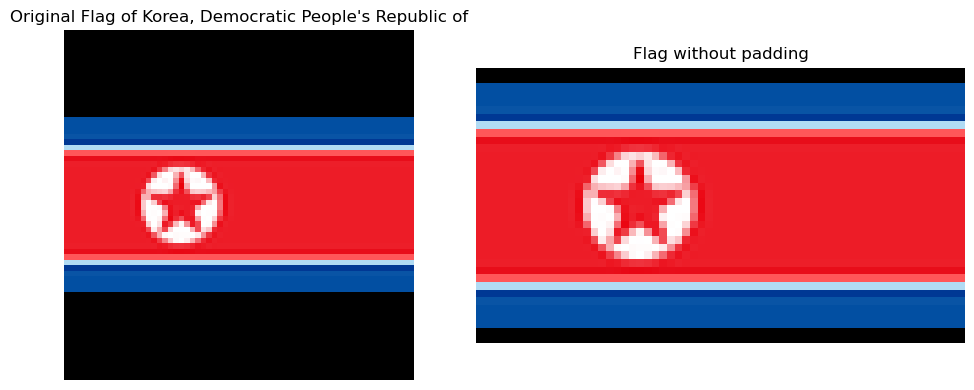


Analyzing flag of Northern Ireland (gb-nir):


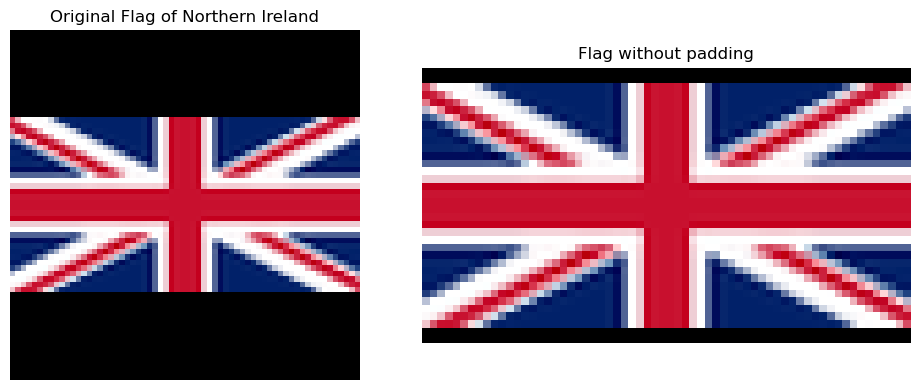


Analyzing flag of Kyrgyzstan (kg):


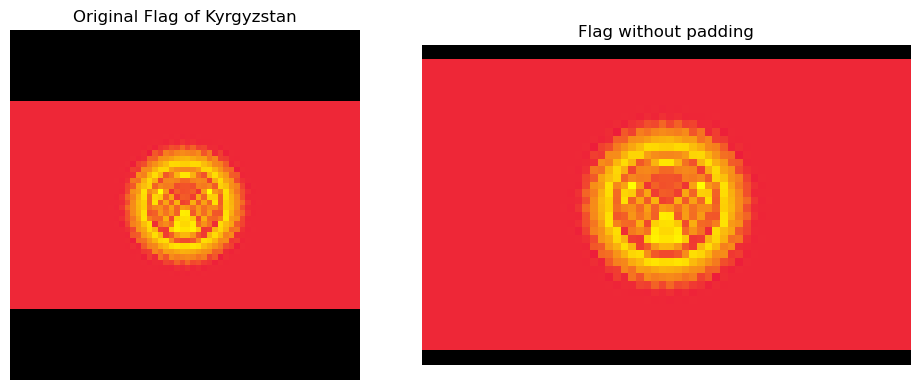


Analyzing flag of Saint Pierre and Miquelon (pm):


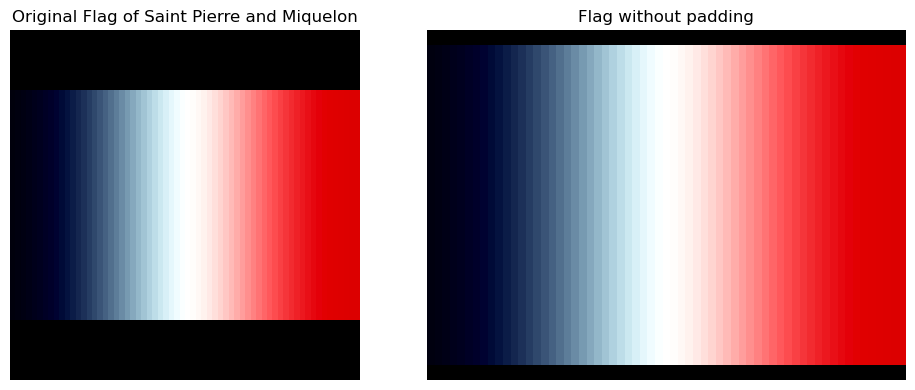


Analyzing flag of El Salvador (sv):


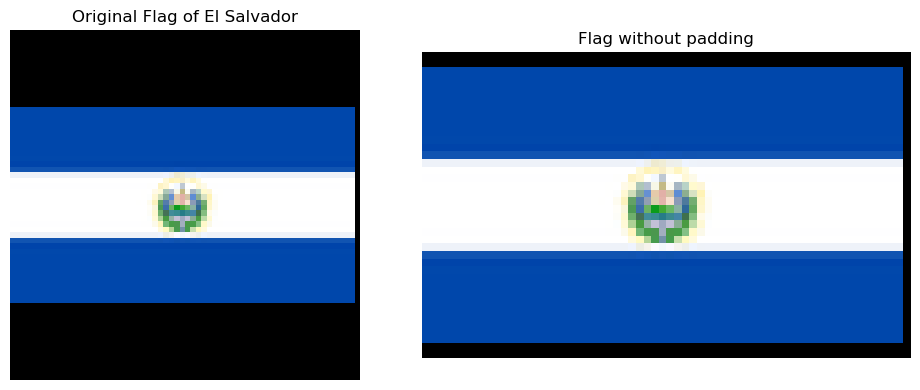


Analyzing flag of Réunion (re):


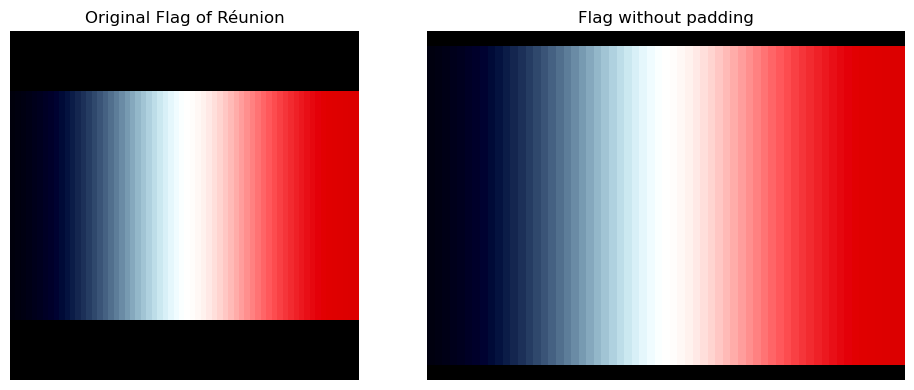


Analyzing flag of Saudi Arabia (sa):


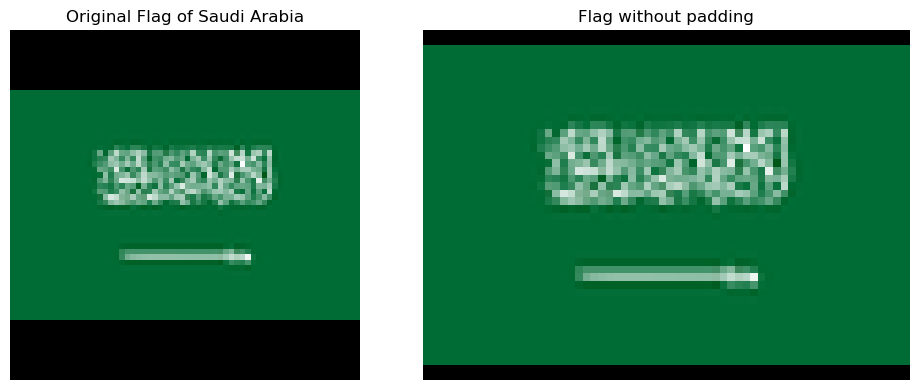


Analyzing flag of Seychelles (sc):


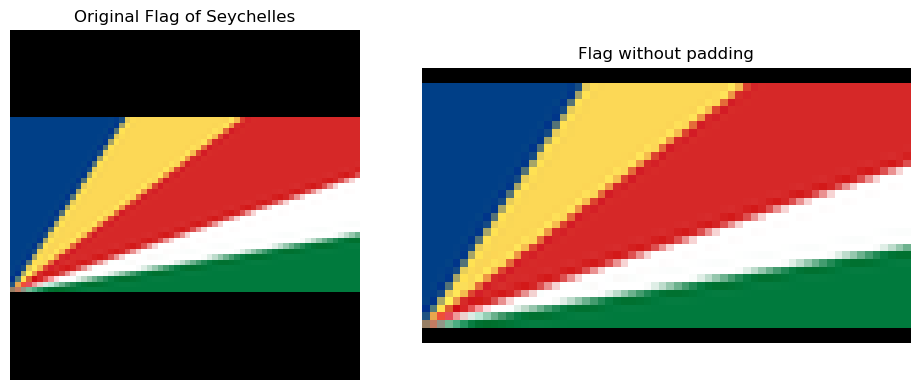


Analyzing flag of Sao Tome and Principe (st):


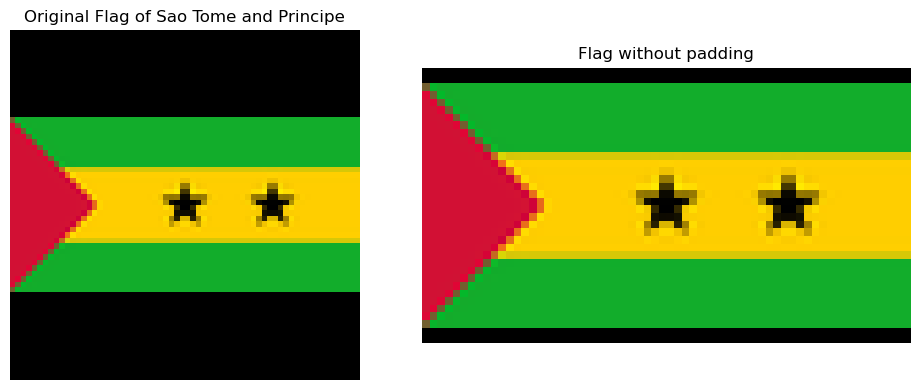


Analyzing flag of Kenya (ke):


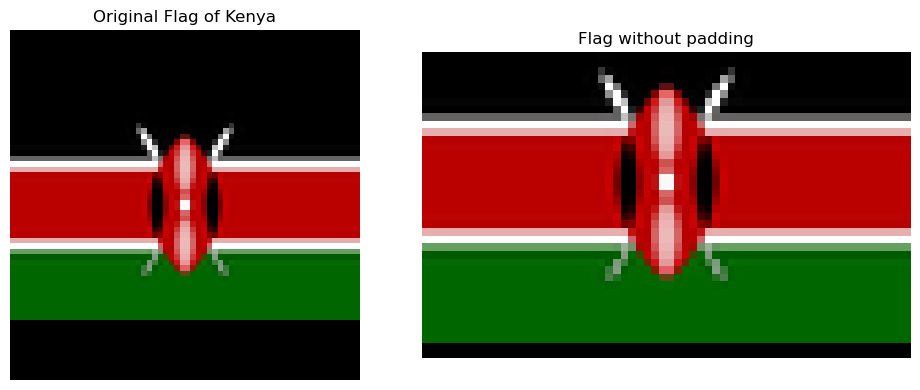


Analyzing flag of Isle of Man (im):


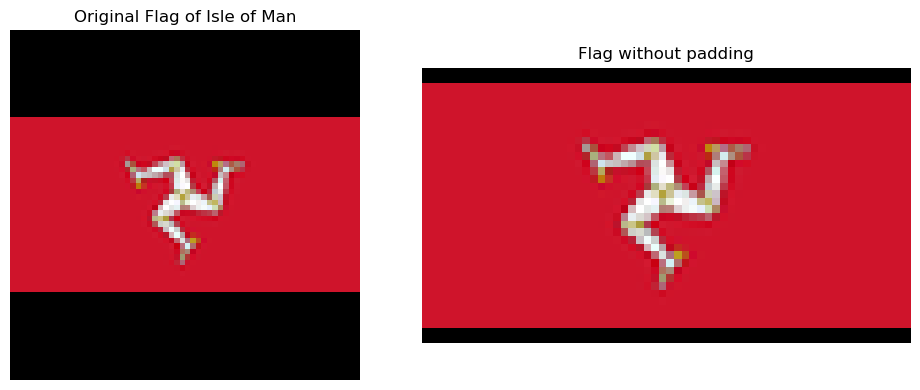


Analyzing flag of Korea, Republic of (kr):


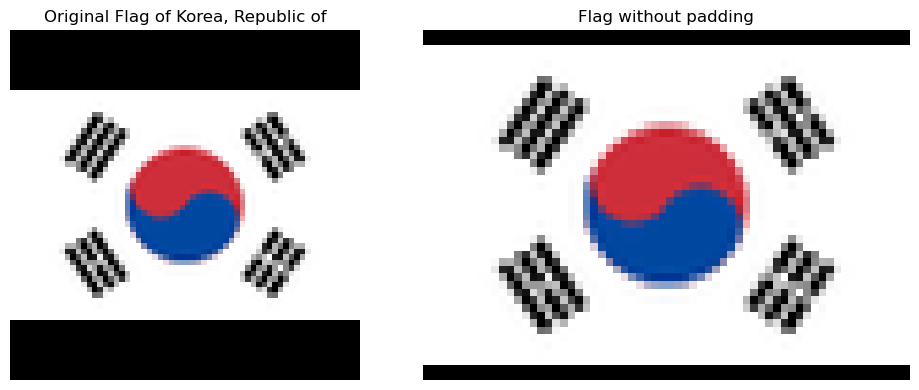


Analyzing flag of French Guiana (gf):


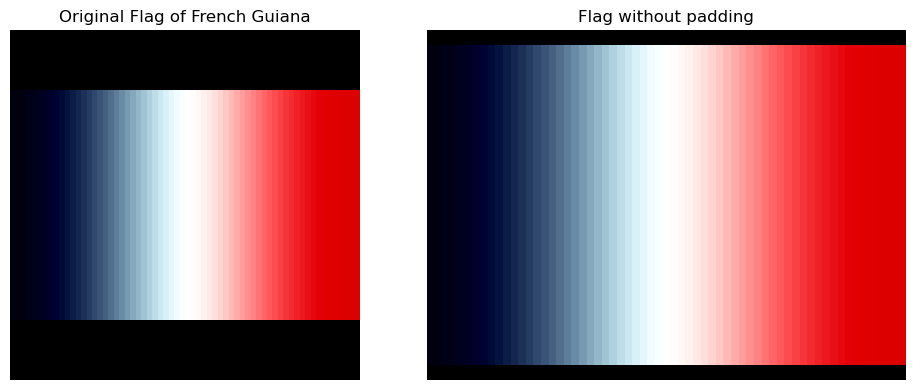


Analyzing flag of Djibouti (dj):


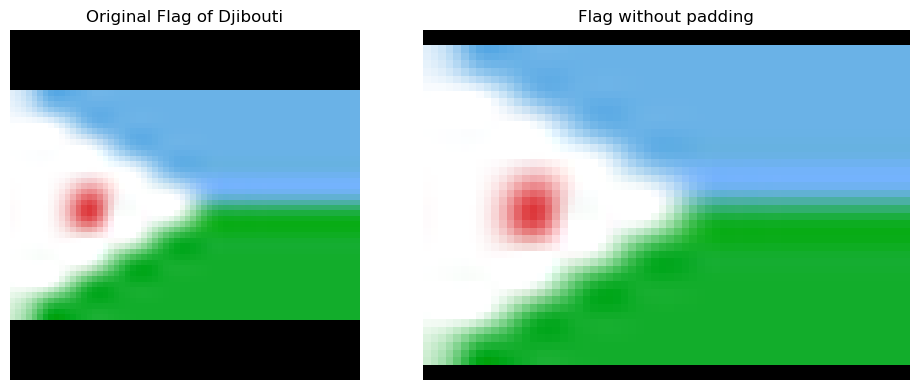


Analyzing flag of Equatorial Guinea (gq):


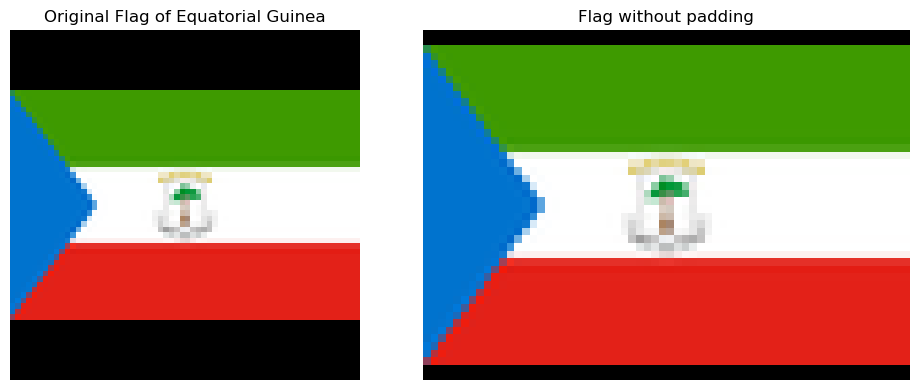


Analyzing flag of Guadeloupe (gp):


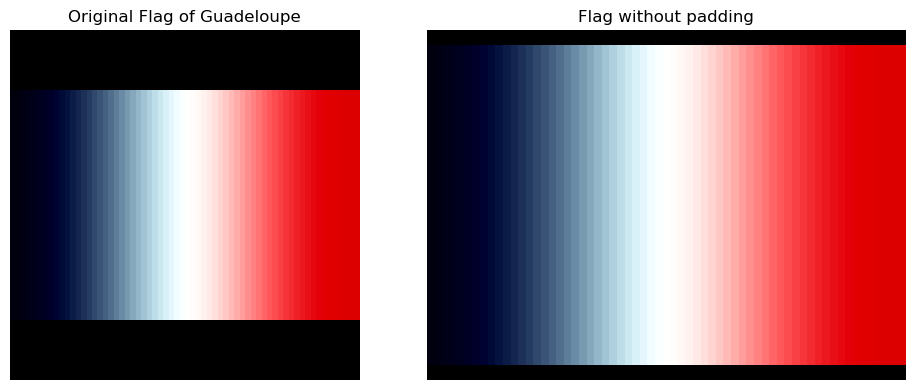


Analyzing flag of Denmark (dk):


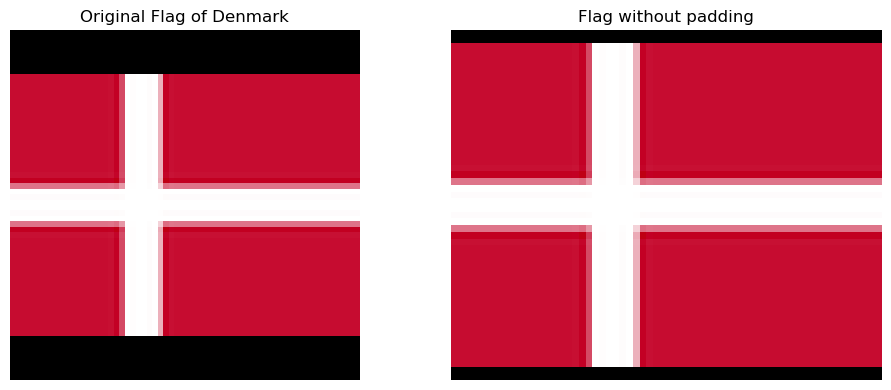


Analyzing flag of Guernsey (gg):


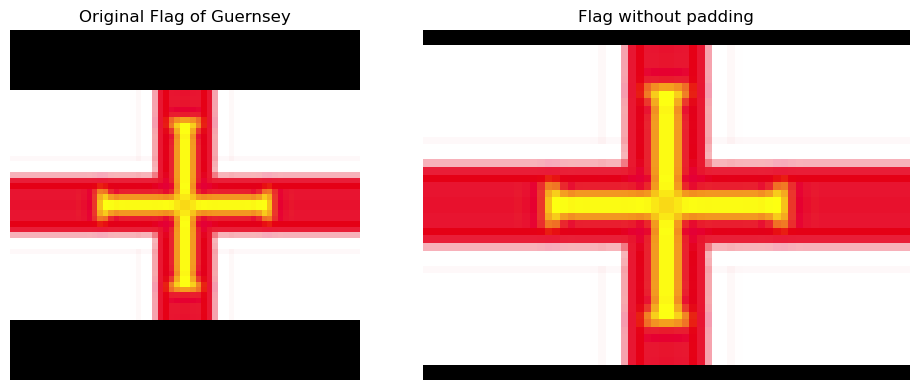


Analyzing flag of Israel (il):


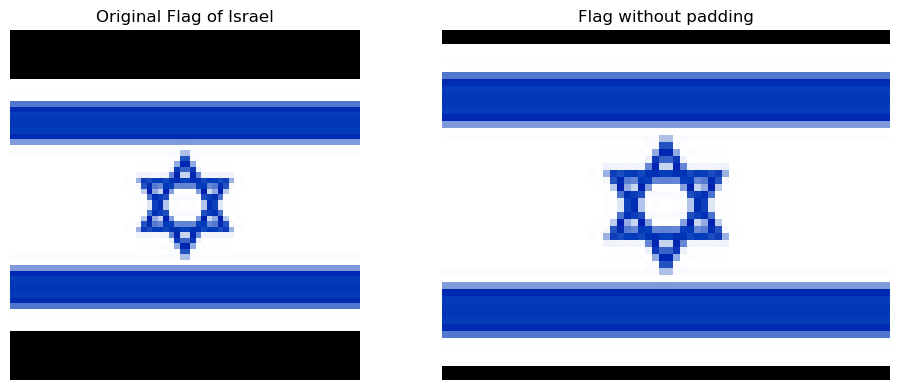


Analyzing flag of Pitcairn (pn):


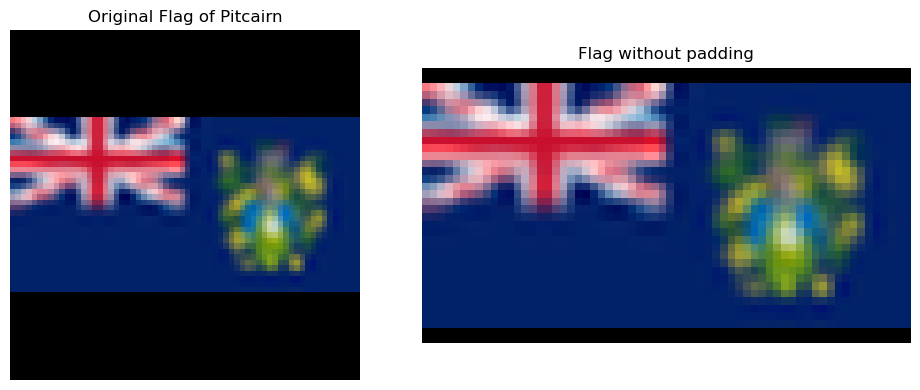


Analyzing flag of Solomon Islands (sb):


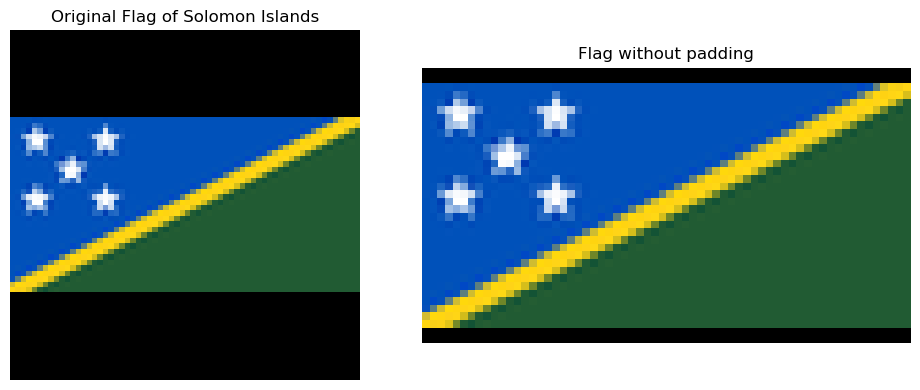


Analyzing flag of Paraguay (py):


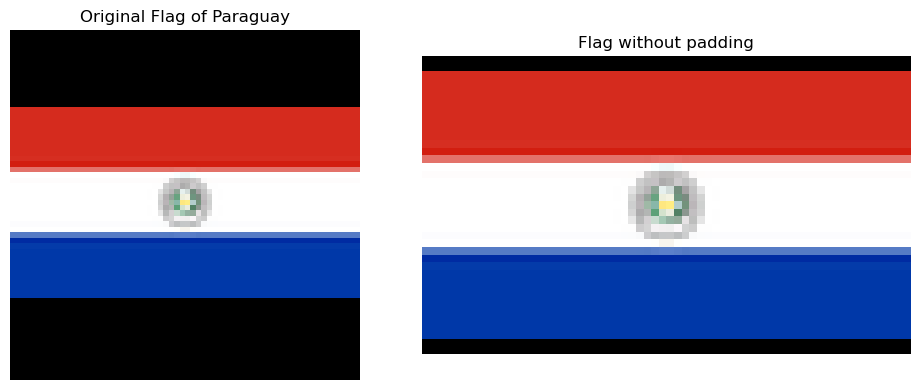


Analyzing flag of Russian Federation (ru):


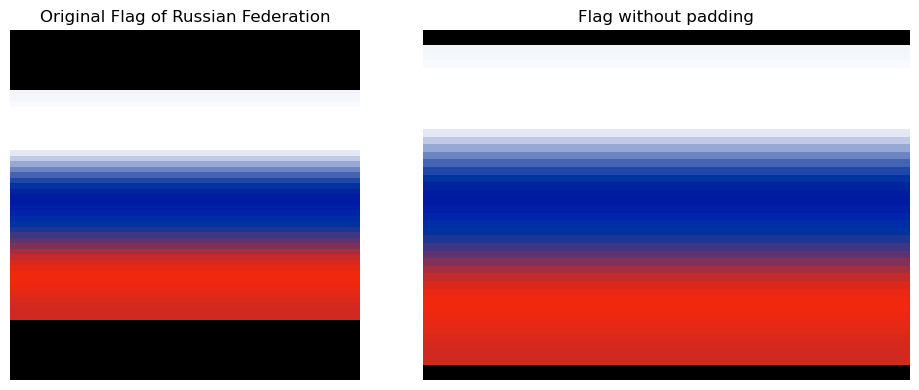


Analyzing flag of Kuwait (kw):


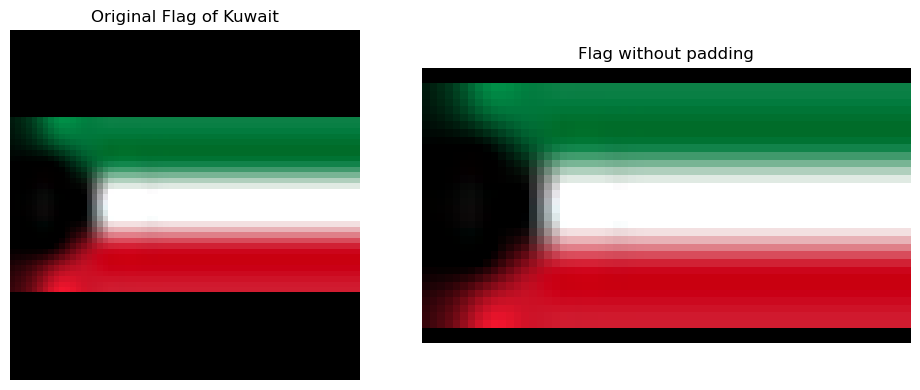


Analyzing flag of Dominican Republic (do):


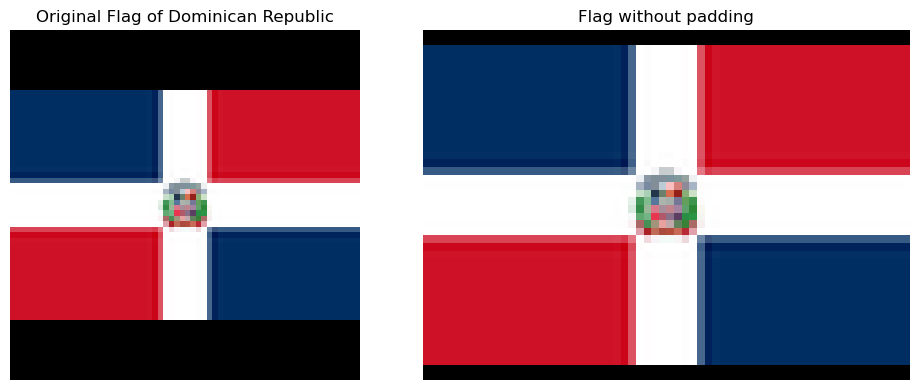


Analyzing flag of Guatemala (gt):


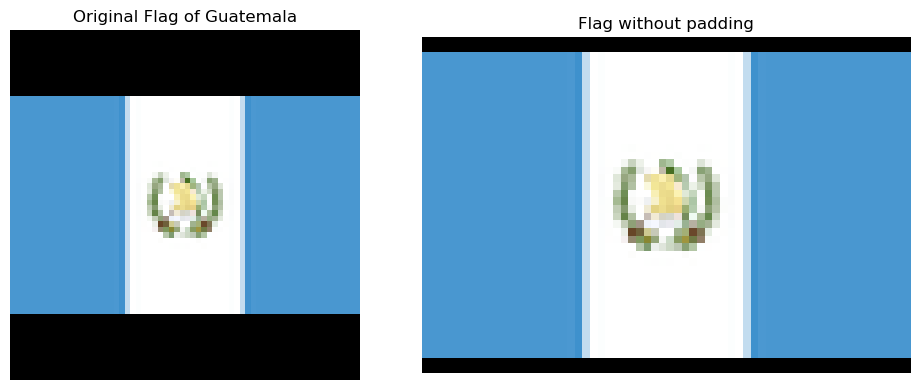


Analyzing flag of United Kingdom (gb):


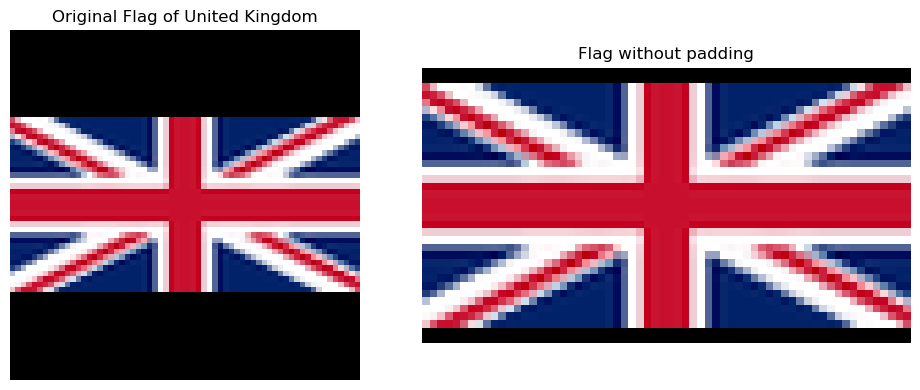


Analyzing flag of Jersey (je):


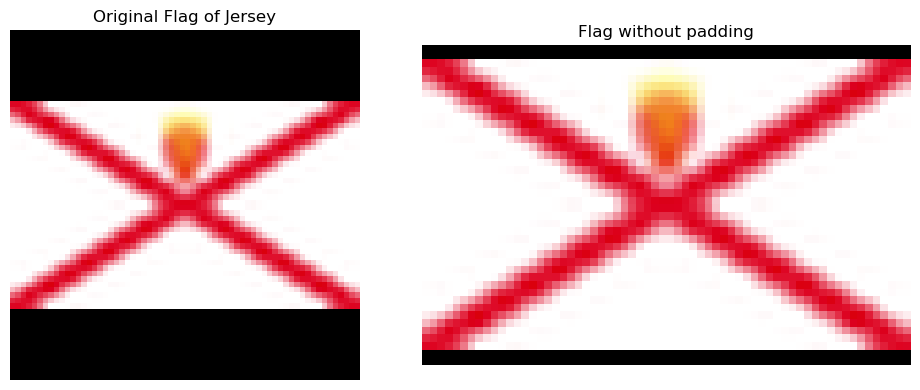


Analyzing flag of Heard Island and McDonald Islands (hm):


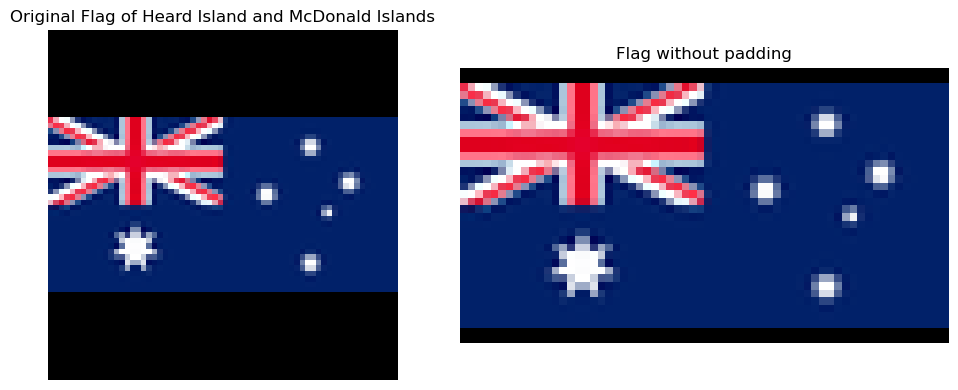


Analyzing flag of Singapore (sg):


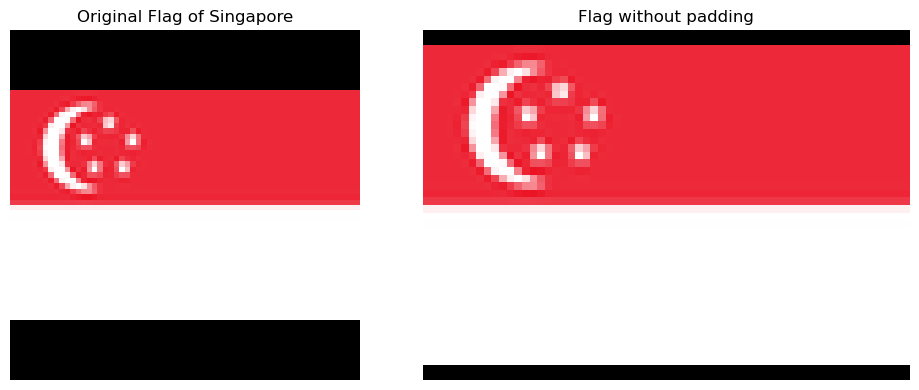


Analyzing flag of Pakistan (pk):


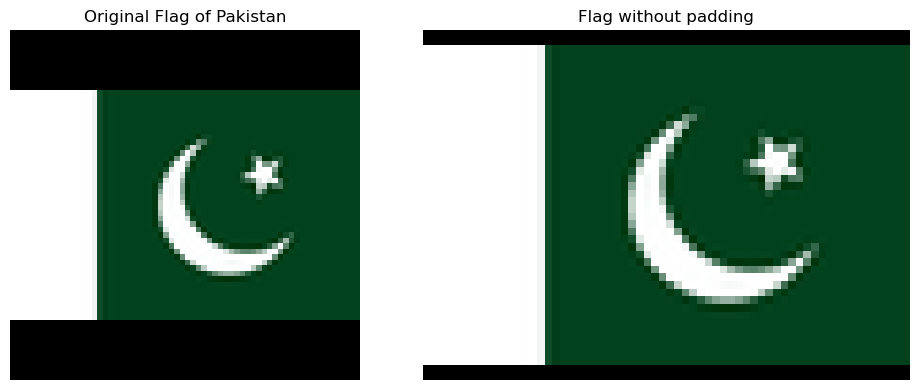


Analyzing flag of Suriname (sr):


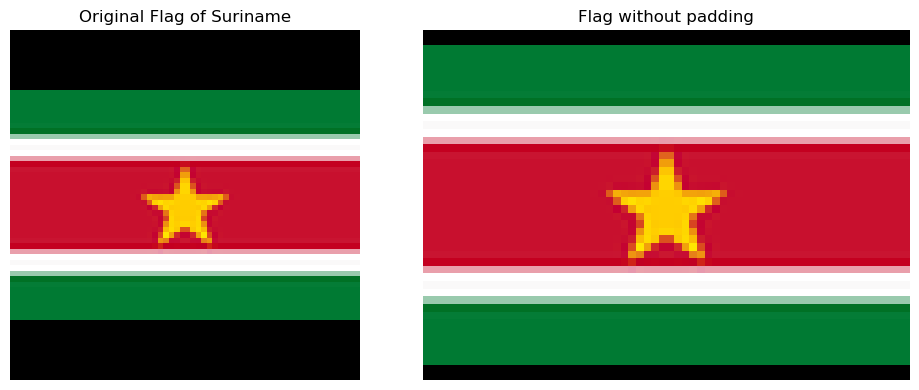


Analyzing flag of Sweden (se):


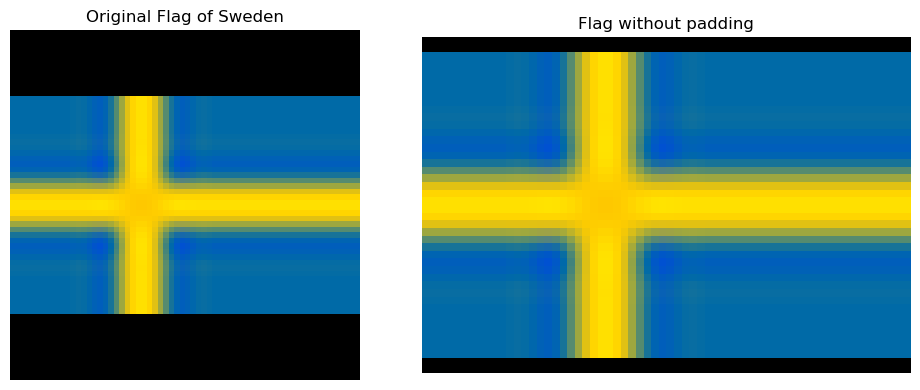


Analyzing flag of Japan (jp):


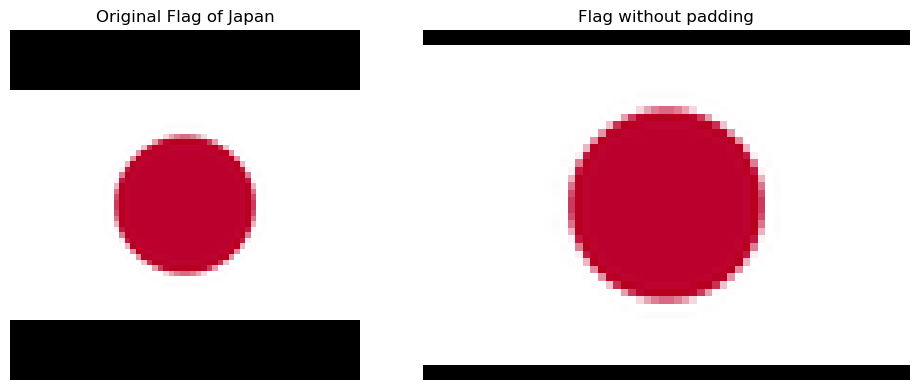


Analyzing flag of Guinea-Bissau (gw):


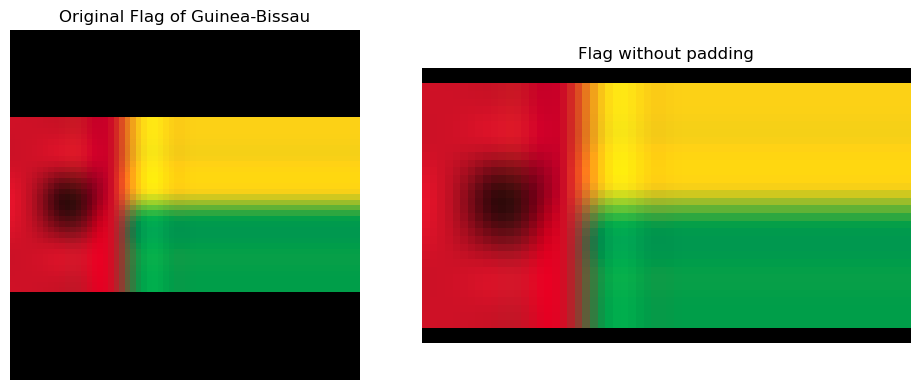


Analyzing flag of Western Sahara (eh):


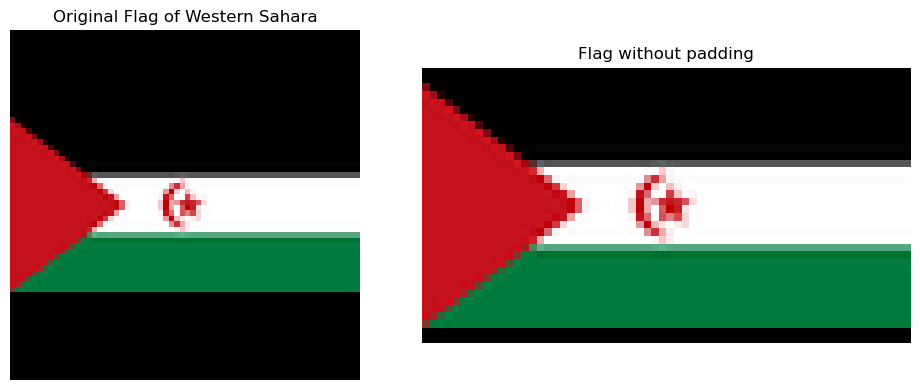


Analyzing flag of Algeria (dz):


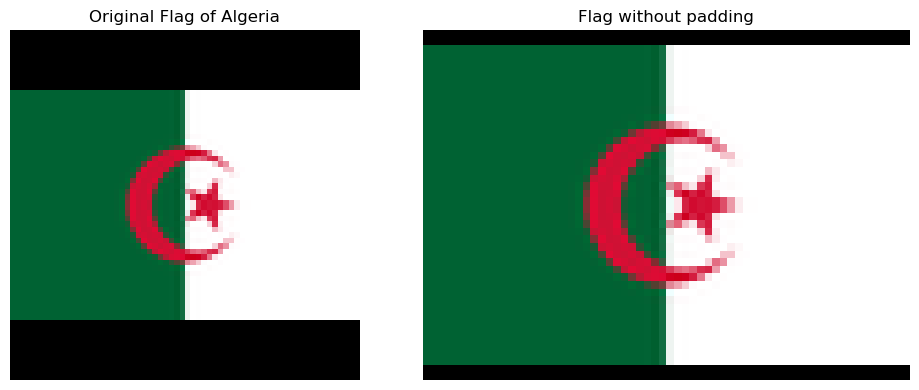


Analyzing flag of Gabon (ga):


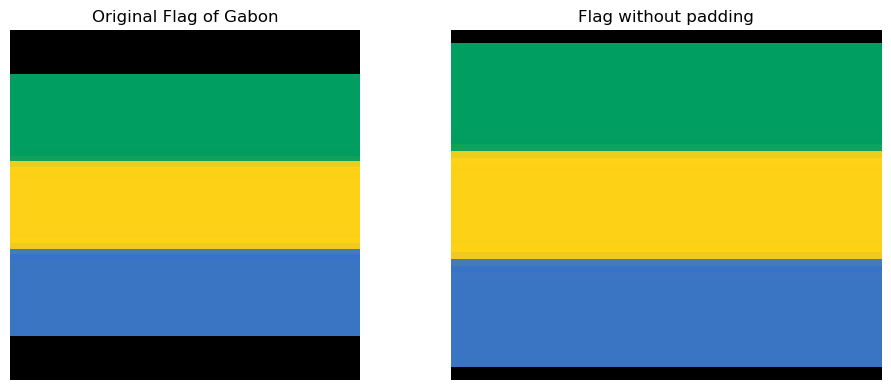


Analyzing flag of France (fr):


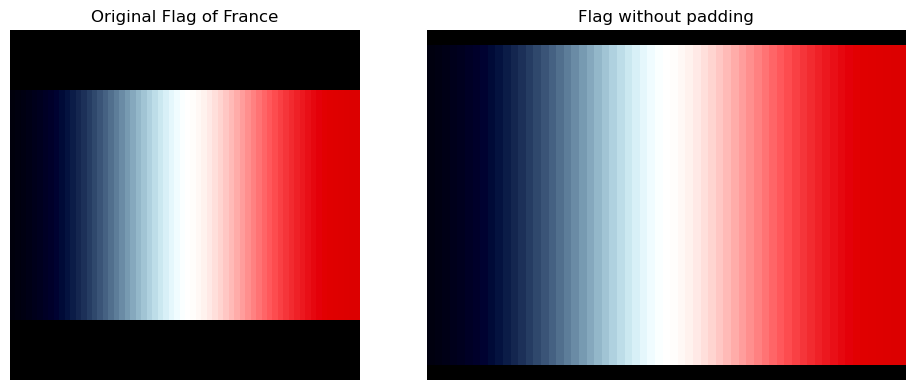


Analyzing flag of Dominica (dm):


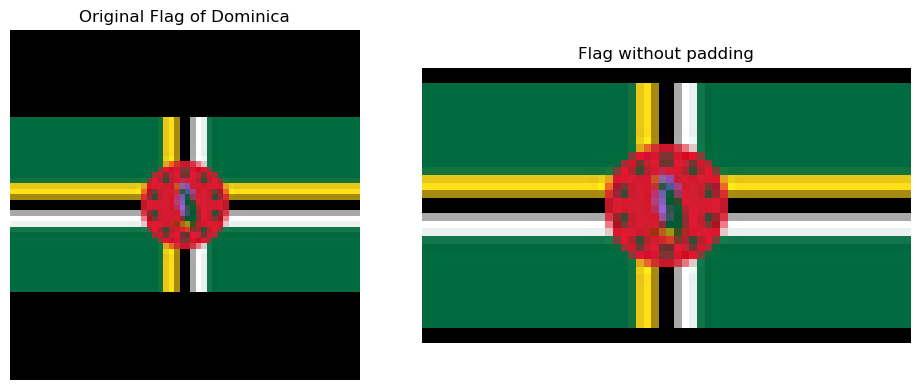


Analyzing flag of Honduras (hn):


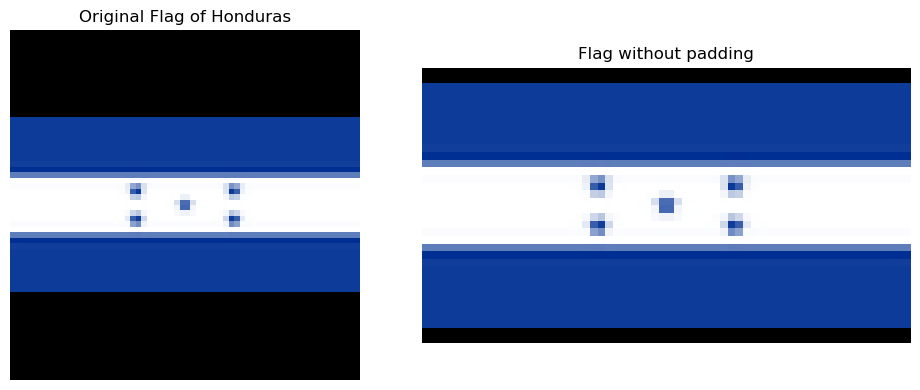


Analyzing flag of Sudan (sd):


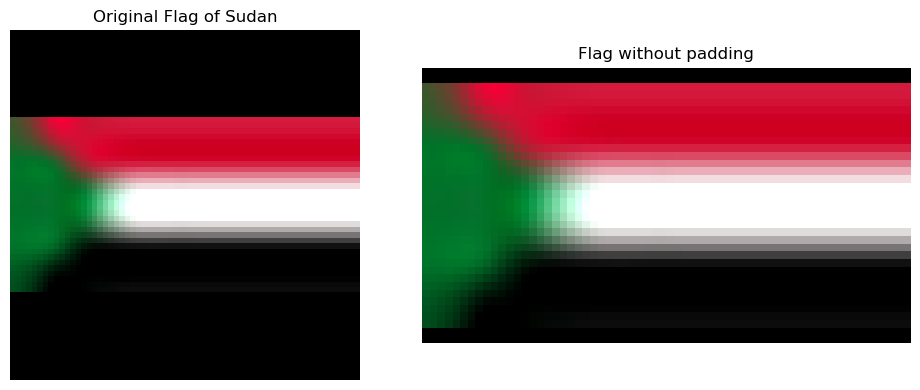


Analyzing flag of Rwanda (rw):


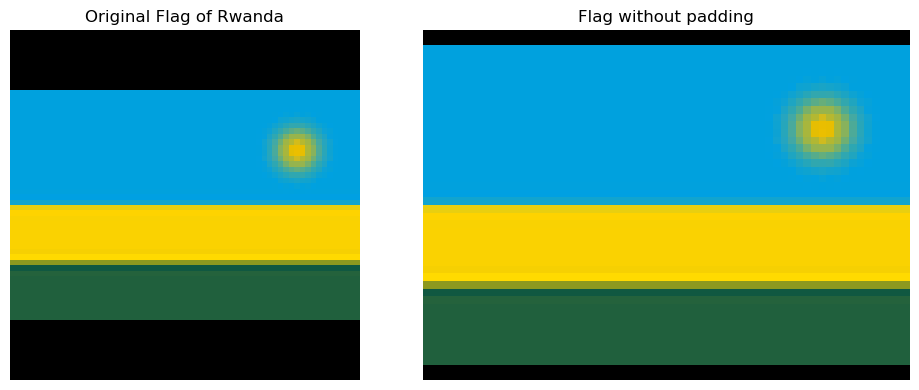


Analyzing flag of Philippines (ph):


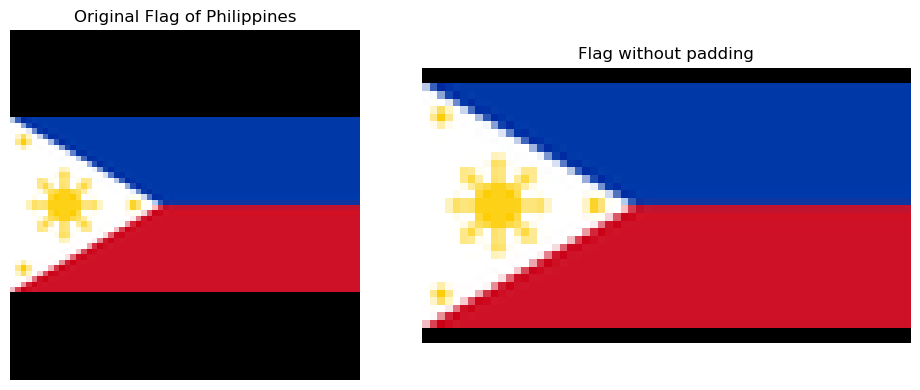


Analyzing flag of South Sudan (ss):


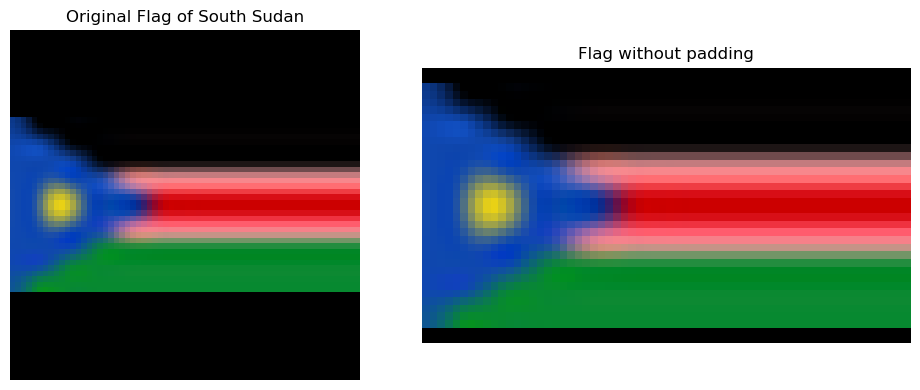


Analyzing flag of Qatar (qa):


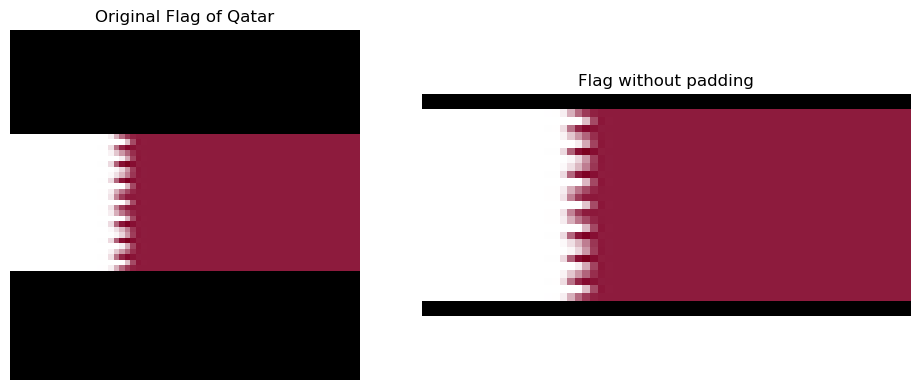


Analyzing flag of Peru (pe):


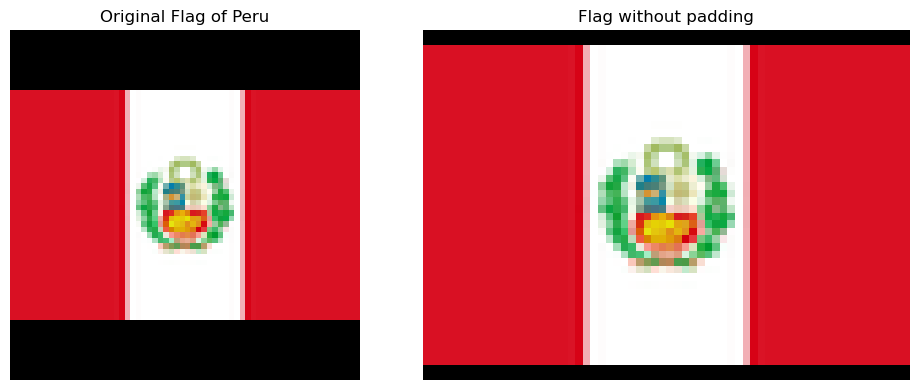


Analyzing flag of Puerto Rico (pr):


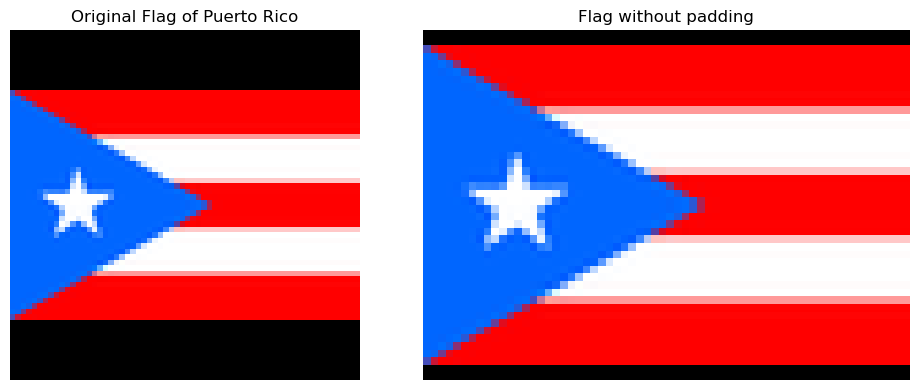


Analyzing flag of Slovenia (si):


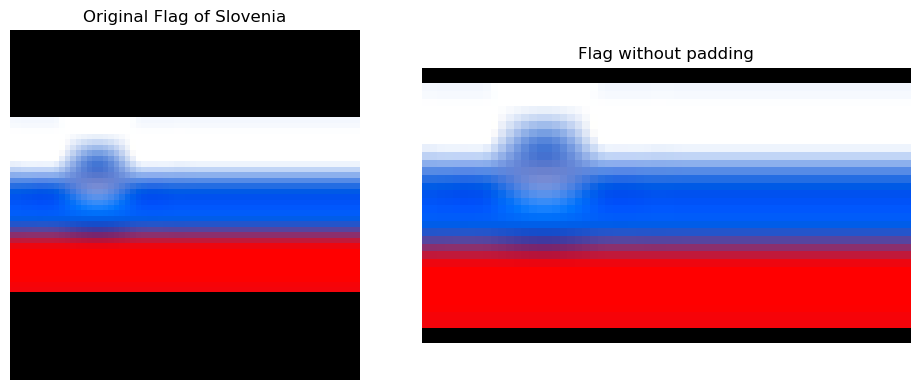


Analyzing flag of Haiti (ht):


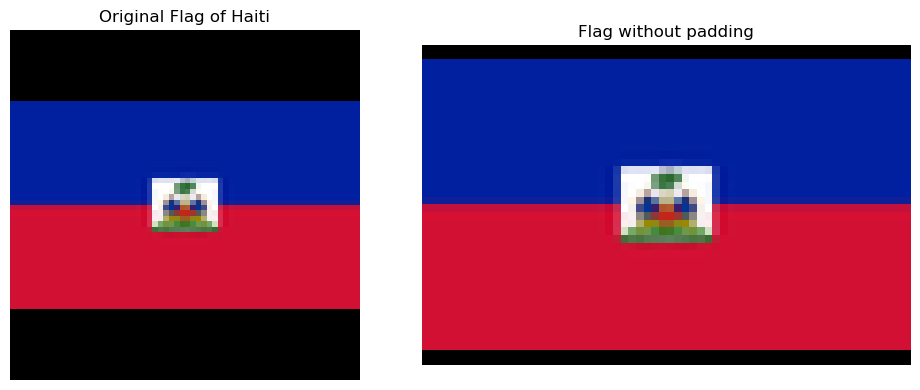


Analyzing flag of Spain (es):


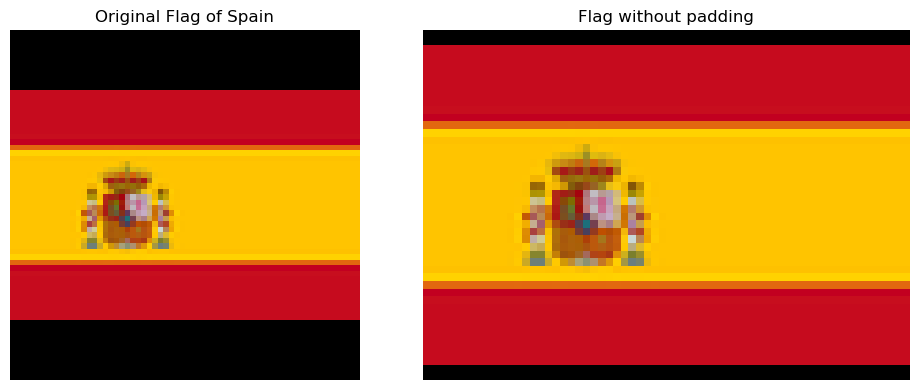


Analyzing flag of Greenland (gl):


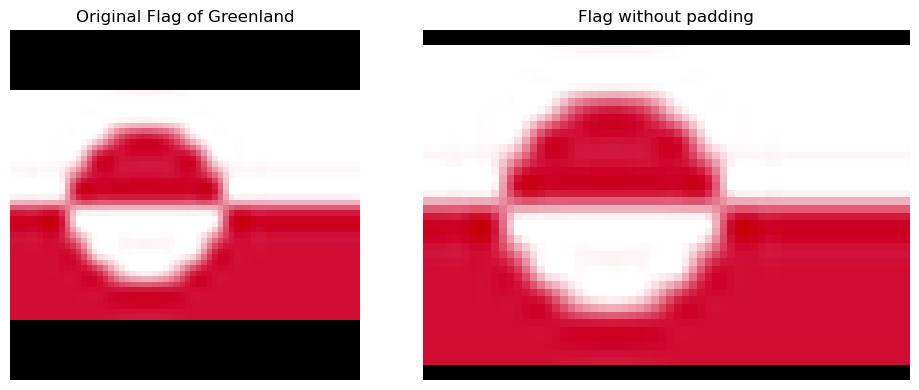


Analyzing flag of Gambia (gm):


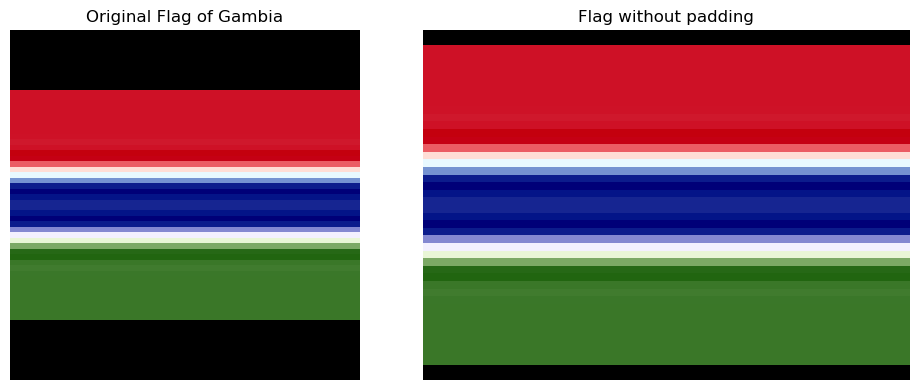


Analyzing flag of Eritrea (er):


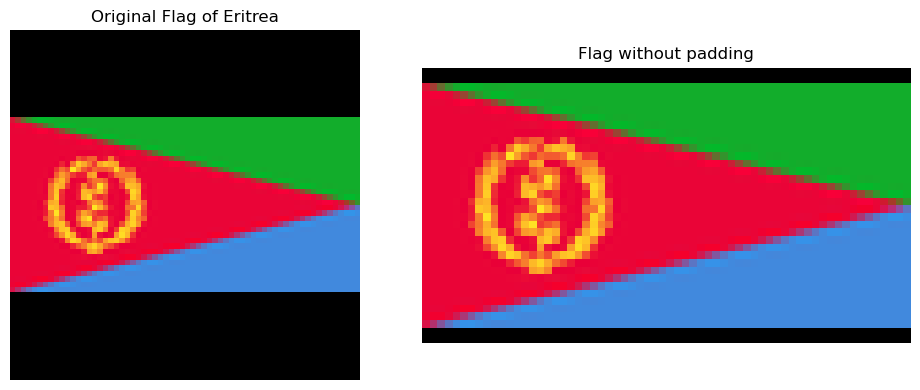


Analyzing flag of Finland (fi):


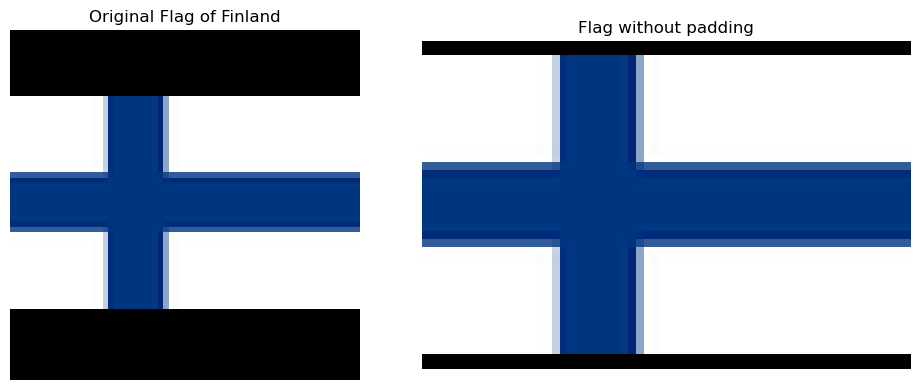


Analyzing flag of Estonia (ee):


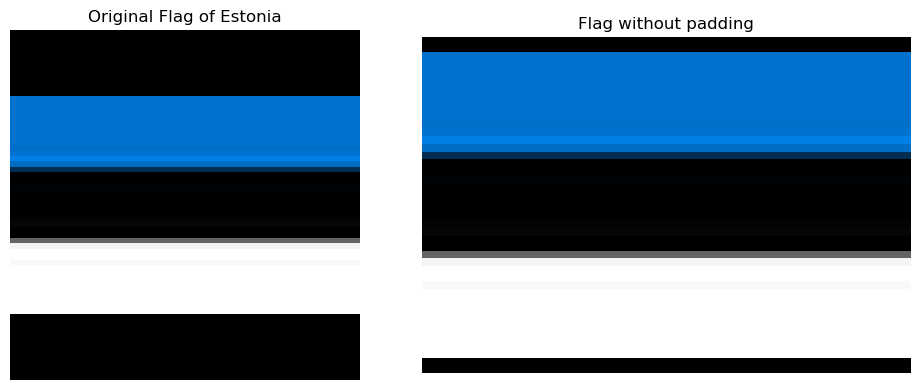


Analyzing flag of Saint Kitts and Nevis (kn):


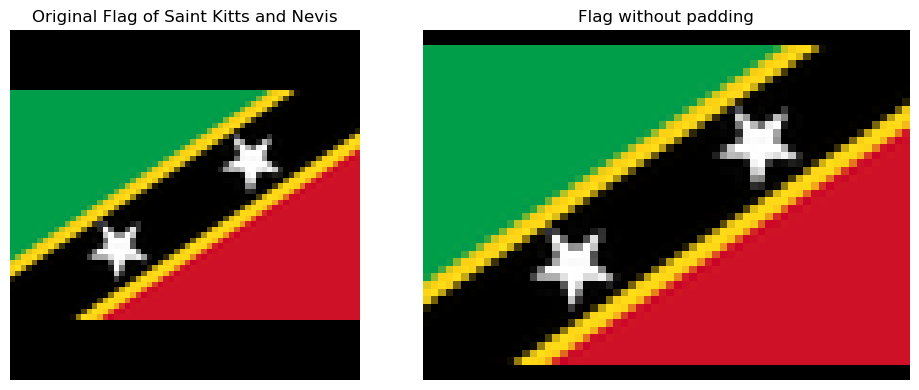


Analyzing flag of Hungary (hu):


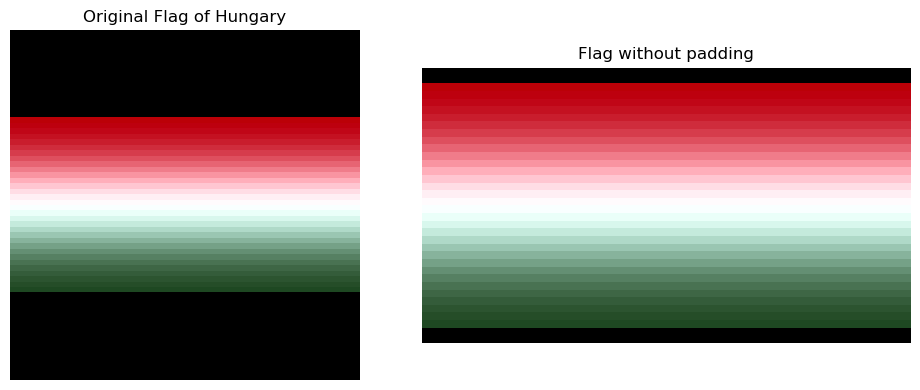


Analyzing flag of Iraq (iq):


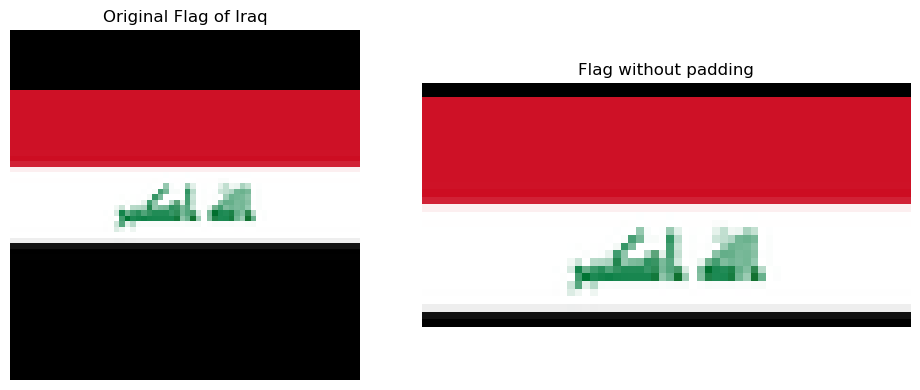


Analyzing flag of Cayman Islands (ky):


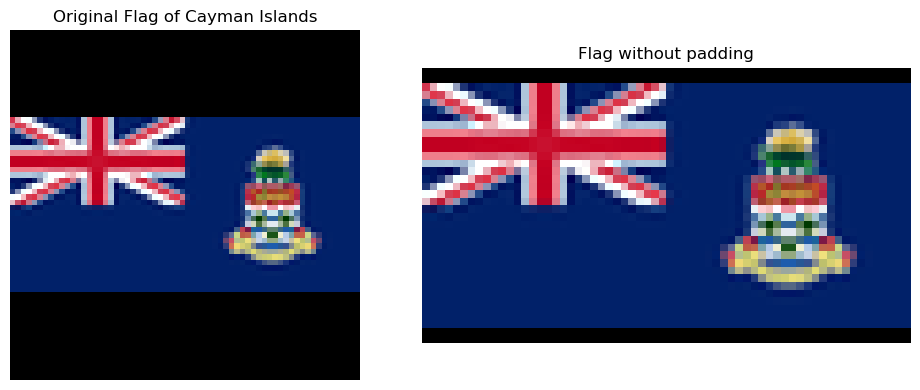


Analyzing flag of Saint Helena, Ascension and Tristan da Cunha (sh):


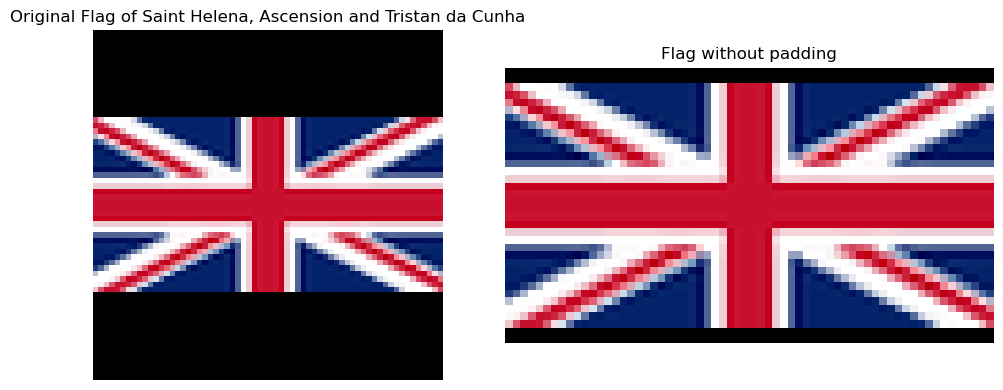


Analyzing flag of Palestine (ps):


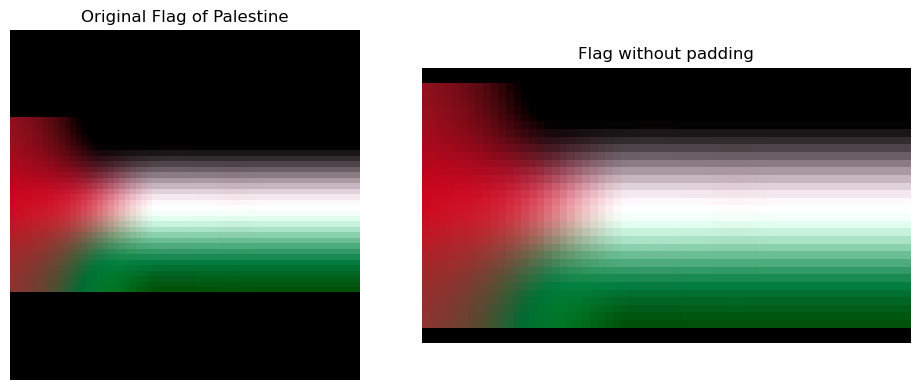


Analyzing flag of French Polynesia (pf):


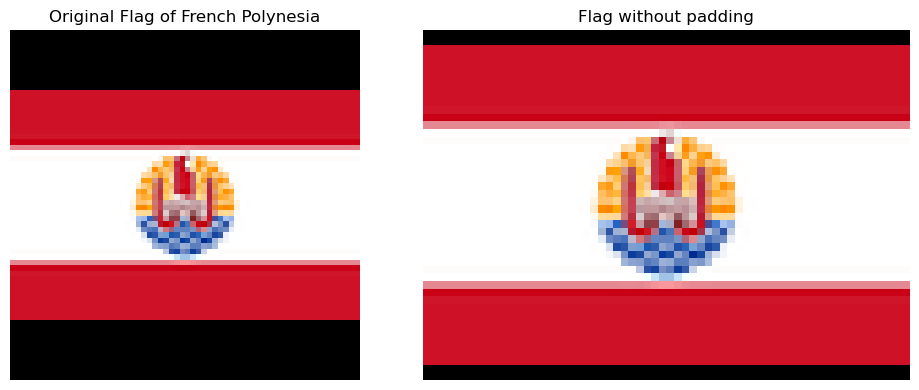


Analyzing flag of Svalbard and Jan Mayen Islands (sj):


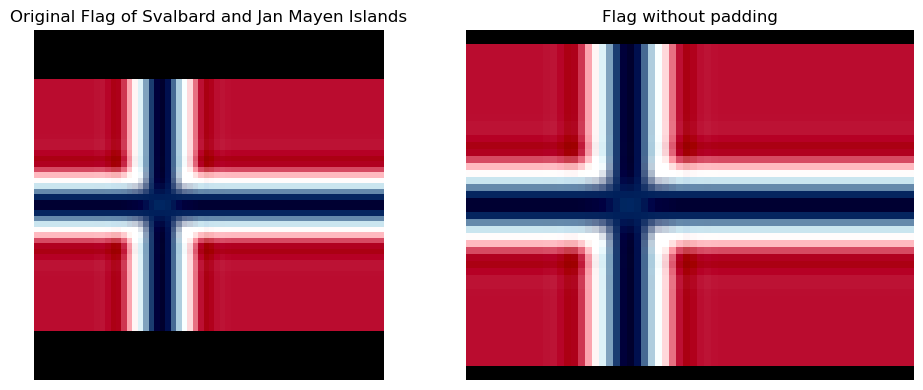


Analyzing flag of Indonesia (id):


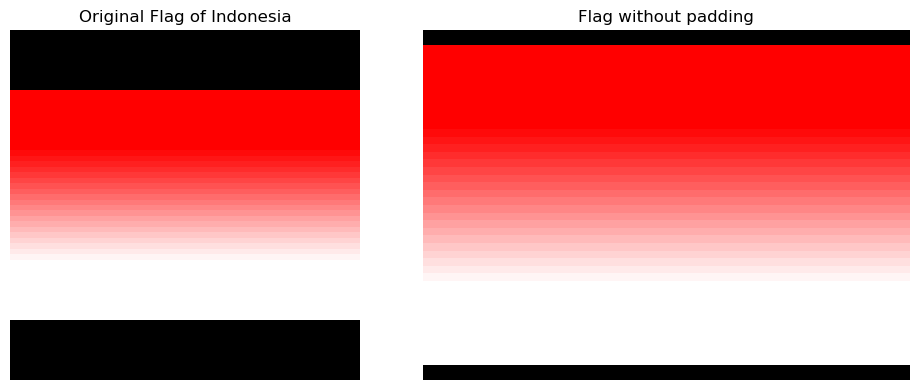


Analyzing flag of Iceland (is):


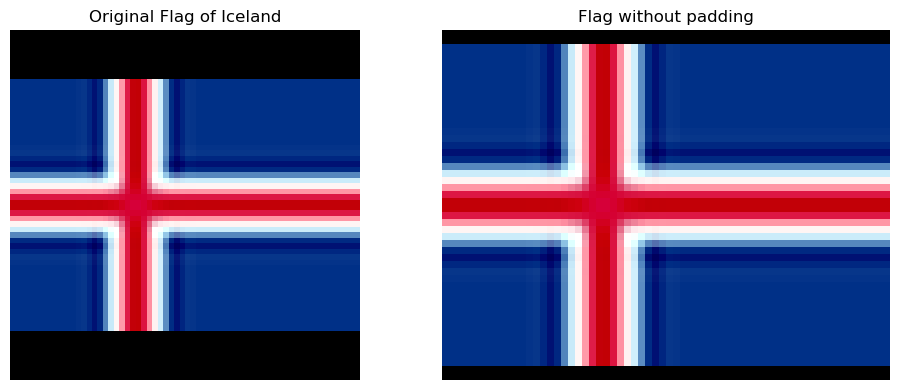


Analyzing flag of Egypt (eg):


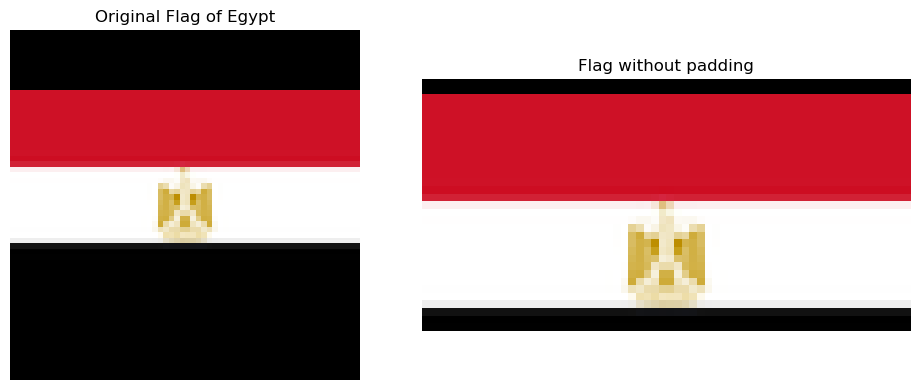


Analyzing flag of Falkland Islands (Malvinas) (fk):


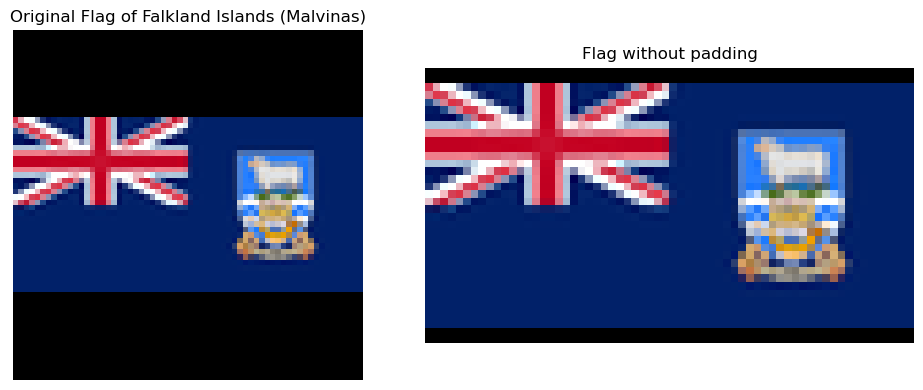


Analyzing flag of Fiji (fj):


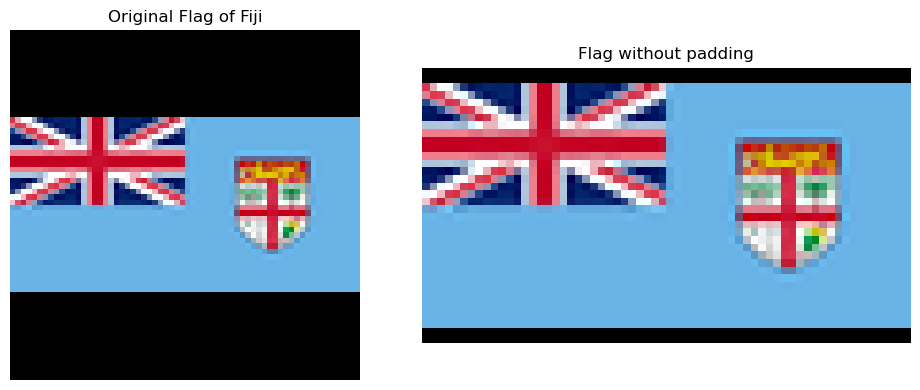


Analyzing flag of Guinea (gn):


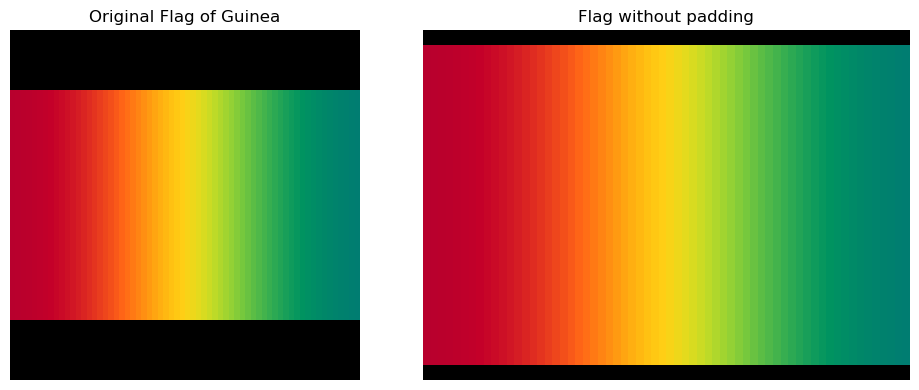


Analyzing flag of Guyana (gy):


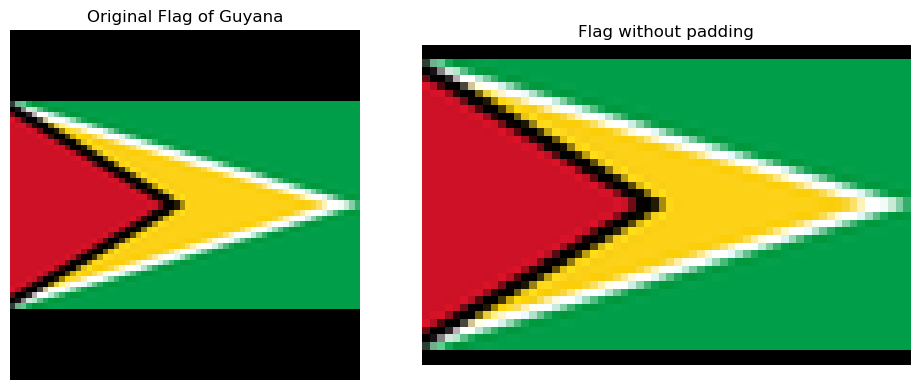


Analyzing flag of Iran, Islamic Republic of (ir):


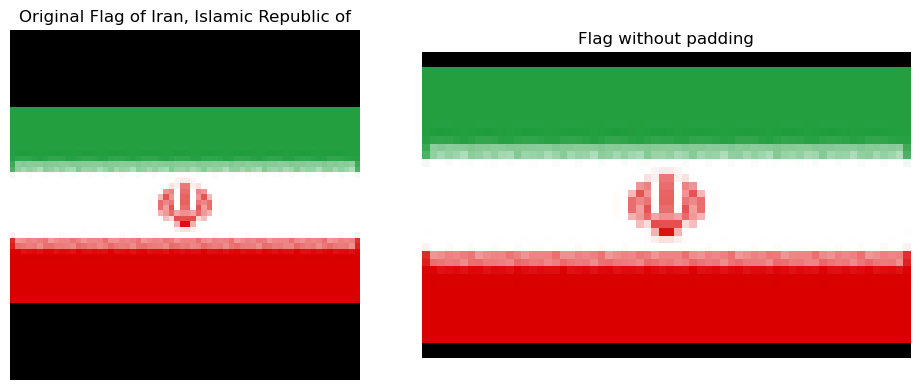


Analyzing flag of Comoros (km):


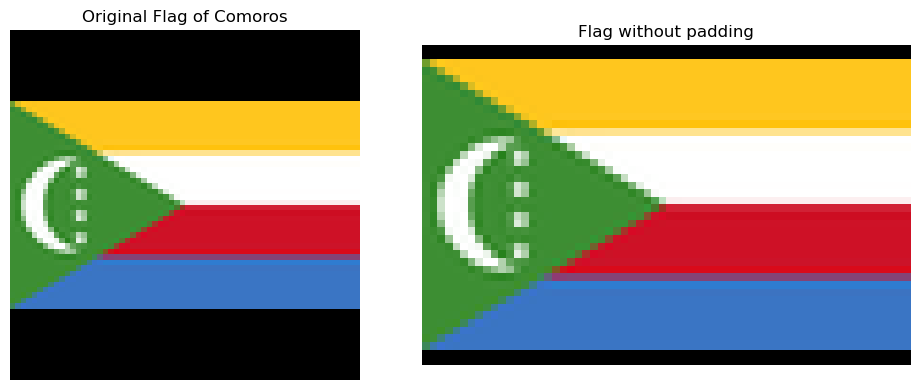


Analyzing flag of Ireland (ie):


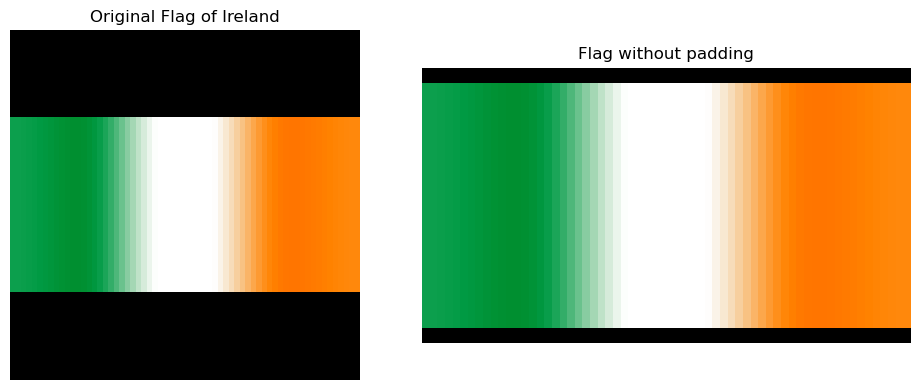


Analyzing flag of Kazakhstan (kz):


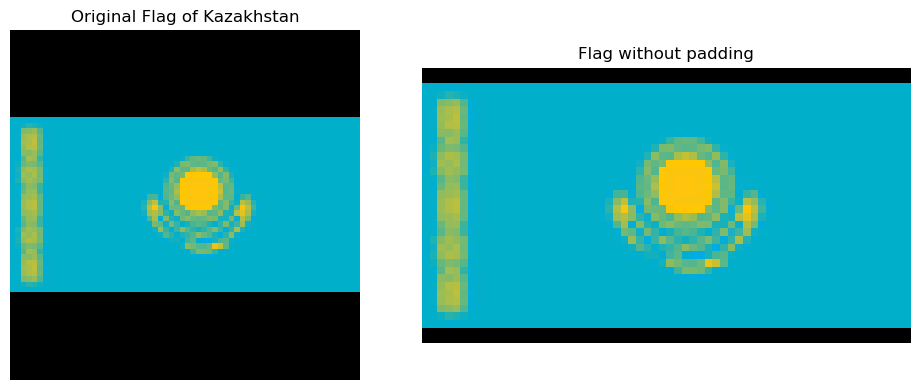


Analyzing flag of Romania (ro):


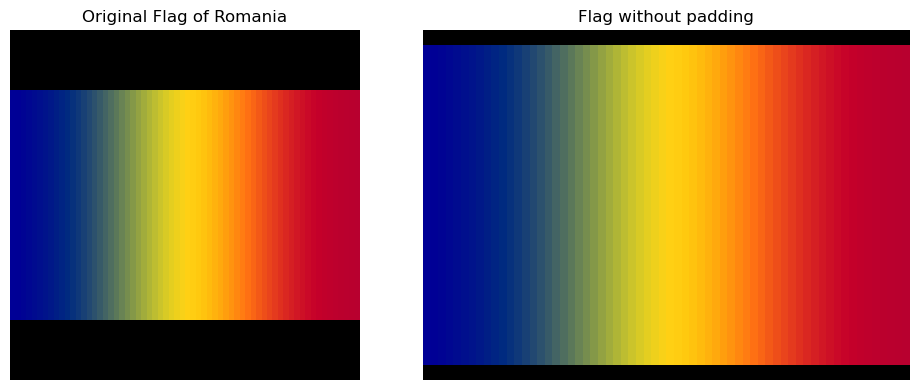


Analyzing flag of Slovakia (sk):


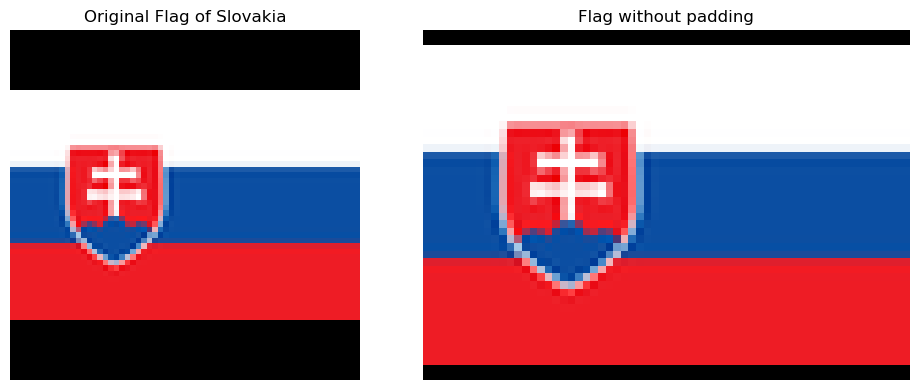


Analyzing flag of Papua New Guinea (pg):


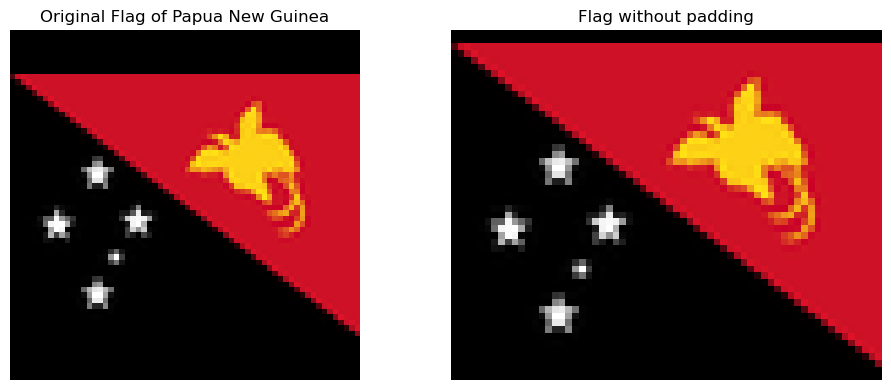


Analyzing flag of Portugal (pt):


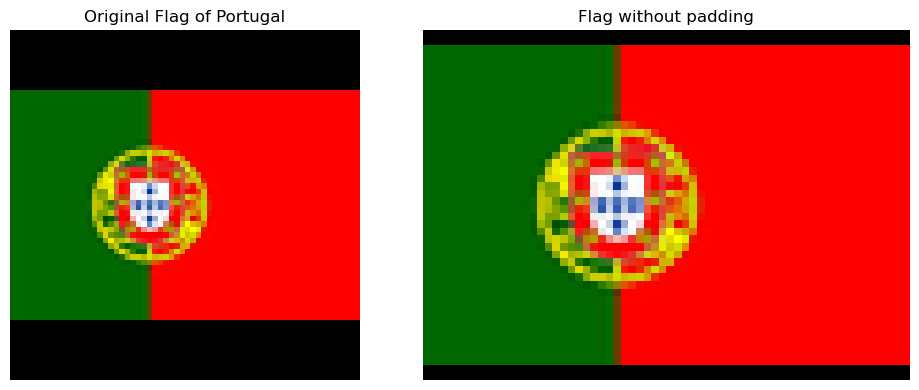


Analyzing flag of Somalia (so):


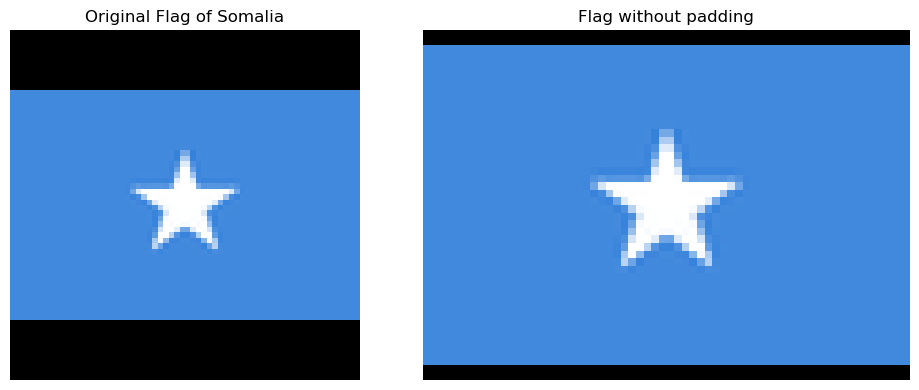


Analyzing flag of Sint Maarten (Dutch part) (sx):


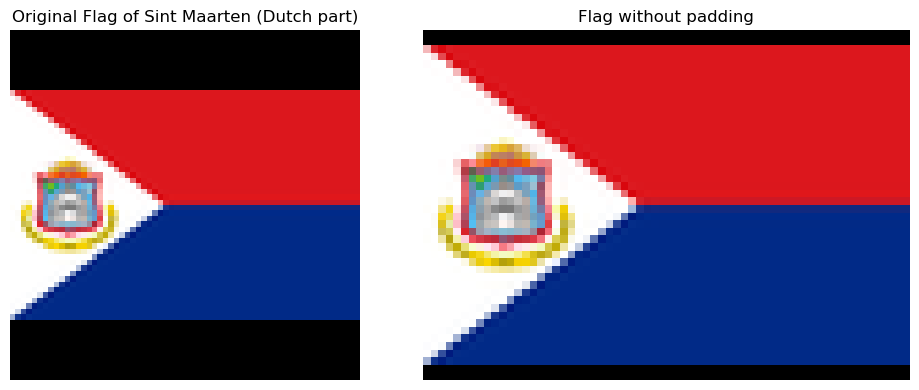


Analyzing flag of Croatia (hr):


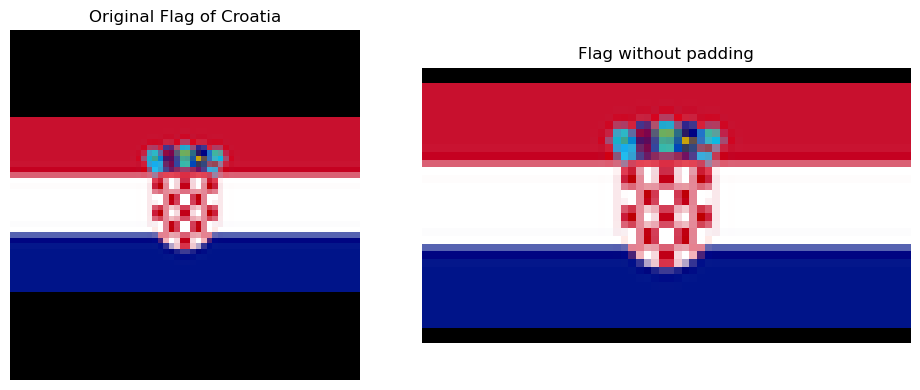


Analyzing flag of Kiribati (ki):


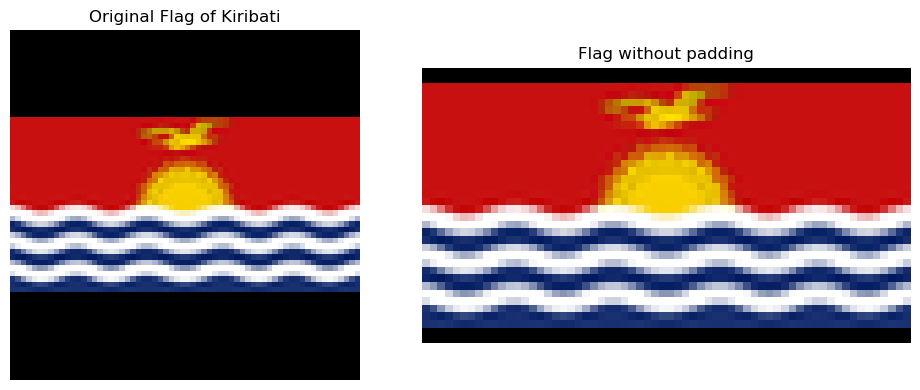


Analyzing flag of Jamaica (jm):


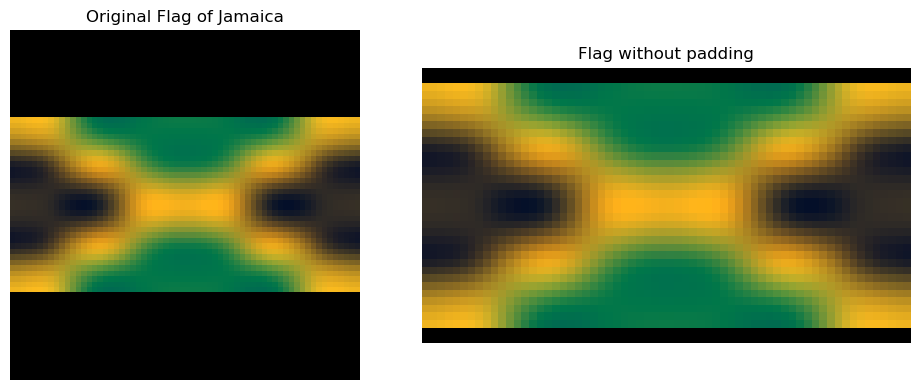


Analyzing flag of Europe (eu):


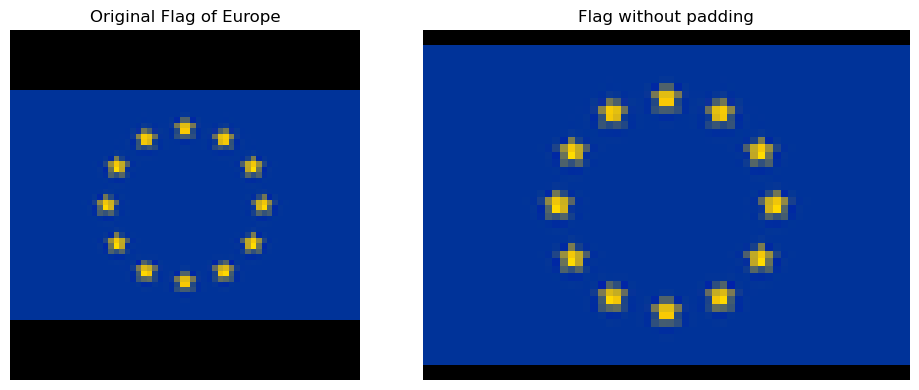


Analyzing flag of Ecuador (ec):


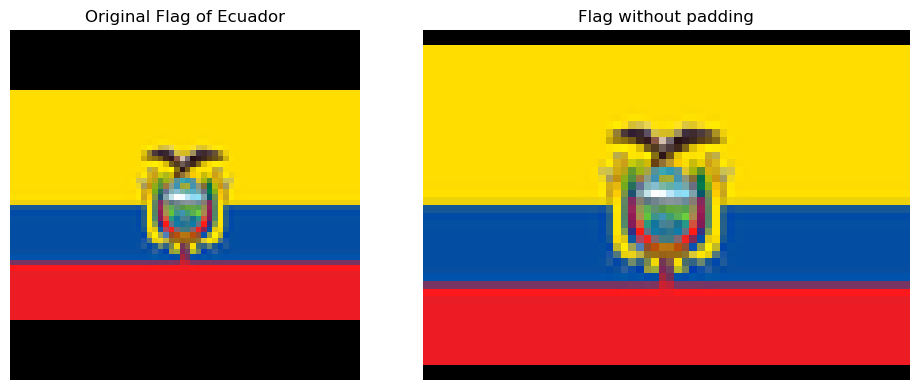


Analyzing flag of Ethiopia (et):


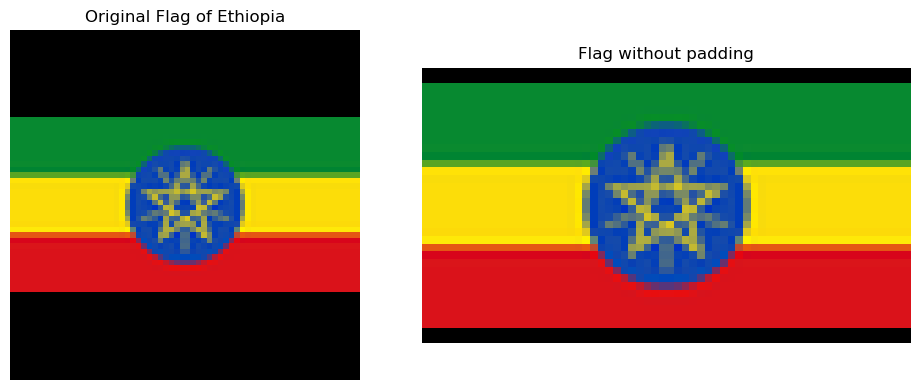


Analyzing flag of Faroe Islands (fo):


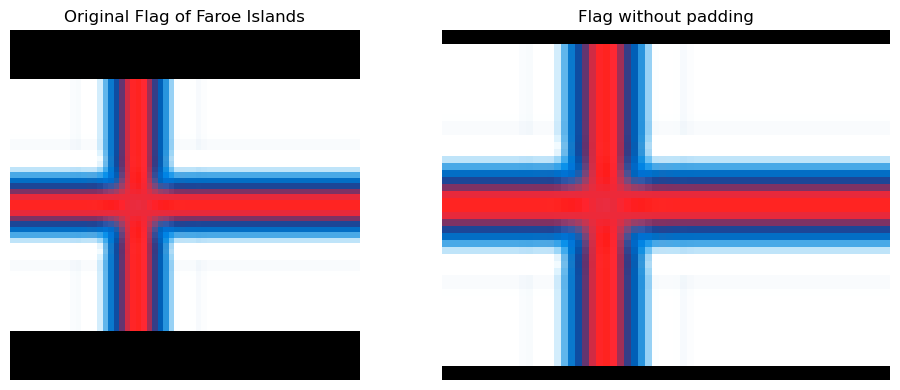


Analyzing flag of Cambodia (kh):


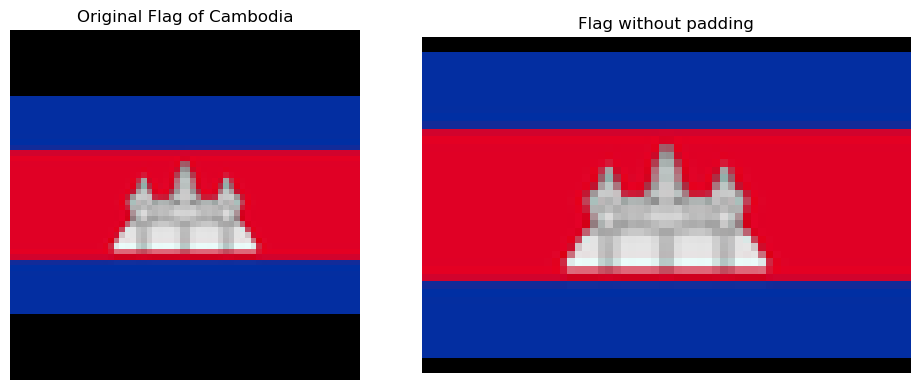


Analyzing flag of Syrian Arab Republic (sy):


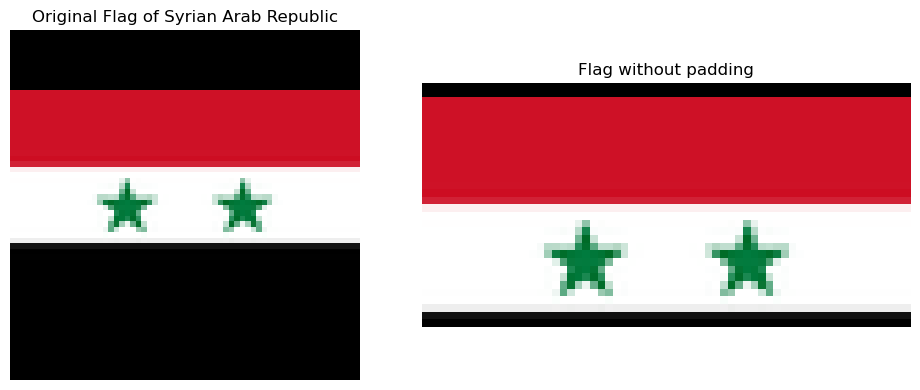


Analyzing flag of Senegal (sn):


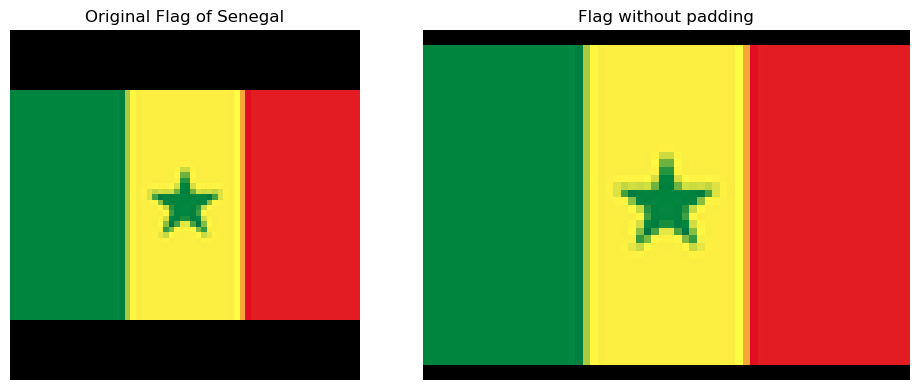


Analyzing flag of Palau (pw):


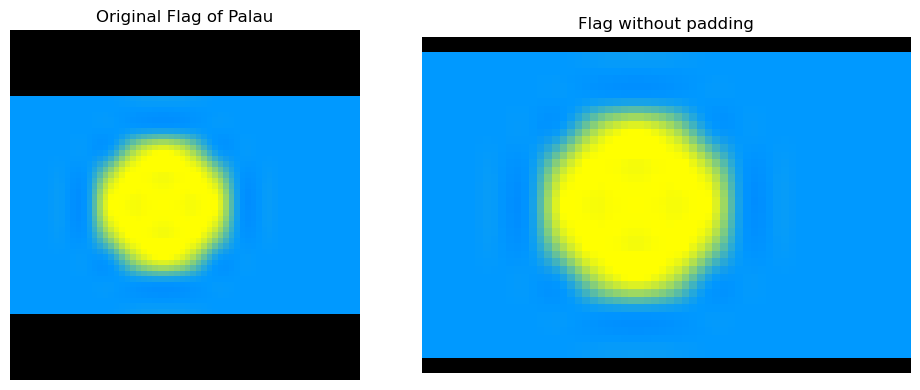


Analyzing flag of Sierra Leone (sl):


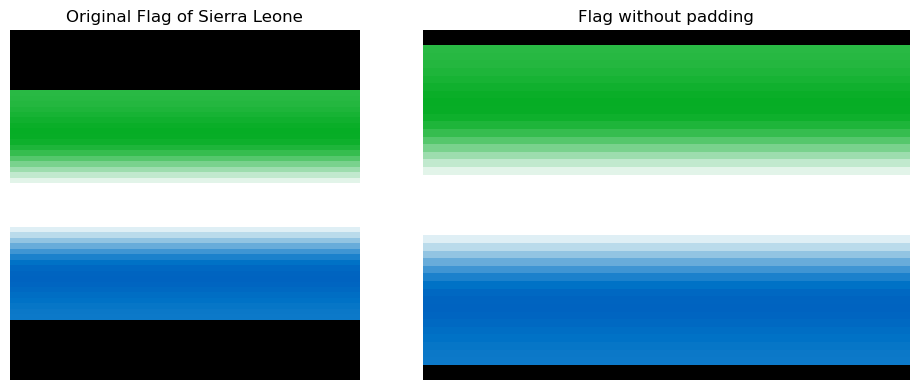


Analyzing flag of England (gb-eng):


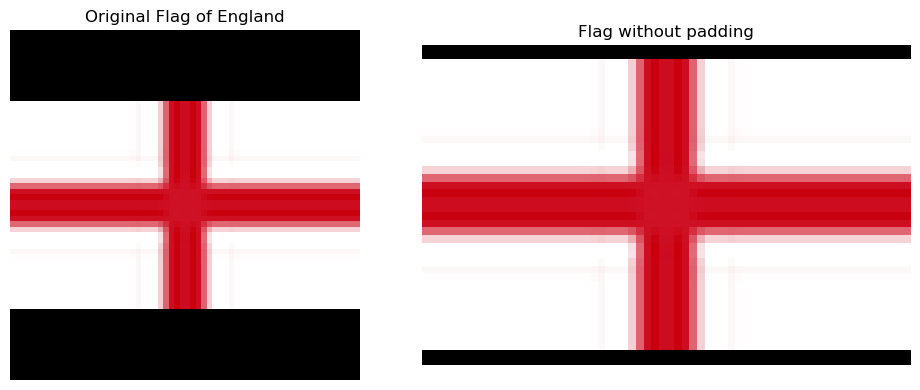


Analyzing flag of Micronesia, Federated States of (fm):


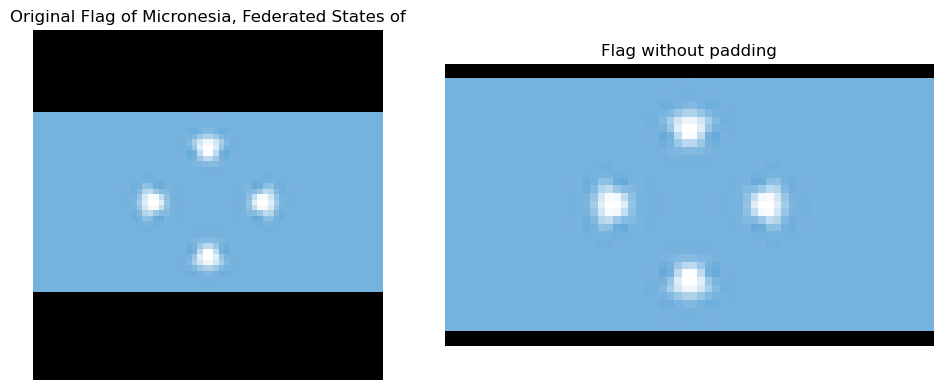


Analyzing flag of Gibraltar (gi):


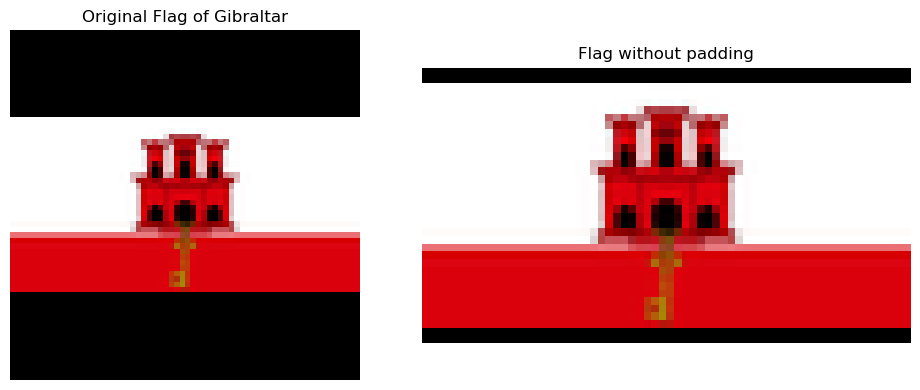


Analyzing flag of Germany (de):


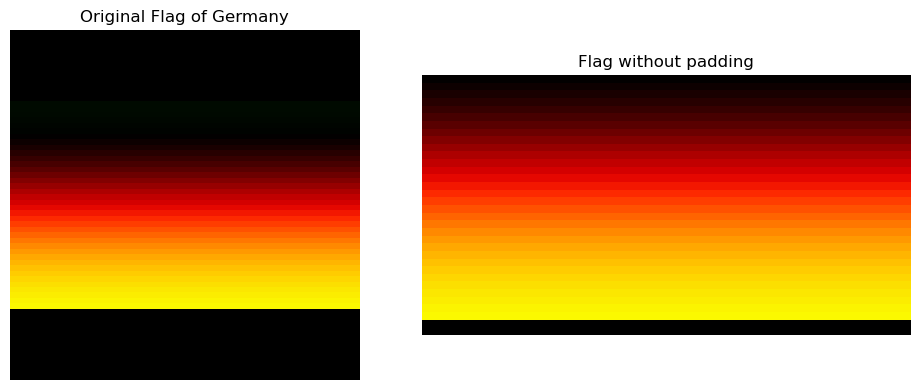


Analyzing flag of Ghana (gh):


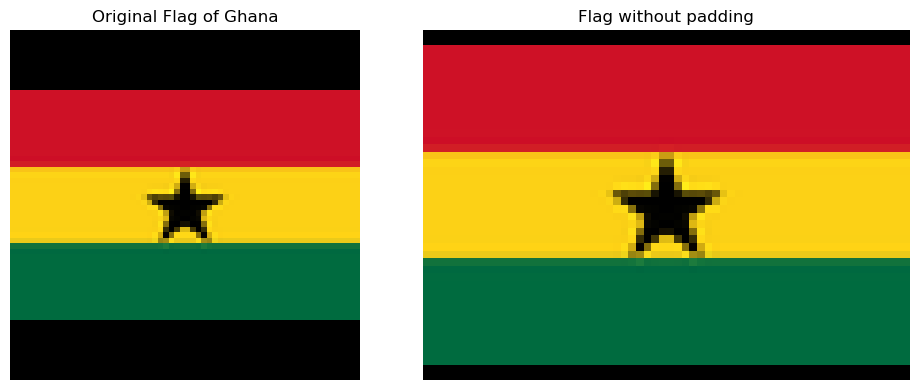


Analyzing flag of Jordan (jo):


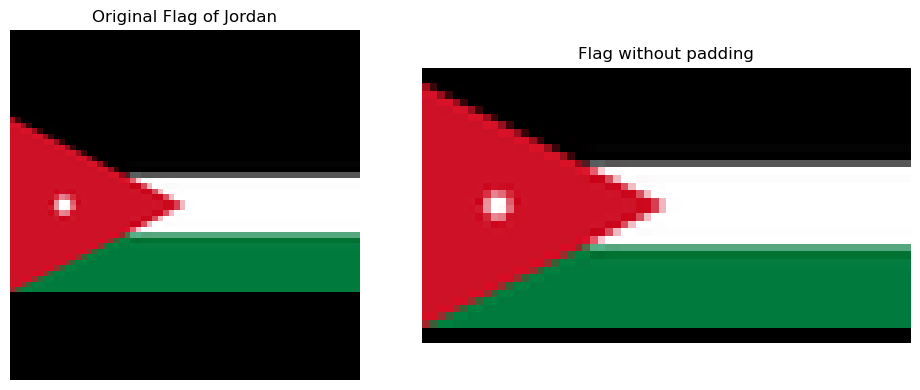


Analyzing flag of Italy (it):


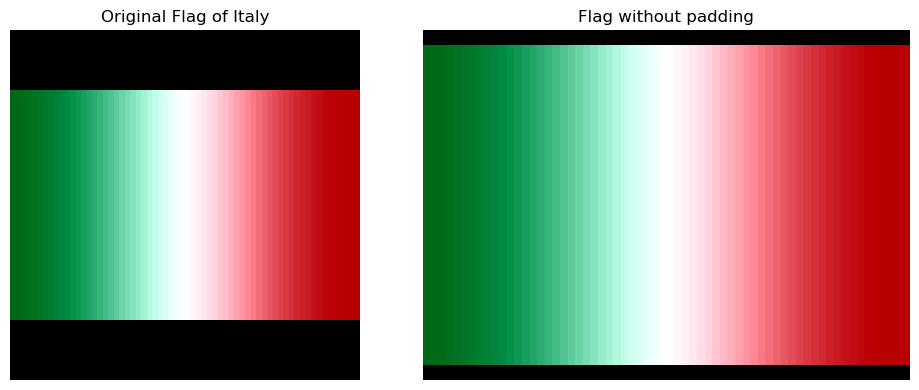


Analyzing flag of Panama (pa):


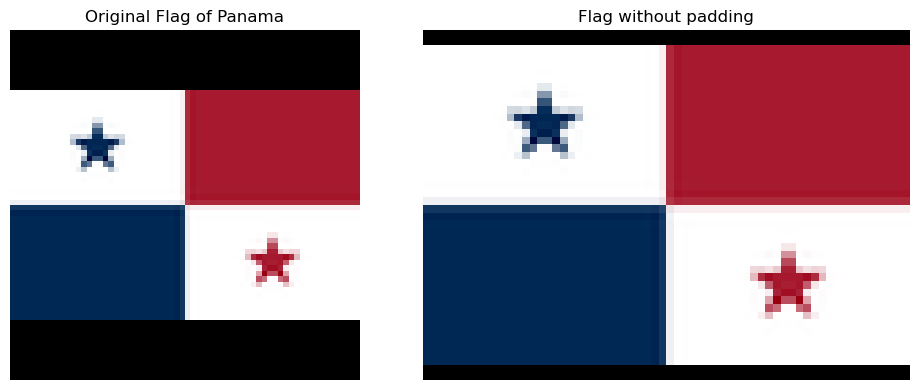


Analyzing flag of Kingdom of Eswatini (sz):


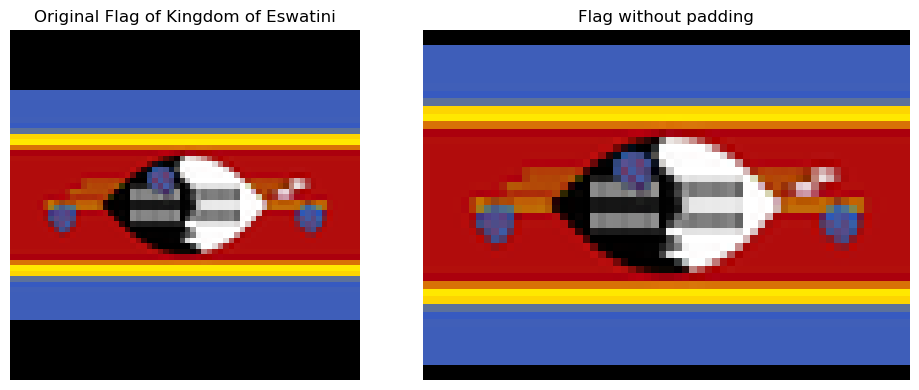


Analyzing flag of San Marino (sm):


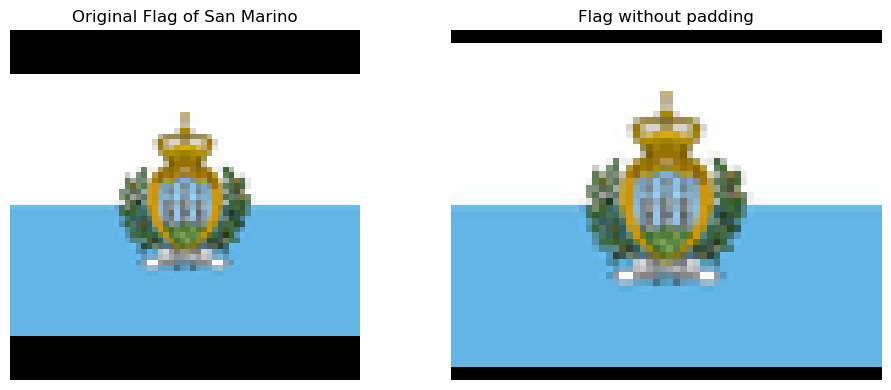


Analyzing flag of Tunisia (tn):


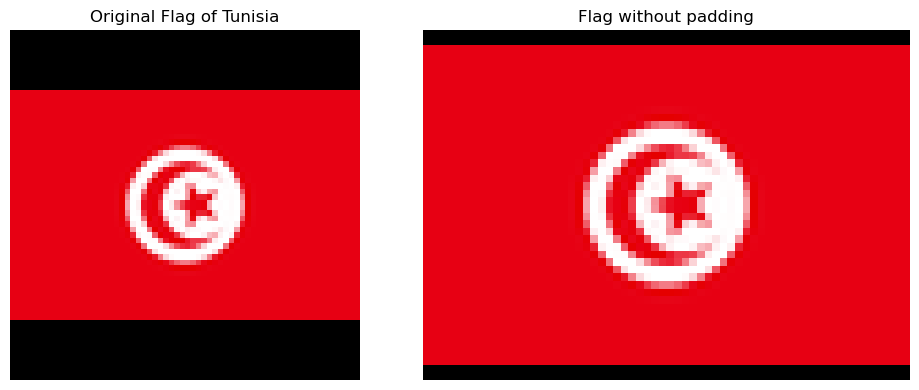


Analyzing flag of Mali (ml):


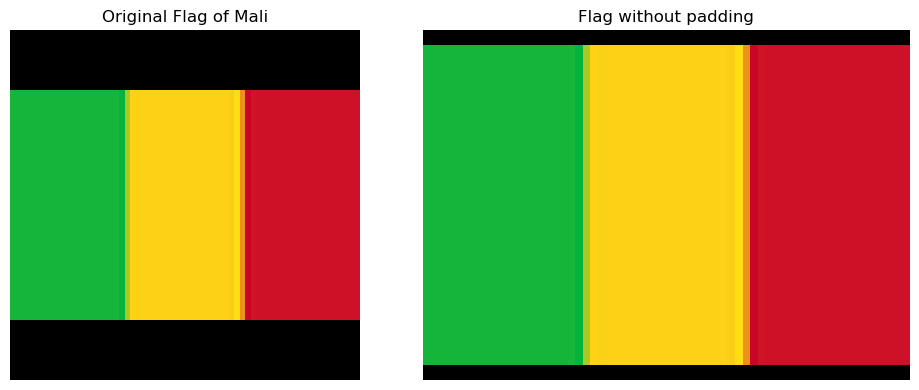


Analyzing flag of Republic of the Congo (cg):


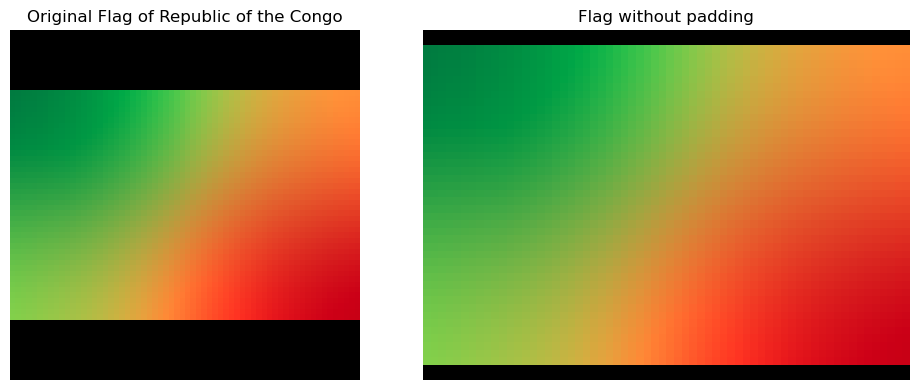


Analyzing flag of Åland Islands (ax):


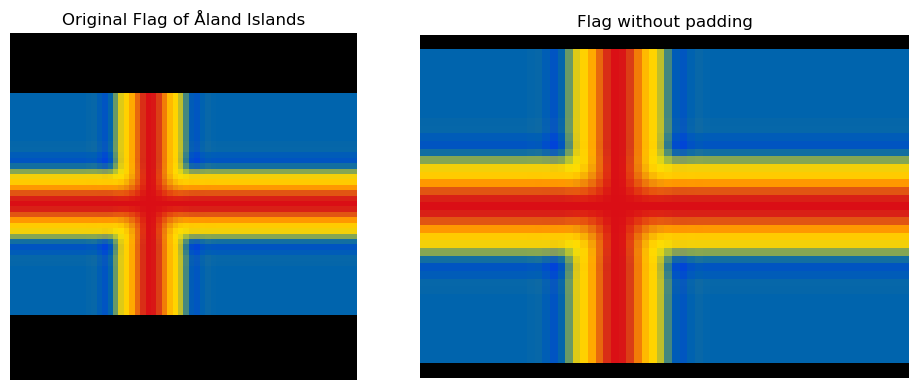


Analyzing flag of Angola (ao):


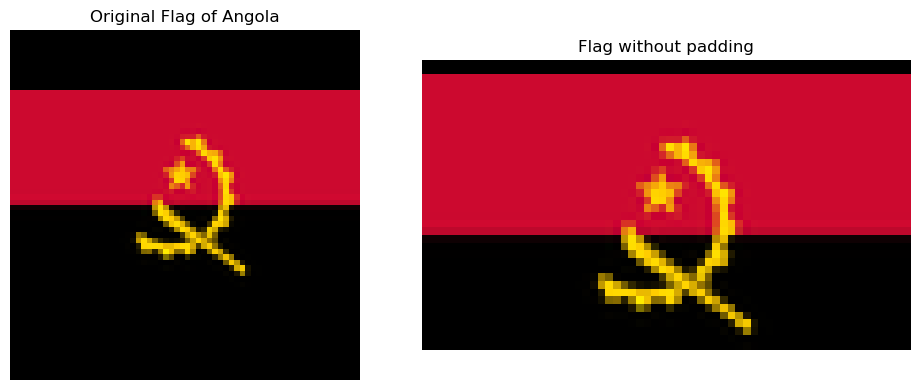


Analyzing flag of Bhutan (bt):


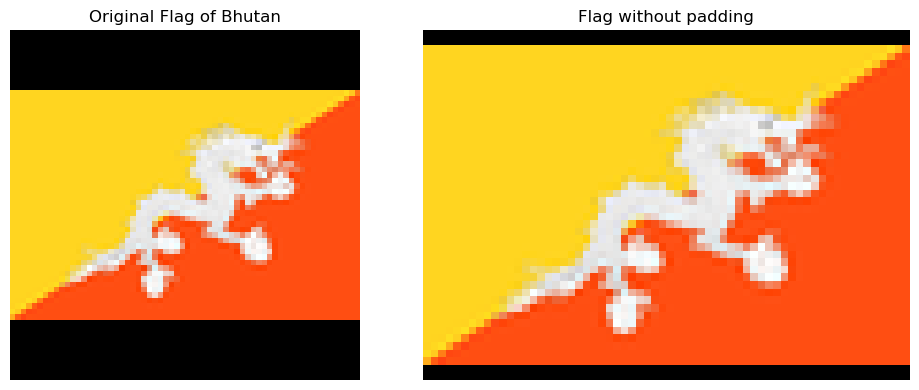


Analyzing flag of Central African Republic (cf):


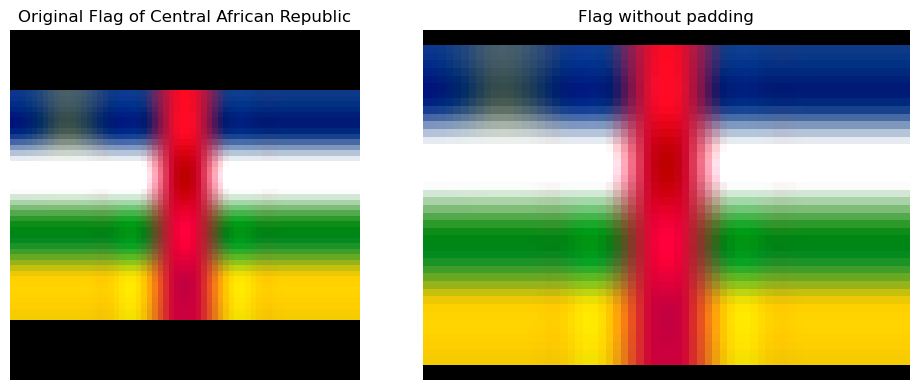


Analyzing flag of Myanmar (mm):


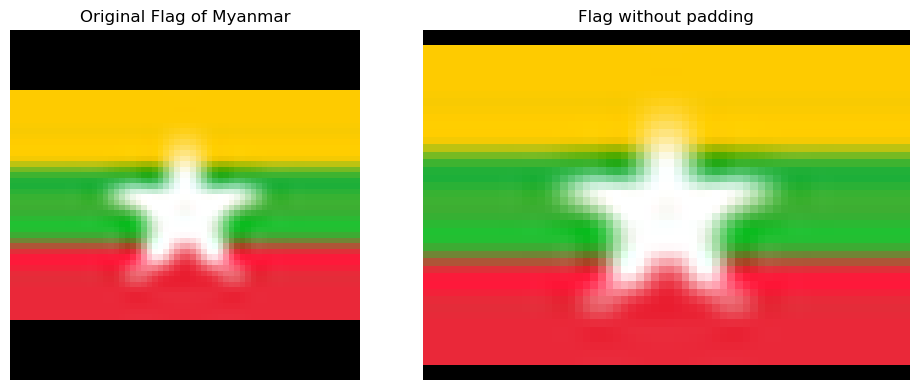


Analyzing flag of Liechtenstein (li):


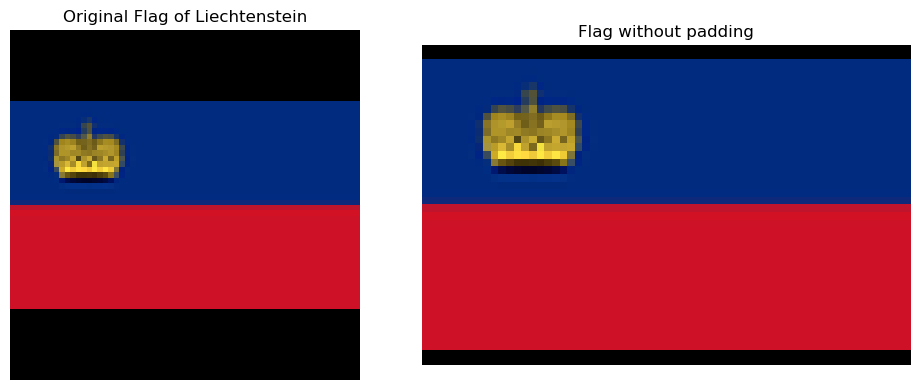


Analyzing flag of Namibia (na):


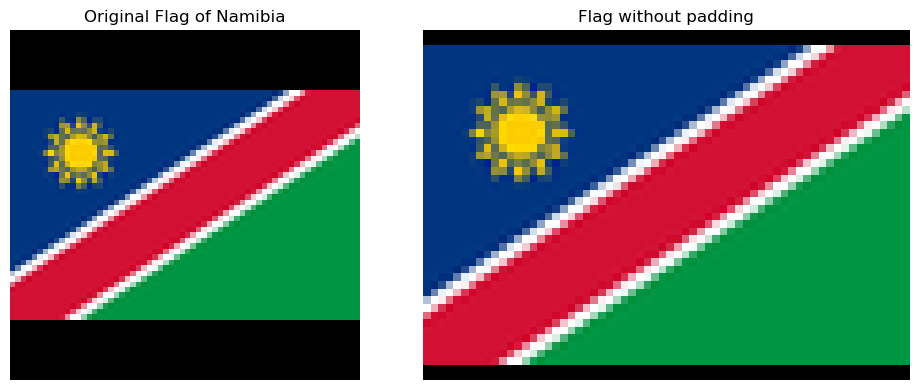


Analyzing flag of Mozambique (mz):


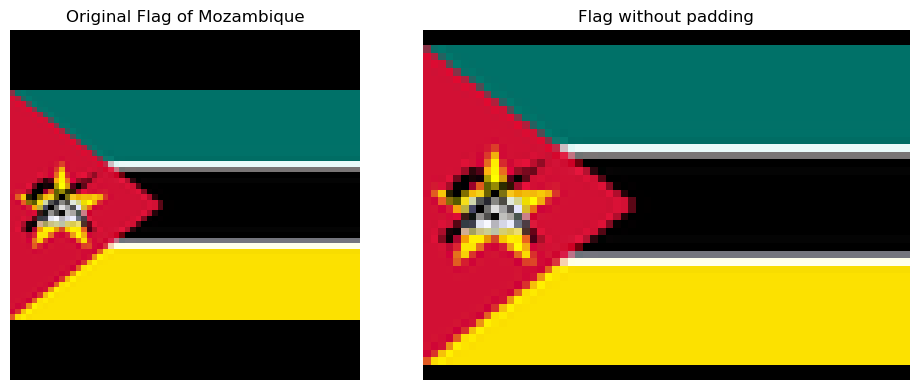


Analyzing flag of Tonga (to):


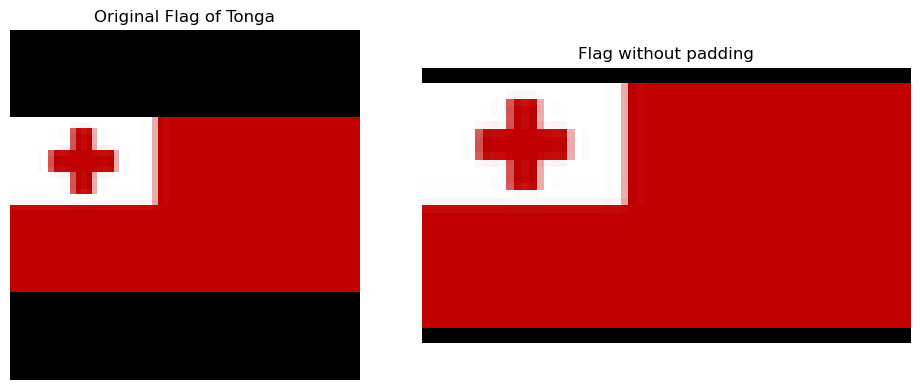


Analyzing flag of Virgin Islands, British (vg):


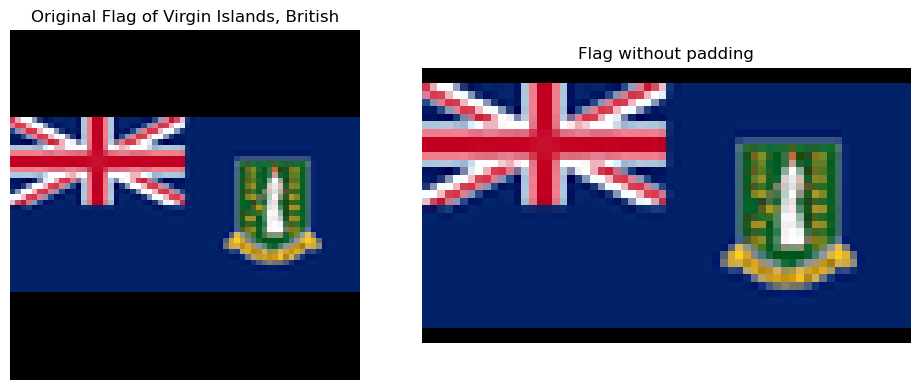


Analyzing flag of Venezuela, Bolivarian Republic of (ve):


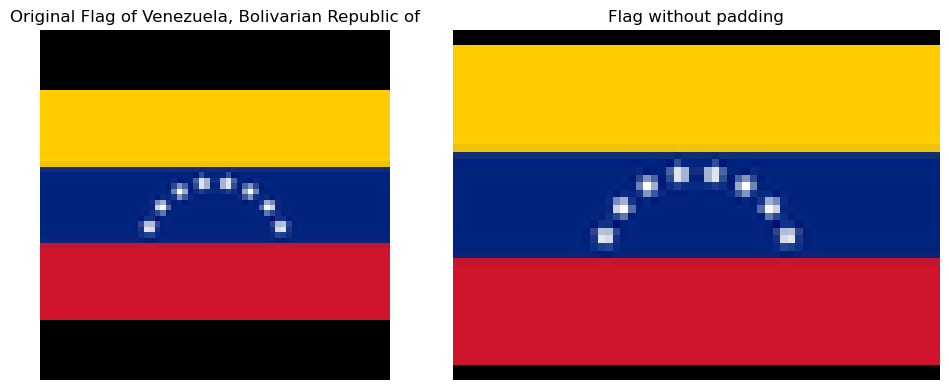


Analyzing flag of Tanzania, United Republic of (tz):


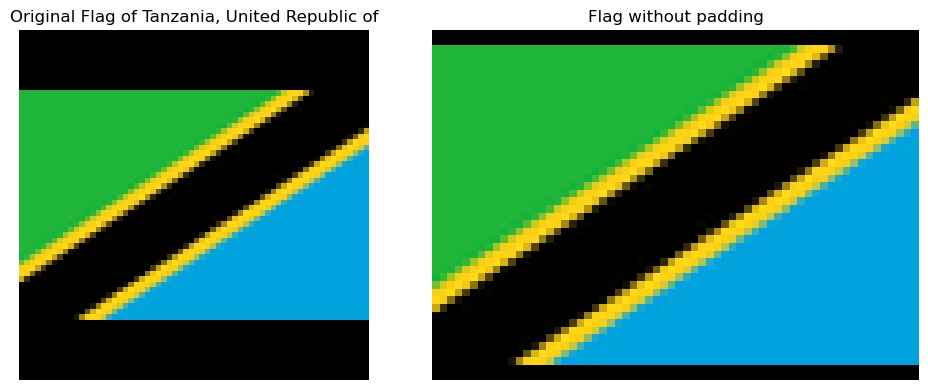


Analyzing flag of Turkmenistan (tm):


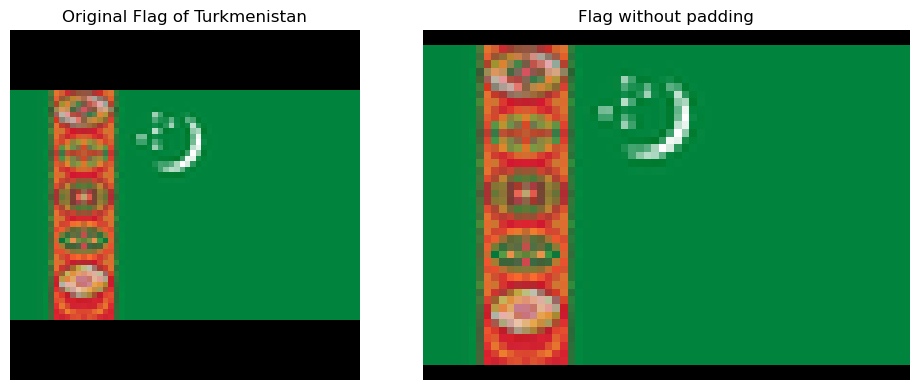


Analyzing flag of Mexico (mx):


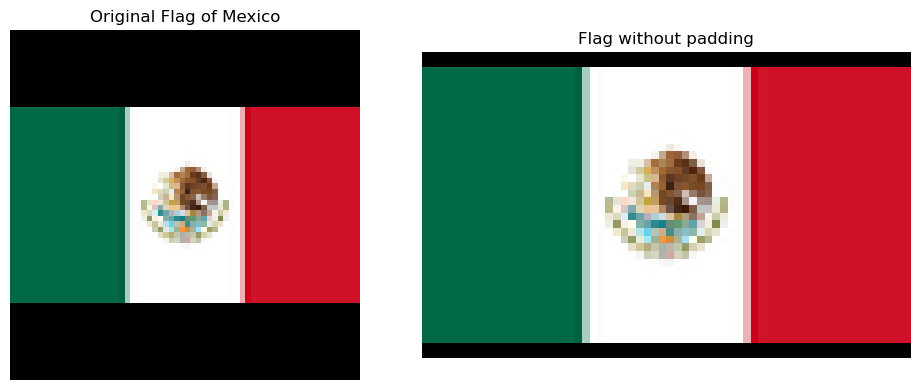


Analyzing flag of New Caledonia (nc):


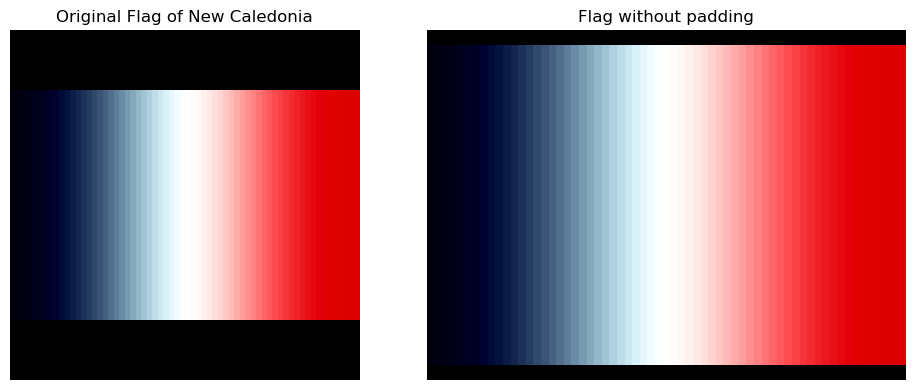


Analyzing flag of Macao (mo):


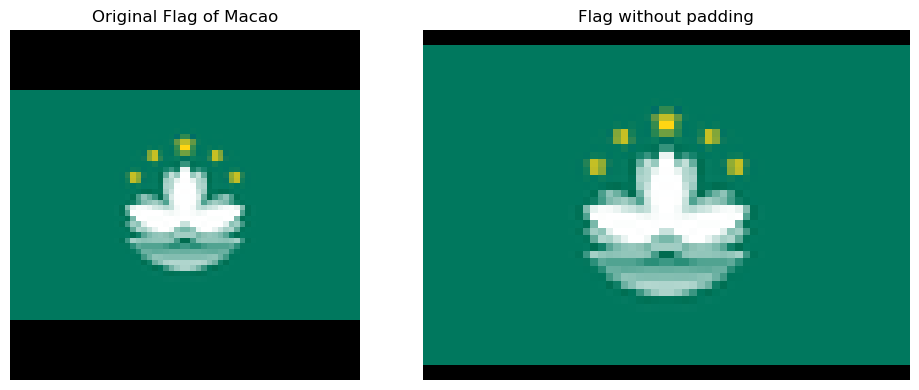


Analyzing flag of Sri Lanka (lk):


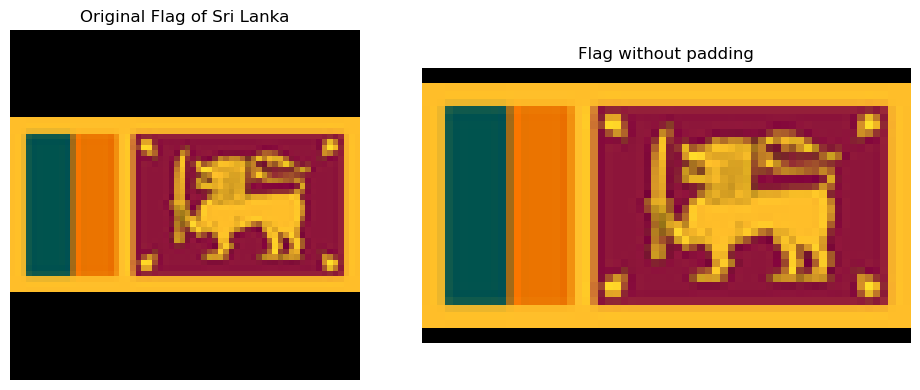


Analyzing flag of Congo, the Democratic Republic of the (cd):


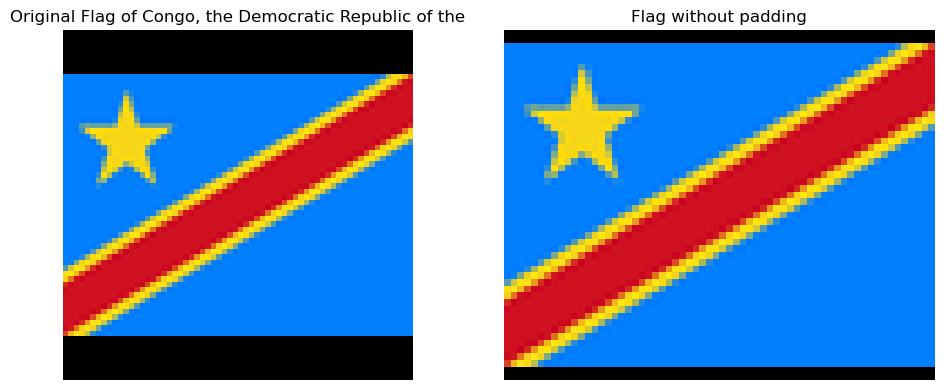


Analyzing flag of Albania (al):


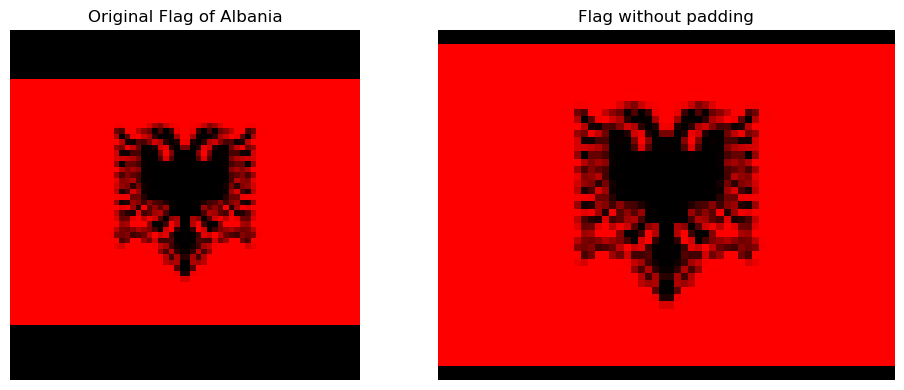


Analyzing flag of Botswana (bw):


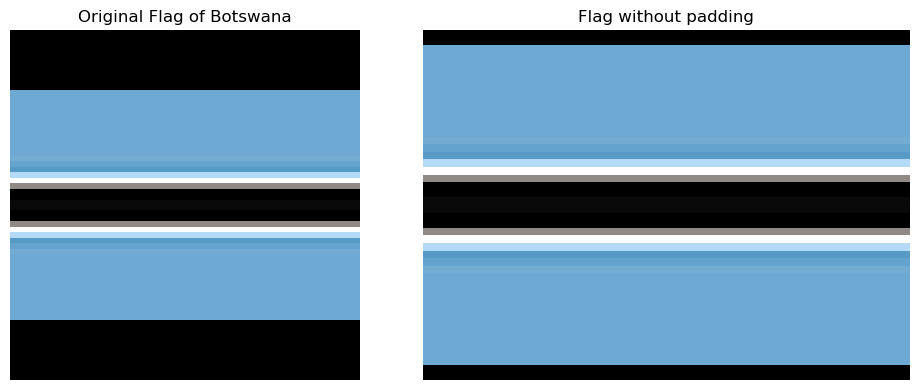


Analyzing flag of Costa Rica (cr):


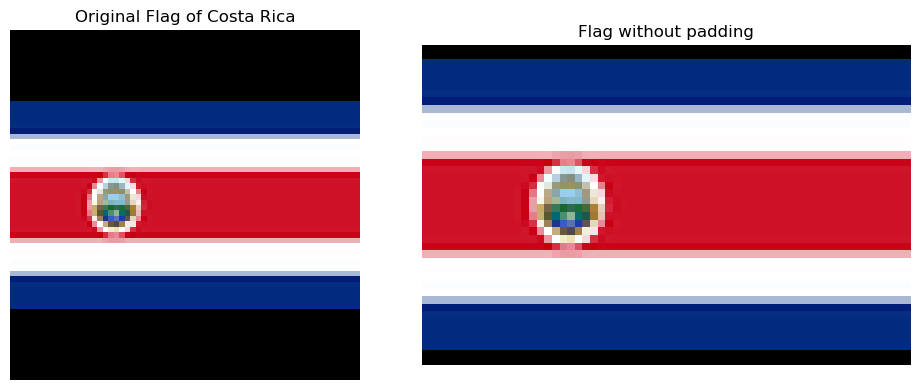


Analyzing flag of Bouvet Island (bv):


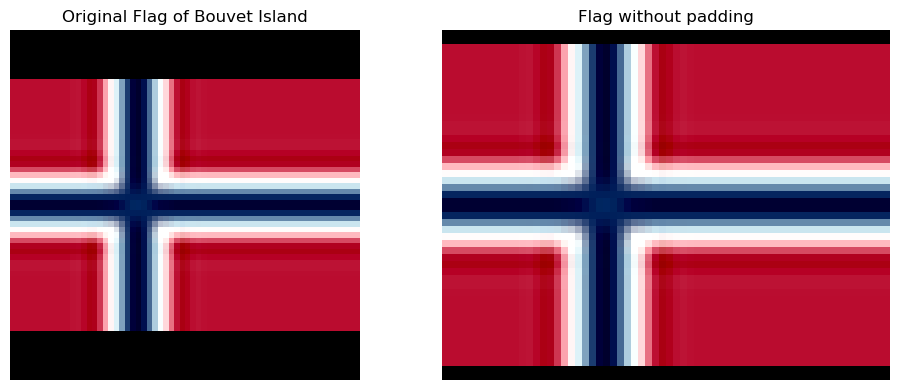


Analyzing flag of Armenia (am):


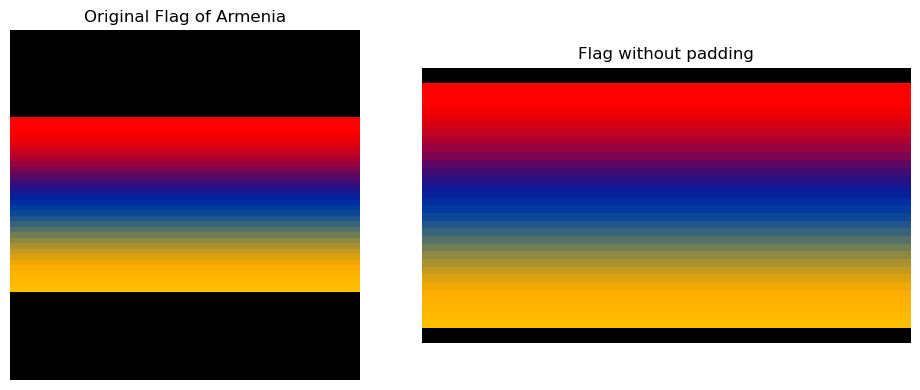


Analyzing flag of Azerbaijan (az):


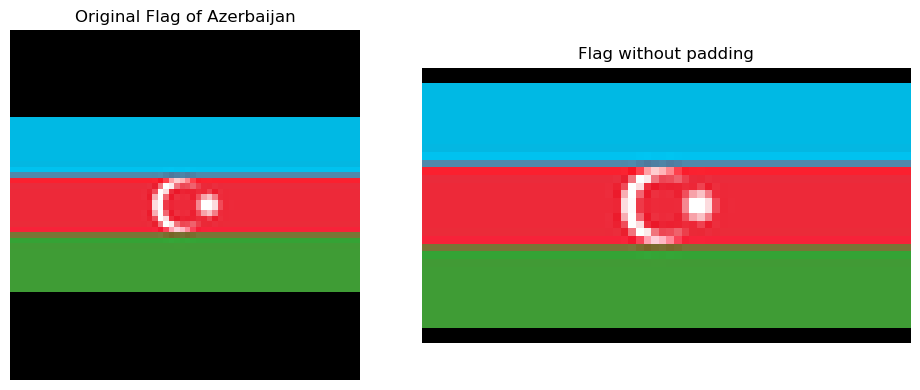


Analyzing flag of Bosnia and Herzegovina (ba):


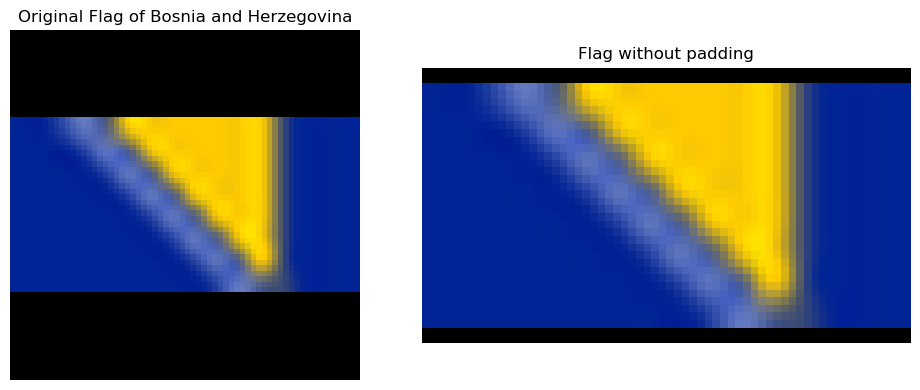


Analyzing flag of Mongolia (mn):


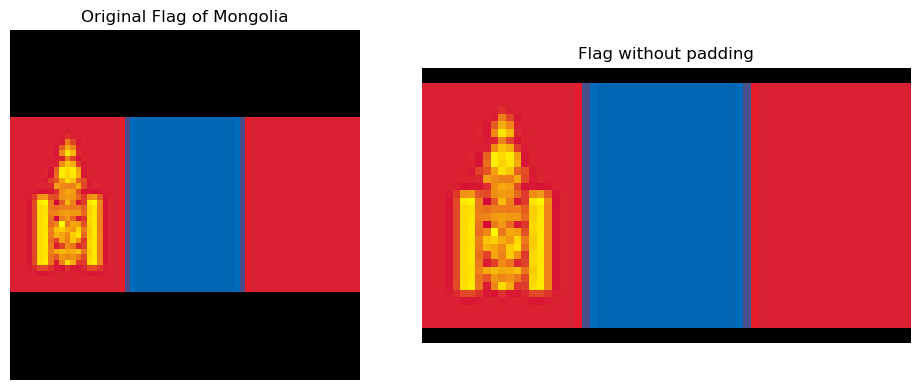


Analyzing flag of Niue (nu):


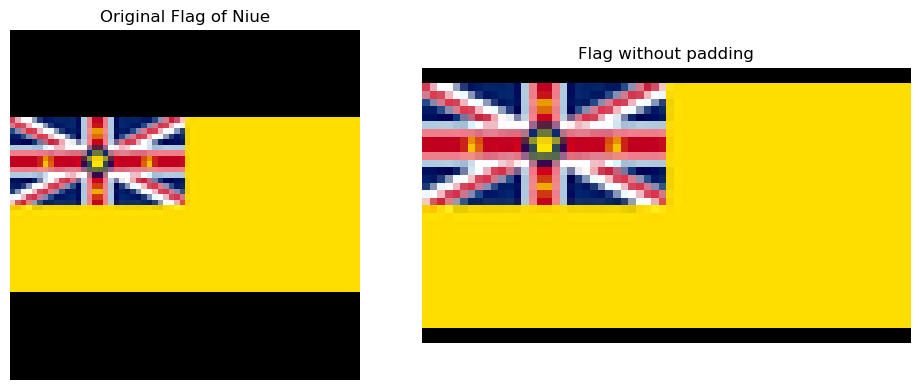


Analyzing flag of Malaysia (my):


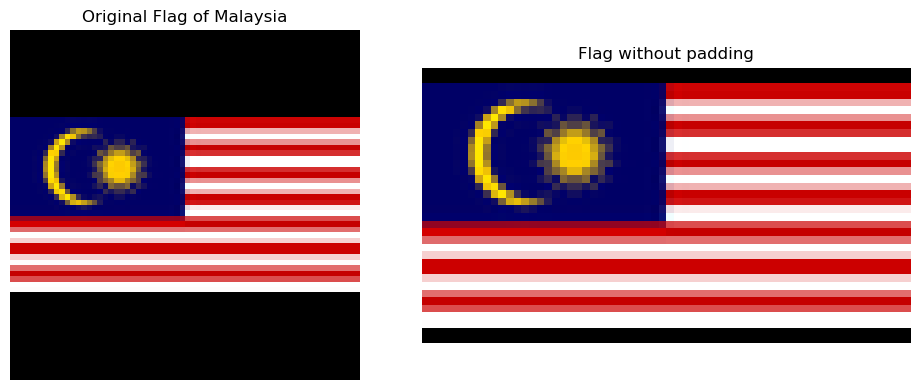


Analyzing flag of Timor-Leste (tl):


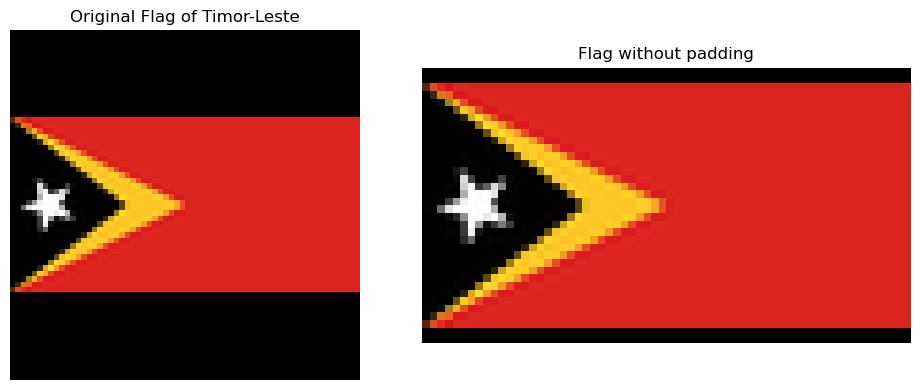


Analyzing flag of Samoa (ws):


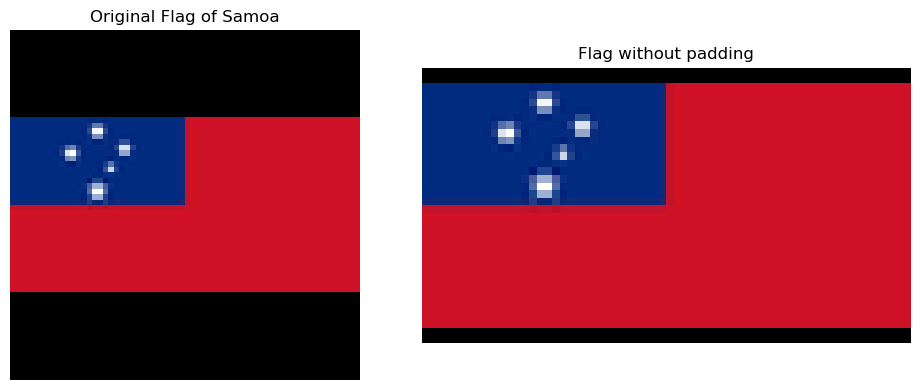


Analyzing flag of Thailand (th):


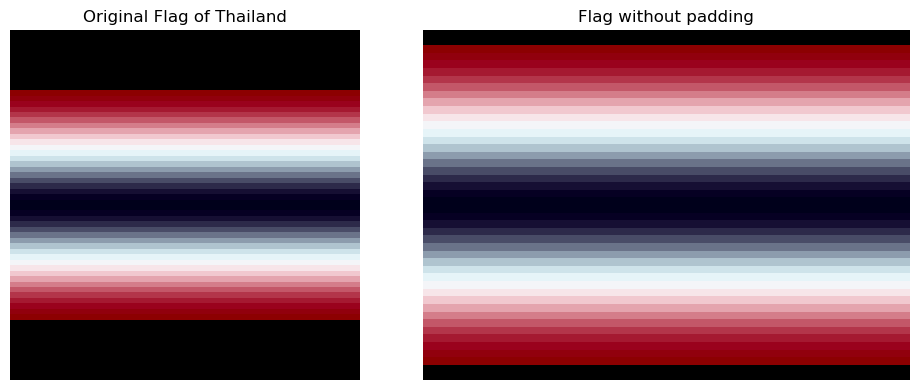


Analyzing flag of Kosovo (xk):


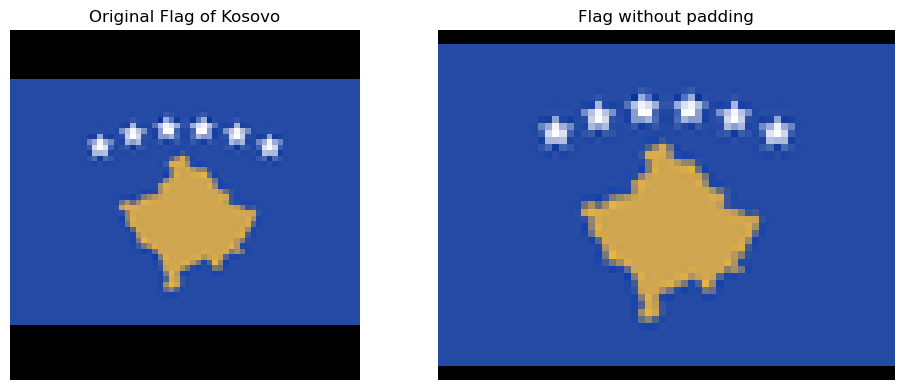


Analyzing flag of Norfolk Island (nf):


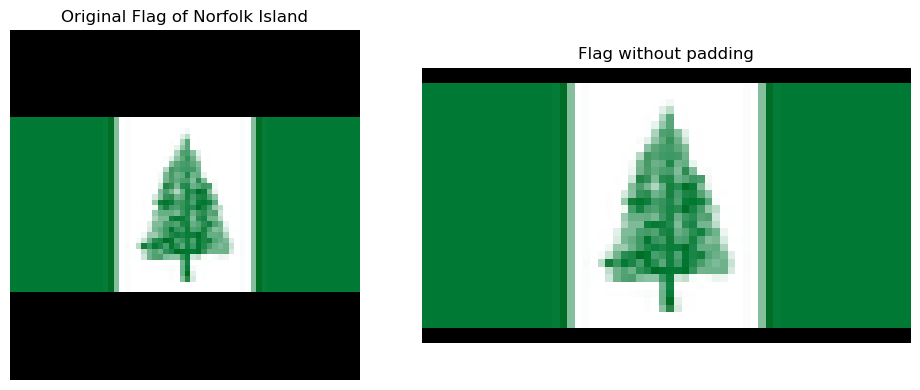


Analyzing flag of Libya (ly):


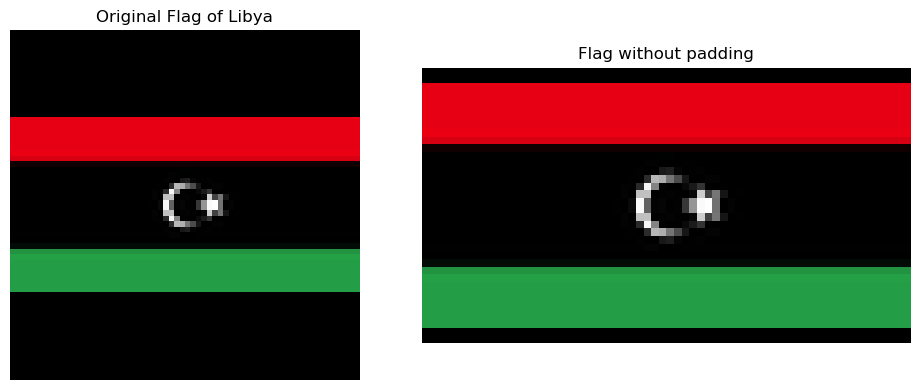


Analyzing flag of Anguilla (ai):


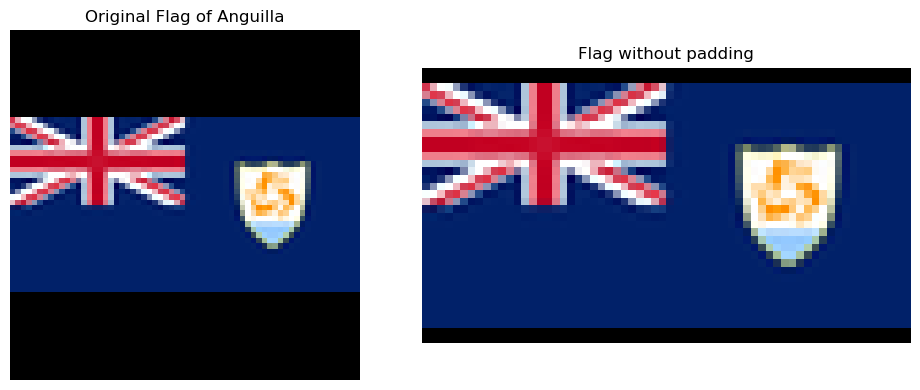


Analyzing flag of Brazil (br):


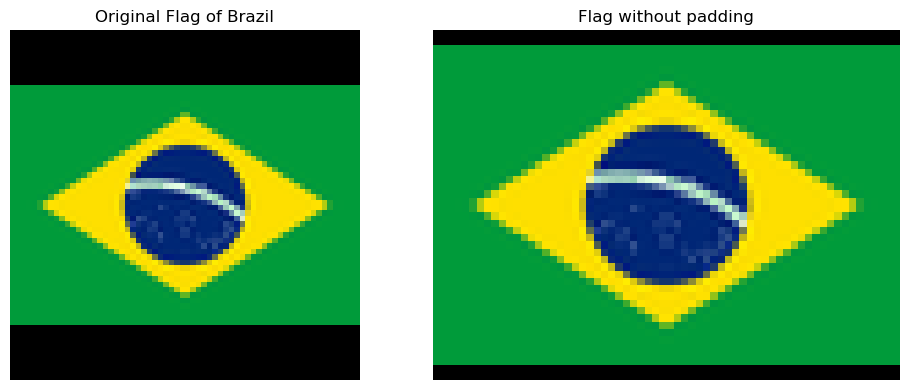


Analyzing flag of Cape Verde (cv):


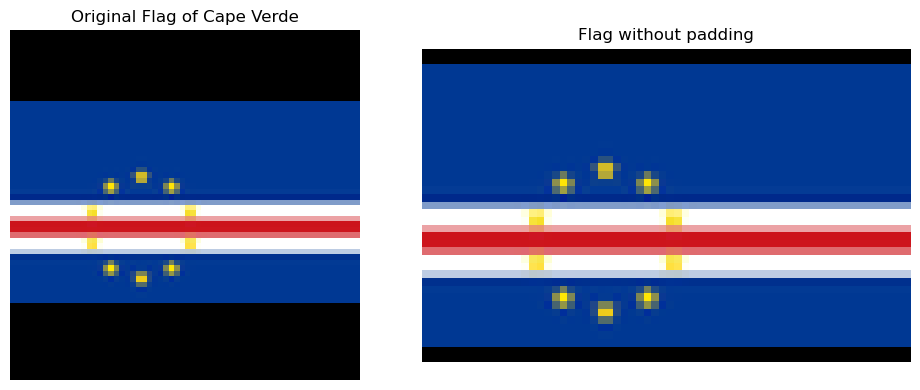


Analyzing flag of Belgium (be):


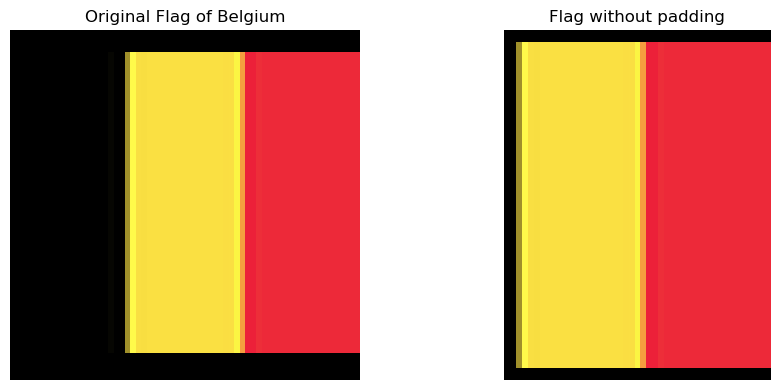


Analyzing flag of Canada (ca):


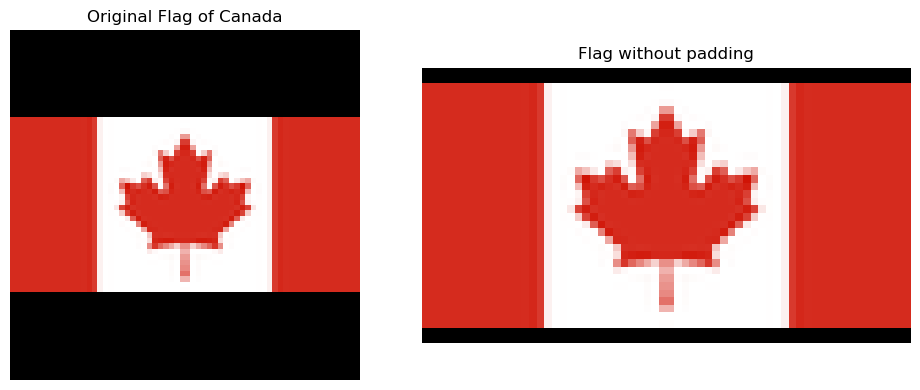


Analyzing flag of Bangladesh (bd):


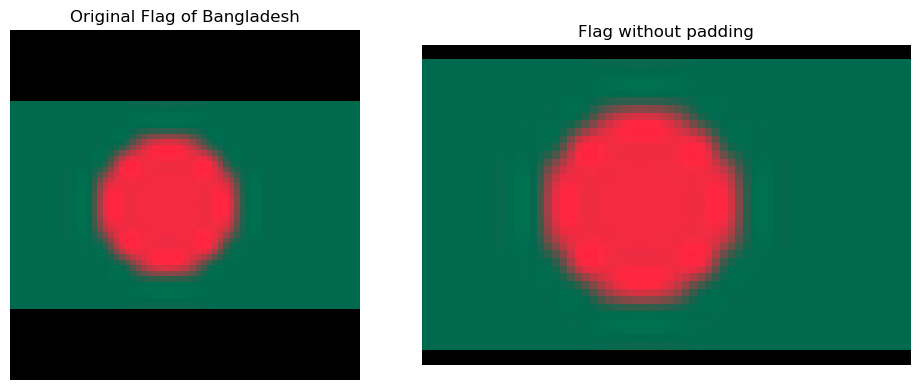


Analyzing flag of Curaçao (cw):


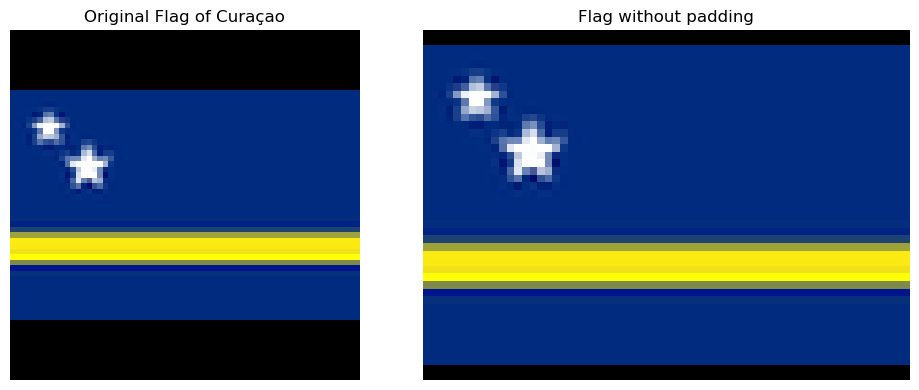


Analyzing flag of Bahamas (bs):


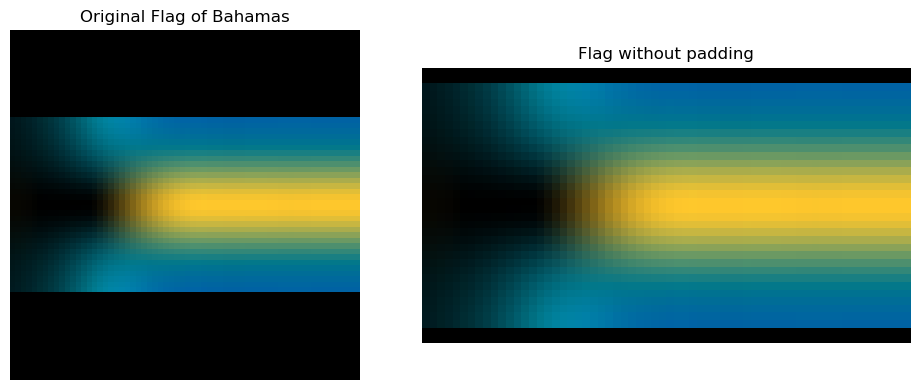


Analyzing flag of Nigeria (ng):


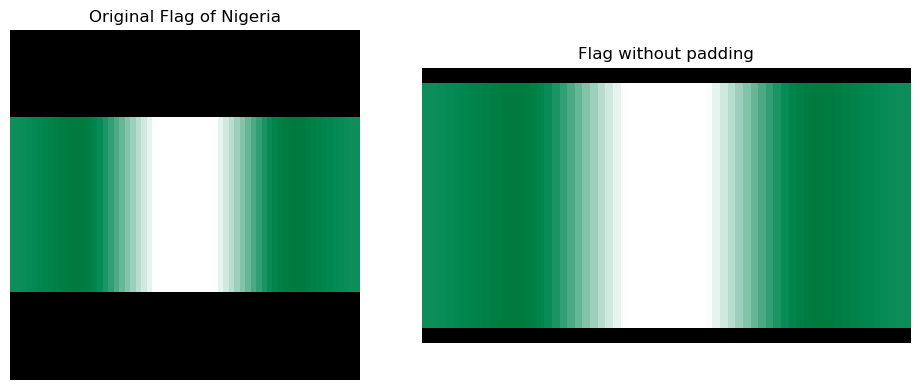


Analyzing flag of North Macedonia (mk):


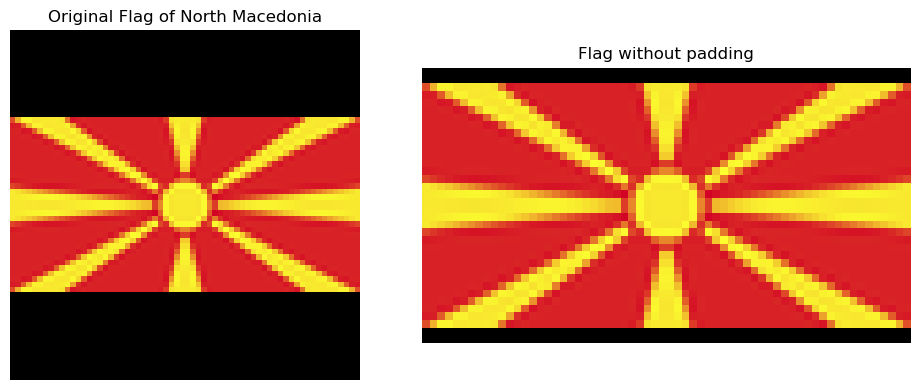


Analyzing flag of Nepal (np):


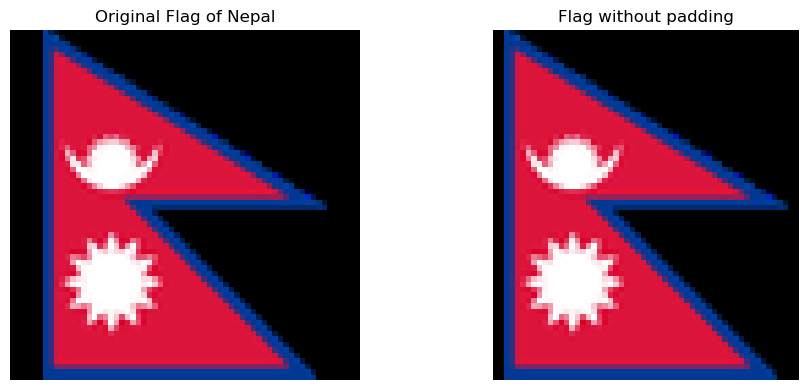


Analyzing flag of Holy See (Vatican City State) (va):


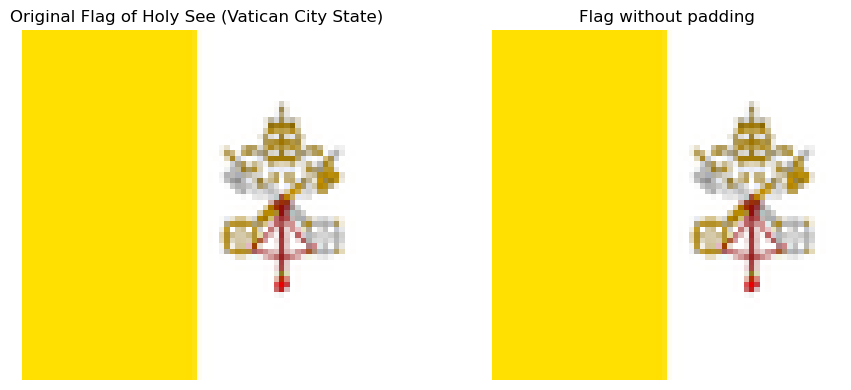


Analyzing flag of Uzbekistan (uz):


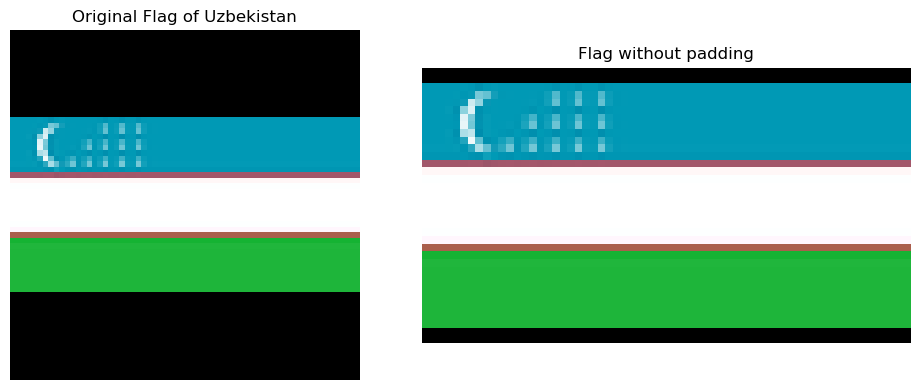


Analyzing flag of US Minor Outlying Islands (um):


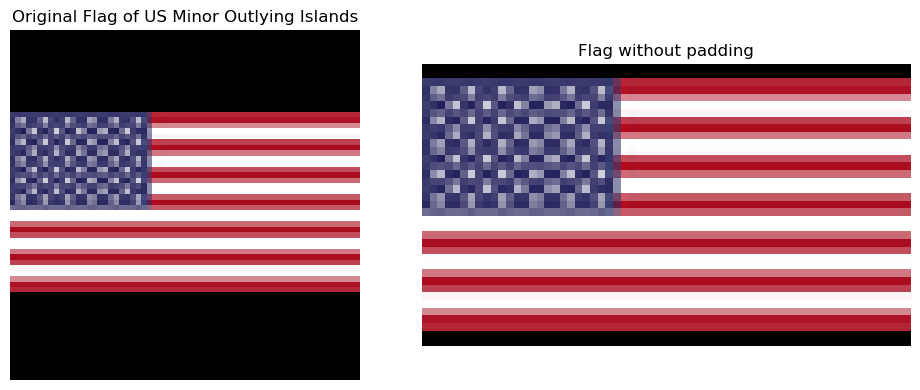


Analyzing flag of Tokelau (tk):


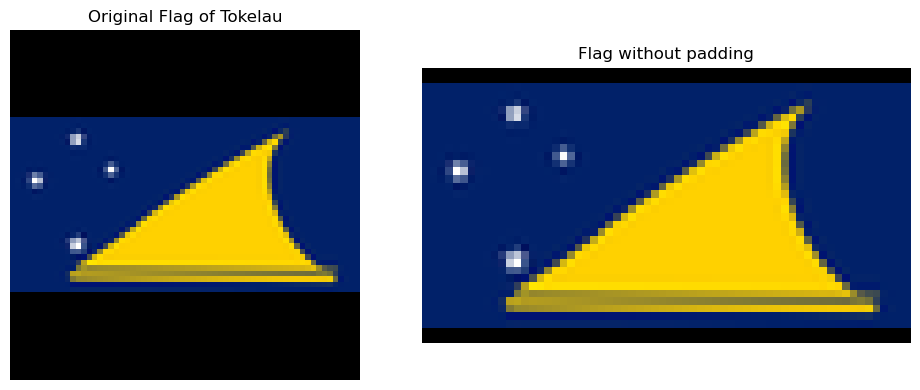


Analyzing flag of Saint Vincent and the Grenadines (vc):


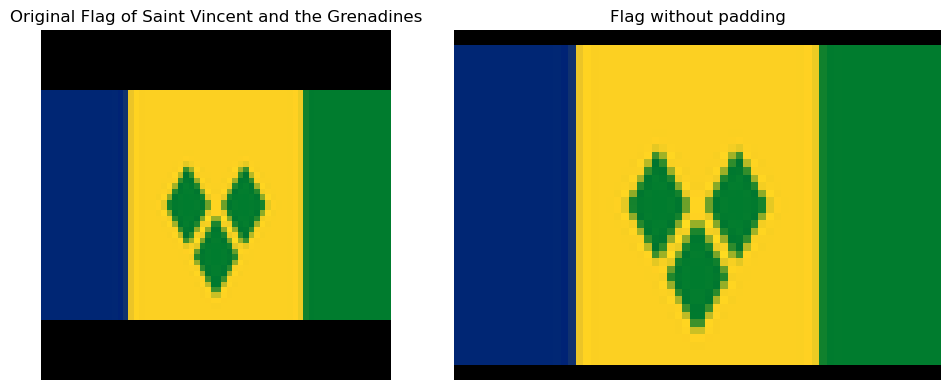


Analyzing flag of Zimbabwe (zw):


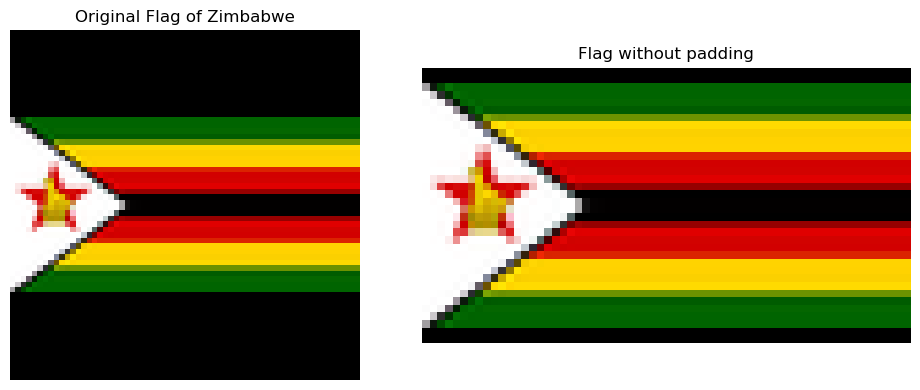


Analyzing flag of Nauru (nr):


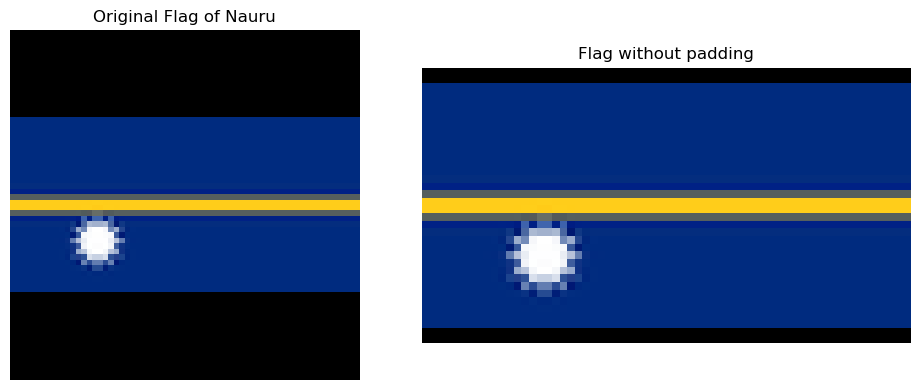


Analyzing flag of Niger (ne):


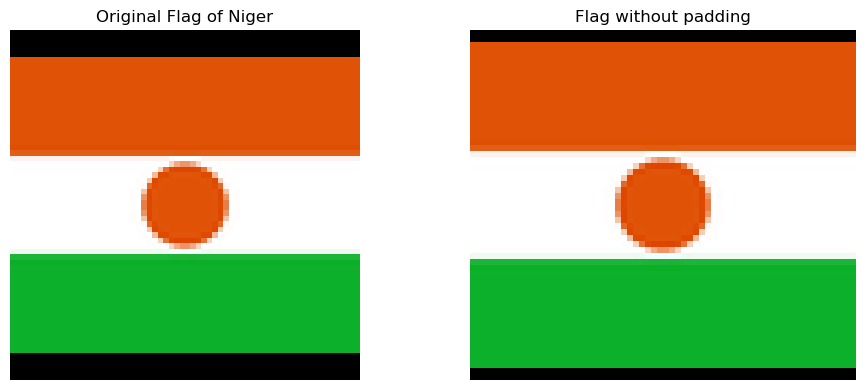


Analyzing flag of Cuba (cu):


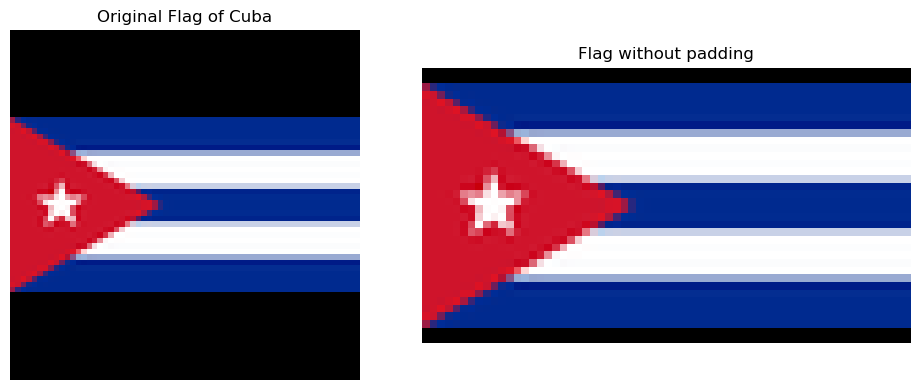


Analyzing flag of Caribbean Netherlands (bq):


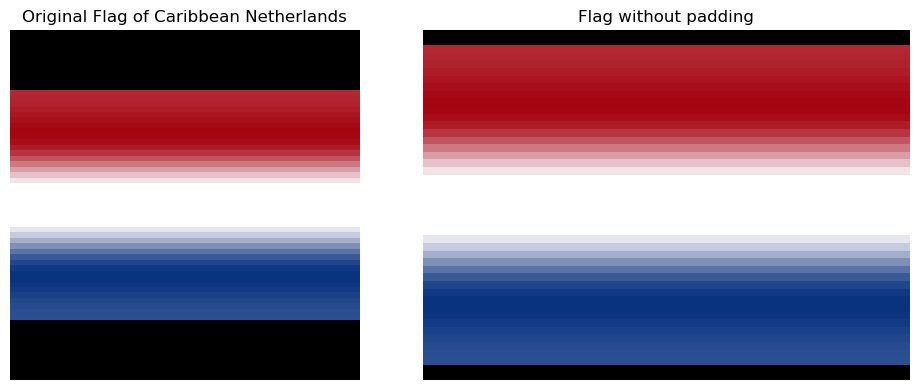


Analyzing flag of Burkina Faso (bf):


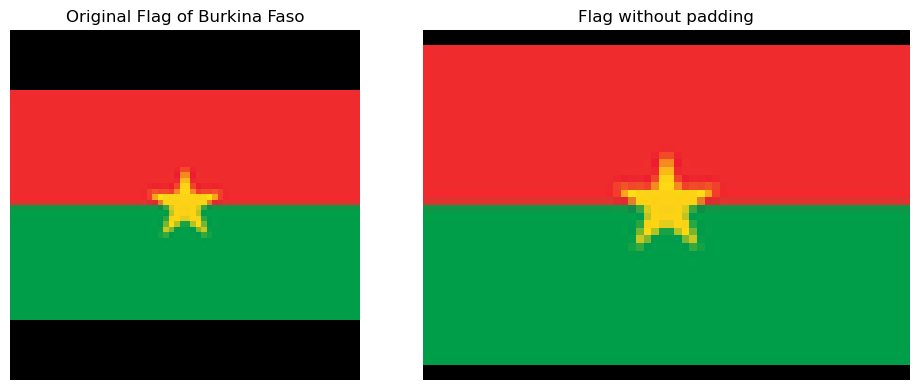


Analyzing flag of Bulgaria (bg):


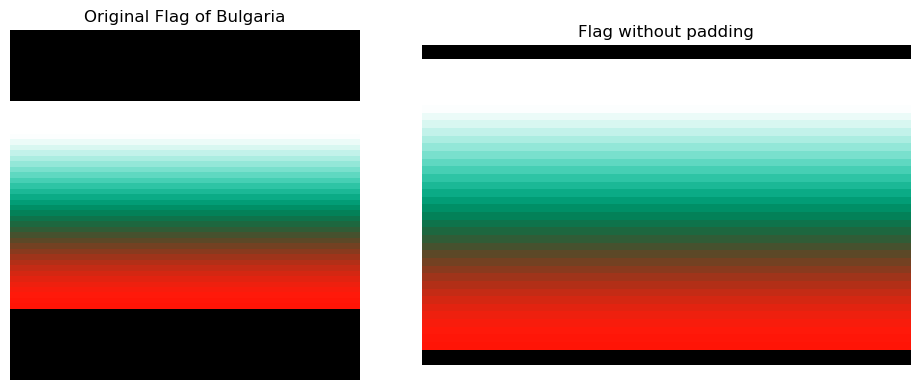


Analyzing flag of Cocos (Keeling) Islands (cc):


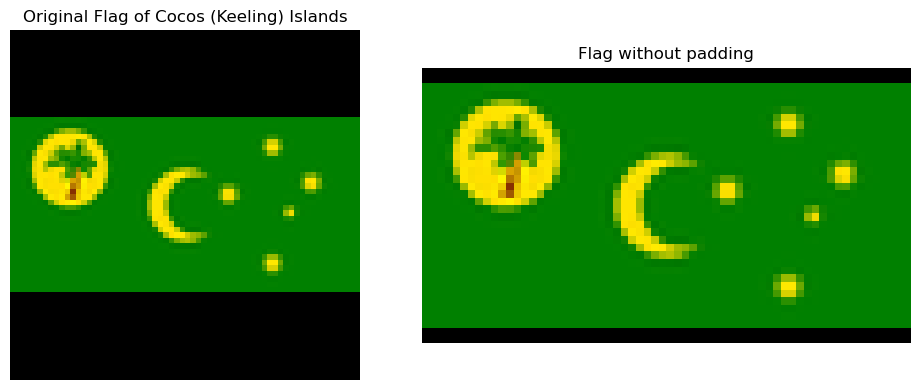


Analyzing flag of Wales (gb-wls):


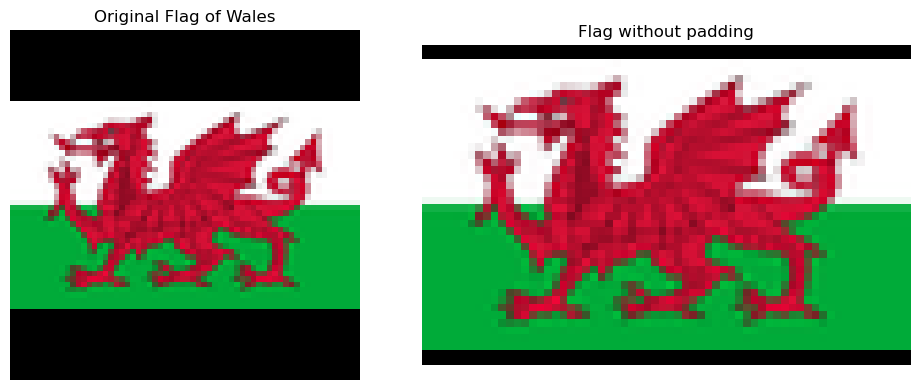


Analyzing flag of Marshall Islands (mh):


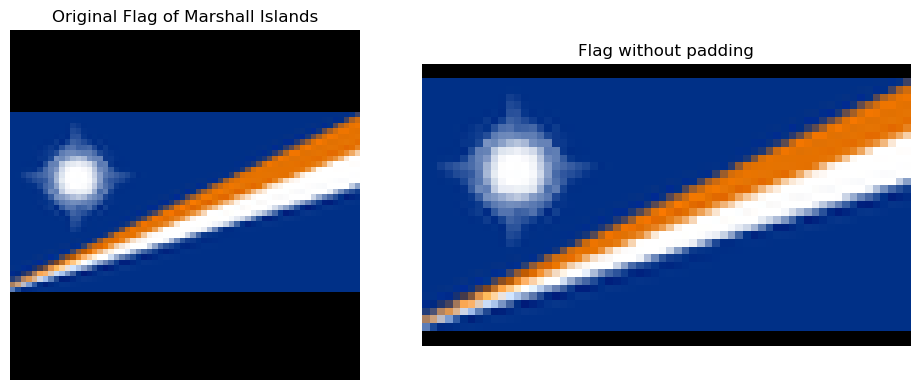


Analyzing flag of South Africa (za):


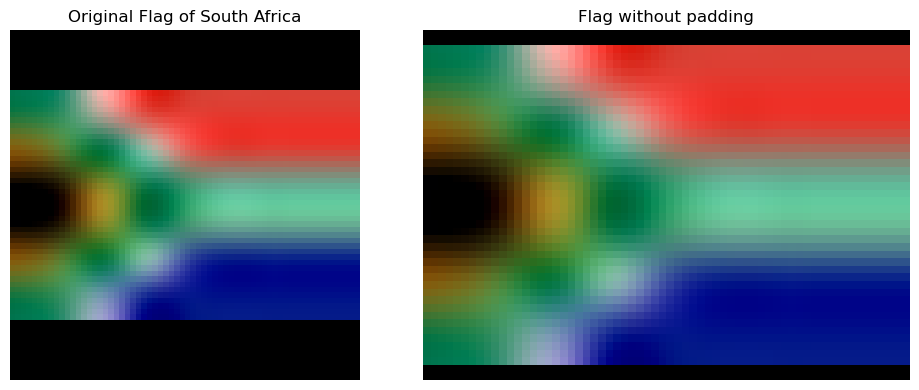


Analyzing flag of Uruguay (uy):


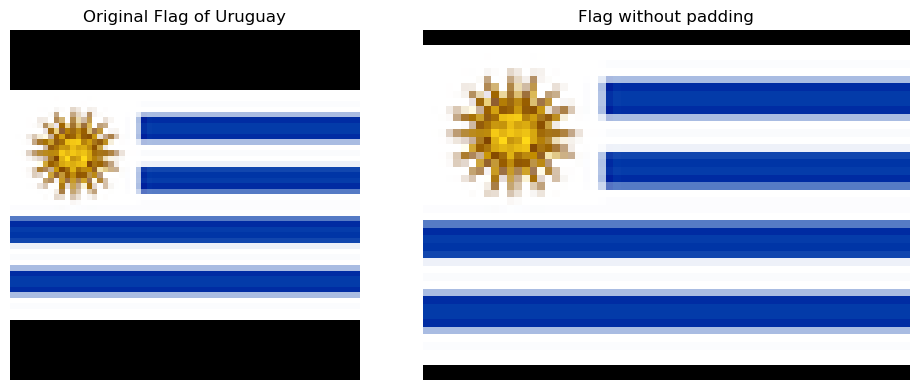


Analyzing flag of Wallis and Futuna Islands (wf):


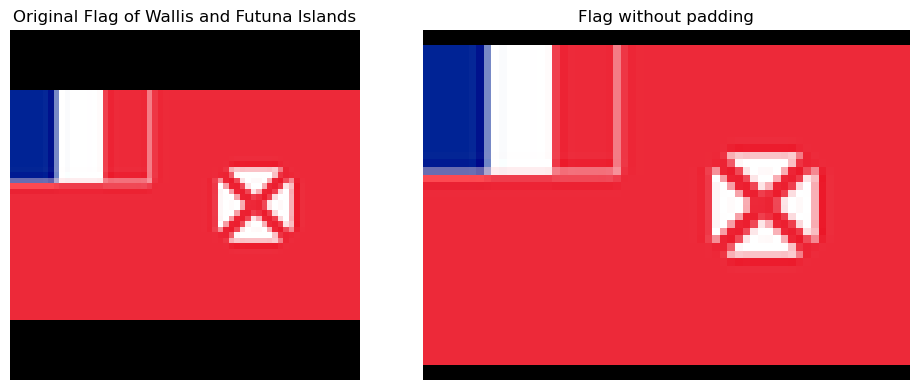


Analyzing flag of Vanuatu (vu):


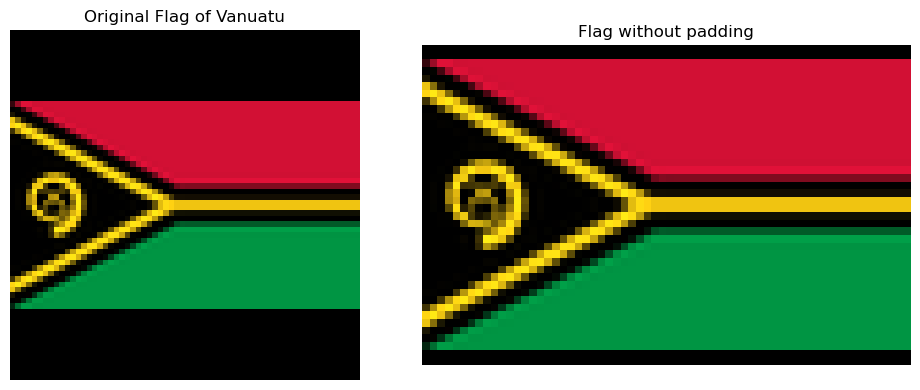


Analyzing flag of Tajikistan (tj):


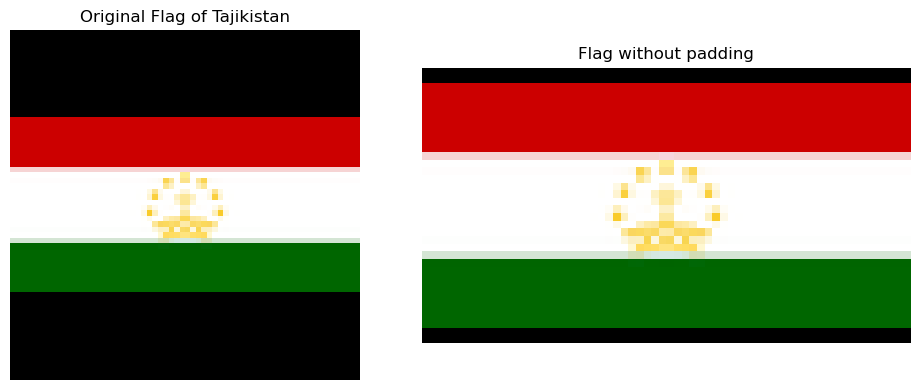

In [101]:
def visualize_flag(pixel_array, country_name):
    """Visualize the flag"""
    try:
        # Reshape to 64x64x3
        pixels = np.array(pixel_array).reshape(64, 64, 3)
        
        # Convert to 0-255 range if needed
        if pixels.max() <= 1.0:
            pixels = (pixels * 255).astype(np.uint8)
        
        # Create a figure with two subplots - original and cropped without padding
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
        
        # Plot original image
        ax1.imshow(pixels)
        ax1.set_title(f"Original Flag of {country_name}")
        ax1.axis('off')
        
        # Find non-black regions to identify the actual flag
        non_black = ~np.all(pixels < 20, axis=2)
        if np.any(non_black):
            # Find the bounding box of non-black pixels
            rows = np.any(non_black, axis=1)
            cols = np.any(non_black, axis=0)
            rmin, rmax = np.where(rows)[0][[0, -1]]
            cmin, cmax = np.where(cols)[0][[0, -1]]
            
            # Add a small margin
            rmin = max(0, rmin - 2)
            rmax = min(pixels.shape[0] - 1, rmax + 2)
            cmin = max(0, cmin - 2)
            cmax = min(pixels.shape[1] - 1, cmax + 2)
            
            # Show the cropped image
            ax2.imshow(pixels[rmin:rmax+1, cmin:cmax+1])
            ax2.set_title("Flag without padding")
        else:
            ax2.imshow(pixels)
            ax2.set_title("No non-black regions found")
        
        ax2.axis('off')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error visualizing flag for {country_name}: {e}")

def analyze_flag_colors(data):
    """Analyze the dominant colors in flag data"""
    results = []
    
    for idx, row in data.iterrows():
        country_code = row['Country']
        country_name = row['Country Name']
        
        # Convert string to actual array
        try:
            # Try to evaluate if it's a string representation
            if isinstance(row['Pixel Array'], str):
                pixel_array = eval(row['Pixel Array']) 
            else:
                pixel_array = row['Pixel Array']
        except Exception as e:
            print(f"Error parsing pixel array for {country_name}: {e}")
            continue
        
        # Make sure we have the right number of elements
        if len(pixel_array) != 12288:
            print(f"Warning: Pixel array for {country_name} has {len(pixel_array)} elements, expected 12288")
            continue
        
        try:
            print(f"\nAnalyzing flag of {country_name} ({country_code}):")
            
            # Reshape and find dominant colors while ignoring padding
            hex_colors, color_names, percentages = find_dominant_colors_ignore_padding(pixel_array)
            
            # Visualize flag
            visualize_flag(pixel_array, country_name)
            
            
            # Store results
            results.append({
                'Country Code': country_code,
                'Country Name': country_name,
                'Dominant Color Hex': hex_colors,
                'Dominant Color Names': color_names,
                'Color Percentages': percentages.tolist()
            })
        except Exception as e:
            print(f"Error analyzing {country_name}: {e}")
    
    return pd.DataFrame(results)

# Run the analysis
results_df = analyze_flag_colors(image_df)


In [102]:
results_df.head()

Country Code                             Country Name  \
0           tg                                     Togo   
1           me                               Montenegro   
2           la  Laos (Lao People's Democratic Republic)   
3           mr                               Mauritania   
4           ni                                Nicaragua   

                              Dominant Color Hex  \
0  [#00643c, #f0c800, #c80028, #006450, #28783c]   
1  [#b40000, #c86414, #c8b43c, #c88c28, #c8a028]   
2  [#c80014, #dc0014, #001464, #f00014, #002864]   
3  [#00a050, #c81414, #dc0014, #50643c, #f0c800]   
4  [#0064b4, #f0f0f0, #0050b4, #508cc8, #f0f0dc]   

                              Dominant Color Names  \
0     [darkgreen, gold, crimson, darkgreen, green]   
1         [darkred, brown, orange, orange, orange]   
2          [crimson, red, darkblue, red, darkblue]   
3                [green, crimson, red, gray, gold]   
4  [royalblue, white, royalblue, royalblue, white]   

                                   Color Percentages  
0  [32.519332519332515, 28.93772893772894, 15.995...  
1  [70.01953125, 8.837890625, 8.59375, 2.24609375...  
2  [9.598214285714286, 7.738095238095238, 6.25, 5...  
3  [49.73958333333333, 33.33333333333333, 4.76190...  
4  [57.89473684210527, 28.330592105263158, 5.2631...

In [103]:
color_names = [key for key in CSS3_NAMES_TO_HEX.keys()]

In [104]:
color_names

['black',
 'silver',
 'gray',
 'white',
 'maroon',
 'red',
 'purple',
 'green',
 'lime',
 'yellow',
 'blue',
 'orange',
 'gold',
 'brown',
 'darkred',
 'darkgreen',
 'darkblue',
 'crimson',
 'royalblue',
 'darkgray',
 'lightgray']

In [105]:
top_words[:15]

['us',
 'choru',
 'land',
 'let',
 'god',
 'countri',
 'peopl',
 'may',
 'one',
 'love',
 'nation',
 'live',
 'free',
 'freedom',
 'glori']

In [106]:
total_df

Sampling Rate                                           Waveform  \
Country                                                                     
tm               44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
ve               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
tz               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
lk               44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
mx               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
...                ...                                                ...   
ci               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
bz               44100  [0.0, -2.792508e-13, -3.008353e-13, -4.636519e...   
mu               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
us               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
tw               44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                               Pixel Array  \
Country                                                      
tm       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
ve       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
tz       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
lk       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
mx       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                    ...   
ci       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
bz       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
mu       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
us       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
tw       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                              Country Name  \
Country                                      
tm                            Turkmenistan   
ve       Venezuela, Bolivarian Republic of   
tz            Tanzania, United Republic of   
lk                               Sri Lanka   
mx                                  Mexico   
...                                    ...   
ci                           Côte d'Ivoire   
bz                                  Belize   
mu                               Mauritius   
us                           United States   
tw              Taiwan (Republic of China)   

                                                      Text  
Country                                                     
tm       readi give life nativ hearth spirit ancestor d...  
ve       choru glori brave nation shook yoke respect la...  
tz       god bless africa bless leader let wisdom uniti...  
lk       mother sri lanka choru sri lanka salut thee mo...  
mx       choru mexican cri war grasp steel bridl let ea...  
...                                                    ...  
ci       salut land hope countri hospit thi gallant leg...  
bz       land free carib sea manhood pledg thi liberti ...  
mu       glori thee motherland motherland mine sweet th...  
us       oh say see dawn earli light proudli hail twili...  
tw       san min chu aim shall found free land world pe...  

[218 rows x 5 columns]

In [107]:
total_f_df = pd.merge(total_df, results_df, on="Country Name", how="inner")

In [108]:
total_f_df

Sampling Rate                                           Waveform  \
0            44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
1            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3            44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
4            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..             ...                                                ...   
213          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
214          44100  [0.0, -2.792508e-13, -3.008353e-13, -4.636519e...   
215          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
216          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
217          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                           Pixel Array  \
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                                                 ...   
213  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
214  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
215  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
216  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
217  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                          Country Name  \
0                         Turkmenistan   
1    Venezuela, Bolivarian Republic of   
2         Tanzania, United Republic of   
3                            Sri Lanka   
4                               Mexico   
..                                 ...   
213                      Côte d'Ivoire   
214                             Belize   
215                          Mauritius   
216                      United States   
217         Taiwan (Republic of China)   

                                                  Text Country Code  \
0    readi give life nativ hearth spirit ancestor d...           tm   
1    choru glori brave nation shook yoke respect la...           ve   
2    god bless africa bless leader let wisdom uniti...           tz   
3    mother sri lanka choru sri lanka salut thee mo...           lk   
4    choru mexican cri war grasp steel bridl let ea...           mx   
..                                                 ...          ...   
213  salut land hope countri hospit thi gallant leg...           ci   
214  land free carib sea manhood pledg thi liberti ...           bz   
215  glori thee motherland motherland mine sweet th...           mu   
216  oh say see dawn earli light proudli hail twili...           us   
217  san min chu aim shall found free land world pe...           tw   

                                Dominant Color Hex  \
0    [#00783c, #007828, #c83c28, #3c6428, #c81428]   
1    [#f0c800, #c81428, #001478, #002864, #b41428]   
2    [#14b428, #00a0dc, #f0c814, #f0c800, #00a0c8]   
3    [#f0b428, #8c1428, #00503c, #780028, #dc6400]   
4    [#00643c, #c80014, #f0f0f0, #00503c, #a0c8b4]   
..                                             ...   
213  [#dc6400, #f07800, #007828, #dc5000, #f0f0f0]   
214  [#14148c, #c80014, #dc0000, #a00028, #00148c]   
215  [#f02828, #f0c800, #141464, #008c50, #008c64]   
216  [#f0f0f0, #a00014, #b43c50, #c8788c, #c86464]   
217  [#f00000, #00008c, #000078, #dc0000, #f0f0f0]   

                                 Dominant Color Names  \
0           [green, green, brown, darkgreen, crimson]   
1          [gold, crimson, darkblue, darkblue, brown]   
2           [green, royalblue, gold, gold, royalblue]   
3          [orange, brown, darkgreen, maroon, orange]   
4    [darkgreen, crimson, white, darkgreen, darkgray]   
..                                                ...   
213             [orange, 

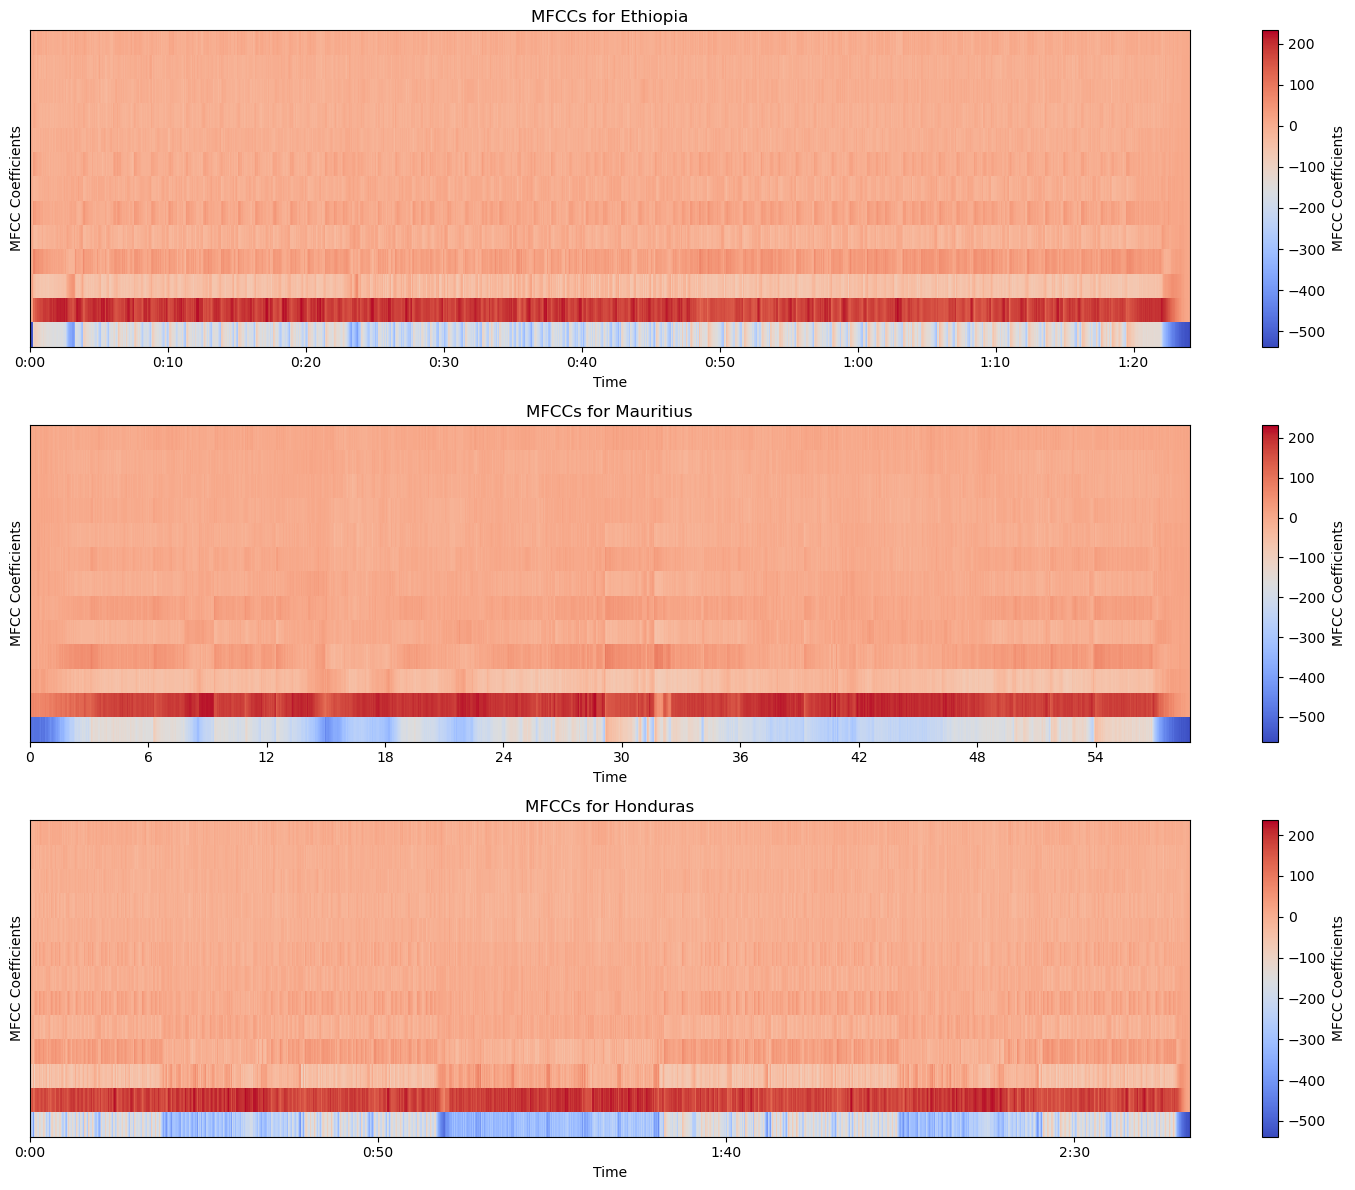

In [109]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_sample_mfccs(df, sample_size=3, sr=44100, n_mfcc=13):
    """
    Plots MFCCs for a sample of national anthems.

    Args:
    - df: DataFrame containing a "Waveform" column with raw audio data.
    - sample_size: Number of samples to plot.
    - sr: Sampling rate of the audio (default: 44100 Hz).
    - n_mfcc: Number of MFCC coefficients to compute (default: 13).
    """
    sampled_rows = df.sample(n=sample_size, random_state=42)  # Randomly select samples

    plt.figure(figsize=(15, sample_size * 4))

    for i, (_, row) in enumerate(sampled_rows.iterrows()):
        waveform = np.array(row["Waveform"])  # Convert waveform to NumPy array
        country = row["Country Name"]  # Get country name

        # Compute MFCCs
        mfccs = librosa.feature.mfcc(y=waveform, sr=sr, n_mfcc=n_mfcc)

        # Plot MFCCs
        plt.subplot(sample_size, 1, i + 1)
        librosa.display.specshow(mfccs, sr=sr, x_axis="time", cmap="coolwarm")
        plt.colorbar(label="MFCC Coefficients")
        plt.title(f"MFCCs for {country}")
        plt.xlabel("Time")
        plt.ylabel("MFCC Coefficients")

    plt.tight_layout()
    plt.show()

plot_sample_mfccs(total_f_df, sample_size=3)


## Mapping countries to continents

In [110]:
import pycountry_convert as pc

def get_continent(country_name):
    """
    Converts a country name to its corresponding continent.
    Returns 'Unknown' if the conversion fails.
    """
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_mapping = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania"
        }
        return continent_mapping.get(continent_code, "Unknown")
    except:
        return "Unknown"

total_f_df["Continent"] = total_f_df["Country Name"].apply(get_continent)


In [111]:
np.unique(total_f_df['Continent'])

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America', 'Unknown'], dtype=object)

In [112]:
total_f_df

Sampling Rate                                           Waveform  \
0            44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
1            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3            44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
4            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..             ...                                                ...   
213          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
214          44100  [0.0, -2.792508e-13, -3.008353e-13, -4.636519e...   
215          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
216          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
217          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                           Pixel Array  \
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                                                 ...   
213  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
214  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
215  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
216  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
217  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                          Country Name  \
0                         Turkmenistan   
1    Venezuela, Bolivarian Republic of   
2         Tanzania, United Republic of   
3                            Sri Lanka   
4                               Mexico   
..                                 ...   
213                      Côte d'Ivoire   
214                             Belize   
215                          Mauritius   
216                      United States   
217         Taiwan (Republic of China)   

                                                  Text Country Code  \
0    readi give life nativ hearth spirit ancestor d...           tm   
1    choru glori brave nation shook yoke respect la...           ve   
2    god bless africa bless leader let wisdom uniti...           tz   
3    mother sri lanka choru sri lanka salut thee mo...           lk   
4    choru mexican cri war grasp steel bridl let ea...           mx   
..                                                 ...          ...   
213  salut land hope countri hospit thi gallant leg...           ci   
214  land free carib sea manhood pledg thi liberti ...           bz   
215  glori thee motherland motherland mine sweet th...           mu   
216  oh say see dawn earli light proudli hail twili...           us   
217  san min chu aim shall found free land world pe...           tw   

                                Dominant Color Hex  \
0    [#00783c, #007828, #c83c28, #3c6428, #c81428]   
1    [#f0c800, #c81428, #001478, #002864, #b41428]   
2    [#14b428, #00a0dc, #f0c814, #f0c800, #00a0c8]   
3    [#f0b428, #8c1428, #00503c, #780028, #dc6400]   
4    [#00643c, #c80014, #f0f0f0, #00503c, #a0c8b4]   
..                                             ...   
213  [#dc6400, #f07800, #007828, #dc5000, #f0f0f0]   
214  [#14148c, #c80014, #dc0000, #a00028, #00148c]   
215  [#f02828, #f0c800, #141464, #008c50, #008c64]   
216  [#f0f0f0, #a00014, #b43c50, #c8788c, #c86464]   
217  [#f00000, #00008c, #000078, #dc0000, #f0f0f0]   

                                 Dominant Color Names  \
0           [green, green, brown, darkgreen, crimson]   
1          [gold, crimson, darkblue, darkblue, brown]   
2           [green, royalblue, gold, gold, royalblue]   
3          [orange, brown, darkgreen, maroon, orange]   
4    [darkgreen, crimson, white, darkgreen, darkgray]   
..                                                ...   
213             [orange, 

In [113]:
# Manually update continent field for these countries
corrections = [
    "Congo, the Democratic Republic of the",
    "Timor-Leste",
    "Holy See (Vatican City State)",
    "Pitcairn",
    "Western Sahara",
    "Laos (Lao People's Democratic Republic)",
    "China (People's Republic of China)",
    "Taiwan (Republic of China)"
]
continents = ["Africa", "Asia", "Europe", "Oceania", "Africa", "Asia", "Asia", "Asia"]

i = 0
for idx, row in total_f_df.iterrows():
    if row["Country Name"] in corrections:
        # Create a mask to select the matching rows
        mask = (total_f_df["Country Name"] == row["Country Name"])
        # Use .loc to assign to the 'Continent' column
        total_f_df.loc[mask, "Continent"] = continents[i]
        i += 1


In [114]:
total_f_df

Sampling Rate                                           Waveform  \
0            44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
1            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3            44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
4            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
..             ...                                                ...   
213          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
214          44100  [0.0, -2.792508e-13, -3.008353e-13, -4.636519e...   
215          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
216          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
217          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                           Pixel Array  \
0    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                                                 ...   
213  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
214  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
215  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
216  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
217  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                          Country Name  \
0                         Turkmenistan   
1    Venezuela, Bolivarian Republic of   
2         Tanzania, United Republic of   
3                            Sri Lanka   
4                               Mexico   
..                                 ...   
213                      Côte d'Ivoire   
214                             Belize   
215                          Mauritius   
216                      United States   
217         Taiwan (Republic of China)   

                                                  Text Country Code  \
0    readi give life nativ hearth spirit ancestor d...           tm   
1    choru glori brave nation shook yoke respect la...           ve   
2    god bless africa bless leader let wisdom uniti...           tz   
3    mother sri lanka choru sri lanka salut thee mo...           lk   
4    choru mexican cri war grasp steel bridl let ea...           mx   
..                                                 ...          ...   
213  salut land hope countri hospit thi gallant leg...           ci   
214  land free carib sea manhood pledg thi liberti ...           bz   
215  glori thee motherland motherland mine sweet th...           mu   
216  oh say see dawn earli light proudli hail twili...           us   
217  san min chu aim shall found free land world pe...           tw   

                                Dominant Color Hex  \
0    [#00783c, #007828, #c83c28, #3c6428, #c81428]   
1    [#f0c800, #c81428, #001478, #002864, #b41428]   
2    [#14b428, #00a0dc, #f0c814, #f0c800, #00a0c8]   
3    [#f0b428, #8c1428, #00503c, #780028, #dc6400]   
4    [#00643c, #c80014, #f0f0f0, #00503c, #a0c8b4]   
..                                             ...   
213  [#dc6400, #f07800, #007828, #dc5000, #f0f0f0]   
214  [#14148c, #c80014, #dc0000, #a00028, #00148c]   
215  [#f02828, #f0c800, #141464, #008c50, #008c64]   
216  [#f0f0f0, #a00014, #b43c50, #c8788c, #c86464]   
217  [#f00000, #00008c, #000078, #dc0000, #f0f0f0]   

                                 Dominant Color Names  \
0           [green, green, brown, darkgreen, crimson]   
1          [gold, crimson, darkblue, darkblue, brown]   
2           [green, royalblue, gold, gold, royalblue]   
3          [orange, brown, darkgreen, maroon, orange]   
4    [darkgreen, crimson, white, darkgreen, darkgray]   
..                                                ...   
213             [orange, 

In [115]:
total_f_df[total_f_df["Continent"] == "Unknown"]

Empty DataFrame
Columns: [Sampling Rate, Waveform, Pixel Array, Country Name, Text, Country Code, Dominant Color Hex, Dominant Color Names, Color Percentages, Continent]
Index: []

In [116]:
def obtain_overall_color_counts(total_f_df, threshold):
    total_color_counts = Counter()
    for idx, row in total_f_df.iterrows():
        color_names = row["Dominant Color Names"]
        color_percents = row["Color Percentages"]

        for name, pct in zip(color_names, color_percents):
            if pct >= threshold:
                total_color_counts[name] += 1

    return dict(total_color_counts)

In [117]:
total_color_counts = obtain_overall_color_counts(total_f_df, 20)


In [118]:
total_color_counts
tcc = pd.DataFrame.from_dict(total_color_counts, orient="index", columns=["Count"])
tcc.sort_values("Count", ascending=False, inplace=True)

In [119]:
tcc

Count
white         67
crimson       63
darkblue      41
green         39
royalblue     25
gold          23
red           18
darkgreen     16
brown         12
darkred        5
orange         3

In [120]:
from collections import Counter

def obtain_color_comparison(total_df, word, total_color_counts, threshold=20, min_count=5):
    """
    Compares the normalized frequency of colors in anthems containing a word vs. those that don't.

    Args:
    - total_df: DataFrame with anthem text and dominant colors.
    - word: Word to search for in the anthems.
    - total_color_counts: Dictionary of overall color counts across all anthems.
    - threshold: Minimum percentage (default 20%) for a color to be considered in a given anthem.
    - min_count: Minimum absolute occurrences required for a color to be included in the result.

    Returns:
    - comparison_df: DataFrame comparing normalized color frequencies in both groups.
    """
    
    with_word_df = total_df[total_df["Text"].str.contains(word, case=False, na=False)]
    without_word_df = total_df[~total_df["Text"].str.contains(word, case=False, na=False)]

    num_with_word = len(with_word_df)
    num_without_word = len(without_word_df)
    
    print(f"{with_word_df.shape[0]} countries contain '{word}' in their anthem.")
    print(f"{without_word_df.shape[0]} countries do NOT contain '{word}' in their anthem.")

    def compute_color_frequencies(df, num_countries):
        color_counts = Counter()
        for _, row in df.iterrows():
            color_names = row["Dominant Color Names"]
            color_percents = row["Color Percentages"]
            for name, pct in zip(color_names, color_percents):
                if pct >= threshold:
                    color_counts[name] += 1

        normalized_counts = {}
        for name, count in color_counts.items():
            if count >= min_count:  # Only keep colors appearing in at least `min_count` anthems
                normalized_counts[name] = count / num_countries

        return normalized_counts

    with_word_colors = compute_color_frequencies(with_word_df, num_with_word)
    without_word_colors = compute_color_frequencies(without_word_df, num_without_word)

    with_word_df = pd.DataFrame.from_dict(with_word_colors, orient="index", columns=[f"With '{word}'"])
    without_word_df = pd.DataFrame.from_dict(without_word_colors, orient="index", columns=[f"Without '{word}'"])

    comparison_df = pd.concat([with_word_df, without_word_df], axis=1).fillna(0)
    comparison_df["Ratio"] = comparison_df[f"With '{word}'"] / comparison_df[f"Without '{word}'"]
    comparison_df.replace([float('inf'), -float('inf')], 1000, inplace=True) 
    comparison_df.fillna(0, inplace=True)  
    comparison_df.sort_values(by=f"Ratio", ascending=False, inplace=True)

    return comparison_df




In [121]:
word_to_check = "freedom"
freq_freedom = obtain_color_comparison(total_f_df, word_to_check, total_color_counts, threshold=20, min_count=5)


59 countries contain 'freedom' in their anthem.
159 countries do NOT contain 'freedom' in their anthem.


In [122]:
freq_freedom

With 'freedom'  Without 'freedom'     Ratio
gold             0.169492           0.081761  2.073012
red              0.101695           0.075472  1.347458
darkgreen        0.084746           0.069182  1.224961
crimson          0.305085           0.283019  1.077966
green            0.186441           0.176101  1.058717
darkblue         0.169492           0.194969  0.869328
royalblue        0.101695           0.119497  0.851026
white            0.169492           0.358491  0.472792
darkred          0.000000           0.031447  0.000000
brown            0.000000           0.050314  0.000000

### Gold, red, forestgreen and darkblue are likely to be present in flags when the anthem contains "freedom"

In [123]:
freq_god = obtain_color_comparison(total_f_df, "god", total_color_counts)

88 countries contain 'god' in their anthem.
130 countries do NOT contain 'god' in their anthem.


In [124]:
freq_god

With 'god'  Without 'god'     Ratio
brown        0.079545       0.038462  2.068182
darkgreen    0.102273       0.053846  1.899351
red          0.090909       0.076923  1.181818
darkblue     0.204545       0.176923  1.156126
gold         0.102273       0.107692  0.949675
royalblue    0.102273       0.123077  0.830966
green        0.159091       0.192308  0.827273
crimson      0.238636       0.323077  0.738636
white        0.227273       0.361538  0.628627

### Royalblue, brown and navy are likely to be present in flags when the anthem contains "god"

In [125]:
top_words[:15]

['us',
 'choru',
 'land',
 'let',
 'god',
 'countri',
 'peopl',
 'may',
 'one',
 'love',
 'nation',
 'live',
 'free',
 'freedom',
 'glori']

In [126]:
freq_us = obtain_color_comparison(total_f_df, "us", total_color_counts)

144 countries contain 'us' in their anthem.
74 countries do NOT contain 'us' in their anthem.


In [127]:
freq_us

With 'us'  Without 'us'        Ratio
darkgreen   0.083333      0.000000  1000.000000
brown       0.055556      0.000000  1000.000000
green       0.194444      0.148649     1.308081
darkblue    0.194444      0.175676     1.106838
crimson     0.298611      0.270270     1.104861
red         0.083333      0.081081     1.027778
gold        0.104167      0.108108     0.963542
white       0.284722      0.351351     0.810363
royalblue   0.083333      0.175676     0.474359

## Brown, darkgreen and darkblue only occur in the flag when "us" in used in the anthem

In [128]:
total_f_df[total_f_df["Continent"] == "Oceania"]

Sampling Rate                                           Waveform  \
5            44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
14           44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
28           44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
30           44100  [-0.0043729814, -0.005959642, -0.005562369, -0...   
33           44100  [0.0, 1.7954265e-13, 3.0660163e-14, -8.875779e...   
37           44100  [0.0, -3.9073833e-14, 3.6427038e-13, 1.4831257...   
39           44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
42           44100  [0.0, -6.714163e-14, -5.4628e-14, -2.7423796e-...   
44           44100  [5.5203913e-05, -8.2725106e-05, -0.00018651481...   
59           44100  [0.0, -4.5505483e-14, -2.8363303e-13, -6.49094...   
66           44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
85           44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
88           44100  [0.0, -8.3998184e-14, -1.07584934e-13, -1.2994...   
98           44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
116          44100  [0.0, -1.0129066e-13, -1.00448885e-13, -8.0135...   
118          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
163          44100  [0.0, -6.138901e-14, -1.1700732e-13, -2.613681...   
168          44100  [0.0, -1.3047311e-12, 1.4425238e-12, 3.765167e...   
194          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
195          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
201          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
205          44100  [0.0, -2.7787331e-11, -2.4068317e-11, -2.60594...   

                                           Pixel Array  \
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
14   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
28   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
30   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
33   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
37   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
39   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
42   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
44   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
59   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
66   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
85   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
88   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
98   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
116  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
118  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
163  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
168  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
194  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
195  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
201  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
205  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                        Country Name  \
5                      New Caledonia   
14                              Niue   
28                             Tonga   
30                           Tokelau   
33                             Nauru   
37                  Marshall Islands   
39                           Vanuatu   
42                             Samoa   
44                    Norfolk Island   
59                  French Polynesia   
66                  Papua New Guinea   
85                             Palau   
88   Micronesia, Federated States of   
98                          Kiribati   
116                  Solomon Islands   
118                         Pitcairn   
163                   American Samoa   
168         Northern Mariana Islands   
194                     Cook Islands   
195                        Australia   
201                      New Zealand   
205                           Tuvalu   

                                                  Text Country Code  

In [129]:
total_f_df.head()

Sampling Rate                                           Waveform  \
0          44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
1          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
4          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                         Pixel Array  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                        Country Name  \
0                       Turkmenistan   
1  Venezuela, Bolivarian Republic of   
2       Tanzania, United Republic of   
3                          Sri Lanka   
4                             Mexico   

                                                Text Country Code  \
0  readi give life nativ hearth spirit ancestor d...           tm   
1  choru glori brave nation shook yoke respect la...           ve   
2  god bless africa bless leader let wisdom uniti...           tz   
3  mother sri lanka choru sri lanka salut thee mo...           lk   
4  choru mexican cri war grasp steel bridl let ea...           mx   

                              Dominant Color Hex  \
0  [#00783c, #007828, #c83c28, #3c6428, #c81428]   
1  [#f0c800, #c81428, #001478, #002864, #b41428]   
2  [#14b428, #00a0dc, #f0c814, #f0c800, #00a0c8]   
3  [#f0b428, #8c1428, #00503c, #780028, #dc6400]   
4  [#00643c, #c80014, #f0f0f0, #00503c, #a0c8b4]   

                               Dominant Color Names  \
0         [green, green, brown, darkgreen, crimson]   
1        [gold, crimson, darkblue, darkblue, brown]   
2         [green, royalblue, gold, gold, royalblue]   
3        [orange, brown, darkgreen, maroon, orange]   
4  [darkgreen, crimson, white, darkgreen, darkgray]   

                                   Color Percentages      Continent  
0  [76.00446428571429, 1.711309523809524, 1.22767...           Asia  
1  [30.952380952380953, 30.952380952380953, 26.56...  South America  
2  [37.67967145790554, 37.16632443531827, 6.98151...         Africa  
3  [23.53515625, 15.576171875, 8.69140625, 7.6171...           Asia  
4  [31.25, 31.25, 24.04513888888889, 1.5625, 1.5625]  North America

In [130]:
import pandas as pd
from collections import defaultdict, Counter

def colors_by_continent_with_normalization(df, threshold=10):
    """
    Determine which colors are most prevalent in each continent (above a given threshold),
    returning both absolute and normalized counts.

    Args:
    - df: DataFrame containing columns:
        "Continent": continent name (e.g., "Asia", "Africa")
        "Dominant Color Names": list of color names
        "Color Percentages": list of floats representing each color's percentage in the flag
    - threshold: Minimum percentage (default=20) for a color to be counted as "prevalent"

    Returns:
    - final_df: A multi-index DataFrame where:
        - Rows are continents
        - The first level of columns is ["Absolute Count", "Normalized Count"]
        - The second level of columns is the color names
    """

    continent_color_counts = defaultdict(Counter)
    continent_country_counts = Counter()

    for _, row in df.iterrows():
        continent = row.get("Continent", None)
        color_names = row.get("Dominant Color Names", [])
        color_percents = row.get("Color Percentages", [])

        if not continent or not color_names or not color_percents:
            continue

        continent_country_counts[continent] += 1

        for name, pct in zip(color_names, color_percents):
            if pct >= threshold:
                continent_color_counts[continent][name] += 1

    absolute_df = pd.DataFrame(continent_color_counts).fillna(0).T
    absolute_df = absolute_df.astype(int)

    normalized_df = absolute_df.copy()
    for continent in normalized_df.index:
        num_countries = continent_country_counts[continent]
        if num_countries > 0:
            normalized_df.loc[continent] = round(normalized_df.loc[continent] / num_countries, 3)
        else:
            normalized_df.loc[continent] = 0.0


    return absolute_df, normalized_df



In [131]:
absolute_df, normalized_df = colors_by_continent_with_normalization(total_f_df, threshold=10)
absolute_df


green  orange  brown  royalblue  crimson  red  white  darkblue  \
Asia              10       2      3          4       22   12     23         7   
South America      3       0      2          1        5    1      6         4   
Africa            27       1      5         12       25    5     18         7   
North America      3       0      2          5       12    4     13        16   
Oceania            2       0      0          4        4    2      5        10   
Europe             3       2      7          7       20    7     25        12   

               gold  darkgreen  darkred  yellow  darkgray  
Asia              3          5        0       0         0  
South America     7          1        0       0         0  
Africa           16          8        3       0         0  
North America     2          3        1       0         0  
Oceania           2          1        1       1         0  
Europe            8          1        3       2         1

In [132]:
normalized_df

green  orange  brown  royalblue  crimson    red  white  \
Asia           0.208   0.042  0.062      0.083    0.458  0.250  0.479   
South America  0.250   0.000  0.167      0.083    0.417  0.083  0.500   
Africa         0.491   0.018  0.091      0.218    0.455  0.091  0.327   
North America  0.086   0.000  0.057      0.143    0.343  0.114  0.371   
Oceania        0.091   0.000  0.000      0.182    0.182  0.091  0.227   
Europe         0.065   0.043  0.152      0.152    0.435  0.152  0.543   

               darkblue   gold  darkgreen  darkred  yellow  darkgray  
Asia              0.146  0.062      0.104    0.000   0.000     0.000  
South America     0.333  0.583      0.083    0.000   0.000     0.000  
Africa            0.127  0.291      0.145    0.055   0.000     0.000  
North America     0.457  0.057      0.086    0.029   0.000     0.000  
Oceania           0.455  0.091      0.045    0.045   0.045     0.000  
Europe            0.261  0.174      0.022    0.065   0.043     0.022

In [133]:
def return_countries_color(total_f_df, color):
    countries = []
    threshold = 10  

    for idx, row in total_f_df.iterrows():
        color_names = row["Dominant Color Names"]
        color_percs = row["Color Percentages"]

        for c_name, c_pct in zip(color_names, color_percs):
            if c_name == color and c_pct >= threshold:
                countries.append(row["Country Name"])
                break  
    return countries


In [134]:
orange_countries = return_countries_color(total_f_df, "orange")
darkgreen_countries = return_countries_color(total_f_df, "darkgreen")

In [135]:
orange_countries


['Sri Lanka', 'Ireland', 'Comoros', 'India', 'Lithuania']

In [136]:
darkgreen_countries

['Mexico',
 'Mozambique',
 'Zimbabwe',
 'Tajikistan',
 'Bangladesh',
 'Gambia',
 'Ghana',
 'Portugal',
 'Jamaica',
 'Kenya',
 'Solomon Islands',
 'Saudi Arabia',
 'Dominica',
 'Algeria',
 'Rwanda',
 'Kuwait',
 'Pakistan',
 'Togo',
 'Bolivia, Plurinational State of']

In [137]:
absolute_df

green  orange  brown  royalblue  crimson  red  white  darkblue  \
Asia              10       2      3          4       22   12     23         7   
South America      3       0      2          1        5    1      6         4   
Africa            27       1      5         12       25    5     18         7   
North America      3       0      2          5       12    4     13        16   
Oceania            2       0      0          4        4    2      5        10   
Europe             3       2      7          7       20    7     25        12   

               gold  darkgreen  darkred  yellow  darkgray  
Asia              3          5        0       0         0  
South America     7          1        0       0         0  
Africa           16          8        3       0         0  
North America     2          3        1       0         0  
Oceania           2          1        1       1         0  
Europe            8          1        3       2         1

In [138]:
normalized_df


green  orange  brown  royalblue  crimson    red  white  \
Asia           0.208   0.042  0.062      0.083    0.458  0.250  0.479   
South America  0.250   0.000  0.167      0.083    0.417  0.083  0.500   
Africa         0.491   0.018  0.091      0.218    0.455  0.091  0.327   
North America  0.086   0.000  0.057      0.143    0.343  0.114  0.371   
Oceania        0.091   0.000  0.000      0.182    0.182  0.091  0.227   
Europe         0.065   0.043  0.152      0.152    0.435  0.152  0.543   

               darkblue   gold  darkgreen  darkred  yellow  darkgray  
Asia              0.146  0.062      0.104    0.000   0.000     0.000  
South America     0.333  0.583      0.083    0.000   0.000     0.000  
Africa            0.127  0.291      0.145    0.055   0.000     0.000  
North America     0.457  0.057      0.086    0.029   0.000     0.000  
Oceania           0.455  0.091      0.045    0.045   0.045     0.000  
Europe            0.261  0.174      0.022    0.065   0.043     0.022

## Conclusions:
### 1. Green and darkgreen are most common in Africa
### 2. Orange represents more than 10% of the flag only in 5 countries- Sri Lanka, Ireland, Comoros, Lithuania and India
### 3. Crimson is similar across continents, only in Oceania it is not very common
### 4. White is very common across continents, except in Africa and Oceania
### 5. Red flags are most common in Asia
### 6. Brown is most common in South America and Europe
### 7. Darkblue is most common in South, North America and Oceania
### 9. The island countries of Oceania are very likely to have blue flags

### Doing some audio feature analysis

In [139]:
def compute_average_energy(waveform):
    """
    Compute the average energy (power) of a waveform.
    This is sum of squares / number of samples.
    """
    samples = np.array(waveform, dtype=float)
    avg_energy = np.mean(samples**2)
    return avg_energy

average_energies = []
for idx, row in total_f_df.iterrows():
    waveform = row["Waveform"]
    if waveform is not None:
        avg_energy = compute_average_energy(waveform)
        average_energies.append(avg_energy)
    else:
        average_energies.append(None)

total_f_df["Average Energy"] = average_energies




In [140]:
total_f_df.head(5)

Sampling Rate                                           Waveform  \
0          44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
1          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
4          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                         Pixel Array  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                        Country Name  \
0                       Turkmenistan   
1  Venezuela, Bolivarian Republic of   
2       Tanzania, United Republic of   
3                          Sri Lanka   
4                             Mexico   

                                                Text Country Code  \
0  readi give life nativ hearth spirit ancestor d...           tm   
1  choru glori brave nation shook yoke respect la...           ve   
2  god bless africa bless leader let wisdom uniti...           tz   
3  mother sri lanka choru sri lanka salut thee mo...           lk   
4  choru mexican cri war grasp steel bridl let ea...           mx   

                              Dominant Color Hex  \
0  [#00783c, #007828, #c83c28, #3c6428, #c81428]   
1  [#f0c800, #c81428, #001478, #002864, #b41428]   
2  [#14b428, #00a0dc, #f0c814, #f0c800, #00a0c8]   
3  [#f0b428, #8c1428, #00503c, #780028, #dc6400]   
4  [#00643c, #c80014, #f0f0f0, #00503c, #a0c8b4]   

                               Dominant Color Names  \
0         [green, green, brown, darkgreen, crimson]   
1        [gold, crimson, darkblue, darkblue, brown]   
2         [green, royalblue, gold, gold, royalblue]   
3        [orange, brown, darkgreen, maroon, orange]   
4  [darkgreen, crimson, white, darkgreen, darkgray]   

                                   Color Percentages      Continent  \
0  [76.00446428571429, 1.711309523809524, 1.22767...           Asia   
1  [30.952380952380953, 30.952380952380953, 26.56...  South America   
2  [37.67967145790554, 37.16632443531827, 6.98151...         Africa   
3  [23.53515625, 15.576171875, 8.69140625, 7.6171...           Asia   
4  [31.25, 31.25, 24.04513888888889, 1.5625, 1.5625]  North America   

   Average Energy  
0        0.012256  
1        0.008274  
2        0.017079  
3        0.026649  
4        0.008070

In [141]:
total_f_df['Average Energy']

0      0.012256
1      0.008274
2      0.017079
3      0.026649
4      0.008070
         ...   
213    0.010100
214    0.004200
215    0.010928
216    0.010009
217    0.025779
Name: Average Energy, Length: 218, dtype: float64

### Assigning countries a category based on the average energy of the anthem, higher label implies higher average energy

In [142]:
num_categories = 4

total_f_df["Energy Category"] = pd.qcut(
    total_f_df["Average Energy"], 
    q=num_categories, 
    labels=[1, 2, 3, 4]  # Assign integer labels
)

print(total_f_df[["Country Name", "Average Energy", "Energy Category"]].head())

print(total_f_df["Energy Category"].value_counts())


                        Country Name  Average Energy Energy Category
0                       Turkmenistan        0.012256               3
1  Venezuela, Bolivarian Republic of        0.008274               2
2       Tanzania, United Republic of        0.017079               4
3                          Sri Lanka        0.026649               4
4                             Mexico        0.008070               2
1    55
4    55
2    54
3    54
Name: Energy Category, dtype: int64


In [143]:
def energy_category_distribution(total_f_df, word):
    
    total_f_df["Text"] = total_f_df["Text"].astype(str)

    df_with_word = total_f_df[total_f_df["Text"].str.contains(word, case=False, na=False)]
    df_without_word = total_f_df[~total_f_df["Text"].str.contains(word, case=False, na=False)]

    with_word_counts = df_with_word["Energy Category"].value_counts(normalize=True) * 100  # Percentage
    without_word_counts = df_without_word["Energy Category"].value_counts(normalize=True) * 100  # Percentage

    with_word_df = pd.DataFrame(with_word_counts).rename(columns={"Energy Category": f"With '{word}' (%)"})
    without_word_df = pd.DataFrame(without_word_counts).rename(columns={"Energy Category": f"Without '{word}' (%)"})

    comparison_df = pd.concat([with_word_df, without_word_df], axis=1).fillna(0)
    
    return comparison_df



In [144]:
freedom_df = energy_category_distribution(total_f_df, "freedom")

In [145]:
freedom_df

With 'freedom' (%)  Without 'freedom' (%)
4           33.898305              22.012579
2           27.118644              23.899371
1           25.423729              25.157233
3           13.559322              28.930818

### Conclusion: Anthems with the word freedom are likely to have higher energy

In [146]:
top_words[:20]

['us',
 'choru',
 'land',
 'let',
 'god',
 'countri',
 'peopl',
 'may',
 'one',
 'love',
 'nation',
 'live',
 'free',
 'freedom',
 'glori',
 'peac',
 'oh',
 'shall',
 'bless',
 'heart']

In [147]:
land_df = energy_category_distribution(total_f_df, "land")

In [148]:
land_df

With 'land' (%)  Without 'land' (%)
3        27.976190                14.0
1        27.380952                18.0
2        23.214286                30.0
4        21.428571                38.0

### Conclusion: Anthems with the word land are likely to have moderately high energy(mostly category 3) and low energy(category 1)

In [149]:
god_df = energy_category_distribution(total_f_df, "god")

In [150]:
god_df

With 'god' (%)  Without 'god' (%)
1       30.681818          21.538462
3       26.136364          23.846154
2       23.863636          25.384615
4       19.318182          29.230769

### Conclusion: Anthems with the word god are likely to have low energy(mostly category 1) and less likely to be category 4

## Finding difference in country and nation usage

In [151]:
country_df = energy_category_distribution(total_f_df, "countri")

In [152]:
country_df

With 'countri' (%)  Without 'countri' (%)
3           30.136986              22.068966
2           27.397260              23.448276
4           23.287671              26.206897
1           19.178082              28.275862

In [153]:
nation_df = energy_category_distribution(total_f_df, "nation")

In [154]:
nation_df

With 'nation' (%)  Without 'nation' (%)
4          30.434783             22.818792
3          27.536232             23.489933
2          21.739130             26.174497
1          20.289855             27.516779

### Conclusion: Anthems with the words nation are more energetic than the anthems with the word country

In [155]:
total_f_df.head()

Sampling Rate                                           Waveform  \
0          44100  [0.0, -4.8534676e-14, 3.7864067e-16, 4.200286e...   
1          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3          44100  [0.0, 6.1532356e-14, 3.4693304e-14, -8.553339e...   
4          44100  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                         Pixel Array  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                        Country Name  \
0                       Turkmenistan   
1  Venezuela, Bolivarian Republic of   
2       Tanzania, United Republic of   
3                          Sri Lanka   
4                             Mexico   

                                                Text Country Code  \
0  readi give life nativ hearth spirit ancestor d...           tm   
1  choru glori brave nation shook yoke respect la...           ve   
2  god bless africa bless leader let wisdom uniti...           tz   
3  mother sri lanka choru sri lanka salut thee mo...           lk   
4  choru mexican cri war grasp steel bridl let ea...           mx   

                              Dominant Color Hex  \
0  [#00783c, #007828, #c83c28, #3c6428, #c81428]   
1  [#f0c800, #c81428, #001478, #002864, #b41428]   
2  [#14b428, #00a0dc, #f0c814, #f0c800, #00a0c8]   
3  [#f0b428, #8c1428, #00503c, #780028, #dc6400]   
4  [#00643c, #c80014, #f0f0f0, #00503c, #a0c8b4]   

                               Dominant Color Names  \
0         [green, green, brown, darkgreen, crimson]   
1        [gold, crimson, darkblue, darkblue, brown]   
2         [green, royalblue, gold, gold, royalblue]   
3        [orange, brown, darkgreen, maroon, orange]   
4  [darkgreen, crimson, white, darkgreen, darkgray]   

                                   Color Percentages      Continent  \
0  [76.00446428571429, 1.711309523809524, 1.22767...           Asia   
1  [30.952380952380953, 30.952380952380953, 26.56...  South America   
2  [37.67967145790554, 37.16632443531827, 6.98151...         Africa   
3  [23.53515625, 15.576171875, 8.69140625, 7.6171...           Asia   
4  [31.25, 31.25, 24.04513888888889, 1.5625, 1.5625]  North America   

   Average Energy Energy Category  
0        0.012256               3  
1        0.008274               2  
2        0.017079               4  
3        0.026649               4  
4        0.008070               2

In [156]:
import pandas as pd
from collections import defaultdict, Counter

def energy_by_continent(df):
    """
    Determine which energy categories are most prevalent in each continent.

    Args:
    - df: DataFrame containing columns:
        "Continent": Continent name (e.g., "Asia", "Africa")
        "Energy Category": Energy category (1, 2, 3, or 4)

    Returns:
    - energy_df: DataFrame with absolute counts of energy categories per continent.
    - normalized_df: DataFrame with relative frequency (normalized by the number of countries per continent).
    """

    continent_energy_counts = defaultdict(Counter)
    continent_country_counts = Counter()

    for _, row in df.iterrows():
        continent = row.get("Continent", None)
        energy_cat = row.get("Energy Category", None)

        if pd.isna(continent) or pd.isna(energy_cat):
            continue

        continent_country_counts[continent] += 1

        continent_energy_counts[continent][energy_cat] += 1

    energy_df = pd.DataFrame(continent_energy_counts).fillna(0).T

    energy_df = energy_df.reindex(columns=[1, 2, 3, 4], fill_value=0)
    energy_df = energy_df.astype(int)

    normalized_df = energy_df.copy()
    for continent in normalized_df.index:
        num_countries = continent_country_counts[continent]
        if num_countries > 0:
            normalized_df.loc[continent] = round(normalized_df.loc[continent] / num_countries, 3)
        else:
            normalized_df.loc[continent] = 0.0

    return energy_df, normalized_df


In [157]:
energy_df, normalized_df = energy_by_continent(total_f_df)

In [158]:
energy_df

1   2   3   4
Asia            7  10  16  15
South America   3   5   4   0
Africa         14  13  11  17
North America  15   6   9   5
Oceania         8   5   2   7
Europe          8  15  12  11

In [159]:
normalized_df

1      2      3      4
Asia           0.146  0.208  0.333  0.312
South America  0.250  0.417  0.333  0.000
Africa         0.255  0.236  0.200  0.309
North America  0.429  0.171  0.257  0.143
Oceania        0.364  0.227  0.091  0.318
Europe         0.174  0.326  0.261  0.239

## Asia likely to have anthems with moderately high energy(category 3), while South America and Europe have anthems with moderately low energy(category 2). North America has mostly low energy anthems(category 1) while Africa has more high energy anthems(category 4). Oceania has either high or low energy anthems.

In [160]:
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

def extract_audio_features(waveform, sr=44100):
    """Extracts MFCCs and spectral energy from an audio waveform."""
    if len(waveform) == 0:
        return np.zeros(14)  
    
    mfcc = librosa.feature.mfcc(y=np.array(waveform), sr=sr, n_mfcc=13)
    avg_mfcc = np.mean(mfcc, axis=1)  
    energy = np.sum(np.square(waveform)) / len(waveform)

    return np.append(avg_mfcc, energy) 

def extract_image_features(pixel_array):
    """Extracts color histogram from an image array."""
    if len(pixel_array) == 0:
        return np.zeros(3)  

    reshaped_image = np.reshape(pixel_array, (64, 64, 3))  
    avg_colors = np.mean(reshaped_image, axis=(0, 1))  
    return avg_colors 

audio_features = []
image_features = []
country_names = []

for idx, row in total_f_df.iterrows():
    country_names.append(row["Country Name"])
    
    audio_feat = extract_audio_features(row["Waveform"])
    audio_features.append(audio_feat)

    image_feat = extract_image_features(row["Pixel Array"])
    image_features.append(image_feat)



### Correlation between audio and image features

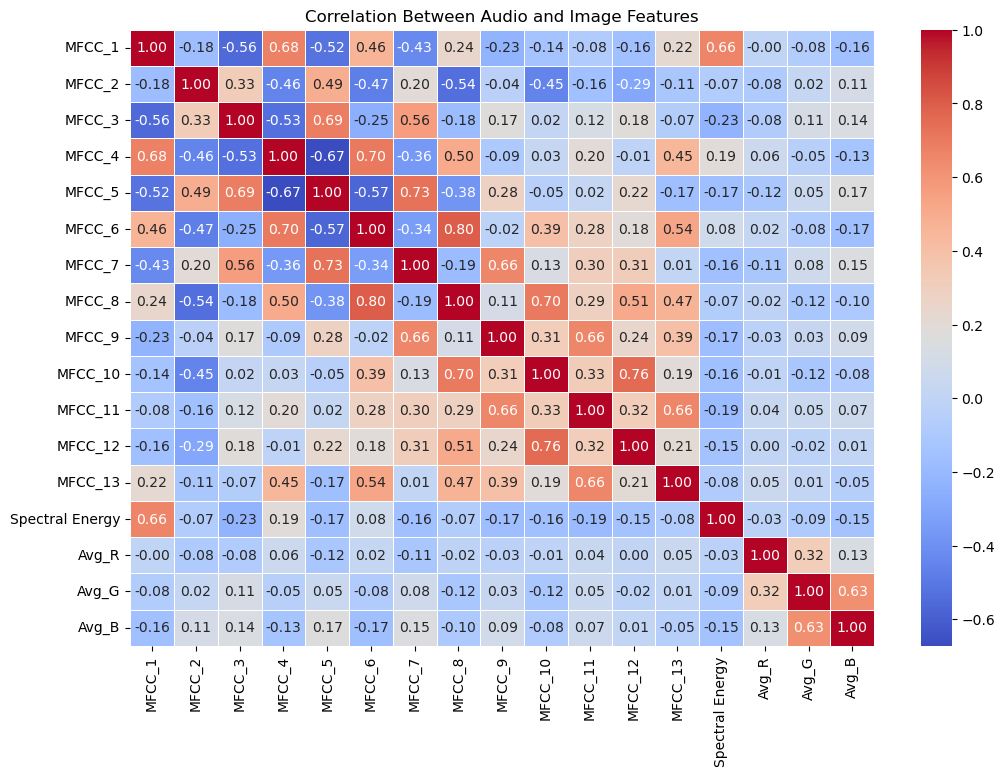

In [161]:
audio_features_df = pd.DataFrame(audio_features, columns=[f"MFCC_{i+1}" for i in range(13)] + ["Spectral Energy"])
image_features_df = pd.DataFrame(image_features, columns=["Avg_R", "Avg_G", "Avg_B"])

feature_df = pd.concat([pd.DataFrame({"Country Name": country_names}), audio_features_df, image_features_df], axis=1)

scaler = StandardScaler()
normalized_features = scaler.fit_transform(feature_df.iloc[:, 1:])  # Ignore country name
normalized_df = pd.DataFrame(normalized_features, columns=feature_df.columns[1:], index=feature_df["Country Name"])

correlation_matrix = normalized_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Audio and Image Features")
plt.show()

### Little to no correlation can be seen between image and audio(MFCC features), but the different MFCC coefficients are often correlated to each other

In [162]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

def extract_mfcc(waveform, sr=44100):
    """Extracts MFCCs from an audio waveform."""
    if len(waveform) == 0:
        return np.zeros(13)  

    mfcc = librosa.feature.mfcc(y=np.array(waveform), sr=sr, n_mfcc=13)
    avg_mfcc = np.mean(mfcc, axis=1)  

    return avg_mfcc

In [163]:
mfcc_features = []
continent_labels = []
country_names = []  # Store country names

for _, row in total_f_df.iterrows():
    mfcc_vector = extract_mfcc(row["Waveform"])  # Extract MFCC
    mfcc_features.append(mfcc_vector)
    continent_labels.append(row["Continent"])  # Store continent label
    country_names.append(row["Country Name"])  # Store country name

# Convert to DataFrame
mfcc_df = pd.DataFrame(mfcc_features, columns=[f"MFCC_{i+1}" for i in range(13)])
mfcc_df["Continent"] = continent_labels
mfcc_df["Country Name"] = country_names  # Add country names



In [164]:
# Normalize MFCCs for fair comparison
scaler = StandardScaler()
mfcc_normalized = scaler.fit_transform(mfcc_df.iloc[:, :-2])  # Exclude "Continent" & "Country Name"
mfcc_df.iloc[:, :-2] = mfcc_normalized  # Replace with normalized values




/var/folders/xn/ll477s2d7y1c7rpqqgg1swsr0000gn/T/ipykernel_12802/2054884783.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  mfcc_df.iloc[:, :-2] = mfcc_normalized  # Replace with normalized values


In [165]:
mfcc_df

MFCC_1    MFCC_2    MFCC_3    MFCC_4    MFCC_5    MFCC_6    MFCC_7  \
0    0.654361 -0.294966  0.586262  0.177277  0.222885  0.286734  0.742148   
1    0.285825 -0.156844 -0.707553  0.442145 -0.992875  0.340637 -0.660922   
2    0.128165  1.096993  0.543647 -0.042548  0.002566 -0.303493  0.425133   
3    1.079801  0.317576  1.234276  0.487043  0.657455  0.550193  0.038222   
4   -0.240381  0.822407  0.249228 -0.435615  0.844627 -0.535776  0.735773   
..        ...       ...       ...       ...       ...       ...       ...   
213 -0.128019  0.251136  0.323405 -0.386869  0.778129 -0.046473  0.622565   
214 -0.157134  0.083967 -0.345945  0.280413 -0.595486  1.005950 -0.854783   
215  0.686054 -0.487096 -0.829810 -0.177648 -0.197520  0.227708 -0.360620   
216  0.654964  0.331624 -0.664138  0.633539 -0.211072  0.429768 -0.372404   
217  0.687325 -1.009643 -0.644696 -0.027011 -0.224082  0.273001  0.725249   

       MFCC_8    MFCC_9   MFCC_10   MFCC_11   MFCC_12   MFCC_13  \
0    0.434214 -0.085002  0.364565  0.449568  1.134540 -0.108874   
1    0.026374 -0.378484 -0.700212  0.289586 -0.743508  1.089757   
2   -1.404430  0.625630 -0.920752  0.477901 -0.501799  0.157670   
3   -0.393518 -1.262552 -0.180859 -0.656248  0.676077 -0.852403   
4   -0.412370  0.488673 -0.982150 -0.540534 -0.639995  0.289513   
..        ...       ...       ...       ...       ...       ...   
213 -0.074719  0.111536  0.010348  0.278336 -0.176092  0.331415   
214  1.500741 -0.298383  1.236370  0.248754  1.679554  0.348484   
215 -0.306315 -0.735357 -0.708293 -0.726795 -0.780476  0.676397   
216 -0.199475 -0.006653 -0.282531  0.806484  0.323121  1.194642   
217  0.366769  1.189324  1.668633  0.647451  0.799430 -0.274028   

         Continent                       Country Name  
0             Asia                       Turkmenistan  
1    South America  Venezuela, Bolivarian Republic of  
2           Africa       Tanzania, United Republic of  
3             Asia                          Sri Lanka  
4    North America                             Mexico  
..             ...                                ...  
213         Africa                      Côte d'Ivoire  
214  North America                             Belize  
215         Africa                          Mauritius  
216  North America                      United States  
217           Asia         Taiwan (Republic of China)  

[218 rows x 15 columns]

In [166]:
continent_similarities = {}

for continent in mfcc_df["Continent"].unique():
    subset = mfcc_df[mfcc_df["Continent"] == continent].drop(columns=["Continent", "Country Name"])
    
    if len(subset) > 1:
        similarity_matrix = cosine_similarity(subset)  # Compute cosine similarity
        continent_similarities[continent] = similarity_matrix

# Convert similarity matrices into DataFrames for better readability
similarity_dfs = {continent: pd.DataFrame(matrix, index=mfcc_df[mfcc_df["Continent"] == continent]["Country Name"].values, 
                                          columns=mfcc_df[mfcc_df["Continent"] == continent]["Country Name"].values)
                  for continent, matrix in continent_similarities.items()}

In [167]:
avg_abs_similarity_per_continent = {}

for continent, sim_df in similarity_dfs.items():
    upper_triangle = sim_df.where(np.triu(np.ones(sim_df.shape), k=1).astype(bool))
    
    mean_abs_similarity = upper_triangle.abs().mean().mean()
    
    avg_abs_similarity_per_continent[continent] = mean_abs_similarity

avg_abs_similarity_df = pd.DataFrame.from_dict(avg_abs_similarity_per_continent, orient="index", columns=["Average Absolute MFCC Similarity"])
avg_abs_similarity_df.sort_values("Average Absolute MFCC Similarity", ascending=False, inplace=True)

In [168]:
avg_abs_similarity_df

Average Absolute MFCC Similarity
Oceania                                0.384215
South America                          0.376870
Africa                                 0.351156
North America                          0.348459
Europe                                 0.344493
Asia                                   0.339989

## Conclusion: There is quite a lot of similarity in anthems belonging to the same continent

In [169]:
avg_abs_similarity_per_continent = {}

all_similarities = [] 

for continent, sim_df in similarity_dfs.items():
    upper_triangle = sim_df.where(np.triu(np.ones(sim_df.shape), k=1).astype(bool))

    mean_abs_similarity = upper_triangle.abs().mean().mean()
    avg_abs_similarity_per_continent[continent] = mean_abs_similarity

    all_similarities.extend(upper_triangle.abs().values.flatten())

all_similarities = [sim for sim in all_similarities if not np.isnan(sim)]

global_avg_similarity = np.mean(all_similarities)

avg_abs_similarity_df = pd.DataFrame.from_dict(avg_abs_similarity_per_continent, orient="index", columns=["Average Absolute MFCC Similarity"])

avg_abs_similarity_df.loc["Global"] = global_avg_similarity

avg_abs_similarity_df.sort_values("Average Absolute MFCC Similarity", ascending=False, inplace=True)



In [170]:
avg_abs_similarity_df

Average Absolute MFCC Similarity
Oceania                                0.384215
South America                          0.376870
Africa                                 0.351156
Global                                 0.349644
North America                          0.348459
Europe                                 0.344493
Asia                                   0.339989

## Decently high level of similarity even among nations not belonging to the same continent